<a href="https://colab.research.google.com/github/LivingLeafFromTagil/model_fix_and_saccade/blob/main/model_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**File smooth_[subject number].csv** This is created after the data is filtered. Each row corresponds to a data point from the rough file, thus both files have the same length. This file is a csv file separated by commas with the following columns:

- (1) Time in microseconds; 
- (2) zeros; 
- (3) smoothed X coordinate;
- (4) smoothed Y coordinate; 
- (5) velocity; 
- (6) Is saccade flag: 0/1; 
- (7) Is interpolated flag: 0/1; 
- (8) post-hoc merge adjacent fixations flag: 0/1; 
- (9) post-hoc root mean square (RMS) flag: 0/1; 
- (10) post-hoc minimum fixation flag: 0/1

**File fix_auto_[subject number].csv** This is created once fixations are automatically estimated. Each row contains the information for one fixation. This file is a csv file separated by commas with the following columns:

- (1) Row from the rough file where the fixation starts;
- (2) row from the rough file where the fixation ends; 
- (3) duration in seconds; 
- (4) Average X coordinate; 
- (5) Average Y coordinate; 
- (6) RMS; 
- (7) Is smooth pursuit flag: 0/1; 
- (8) Average pupil dilation

**File fix_all_[subject number].csv** This file is generated when the first fixation is created and it is updated every time a fixation is manipulated. It is a csv file separated by commas with the following columns:

- (1) Row from the rough file where the fixation starts;
- (2) row from the rough file where the fixation ends; 
- (3) duration in seconds; 
- (4) Average X coordinate; 
- (5) Average Y coordinate; 
- (6) RMS; 
- (7) Is smooth pursuit flag: 0/1; 
- (8) Average pupil dilation]


In [ ]:
raw = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/1/001.csv', 
                  names=['time','zeros','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL']) 
raw.head()

time  zeros  leftX  leftY  rightX  rightY  pupilR  pupilL
0  851704516    0.0  0.484  0.528   0.484   0.528  4.0790  4.1206
1  851712897    0.0  0.480  0.529   0.480   0.529  4.1068  4.1348
2  851738096    0.0  0.481  0.530   0.481   0.530  4.1298  4.1467
3  851746290    0.0  0.480  0.529   0.480   0.529  4.1430  4.1223
4  851754484    0.0  0.481  0.537   0.481   0.537  4.1901  4.1447

In [ ]:
# Такой же как и fix_all
# fix_auto = pd.read_csv('Размеченныее данные/Разметка Набор 1/1/fix_all_001.csv', 
#                       names=['fix_start', 'fix_end', 'dur','avg_x', 'avg_y', 'rms', 'purs_flag', 'avg_pupil'])
# fix_auto.head()
# fix_auto.equals(fix_all)

In [ ]:
fix_all = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/1/fix_all_001.csv', 
                      names=['fix_start', 'fix_end', 'dur','avg_x', 'avg_y', 'rms', 'purs_flag', 'avg_pupil'])
fix_all.head()

fix_start  fix_end      dur     avg_x     avg_y       rms  purs_flag  \
0          0       32  341.943  0.484121  0.532970  0.057848          0   
1         33       72  400.373  0.527200  0.497625  0.236046          0   
2         72      125  551.226  0.457545  0.601045  0.378705          0   
3        129      161  317.070  0.210545  0.783848  0.239888          0   
4        165      192  266.847  0.532071  0.560607  0.252194          0   

   avg_pupil  
0   4.203467  
1   4.221585  
2   4.588518  
3   4.732098  
4   4.188780

In [ ]:
smooth = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/1/smooth_001.csv', 
                    names=['time','zeros','X_smth', 'Y_smth', 'velocity', 'is_saccade', 'is_interpol', 'post-hoc merge adjacent fixations' 'post-hoc RMS', 'post-hoc minimum fixation'])
smooth.head()

time       zeros    X_smth  Y_smth  velocity  is_saccade  \
851704516 0  924.207558  572.559707  0.000000       0         0           0   
851712897 0  923.846605  573.074794  0.000000       0         0           0   
851738096 0  923.652135  573.659164  0.000000       0         0           0   
851746290 0  923.508171  574.290720  0.486431       0         0           0   
851754484 0  923.551789  575.159935  0.653556       0         0           0   

             is_interpol  post-hoc merge adjacent fixationspost-hoc RMS  \
851704516 0            0                                              0   
851712897 0            0                                              0   
851738096 0            0                                              0   
851746290 0            0                                              0   
851754484 0            0                                              0   

             post-hoc minimum fixation  
851704516 0                          0  
851712897 0                          0  
851738096 0                          0  
851746290 0                          0  
851754484 0                          0

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/1/fix_export_001.csv',
                        names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export.head()

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num       ?  \
0  851704516  0.484  0.528   0.484   0.528  924.21  572.56        1  341.94   
1  851712897  0.480  0.529   0.480   0.529  923.85  573.07        1  341.94   
2  851738096  0.481  0.530   0.481   0.530  923.65  573.66        1  341.94   
3  851746290  0.480  0.529   0.480   0.529  923.51  574.29        1  341.94   
4  851754484  0.481  0.537   0.481   0.537  923.55  575.16        1  341.94   

        ??      ???  
0  0.48412  0.53297  
1  0.48412  0.53297  
2  0.48412  0.53297  
3  0.48412  0.53297  
4  0.48412  0.53297

In [ ]:
fix_export.fix_num.unique()

array([ 1,  2,  3,  0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

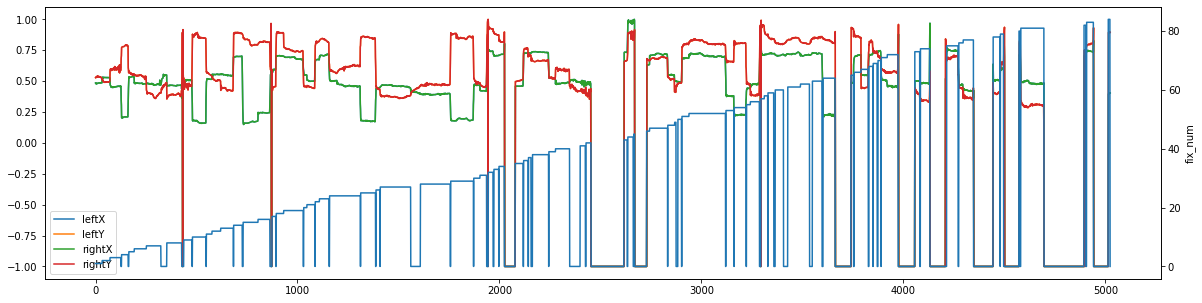

In [ ]:
fix_export[['leftX', 'leftY', 'rightX', 'rightY']].plot(figsize=(20,5))
axs2 = plt.twinx()
sns.lineplot(data = fix_export['fix_num'], ax=axs2)

In [ ]:
fix_export[fix_export['fix_num']==0]

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num    ?  \
126   853030823  0.442  0.621   0.442   0.621  866.50  661.84        0  0.0   
127   853039250  0.348  0.686   0.348   0.686  666.32  741.36        0  0.0   
128   853047453  0.307  0.705   0.307   0.705  591.28  760.92        0  0.0   
162   853389646  0.378  0.608   0.378   0.608  725.80  656.63        0  0.0   
163   853397872  0.440  0.592   0.440   0.592  846.80  638.63        0  0.0   
...         ...    ...    ...     ...     ...     ...     ...      ...  ...   
5011  918942164 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0  0.0   
5012  918993049 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0  0.0   
5013  919042204 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0  0.0   
5014  919092327 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0  0.0   
5024  919298102  0.403  0.895   0.403   0.895    0.00    0.00        0  0.0   

       ??  ???  
126   0.0  0.0  
127   0.0  0.0  
128   0.0  0.0  
162   0.0  0.0  
163   0.0  0.0  
...   ...  ...  
5011  0.0  0.0  
5012  0.0  0.0  
5013  0.0  0.0  
5014  0.0  0.0  
5024  0.0  0.0  

[1271 rows x 11 columns]

# Расчет фичей для трейна


## 1

In [ ]:
export_for_def = pd.read_csv('drive/My Drive/Проект_Айтрекинг/Разметка Набор 1/autodata/fix_export_226.csv',
                             names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
# export_for_def['newtab'] = export_for_def['leftX'].diff(1)
# export_for_def.loc[0, 'newtab'] = 0
export_for_def

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0      4882661557  0.511  0.496   0.511   0.496  9.734100e+02  5.254200e+02   
1      4882663462  0.497  0.478   0.497   0.478  9.681300e+02  5.166200e+02   
2      4882665422  0.519  0.430   0.519   0.430  9.899500e+02  4.727500e+02   
3      4882667460  0.507  0.487   0.507   0.487  9.743700e+02  5.154000e+02   
4      4882669852  0.498  0.426   0.498   0.426  9.731400e+02  4.709000e+02   
...           ...    ...    ...     ...     ...           ...           ...   
28768  4950268595  0.514  0.315   0.514   0.315  9.749000e+02  3.484000e+02   
28769  4950270579  0.499  0.314   0.499   0.314  9.651400e+02  3.483200e+02   
28770  4950272613  0.520  0.328   0.520   0.328  9.818700e+02  3.542600e+02   
28771  4950274579  0.497  0.355   0.497   0.355  9.624900e+02  3.717800e+02   
28772  4950276584  0.425  0.346   0.425   0.346  3.321000e-35  1.153000e-35   

       fix_num    ?   ??  ???  
0            0  0.0  0.0  0.0  
1            0  0.0  0.0  0.0  
2            0  0.0  0.0  0.0  
3            0  0.0  0.0  0.0  
4            0  0.0  0.0  0.0  
...        ...  ...  ...  ...  
28768        0  0.0  0.0  0.0  
28769        0  0.0  0.0  0.0  
28770        0  0.0  0.0  0.0  
28771        0  0.0  0.0  0.0  
28772        0  0.0  0.0  0.0  

[28773 rows x 11 columns]

In [ ]:
export_for_def[export_for_def['fix_num'] == 2].quantile(0.25)

time       4.882734e+09
leftX      5.060000e-01
leftY      4.260000e-01
rightX     5.060000e-01
rightY     4.260000e-01
pupilR     9.759850e+02
pupilL     4.680150e+02
fix_num    2.000000e+00
?          3.984000e+00
??         5.116700e-01
???        4.400000e-01
Name: 0.25, dtype: float64

In [ ]:
#исправление шумов по медиане
def noise_med(pdDataframe):
  pdDataframe['leftX_ch'] = pdDataframe['leftX'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightX_ch'] = pdDataframe['rightX'].diff(1)
  pdDataframe.loc[0, 'rightX_ch'] = 0
  pdDataframe['leftY_ch'] = pdDataframe['leftY'].diff(1)
  pdDataframe.loc[0, 'leftY_ch'] = 0
  pdDataframe['rightY_ch'] = pdDataframe['rightY'].diff(1)
  pdDataframe.loc[0, 'rightY_ch'] = 0
  print(pdDataframe['fix_num'].max()+1)
  for i in range(1, pdDataframe['fix_num'].max()+1):

    fix_medians_ch = [pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].median(), pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].median(),
                pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].median(), pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].median()]
    fix_medians = [pdDataframe[pdDataframe['fix_num'] == i]['leftX'].median(), pdDataframe[pdDataframe['fix_num'] == i]['leftY'].median(),
                   pdDataframe[pdDataframe['fix_num'] == i]['rightX'].median(), pdDataframe[pdDataframe['fix_num'] == i]['rightY'].median()]

    for j in range(len(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index])):
      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j]) > np.abs(fix_medians_ch[0]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftX']] = fix_medians[0]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].values[j]) > np.abs(fix_medians_ch[1]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftY']] = fix_medians[1]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].values[j]) > np.abs(fix_medians_ch[2]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightX']] = fix_medians[2]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].values[j]) > np.abs(fix_medians_ch[3]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightY']] = fix_medians[3]
  return(pdDataframe)

#исправление шумов по среднему
def noise_mean(pdDataframe):
  pdDataframe['leftX_ch'] = pdDataframe['leftX'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightX_ch'] = pdDataframe['rightX'].diff(1)
  pdDataframe.loc[0, 'rightX_ch'] = 0
  pdDataframe['leftY_ch'] = pdDataframe['leftY'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightY_ch'] = pdDataframe['rightY'].diff(1)
  pdDataframe.loc[0, 'rightY_ch'] = 0
  for i in range(1, pdDataframe['fix_num'].max()+1):

    fix_means_ch = [pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].mean(), pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].mean(),
                pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].mean(), pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].mean()]
    fix_means = [pdDataframe[pdDataframe['fix_num'] == i]['leftX'].mean(), pdDataframe[pdDataframe['fix_num'] == i]['leftY'].mean(),
                   pdDataframe[pdDataframe['fix_num'] == i]['rightX'].mean(), pdDataframe[pdDataframe['fix_num'] == i]['rightY'].mean()]

    for j in range(len(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index])):
      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j]) > np.abs(fix_means_ch[0]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftX']] = fix_means[0]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].values[j]) > np.abs(fix_means_ch[1]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftY']] = fix_means[1]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].values[j]) > np.abs(fix_means_ch[2]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightX']] = fix_means[2]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].values[j]) > np.abs(fix_means_ch[3]):
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightY']] = fix_means[3]
  return(pdDataframe)

#исправление шумов по квантилю
def noise_quant(pdDataframe):
  pdDataframe['leftX_ch'] = pdDataframe['leftX'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightX_ch'] = pdDataframe['rightX'].diff(1)
  pdDataframe.loc[0, 'rightX_ch'] = 0
  pdDataframe['leftY_ch'] = pdDataframe['leftY'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightY_ch'] = pdDataframe['rightY'].diff(1)
  pdDataframe.loc[0, 'rightY_ch'] = 0
  for i in range(1, pdDataframe['fix_num'].max()+1):

    fix_quant_25_ch = [pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].quantile(0.25), pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].quantile(0.25),
                pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].quantile(0.25), pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].quantile(0.25)]

    fix_quant_25 = [pdDataframe[pdDataframe['fix_num'] == i]['leftX'].quantile(0.25), pdDataframe[pdDataframe['fix_num'] == i]['leftY'].quantile(0.25),
                pdDataframe[pdDataframe['fix_num'] == i]['rightX'].quantile(0.25), pdDataframe[pdDataframe['fix_num'] == i]['rightY'].quantile(0.25)]

    fix_quant_75_ch = [pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].quantile(0.75), pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].quantile(0.75),
                   pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].quantile(0.75), pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].quantile(0.75)]

    fix_quant_75 = [pdDataframe[pdDataframe['fix_num'] == i]['leftX'].quantile(0.75), pdDataframe[pdDataframe['fix_num'] == i]['leftY'].quantile(0.75),
                   pdDataframe[pdDataframe['fix_num'] == i]['rightX'].quantile(0.75), pdDataframe[pdDataframe['fix_num'] == i]['rightY'].quantile(0.75)]

    for j in range(len(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index])):
      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j]) < fix_quant_25_ch[0]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftX']] = fix_quant_25[0]
      elif np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j]) > fix_quant_75_ch[0]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftX']] = fix_quant_75[0]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].values[j]) < fix_quant_25_ch[1]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftY']] = fix_quant_25[1]
      elif np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].values[j]) > fix_quant_75_ch[1]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['leftY']] = fix_quant_75[1]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].values[j]) < fix_quant_25_ch[2]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightX']] = fix_quant_25[2]
      elif np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].values[j]) > fix_quant_75_ch[2]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightX']] = fix_quant_75[2]

      if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].values[j]) < fix_quant_25_ch[3]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightY']] = fix_quant_25[3]
      elif np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].values[j]) > fix_quant_75_ch[3]:
        pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j], ['rightY']] = fix_quant_75[3]
  return(pdDataframe)

#исправление шума через окно
def noise_window(pdDataframe, windowSize):
  pdDataframe['leftX_ch'] = pdDataframe['leftX'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightX_ch'] = pdDataframe['rightX'].diff(1)
  pdDataframe.loc[0, 'rightX_ch'] = 0
  pdDataframe['leftY_ch'] = pdDataframe['leftY'].diff(1)
  pdDataframe.loc[0, 'leftX_ch'] = 0
  pdDataframe['rightY_ch'] = pdDataframe['rightY'].diff(1)
  pdDataframe.loc[0, 'rightY_ch'] = 0

  pdDataframe['rollLeftX_ch'] = 0

  pdDataframe['rollLeftY_ch'] = 0
  
  pdDataframe['rollRightX_ch'] = 0
  
  pdDataframe['rollRightY_ch'] = 0
  

  pdDataframe['rollLeftX'] = 0
  
  pdDataframe['rollLeftY'] = 0
  
  pdDataframe['rollRightX'] = 0
  
  pdDataframe['rollRightY'] = 0
  
  for i in range(1, pdDataframe['fix_num'].max()+1):
    if len(pdDataframe[pdDataframe['fix_num'] == i]) < windowSize:
      continue
    else:
      for j in range(len(pdDataframe[pdDataframe['fix_num'] == i]) - windowSize):

        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollLeftX_ch']] = pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollLeftY_ch']] = pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollRightX_ch']] = pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollRightY_ch']] = pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].rolling(windowSize).mean()

        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollLeftX']] = pdDataframe[pdDataframe['fix_num'] == i]['leftX'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollLeftY']] = pdDataframe[pdDataframe['fix_num'] == i]['leftY'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollRightX']] = pdDataframe[pdDataframe['fix_num'] == i]['rightX'].rolling(windowSize).mean()
        pdDataframe.loc[pdDataframe['fix_num'] == i, ['rollRightY']] = pdDataframe[pdDataframe['fix_num'] == i]['rightY'].rolling(windowSize).mean()
        # print(pdDataframe)
        # print(pdDataframe[pdDataframe['fix_num'] == i])
        # print(np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j+3]))
        # print(np.abs(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+3],['leftX_ch']].rolling(3).mean()))

        if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j+windowSize]) > np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rollLeftX_ch'].values[j+windowSize-1]):
          # print(np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftX_ch'].values[j+windowSize]))
          # print(np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rollLeftX_ch'].values[j+windowSize-1]))
          # print(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['leftX']])
          # print(pdDataframe[pdDataframe['fix_num'] == i]['rollLeftX'].values[j+windowSize-1])
          pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['leftX']] = pdDataframe[pdDataframe['fix_num'] == i]['rollLeftX'].values[j+windowSize-1]
          # print(pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['leftX']])

        if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['leftY_ch'].values[j+windowSize]) > np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rollLeftY_ch'].values[j+windowSize-1]):
          pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['leftY']] = pdDataframe[pdDataframe['fix_num'] == i]['rollLeftY'].values[j+windowSize-1]

        if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightX_ch'].values[j+windowSize]) > np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rollRightX_ch'].values[j+windowSize-1]):
          pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['rightX']] = pdDataframe[pdDataframe['fix_num'] == i]['rollRightX'].values[j+windowSize-1]

        if np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rightY_ch'].values[j+windowSize]) > np.abs(pdDataframe[pdDataframe['fix_num'] == i]['rollRightY_ch'].values[j+windowSize-1]):
          pdDataframe.loc[pdDataframe.loc[pdDataframe['fix_num'] == i].index[j+windowSize], ['rightY']] = pdDataframe[pdDataframe['fix_num'] == i]['rollRightY'].values[j+windowSize-1]

  return(pdDataframe)

In [ ]:
export_quant = export_for_def.copy()

In [ ]:
%%time
export_quant = noise_quant(export_quant).copy()

CPU times: user 2min 38s, sys: 754 ms, total: 2min 39s
Wall time: 2min 38s


In [ ]:
export_window = export_for_def.copy()

In [ ]:
export_window = noise_window(export_window, 3)

In [ ]:
export_window[20:40]

time  leftX     leftY  rightX    rightY   pupilR  pupilL  fix_num  \
20  4882701377  0.501  0.493000   0.501  0.493000   966.52  520.36        0   
21  4882703439  0.487  0.515000   0.487  0.515000   946.25  542.56        0   
22  4882707457  0.524  0.392000   0.524  0.392000  1000.50  434.24        0   
23  4882714254  0.498  0.441000   0.498  0.441000   961.72  481.28        1   
24  4882715490  0.508  0.451000   0.508  0.451000   965.37  485.62        1   
25  4882716921  0.492  0.423000   0.492  0.423000   957.38  470.88        1   
26  4882717821  0.489  0.438333   0.489  0.438333   951.44  511.80        1   
27  4882719493  0.499  0.495000   0.499  0.495000   954.66  519.33        0   
28  4882721428  0.538  0.411000   0.538  0.411000  1015.80  447.68        0   
29  4882723426  0.513  0.419000   0.513  0.419000   984.19  460.09        0   
30  4882725536  0.497  0.457000   0.497  0.457000   965.05  489.61        0   
31  4882727379  0.509  0.424000   0.509  0.424000   982.88  463.42        0   
32  4882729449  0.522  0.478000   0.522  0.478000   991.07  502.13        0   
33  4882731474  0.522  0.416000   0.522  0.416000   995.20  458.43        0   
34  4882733442  0.515  0.468000   0.515  0.468000   987.73  493.87        2   
35  4882735365  0.523  0.421000   0.523  0.421000   997.72  462.22        2   
36  4882737426  0.497  0.431000   0.497  0.431000   964.24  473.81        2   
37  4882739434  0.472  0.445000   0.472  0.445000   922.90  481.10        0   
38  4882741465  0.548  0.433000   0.548  0.433000  1033.10  470.04        0   
39  4882743391  0.495  0.461000   0.495  0.461000   960.55  488.17        0   

        ?       ??  ...  leftY_ch  rightY_ch  rollLeftX_ch  rollLeftY_ch  \
20  0.000  0.00000  ...     0.048      0.048      0.000000      0.000000   
21  0.000  0.00000  ...     0.022      0.022      0.000000      0.000000   
22  0.000  0.00000  ...    -0.123     -0.123      0.000000      0.000000   
23  3.567  0.49675  ...     0.049      0.049           NaN           NaN   
24  3.567  0.49675  ...     0.010      0.010           NaN           NaN   
25  3.567  0.49675  ...    -0.028     -0.028     -0.010667      0.010333   
26  3.567  0.49675  ...     0.056      0.056     -0.003000      0.012667   
27  0.000  0.00000  ...     0.016      0.016      0.000000      0.000000   
28  0.000  0.00000  ...    -0.084     -0.084      0.000000      0.000000   
29  0.000  0.00000  ...     0.008      0.008      0.000000      0.000000   
30  0.000  0.00000  ...     0.038      0.038      0.000000      0.000000   
31  0.000  0.00000  ...    -0.033     -0.033      0.000000      0.000000   
32  0.000  0.00000  ...     0.054      0.054      0.000000      0.000000   
33  0.000  0.00000  ...    -0.062     -0.062      0.000000      0.000000   
34  3.984  0.51167  ...     0.052      0.052      0.000000      0.000000   
35  3.984  0.51167  ...    -0.047     -0.047      0.000000      0.000000   
36  3.984  0.51167  ...     0.010      0.010      0.000000      0.000000   
37  0.000  0.00000  ...     0.014      0.014      0.000000      0.000000   
38  0.000  0.00000  ...    -0.012     -0.012      0.000000      0.000000   
39  0.000  0.00000  ...     0.028      0.028      0.000000      0.000000   

    rollRightX_ch  rollRightY_ch  rollLeftX  rollLeftY  rollRightX  rollRightY  
20       0.000000       0.000000   0.000000   0.000000    0.000000    0.000000  
21       0.000000       0.000000   0.000000   0.000000    0.000000    0.000000  
22       0.000000       0.000000   0.000000   0.000000    0.000000    0.000000  
23            NaN            NaN        NaN        NaN         NaN         NaN  
24            NaN            NaN        NaN        NaN         NaN         NaN  
25      -0.010667       0.010333   0.499333   0.438333    0.499333    0.438333  
26      -0.003000       0.012667   0.496333   0.451000    0.496333    0.451000  
27       0.000000       0.000000   0.000000   0.000000    0.000000    0.000000  
28       0.000000       

In [ ]:
export_for_def[20:40]

time  leftX  leftY  rightX  rightY   pupilR  pupilL  fix_num      ?  \
20  4882701377  0.501  0.493   0.501   0.493   966.52  520.36        0  0.000   
21  4882703439  0.487  0.515   0.487   0.515   946.25  542.56        0  0.000   
22  4882707457  0.524  0.392   0.524   0.392  1000.50  434.24        0  0.000   
23  4882714254  0.498  0.441   0.498   0.441   961.72  481.28        1  3.567   
24  4882715490  0.508  0.451   0.508   0.451   965.37  485.62        1  3.567   
25  4882716921  0.492  0.423   0.492   0.423   957.38  470.88        1  3.567   
26  4882717821  0.489  0.479   0.489   0.479   951.44  511.80        1  3.567   
27  4882719493  0.499  0.495   0.499   0.495   954.66  519.33        0  0.000   
28  4882721428  0.538  0.411   0.538   0.411  1015.80  447.68        0  0.000   
29  4882723426  0.513  0.419   0.513   0.419   984.19  460.09        0  0.000   
30  4882725536  0.497  0.457   0.497   0.457   965.05  489.61        0  0.000   
31  4882727379  0.509  0.424   0.509   0.424   982.88  463.42        0  0.000   
32  4882729449  0.522  0.478   0.522   0.478   991.07  502.13        0  0.000   
33  4882731474  0.522  0.416   0.522   0.416   995.20  458.43        0  0.000   
34  4882733442  0.515  0.468   0.515   0.468   987.73  493.87        2  3.984   
35  4882735365  0.523  0.421   0.523   0.421   997.72  462.22        2  3.984   
36  4882737426  0.497  0.431   0.497   0.431   964.24  473.81        2  3.984   
37  4882739434  0.472  0.445   0.472   0.445   922.90  481.10        0  0.000   
38  4882741465  0.548  0.433   0.548   0.433  1033.10  470.04        0  0.000   
39  4882743391  0.495  0.461   0.495   0.461   960.55  488.17        0  0.000   

         ??     ???  
20  0.00000  0.0000  
21  0.00000  0.0000  
22  0.00000  0.0000  
23  0.49675  0.4485  
24  0.49675  0.4485  
25  0.49675  0.4485  
26  0.49675  0.4485  
27  0.00000  0.0000  
28  0.00000  0.0000  
29  0.00000  0.0000  
30  0.00000  0.0000  
31  0.00000  0.0000  
32  0.00000  0.0000  
33  0.00000  0.0000  
34  0.51167  0.4400  
35  0.51167  0.4400  
36  0.51167  0.4400  
37  0.00000  0.0000  
38  0.00000  0.0000  
39  0.00000  0.0000

In [ ]:
export_quant[20:40]

time   leftX   leftY  rightX  rightY   pupilR  pupilL  fix_num  \
20  4882701377  0.5010  0.4930  0.5010  0.4930   966.52  520.36        0   
21  4882703439  0.4870  0.5150  0.4870  0.5150   946.25  542.56        0   
22  4882707457  0.5240  0.3920  0.5240  0.3920  1000.50  434.24        0   
23  4882714254  0.5005  0.4410  0.5005  0.4580   961.72  481.28        1   
24  4882715490  0.5005  0.4510  0.5005  0.4580   965.37  485.62        1   
25  4882716921  0.5005  0.4230  0.5005  0.4580   957.38  470.88        1   
26  4882717821  0.5005  0.4580  0.5005  0.4580   951.44  511.80        1   
27  4882719493  0.4990  0.4950  0.4990  0.4950   954.66  519.33        0   
28  4882721428  0.5380  0.4110  0.5380  0.4110  1015.80  447.68        0   
29  4882723426  0.5130  0.4190  0.5130  0.4190   984.19  460.09        0   
30  4882725536  0.4970  0.4570  0.4970  0.4570   965.05  489.61        0   
31  4882727379  0.5090  0.4240  0.5090  0.4240   982.88  463.42        0   
32  4882729449  0.5220  0.4780  0.5220  0.4780   991.07  502.13        0   
33  4882731474  0.5220  0.4160  0.5220  0.4160   995.20  458.43        0   
34  4882733442  0.5190  0.4495  0.5190  0.4495   987.73  493.87        2   
35  4882735365  0.5190  0.4495  0.5190  0.4495   997.72  462.22        2   
36  4882737426  0.5190  0.4310  0.5190  0.4495   964.24  473.81        2   
37  4882739434  0.4720  0.4450  0.4720  0.4450   922.90  481.10        0   
38  4882741465  0.5480  0.4330  0.5480  0.4330  1033.10  470.04        0   
39  4882743391  0.4950  0.4610  0.4950  0.4610   960.55  488.17        0   

        ?       ??     ???  leftX_ch  rightX_ch  leftY_ch  rightY_ch  
20  0.000  0.00000  0.0000    -0.004     -0.004     0.048      0.048  
21  0.000  0.00000  0.0000    -0.014     -0.014     0.022      0.022  
22  0.000  0.00000  0.0000     0.037      0.037    -0.123     -0.123  
23  3.567  0.49675  0.4485    -0.026     -0.026     0.049      0.049  
24  3.567  0.49675  0.4485     0.010      0.010     0.010      0.010  
25  3.567  0.49675  0.4485    -0.016     -0.016    -0.028     -0.028  
26  3.567  0.49675  0.4485    -0.003     -0.003     0.056      0.056  
27  0.000  0.00000  0.0000     0.010      0.010     0.016      0.016  
28  0.000  0.00000  0.0000     0.039      0.039    -0.084     -0.084  
29  0.000  0.00000  0.0000    -0.025     -0.025     0.008      0.008  
30  0.000  0.00000  0.0000    -0.016     -0.016     0.038      0.038  
31  0.000  0.00000  0.0000     0.012      0.012    -0.033     -0.033  
32  0.000  0.00000  0.0000     0.013      0.013     0.054      0.054  
33  0.000  0.00000  0.0000     0.000      0.000    -0.062     -0.062  
34  3.984  0.51167  0.4400    -0.007     -0.007     0.052      0.052  
35  3.984  0.51167  0.4400     0.008      0.008    -0.047     -0.047  
36  3.984  0.51167  0.4400    -0.026     -0.026     0.010      0.010  
37  0.000  0.00000  0.0000    -0.025     -0.025     0.014      0.014  
38  0.000  0.00000  0.0000     0.076      0.076    -0.012     -0.012  
39  0.000  0.00000  0.0000    -0.053     -0.053     0.028      0.028

In [ ]:
export_for_def[export_for_def['fix_num'] == 1].describe()

time     leftX     leftY    rightX    rightY      pupilR  \
count  4.000000e+00  4.000000  4.000000  4.000000  4.000000    4.000000   
mean   4.882716e+09  0.496750  0.448500  0.496750  0.448500  958.977500   
std    1.572031e+03  0.008382  0.023402  0.008382  0.023402    5.993087   
min    4.882714e+09  0.489000  0.423000  0.489000  0.423000  951.440000   
25%    4.882715e+09  0.491250  0.436500  0.491250  0.436500  955.895000   
50%    4.882716e+09  0.495000  0.446000  0.495000  0.446000  959.550000   
75%    4.882717e+09  0.500500  0.458000  0.500500  0.458000  962.632500   
max    4.882718e+09  0.508000  0.479000  0.508000  0.479000  965.370000   

           pupilL  fix_num      ?       ??     ???  
count    4.000000      4.0  4.000  4.00000  4.0000  
mean   487.395000      1.0  3.567  0.49675  0.4485  
std     17.405872      0.0  0.000  0.00000  0.0000  
min    470.880000      1.0  3.567  0.49675  0.4485  
25%    478.680000      1.0  3.567  0.49675  0.4485  
50%    483.450000      1.0  3.567  0.49675  0.4485  
75%    492.165000      1.0  3.567  0.49675  0.4485  
max    511.800000      1.0  3.567  0.49675  0.4485

In [ ]:
export_quant[export_quant['fix_num'] == 1].describe()

time   leftX     leftY  rightX  rightY      pupilR      pupilL  \
count  4.000000e+00  4.0000  4.000000  4.0000   4.000    4.000000    4.000000   
mean   4.882716e+09  0.5005  0.443250  0.5005   0.458  958.977500  487.395000   
std    1.572031e+03  0.0000  0.015196  0.0000   0.000    5.993087   17.405872   
min    4.882714e+09  0.5005  0.423000  0.5005   0.458  951.440000  470.880000   
25%    4.882715e+09  0.5005  0.436500  0.5005   0.458  955.895000  478.680000   
50%    4.882716e+09  0.5005  0.446000  0.5005   0.458  959.550000  483.450000   
75%    4.882717e+09  0.5005  0.452750  0.5005   0.458  962.632500  492.165000   
max    4.882718e+09  0.5005  0.458000  0.5005   0.458  965.370000  511.800000   

       fix_num      ?       ??     ???  leftX_ch  rightX_ch  leftY_ch  \
count      4.0  4.000  4.00000  4.0000   4.00000    4.00000  4.000000   
mean       1.0  3.567  0.49675  0.4485  -0.00875   -0.00875  0.021750   
std        0.0  0.000  0.00000  0.0000   0.01565    0.01565  0.038853   
min        1.0  3.567  0.49675  0.4485  -0.02600   -0.02600 -0.028000   
25%        1.0  3.567  0.49675  0.4485  -0.01850   -0.01850  0.000500   
50%        1.0  3.567  0.49675  0.4485  -0.00950   -0.00950  0.029500   
75%        1.0  3.567  0.49675  0.4485   0.00025    0.00025  0.050750   
max        1.0  3.567  0.49675  0.4485   0.01000    0.01000  0.056000   

       rightY_ch  
count   4.000000  
mean    0.021750  
std     0.038853  
min    -0.028000  
25%     0.000500  
50%     0.029500  
75%     0.050750  
max     0.056000

In [ ]:
export_window[export_window['fix_num'] == 1].describe()

time     leftX     leftY    rightX    rightY      pupilR  \
count  4.000000e+00  4.000000  4.000000  4.000000  4.000000    4.000000   
mean   4.882716e+09  0.496750  0.438333  0.496750  0.438333  958.977500   
std    1.572031e+03  0.008382  0.011585  0.008382  0.011585    5.993087   
min    4.882714e+09  0.489000  0.423000  0.489000  0.423000  951.440000   
25%    4.882715e+09  0.491250  0.434500  0.491250  0.434500  955.895000   
50%    4.882716e+09  0.495000  0.439667  0.495000  0.439667  959.550000   
75%    4.882717e+09  0.500500  0.443500  0.500500  0.443500  962.632500   
max    4.882718e+09  0.508000  0.451000  0.508000  0.451000  965.370000   

           pupilL  fix_num      ?       ??  ...  leftY_ch  rightY_ch  \
count    4.000000      4.0  4.000  4.00000  ...  4.000000   4.000000   
mean   487.395000      1.0  3.567  0.49675  ...  0.021750   0.021750   
std     17.405872      0.0  0.000  0.00000  ...  0.038853   0.038853   
min    470.880000      1.0  3.567  0.49675  ... -0.028000  -0.028000   
25%    478.680000      1.0  3.567  0.49675  ...  0.000500   0.000500   
50%    483.450000      1.0  3.567  0.49675  ...  0.029500   0.029500   
75%    492.165000      1.0  3.567  0.49675  ...  0.050750   0.050750   
max    511.800000      1.0  3.567  0.49675  ...  0.056000   0.056000   

       rollLeftX_ch  rollLeftY_ch  rollRightX_ch  rollRightY_ch  rollLeftX  \
count      2.000000      2.000000       2.000000       2.000000   2.000000   
mean      -0.006833      0.011500      -0.006833       0.011500   0.497833   
std        0.005421      0.001650       0.005421       0.001650   0.002121   
min       -0.010667      0.010333      -0.010667       0.010333   0.496333   
25%       -0.008750      0.010917      -0.008750       0.010917   0.497083   
50%       -0.006833      0.011500      -0.006833       0.011500   0.497833   
75%       -0.004917      0.012083      -0.004917       0.012083   0.498583   
max       -0.003000      0.012667      -0.003000       0.012667   0.499333   

       rollLeftY  rollRightX  rollRightY  
count   2.000000    2.000000    2.000000  
mean    0.444667    0.497833    0.444667  
std     0.008957    0.002121    0.008957  
min     0.438333    0.496333    0.438333  
25%     0.441500    0.497083    0.441500  
50%     0.444667    0.497833    0.444667  
75%     0.447833    0.498583    0.447833  
max     0.451000    0.499333    0.451000  

[8 rows x 23 columns]

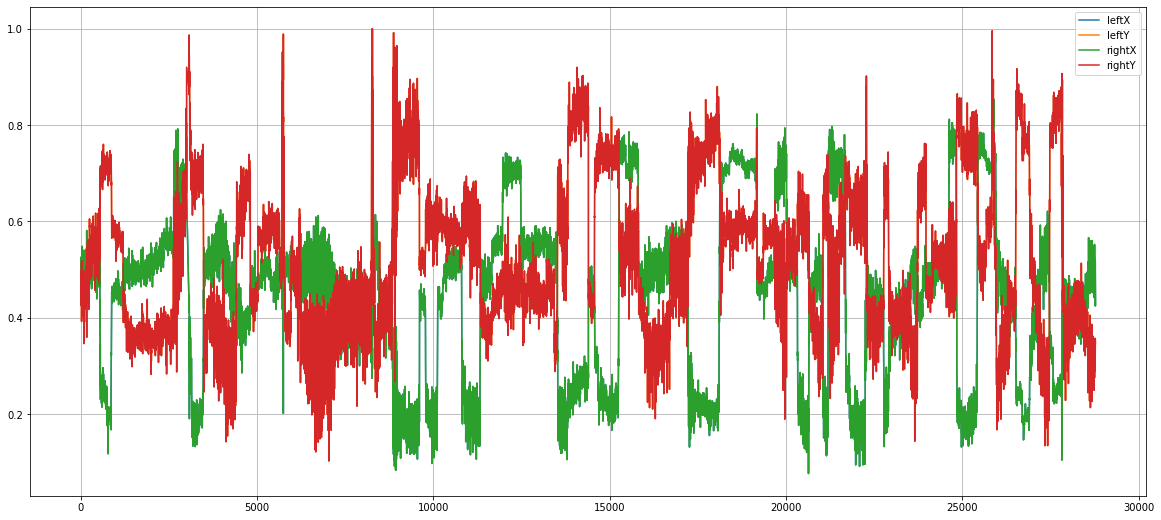

In [ ]:
export_for_def[export_for_def['leftX'] > -1][['leftX', 'leftY', 'rightX', 'rightY']].plot(figsize=(20,9), grid=True)

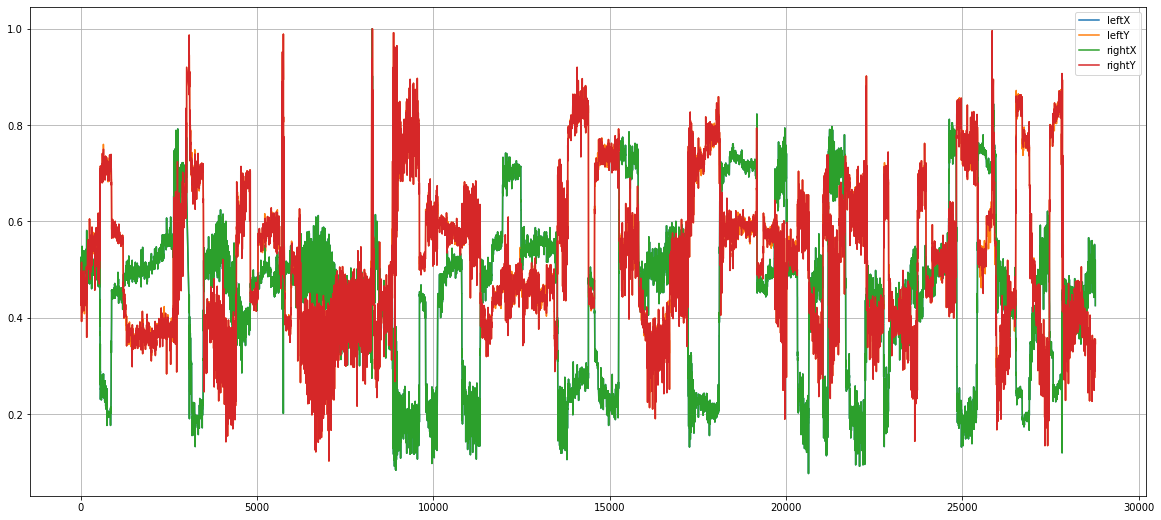

In [ ]:
export_quant[export_quant['leftX'] > -1][['leftX', 'leftY', 'rightX', 'rightY']].plot(figsize=(20,9), grid=True)

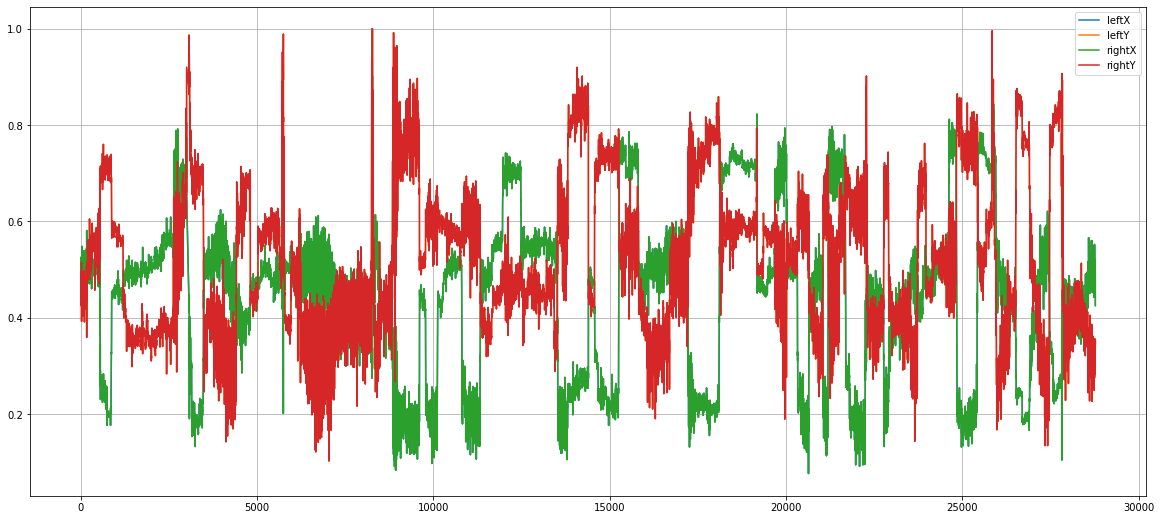

In [ ]:
export_window[export_window['leftX'] > -1][['leftX', 'leftY', 'rightX', 'rightY']].plot(figsize=(20,9), grid=True)

In [ ]:
def toOne (value: int):
  if value >= 1:
    return 1
  else:
    return 0

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Проект_Айтрекинг/Разметка Набор 1/1/fix_export_001.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num  \
0     851704516  0.484  0.528   0.484   0.528  924.21  572.56        1   
1     851712897  0.480  0.529   0.480   0.529  923.85  573.07        1   
2     851738096  0.481  0.530   0.481   0.530  923.65  573.66        1   
3     851746290  0.480  0.529   0.480   0.529  923.51  574.29        1   
4     851754484  0.481  0.537   0.481   0.537  923.55  575.16        1   
...         ...    ...    ...     ...     ...     ...     ...      ...   
5020  919256630  0.401  0.898   0.401   0.898  767.52  968.29       84   
5021  919264786  0.402  0.900   0.402   0.900  768.55  967.98       84   
5022  919281480  0.404  0.891   0.404   0.891  769.59  967.35       84   
5023  919289968  0.401  0.892   0.401   0.892  770.15  966.93       84   
5024  919298102  0.403  0.895   0.403   0.895    0.00    0.00        0   

           ?       ??      ???  
0     341.94  0.48412  0.53297  
1     341.94  0.48412  0.53297  
2     341.94  0.48412  0.53297  
3     341.94  0.48412  0.53297  
4     341.94  0.48412  0.53297  
...      ...      ...      ...  
5020  147.67  0.39938  0.89600  
5021  147.67  0.39938  0.89600  
5022  147.67  0.39938  0.89600  
5023  147.67  0.39938  0.89600  
5024    0.00  0.00000  0.00000  

[5025 rows x 11 columns]

Работаем с файлом fix_export. Целевой столбец - fix_num - надо преобразовать в 0 и 1 

In [ ]:
df1 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df1.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df1['yr_ch'] = df1['rightY'].diff(1)
df1['xr_ch'] = df1['rightX'].diff(1)
df1['yl_ch'] = df1['leftY'].diff(1)
df1['xl_ch'] = df1['leftX'].diff(1)

# изменение времени
df1['time_dlt'] = df1['time'].diff(1)

# абсолютное изменение положения
df1['yr_ch_abs'] = np.abs(df1['rightY'].diff(1))
df1['xr_ch_abs'] = np.abs(df1['rightX'].diff(1))
df1['yl_ch_abs'] = np.abs(df1['leftY'].diff(1))
df1['xl_ch_abs'] = np.abs(df1['leftX'].diff(1))

df1['dist_r'] = df1['xr_ch']**2 + df1['yr_ch']**2
df1['dist_r'] = df1['dist_r'].apply(np.sqrt)
df1['dist_l'] = df1['xl_ch']**2 + df1['yl_ch']**2
df1['dist_l'] = df1['dist_l'].apply(np.sqrt)
# скорость
df1['vel_r'] = (df1['dist_r'] / df1['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df1['vel_l'] = (df1['dist_l'] / df1['time_dlt']) * 10**6

df1 = df1.fillna(0)

# ускорения
df1['acc_r'] = df1['vel_r'].diff(1) / df1['time_dlt'] * 10**4
df1['acc_l'] = df1['vel_l'].diff(1) / df1['time_dlt'] * 10**4
df1 = df1.fillna(0)
df1

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     851704516  0.484  0.528   0.484   0.528        1  0.000  0.000  0.000   
1     851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004  0.001   
2     851738096  0.481  0.530   0.481   0.530        1  0.001  0.001  0.001   
3     851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001 -0.001   
4     851754484  0.481  0.537   0.481   0.537        1  0.008  0.001  0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
5020  919256630  0.401  0.898   0.401   0.898       84  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900       84  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891       84 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892       84  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4     0.001  ...      0.008      0.001      0.008      0.001  0.008062   
...     ...  ...        ...        ...        ...        ...       ...   
5020  0.003  ...      0.000      0.003      0.000      0.003  0.003000   
5021  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
5022  0.002  ...      0.009      0.002      0.009      0.002  0.009220   
5023 -0.003  ...      0.001      0.003      0.001      0.003  0.003162   
5024  0.002  ...      0.003      0.002      0.003      0.002  0.003606   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.491959  0.491959  0.586993  0.586993  
2     0.001414  0.056122  0.056122 -0.172958 -0.172958  
3     0.001414  0.172591  0.172591  0.142140  0.142140  
4     0.008062  0.983922  0.983922  0.990152  0.990152  
...        ...       ...       ...       ...       ...  
5020  0.003000  0.354610  0.354610  0.258885  0.258885  
5021  0.002236  0.274162  0.274162 -0.098636 -0.098636  
5022  0.009220  0.552267  0.552267  0.166590  0.166590  
5023  0.003162  0.372559  0.372559 -0.211720 -0.211720  
5024  0.003606  0.443269  0.443269  0.086932  0.086932  

[5025 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df1['fix_num'] = df1['fix_num'].apply(toOne)
df1

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     851704516  0.484  0.528   0.484   0.528        1  0.000  0.000  0.000   
1     851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004  0.001   
2     851738096  0.481  0.530   0.481   0.530        1  0.001  0.001  0.001   
3     851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001 -0.001   
4     851754484  0.481  0.537   0.481   0.537        1  0.008  0.001  0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
5020  919256630  0.401  0.898   0.401   0.898        1  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900        1  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891        1 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892        1  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4     0.001  ...      0.008      0.001      0.008      0.001  0.008062   
...     ...  ...        ...        ...        ...        ...       ...   
5020  0.003  ...      0.000      0.003      0.000      0.003  0.003000   
5021  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
5022  0.002  ...      0.009      0.002      0.009      0.002  0.009220   
5023 -0.003  ...      0.001      0.003      0.001      0.003  0.003162   
5024  0.002  ...      0.003      0.002      0.003      0.002  0.003606   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.491959  0.491959  0.586993  0.586993  
2     0.001414  0.056122  0.056122 -0.172958 -0.172958  
3     0.001414  0.172591  0.172591  0.142140  0.142140  
4     0.008062  0.983922  0.983922  0.990152  0.990152  
...        ...       ...       ...       ...       ...  
5020  0.003000  0.354610  0.354610  0.258885  0.258885  
5021  0.002236  0.274162  0.274162 -0.098636 -0.098636  
5022  0.009220  0.552267  0.552267  0.166590  0.166590  
5023  0.003162  0.372559  0.372559 -0.211720 -0.211720  
5024  0.003606  0.443269  0.443269  0.086932  0.086932  

[5025 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df1[(df1['leftX'] == -1) | (df1['leftY'] == -1) | (df1['rightX'] == -1) | (df1['rightY'] == -1)].index
ind

Int64Index([ 431,  432,  871,  872, 1943, 2026, 2027, 2028, 2029, 2030,
            ...
            5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015],
           dtype='int64', length=961)

In [ ]:
df1 = df1.drop(ind, axis='index')
df1

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     851704516  0.484  0.528   0.484   0.528        1  0.000  0.000  0.000   
1     851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004  0.001   
2     851738096  0.481  0.530   0.481   0.530        1  0.001  0.001  0.001   
3     851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001 -0.001   
4     851754484  0.481  0.537   0.481   0.537        1  0.008  0.001  0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
5020  919256630  0.401  0.898   0.401   0.898        1  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900        1  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891        1 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892        1  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4     0.001  ...      0.008      0.001      0.008      0.001  0.008062   
...     ...  ...        ...        ...        ...        ...       ...   
5020  0.003  ...      0.000      0.003      0.000      0.003  0.003000   
5021  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
5022  0.002  ...      0.009      0.002      0.009      0.002  0.009220   
5023 -0.003  ...      0.001      0.003      0.001      0.003  0.003162   
5024  0.002  ...      0.003      0.002      0.003      0.002  0.003606   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.491959  0.491959  0.586993  0.586993  
2     0.001414  0.056122  0.056122 -0.172958 -0.172958  
3     0.001414  0.172591  0.172591  0.142140  0.142140  
4     0.008062  0.983922  0.983922  0.990152  0.990152  
...        ...       ...       ...       ...       ...  
5020  0.003000  0.354610  0.354610  0.258885  0.258885  
5021  0.002236  0.274162  0.274162 -0.098636 -0.098636  
5022  0.009220  0.552267  0.552267  0.166590  0.166590  
5023  0.003162  0.372559  0.372559 -0.211720 -0.211720  
5024  0.003606  0.443269  0.443269  0.086932  0.086932  

[4064 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df1['rms20_r_x'] = df1['xr_ch'].rolling(20).mean()
df1['rms20_r_y'] = df1['yr_ch'].rolling(20).mean()
df1['rms20_l_x'] = df1['xl_ch'].rolling(20).mean()
df1['rms20_l_y'] = df1['yl_ch'].rolling(20).mean()
df1.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  851879634  0.486  0.536   0.486   0.536        1 -0.001  0.001 -0.001   
16  851887952  0.486  0.533   0.486   0.533        1 -0.003  0.000 -0.003   
17  851904783  0.486  0.536   0.486   0.536        1  0.003  0.000  0.003   
18  851913020  0.486  0.536   0.486   0.536        1  0.000  0.000  0.000   
19  851921415  0.486  0.537   0.486   0.537        1  0.001  0.000  0.001   
20  851938191  0.485  0.534   0.485   0.534        1 -0.003 -0.001 -0.003   
21  851946379  0.484  0.533   0.484   0.533        1 -0.001 -0.001 -0.001   
22  851954706  0.485  0.535   0.485   0.535        1  0.002  0.001  0.002   
23  851963135  0.486  0.533   0.486   0.533        1 -0.002  0.001 -0.002   
24  851971661  0.485  0.534   0.485   0.534        1  0.001 -0.001  0.001   
25  851979849  0.486  0.533   0.486   0.533        1 -0.001  0.001 -0.001   
26  851996546  0.487  0.530   0.487   0.530        1 -0.003  0.001 -0.003   
27  852004938  0.486  0.529   0.486   0.529        1 -0.001 -0.001 -0.001   
28  852013090  0.487  0.530   0.487   0.530        1  0.001  0.001  0.001   
29  852021499  0.486  0.527   0.486   0.527        1 -0.003 -0.001 -0.003   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.001  ...  0.001414  0.001414  0.172025  0.172025  0.136603  0.136603   
16  0.000  ...  0.003000  0.003000  0.360664  0.360664  0.226784  0.226784   
17  0.000  ...  0.003000  0.003000  0.178243  0.178243 -0.108384 -0.108384   
18  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.216393 -0.216393   
19  0.000  ...  0.001000  0.001000  0.119119  0.119119  0.141892  0.141892   
20 -0.001  ...  0.003162  0.003162  0.188500  0.188500  0.041358  0.041358   
21 -0.001  ...  0.001414  0.001414  0.172718  0.172718 -0.019275 -0.019275   
22  0.001  ...  0.002236  0.002236  0.268532  0.268532  0.115065  0.115065   
23  0.001  ...  0.002236  0.002236  0.265283  0.265283 -0.003855 -0.003855   
24 -0.001  ...  0.001414  0.001414  0.165871  0.165871 -0.116599 -0.116599   
25  0.001  ...  0.001414  0.001414  0.172718  0.172718  0.008362  0.008362   
26  0.001  ...  0.003162  0.003162  0.189392  0.189392  0.009986  0.009986   
27 -0.001  ...  0.001414  0.001414  0.168519  0.168519 -0.024872 -0.024872   
28  0.001  ...  0.001414  0.001414  0.173481  0.173481  0.006086  0.006086   
29 -0.001  ...  0.003162  0.003162  0.376059  0.376059  0.240906  0.240906   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00010    0.00045    0.00010    0.00045  
20    0.00005    0.00030    0.00005    0.00030  
21    0.00020    0.00020    0.00020    0.00020  
22    0.00020    0.00025    0.00020    0.00025  
23    0.00030    0.00020    0.00030    0.00020  
24    0.00020   -0.00015    0.00020   -0.00015  
25    0.00020    0.00000    0.00020    0.00000  
26    0.00045   -0.00005    0.00045   -0.00005  
27    0.00020   -0.00035    0.00020   -0.00035  
28    0.00025   -0.00010    0.00025   -0.00010  
29    0.00015   -0.00060    0.00015   -0.00060  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df1['rms100_r_x'] = df1['xr_ch'].rolling(100).mean()
df1['rms100_r_y'] = df1['yr_ch'].rolling(100).mean()
df1['rms100_l_x'] = df1['xl_ch'].rolling(100).mean()
df1['rms100_l_y'] = df1['yl_ch'].rolling(100).mean()
df1.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    851704516  0.484  0.528   0.484   0.528        1  0.000  0.000  0.000   
1    851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004  0.001   
2    851738096  0.481  0.530   0.481   0.530        1  0.001  0.001  0.001   
3    851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001 -0.001   
4    851754484  0.481  0.537   0.481   0.537        1  0.008  0.001  0.008   
..         ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   852705547  0.454  0.612   0.454   0.612        1 -0.006  0.001 -0.006   
97   852713896  0.456  0.606   0.456   0.606        1 -0.006  0.002 -0.006   
98   852722377  0.455  0.611   0.455   0.611        1  0.005 -0.001  0.005   
99   852738871  0.453  0.612   0.453   0.612        1  0.001 -0.002  0.001   
100  852747302  0.455  0.591   0.455   0.591        1 -0.021  0.002 -0.021   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1   -0.004  ...  0.586993  0.586993        NaN        NaN        NaN   
2    0.001  ... -0.172958 -0.172958        NaN        NaN        NaN   
3   -0.001  ...  0.142140  0.142140        NaN        NaN        NaN   
4    0.001  ...  0.990152  0.990152        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.001  ... -0.355386 -0.355386   -0.00010    0.00060   -0.00010   
97   0.002  ...  0.470638  0.470638    0.00030    0.00075    0.00030   
98  -0.001  ... -0.184287 -0.184287    0.00025    0.00090    0.00025   
99  -0.002  ... -0.282321 -0.282321   -0.00005    0.00130   -0.00005   
100  0.002  ...  2.806915  2.806915    0.00005   -0.00010    0.00005   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00060         NaN         NaN         NaN         NaN  
97     0.00075         NaN         NaN         NaN         NaN  
98     0.00090         NaN         NaN         NaN         NaN  
99     0.00130    -0.00031     0.00084    -0.00031     0.00084  
100   -0.00010    -0.00029     0.00063    -0.00029     0.00063  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df1['prev_r_x'] = df1['rightX'].diff(1)
df1['next_r_x'] = df1['rightX'].diff(-1)

df1['prev_r_y'] = df1['rightY'].diff(1)
df1['next_r_y'] = df1['rightY'].diff(-1)

df1['mean_dif20_r_x'] = df1['next_r_x'].rolling(20).mean() - df1['prev_r_x'].rolling(20).mean()
df1['mean_dif20_r_y'] = df1['next_r_y'].rolling(20).mean() - df1['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df1['prev_l_x'] = df1['leftX'].diff(1)
df1['next_l_x'] = df1['leftX'].diff(-1)

df1['prev_l_y'] = df1['leftY'].diff(1)
df1['next_l_y'] = df1['leftY'].diff(-1)

df1['mean_dif20_l_x'] = df1['next_l_x'].rolling(20).mean() - df1['prev_l_x'].rolling(20).mean()
df1['mean_dif20_l_y'] = df1['next_l_y'].rolling(20).mean() - df1['prev_l_y'].rolling(20).mean()

df1.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4931  916766183  0.740  0.803   0.740   0.803        1  0.002 -0.001  0.002   
4932  916774968  0.740  0.803   0.740   0.803        1  0.000  0.000  0.000   
4933  916782939  0.739  0.803   0.739   0.803        1  0.000 -0.001  0.000   
4934  916791307  0.739  0.803   0.739   0.803        1  0.000  0.000  0.000   
4935  916809263  0.738  0.808   0.738   0.808        1  0.005 -0.001  0.005   
4936  916816425  0.738  0.804   0.738   0.804        1 -0.004  0.000 -0.004   
4937  916824630  0.737  0.809   0.737   0.809        1  0.005 -0.001  0.005   
4938  916841299  0.738  0.806   0.738   0.806        1 -0.003  0.001 -0.003   
4939  916849754  0.735  0.806   0.735   0.806        1  0.000 -0.003  0.000   
4940  916858155  0.735  0.808   0.735   0.808        1  0.002  0.000  0.002   
4941  916866276  0.735  0.811   0.735   0.811        1  0.003  0.000  0.003   
4942  916882984  0.829  0.932   0.829   0.932        0  0.121  0.094  0.121   
5016  919214912  0.396  0.893   0.396   0.893        1  1.893  1.396  1.893   
5017  919223116  0.396  0.896   0.396   0.896        1  0.003  0.000  0.003   
5018  919231679  0.397  0.900   0.397   0.900        1  0.004  0.001  0.004   
5019  919248170  0.398  0.898   0.398   0.898        1 -0.002  0.001 -0.002   
5020  919256630  0.401  0.898   0.401   0.898        1  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900        1  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891        1 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892        1  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
4931 -0.001  ...     0.002     0.000         0.00065        -0.00100   
4932  0.000  ...     0.000     0.000         0.00065        -0.00090   
4933 -0.001  ...     0.000     0.000         0.00050        -0.00095   
4934  0.000  ...     0.000    -0.005         0.00045        -0.00120   
4935 -0.001  ...     0.005     0.004         0.00085        -0.00110   
4936  0.000  ...    -0.004    -0.005         0.00100        -0.00085   
4937 -0.001  ...     0.005     0.003         0.00085        -0.00090   
4938  0.001  ...    -0.003     0.000         0.00090        -0.00075   
4939 -0.003  ...     0.000    -0.002         0.00105        -0.00090   
4940  0.000  ...     0.002    -0.003         0.00100        -0.00125   
4941  0.000  ...     0.003    -0.121        -0.00380        -0.00745   
4942  0.094  ...     0.121     0.039         0.01305        -0.01165   
5016  1.396  ...    -0.039    -0.003         0.03460        -0.00995   
5017  0.000  ...     0.003    -0.004         0.03455        -0.01015   
5018  0.001  ...     0.004     0.002         0.03455        -0.01000   
5019  0.001  ...    -0.002     0.000         0.03425        -0.00955   
5020  0.003  ...     0.000    -0.002         0.03400        -0.00960   
5021  0.001  ...     0.002     0.009         0.03390        -0.00950   
5022  0.002  ...    -0.009    -0.001         0.03390        -0.00910   
5023 -0.003  ...     0.001    -0.003         0.03385        -0.00915   
5024  0.002  ...     0.003       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
4931    -0.001     0.000     0.002     0.000         0.00065        -0.00100  
4932     0.000     0.001     0.000     0.000         0.00065        -0.00090  
4933    -0.001     0.000     0.000     0.000         0.00050        -0.00095  
4934     0.000     0.001     0.000    -0.005         0.00045        -0.00120  
4935    -0.001     0.000     0.005     0.004         0.00085        -0.00110  
4936     0.000     0.001    -0.004    -0.005         0.00100        -0.00085  
4937    -0.001    -0.001     0.005     0.003         0.00085        -0.00090  
4938     0.001     0.003    -0.003     0.000         0.

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после
# df1['prev'] = np.power(df1['dist_r'].diff(1), 2)
# df1['next'] = np.power(df1['dist_r'].diff(-1), 2)
# df1['mean_dif20_r'] = np.sqrt(df1['next'].rolling(20).mean()) - np.sqrt(df1['prev'].rolling(20).mean())

# df1['prev'] = np.power(df1['dist_l'].diff(1), 2)
# df1['next'] = np.power(df1['dist_l'].diff(-1), 2)
# df1['mean_dif20_l'] = np.sqrt(df1['next'].rolling(20).mean()) - np.sqrt(df1['prev'].rolling(20).mean())

# df1.tail(21)

In [ ]:
#Разница RMS между 100 точками до текущей и 20 после

# Для координат X и Y правого глаза
df1['prev_r_x'] = df1['rightX'].diff(1)
df1['next_r_x'] = df1['rightX'].diff(-1)

df1['prev_r_y'] = df1['rightY'].diff(1)
df1['next_r_y'] = df1['rightY'].diff(-1)

df1['mean_dif100_r_x'] = df1['next_r_x'].rolling(100).mean() - df1['prev_r_x'].rolling(100).mean()
df1['mean_dif100_r_y'] = df1['next_r_y'].rolling(100).mean() - df1['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df1['prev_l_x'] = df1['leftX'].diff(1)
df1['next_l_x'] = df1['leftX'].diff(-1)

df1['prev_l_y'] = df1['leftY'].diff(1)
df1['next_l_y'] = df1['leftY'].diff(-1)

df1['mean_dif100_l_x'] = df1['next_l_x'].rolling(100).mean() - df1['prev_l_x'].rolling(100).mean()
df1['mean_dif100_l_y'] = df1['next_l_y'].rolling(100).mean() - df1['prev_l_y'].rolling(100).mean()

df1.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4931  916766183  0.740  0.803   0.740   0.803        1  0.002 -0.001  0.002   
4932  916774968  0.740  0.803   0.740   0.803        1  0.000  0.000  0.000   
4933  916782939  0.739  0.803   0.739   0.803        1  0.000 -0.001  0.000   
4934  916791307  0.739  0.803   0.739   0.803        1  0.000  0.000  0.000   
4935  916809263  0.738  0.808   0.738   0.808        1  0.005 -0.001  0.005   
4936  916816425  0.738  0.804   0.738   0.804        1 -0.004  0.000 -0.004   
4937  916824630  0.737  0.809   0.737   0.809        1  0.005 -0.001  0.005   
4938  916841299  0.738  0.806   0.738   0.806        1 -0.003  0.001 -0.003   
4939  916849754  0.735  0.806   0.735   0.806        1  0.000 -0.003  0.000   
4940  916858155  0.735  0.808   0.735   0.808        1  0.002  0.000  0.002   
4941  916866276  0.735  0.811   0.735   0.811        1  0.003  0.000  0.003   
4942  916882984  0.829  0.932   0.829   0.932        0  0.121  0.094  0.121   
5016  919214912  0.396  0.893   0.396   0.893        1  1.893  1.396  1.893   
5017  919223116  0.396  0.896   0.396   0.896        1  0.003  0.000  0.003   
5018  919231679  0.397  0.900   0.397   0.900        1  0.004  0.001  0.004   
5019  919248170  0.398  0.898   0.398   0.898        1 -0.002  0.001 -0.002   
5020  919256630  0.401  0.898   0.401   0.898        1  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900        1  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891        1 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892        1  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
4931 -0.001  ...    -0.001     0.000     0.002     0.000         0.00065   
4932  0.000  ...     0.000     0.001     0.000     0.000         0.00065   
4933 -0.001  ...    -0.001     0.000     0.000     0.000         0.00050   
4934  0.000  ...     0.000     0.001     0.000    -0.005         0.00045   
4935 -0.001  ...    -0.001     0.000     0.005     0.004         0.00085   
4936  0.000  ...     0.000     0.001    -0.004    -0.005         0.00100   
4937 -0.001  ...    -0.001    -0.001     0.005     0.003         0.00085   
4938  0.001  ...     0.001     0.003    -0.003     0.000         0.00090   
4939 -0.003  ...    -0.003     0.000     0.000    -0.002         0.00105   
4940  0.000  ...     0.000     0.000     0.002    -0.003         0.00100   
4941  0.000  ...     0.000    -0.094     0.003    -0.121        -0.00380   
4942  0.094  ...     0.094     0.433     0.121     0.039         0.01305   
5016  1.396  ...    -0.433     0.000    -0.039    -0.003         0.03460   
5017  0.000  ...     0.000    -0.001     0.003    -0.004         0.03455   
5018  0.001  ...     0.001    -0.001     0.004     0.002         0.03455   
5019  0.001  ...     0.001    -0.003    -0.002     0.000         0.03425   
5020  0.003  ...     0.003    -0.001     0.000    -0.002         0.03400   
5021  0.001  ...     0.001    -0.002     0.002     0.009         0.03390   
5022  0.002  ...     0.002     0.003    -0.009    -0.001         0.03390   
5023 -0.003  ...    -0.003    -0.002     0.001    -0.003         0.03385   
5024  0.002  ...     0.002       NaN     0.003       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
4931        -0.00100         -0.00521         -0.00982         -0.00521   
4932        -0.00090         -0.00518         -0.00984         -0.00518   
4933        -0.00095         -0.00517         -0.00983         -0.00517   
4934        -0.00120         -0.00517         -0.00993         -0.00517   
4935        -0.00110         -0.00515         -0.00995         -0.00515   
4936        -0.00085         -0.00515         -0.00994         -0.00515   
4937        -0.00090         -0.00512         -0.01004         -0.00512   

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после
# df1['prev'] = np.power(df1['dist_r'].diff(1), 2)
# df1['next'] = np.power(df1['dist_r'].diff(-1), 2)
# df1['mean_dif100_r'] = np.sqrt(df1['next'].rolling(100).mean()) - np.sqrt(df1['prev'].rolling(100).mean())

# df1['prev'] = np.power(df1['dist_l'].diff(1), 2)
# df1['next'] = np.power(df1['dist_l'].diff(-1), 2)
# df1['mean_dif100_l'] = np.sqrt(df1['next'].rolling(100).mean()) - np.sqrt(df1['prev'].rolling(100).mean())

# df1.drop(columns=['prev', 'next'], inplace=True)
# df1 = df1.dropna()
# df1

## 11

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Проект_Айтрекинг/Разметка Набор 1/11/fix_export_011.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     3826741502  0.233  0.466   0.233   0.466  4.461400e+02  5.058000e+02   
1     3826749983  0.233  0.469   0.233   0.469  4.458900e+02  5.058200e+02   
2     3826758157  0.232  0.473   0.232   0.473  4.456100e+02  5.057900e+02   
3     3826766676  0.233  0.468   0.233   0.468  4.453000e+02  5.056000e+02   
4     3826774783  0.229  0.464   0.229   0.464  4.448400e+02  5.053000e+02   
...          ...    ...    ...     ...     ...           ...           ...   
7005  3896937801  0.286  0.815   0.286   0.815  5.361500e+02  8.778300e+02   
7006  3896946125  0.267  0.809   0.267   0.809  5.114500e+02  8.782700e+02   
7007  3896962788  0.251  0.819   0.251   0.819  4.851600e+02  8.829400e+02   
7008  3896971115  0.229  0.827   0.229   0.827  4.519100e+02  8.905500e+02   
7009  3896979519  0.232  0.855   0.232   0.855  3.183600e-37  6.467000e-37   

      fix_num       ?       ??      ???  
0           1  41.771  0.22117  0.47167  
1           1  41.771  0.22117  0.47167  
2           1  41.771  0.22117  0.47167  
3           1  41.771  0.22117  0.47167  
4           1  41.771  0.22117  0.47167  
...       ...     ...      ...      ...  
7005      218  33.314  0.25825  0.81750  
7006      218  33.314  0.25825  0.81750  
7007      218  33.314  0.25825  0.81750  
7008      218  33.314  0.25825  0.81750  
7009        0   0.000  0.00000  0.00000  

[7010 rows x 11 columns]

In [ ]:
df11 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df11.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df11['yr_ch'] = df11['rightY'].diff(1)
df11['xr_ch'] = df11['rightX'].diff(1)
df11['yl_ch'] = df11['leftY'].diff(1)
df11['xl_ch'] = df11['leftX'].diff(1)

# изменение времени
df11['time_dlt'] = df11['time'].diff(1)

# абсолютное изменение положения
df11['yr_ch_abs'] = np.abs(df11['rightY'].diff(1))
df11['xr_ch_abs'] = np.abs(df11['rightX'].diff(1))
df11['yl_ch_abs'] = np.abs(df11['leftY'].diff(1))
df11['xl_ch_abs'] = np.abs(df11['leftX'].diff(1))

df11['dist_r'] = df11['xr_ch']**2 + df11['yr_ch']**2
df11['dist_r'] = df11['dist_r'].apply(np.sqrt)
df11['dist_l'] = df11['xl_ch']**2 + df11['yl_ch']**2
df11['dist_l'] = df11['dist_l'].apply(np.sqrt)
# скорость
df11['vel_r'] = (df11['dist_r'] / df11['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df11['vel_l'] = (df11['dist_l'] / df11['time_dlt']) * 10**6

df11 = df11.fillna(0)

# ускорения
df11['acc_r'] = df11['vel_r'].diff(1) / df11['time_dlt'] * 10**4
df11['acc_l'] = df11['vel_l'].diff(1) / df11['time_dlt'] * 10**4
df11 = df11.fillna(0)
df11

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3826741502  0.233  0.466   0.233   0.466        1  0.000  0.000  0.000   
1     3826749983  0.233  0.469   0.233   0.469        1  0.003  0.000  0.003   
2     3826758157  0.232  0.473   0.232   0.473        1  0.004 -0.001  0.004   
3     3826766676  0.233  0.468   0.233   0.468        1 -0.005  0.001 -0.005   
4     3826774783  0.229  0.464   0.229   0.464        1 -0.004 -0.004 -0.004   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
7005  3896937801  0.286  0.815   0.286   0.815      218  0.064 -0.027  0.064   
7006  3896946125  0.267  0.809   0.267   0.809      218 -0.006 -0.019 -0.006   
7007  3896962788  0.251  0.819   0.251   0.819      218  0.010 -0.016  0.010   
7008  3896971115  0.229  0.827   0.229   0.827      218  0.008 -0.022  0.008   
7009  3896979519  0.232  0.855   0.232   0.855        0  0.028  0.003  0.028   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.004      0.001      0.004      0.001  0.004123   
3     0.001  ...      0.005      0.001      0.005      0.001  0.005099   
4    -0.004  ...      0.004      0.004      0.004      0.004  0.005657   
...     ...  ...        ...        ...        ...        ...       ...   
7005 -0.027  ...      0.064      0.027      0.064      0.027  0.069462   
7006 -0.019  ...      0.006      0.019      0.006      0.019  0.019925   
7007 -0.016  ...      0.010      0.016      0.010      0.016  0.018868   
7008 -0.022  ...      0.008      0.022      0.008      0.022  0.023409   
7009  0.003  ...      0.028      0.003      0.028      0.003  0.028160   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.353732  0.353732  0.417087  0.417087  
2     0.004123  0.504417  0.504417  0.184347  0.184347  
3     0.005099  0.598547  0.598547  0.110494  0.110494  
4     0.005657  0.697774  0.697774  0.122397  0.122397  
...        ...       ...       ...       ...       ...  
7005  0.069462  8.230121  8.230121 -1.780426 -1.780426  
7006  0.019925  2.393664  2.393664 -7.011601 -7.011601  
7007  0.018868  1.132327  1.132327 -0.756969 -0.756969  
7008  0.023409  2.811265  2.811265  2.016258  2.016258  
7009  0.028160  3.350816  3.350816  0.642017  0.642017  

[7010 rows x 21 columns]

In [ ]:
df11.describe()

time        leftX        leftY       rightX       rightY  \
count  7.010000e+03  7010.000000  7010.000000  7010.000000  7010.000000   
mean   3.862031e+09     0.419426     0.661448     0.419426     0.661448   
std    2.068105e+07     0.188207     0.176152     0.188207     0.176152   
min    3.826742e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    3.844103e+09     0.219000     0.534000     0.219000     0.534000   
50%    3.862953e+09     0.445000     0.694000     0.445000     0.694000   
75%    3.879935e+09     0.528000     0.810000     0.528000     0.810000   
max    3.896980e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch         xr_ch        yl_ch         xl_ch  ...  \
count  7010.000000  7010.000000  7.010000e+03  7010.000000  7.010000e+03  ...   
mean     93.462910     0.000055 -1.426534e-07     0.000055 -1.426534e-07  ...   
std      64.271701     0.095709  7.994611e-02     0.095709  7.994611e-02  ...   
min       0.000000    -1.991000 -1.917000e+00    -1.991000 -1.917000e+00  ...   
25%      40.000000    -0.005000 -3.000000e-03    -0.005000 -3.000000e-03  ...   
50%      92.000000     0.000000  0.000000e+00     0.000000  0.000000e+00  ...   
75%     144.000000     0.005000  3.000000e-03     0.005000  3.000000e-03  ...   
max     218.000000     2.000000  1.910000e+00     2.000000  1.910000e+00  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  7010.000000  7010.000000  7010.000000  7010.000000  7010.000000   
mean      0.015929     0.011945     0.015929     0.011945     0.021889   
std       0.094374     0.079049     0.094374     0.079049     0.122769   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002000     0.001000     0.002000     0.001000     0.004000   
50%       0.005000     0.003000     0.005000     0.003000     0.007280   
75%       0.012000     0.006000     0.012000     0.006000     0.015297   
max       2.000000     1.917000     2.000000     1.917000     2.690763   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  7010.000000  7010.000000  7010.000000  7010.000000  7010.000000  
mean      0.021889     2.520812     2.520812     0.135485     0.135485  
std       0.122769    14.075153    14.075153    17.274830    17.274830  
min       0.000000     0.000000     0.000000  -373.733058  -373.733058  
25%       0.004000     0.440857     0.440857    -0.665329    -0.665329  
50%       0.007280     0.858459     0.858459    -0.011406    -0.011406  
75%       0.015297     1.821840     1.821840     0.602190     0.602190  
max       2.690763   322.517495   322.517495   368.327073   368.327073  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df11['fix_num'] = df11['fix_num'].apply(toOne)
df11

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3826741502  0.233  0.466   0.233   0.466        1  0.000  0.000  0.000   
1     3826749983  0.233  0.469   0.233   0.469        1  0.003  0.000  0.003   
2     3826758157  0.232  0.473   0.232   0.473        1  0.004 -0.001  0.004   
3     3826766676  0.233  0.468   0.233   0.468        1 -0.005  0.001 -0.005   
4     3826774783  0.229  0.464   0.229   0.464        1 -0.004 -0.004 -0.004   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
7005  3896937801  0.286  0.815   0.286   0.815        1  0.064 -0.027  0.064   
7006  3896946125  0.267  0.809   0.267   0.809        1 -0.006 -0.019 -0.006   
7007  3896962788  0.251  0.819   0.251   0.819        1  0.010 -0.016  0.010   
7008  3896971115  0.229  0.827   0.229   0.827        1  0.008 -0.022  0.008   
7009  3896979519  0.232  0.855   0.232   0.855        0  0.028  0.003  0.028   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.004      0.001      0.004      0.001  0.004123   
3     0.001  ...      0.005      0.001      0.005      0.001  0.005099   
4    -0.004  ...      0.004      0.004      0.004      0.004  0.005657   
...     ...  ...        ...        ...        ...        ...       ...   
7005 -0.027  ...      0.064      0.027      0.064      0.027  0.069462   
7006 -0.019  ...      0.006      0.019      0.006      0.019  0.019925   
7007 -0.016  ...      0.010      0.016      0.010      0.016  0.018868   
7008 -0.022  ...      0.008      0.022      0.008      0.022  0.023409   
7009  0.003  ...      0.028      0.003      0.028      0.003  0.028160   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.353732  0.353732  0.417087  0.417087  
2     0.004123  0.504417  0.504417  0.184347  0.184347  
3     0.005099  0.598547  0.598547  0.110494  0.110494  
4     0.005657  0.697774  0.697774  0.122397  0.122397  
...        ...       ...       ...       ...       ...  
7005  0.069462  8.230121  8.230121 -1.780426 -1.780426  
7006  0.019925  2.393664  2.393664 -7.011601 -7.011601  
7007  0.018868  1.132327  1.132327 -0.756969 -0.756969  
7008  0.023409  2.811265  2.811265  2.016258  2.016258  
7009  0.028160  3.350816  3.350816  0.642017  0.642017  

[7010 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df11[(df11['leftX'] == -1) | (df11['leftY'] == -1) | (df11['rightX'] == -1) | (df11['rightY'] == -1)].index
ind

Int64Index([   9,   10, 2163, 2164, 2165, 2167, 2168, 2169, 2334, 2337, 4540,
            4542, 4547, 6686, 6687, 6688, 6689, 6690, 6691, 6692],
           dtype='int64')

In [ ]:
df11 = df11.drop(ind, axis='index')
df11

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3826741502  0.233  0.466   0.233   0.466        1  0.000  0.000  0.000   
1     3826749983  0.233  0.469   0.233   0.469        1  0.003  0.000  0.003   
2     3826758157  0.232  0.473   0.232   0.473        1  0.004 -0.001  0.004   
3     3826766676  0.233  0.468   0.233   0.468        1 -0.005  0.001 -0.005   
4     3826774783  0.229  0.464   0.229   0.464        1 -0.004 -0.004 -0.004   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
7005  3896937801  0.286  0.815   0.286   0.815        1  0.064 -0.027  0.064   
7006  3896946125  0.267  0.809   0.267   0.809        1 -0.006 -0.019 -0.006   
7007  3896962788  0.251  0.819   0.251   0.819        1  0.010 -0.016  0.010   
7008  3896971115  0.229  0.827   0.229   0.827        1  0.008 -0.022  0.008   
7009  3896979519  0.232  0.855   0.232   0.855        0  0.028  0.003  0.028   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.004      0.001      0.004      0.001  0.004123   
3     0.001  ...      0.005      0.001      0.005      0.001  0.005099   
4    -0.004  ...      0.004      0.004      0.004      0.004  0.005657   
...     ...  ...        ...        ...        ...        ...       ...   
7005 -0.027  ...      0.064      0.027      0.064      0.027  0.069462   
7006 -0.019  ...      0.006      0.019      0.006      0.019  0.019925   
7007 -0.016  ...      0.010      0.016      0.010      0.016  0.018868   
7008 -0.022  ...      0.008      0.022      0.008      0.022  0.023409   
7009  0.003  ...      0.028      0.003      0.028      0.003  0.028160   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.353732  0.353732  0.417087  0.417087  
2     0.004123  0.504417  0.504417  0.184347  0.184347  
3     0.005099  0.598547  0.598547  0.110494  0.110494  
4     0.005657  0.697774  0.697774  0.122397  0.122397  
...        ...       ...       ...       ...       ...  
7005  0.069462  8.230121  8.230121 -1.780426 -1.780426  
7006  0.019925  2.393664  2.393664 -7.011601 -7.011601  
7007  0.018868  1.132327  1.132327 -0.756969 -0.756969  
7008  0.023409  2.811265  2.811265  2.016258  2.016258  
7009  0.028160  3.350816  3.350816  0.642017  0.642017  

[6990 rows x 21 columns]

In [ ]:
#RMS для 20 точек

df11['rms20_r_x'] = df11['xr_ch'].rolling(20).mean()
df11['rms20_r_y'] = df11['yr_ch'].rolling(20).mean()
df11['rms20_l_x'] = df11['xl_ch'].rolling(20).mean()
df11['rms20_l_y'] = df11['yl_ch'].rolling(20).mean()
df11.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
17  3826883301  0.045  0.619   0.045   0.619        0  0.030  0.012  0.030   
18  3826891746  0.037  0.588   0.037   0.588        0 -0.031 -0.008 -0.031   
19  3826899911  0.048  0.562   0.048   0.562        1 -0.026  0.011 -0.026   
20  3826908379  0.095  0.601   0.095   0.601        1  0.039  0.047  0.039   
21  3826916657  0.052  0.583   0.052   0.583        1 -0.018 -0.043 -0.018   
22  3826933309  0.064  0.562   0.064   0.562        1 -0.021  0.012 -0.021   
23  3826941685  0.105  0.575   0.105   0.575        1  0.013  0.041  0.013   
24  3826950207  0.102  0.565   0.102   0.565        1 -0.010 -0.003 -0.010   
25  3826958306  0.109  0.542   0.109   0.542        1 -0.023  0.007 -0.023   
26  3826966717  0.108  0.557   0.108   0.557        1  0.015 -0.001  0.015   
27  3826975028  0.114  0.564   0.114   0.564        1  0.007  0.006  0.007   
28  3826983467  0.117  0.565   0.117   0.565        1  0.001  0.003  0.001   
29  3827000065  0.116  0.558   0.116   0.558        1 -0.007 -0.001 -0.007   
30  3827008566  0.116  0.545   0.116   0.545        1 -0.013  0.000 -0.013   
31  3827016785  0.119  0.544   0.119   0.544        1 -0.001  0.003 -0.001   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
17  0.012  ...  0.032311  0.032311  3.952898  3.952898  2.482700  2.482700   
18 -0.008  ...  0.032016  0.032016  3.791074  3.791074 -0.191621 -0.191621   
19  0.011  ...  0.028231  0.028231  3.457586  3.457586 -0.408436 -0.408436   
20  0.047  ...  0.061074  0.061074  7.212296  7.212296  4.433999  4.433999   
21 -0.043  ...  0.046615  0.046615  5.631245  5.631245 -1.909943 -1.909943   
22  0.012  ...  0.024187  0.024187  1.452485  1.452485 -2.509465 -2.509465   
23  0.041  ...  0.043012  0.043012  5.135103  5.135103  4.396632  4.396632   
24 -0.003  ...  0.010440  0.010440  1.225101  1.225101 -4.588128 -4.588128   
25  0.007  ...  0.024042  0.024042  2.968469  2.968469  2.152573  2.152573   
26 -0.001  ...  0.015033  0.015033  1.787338  1.787338 -1.404270 -1.404270   
27  0.006  ...  0.009220  0.009220  1.109318  1.109318 -0.815809 -0.815809   
28  0.003  ...  0.003162  0.003162  0.374722  0.374722 -0.870478 -0.870478   
29 -0.001  ...  0.007071  0.007071  0.426019  0.426019  0.030906  0.030906   
30  0.000  ...  0.013000  0.013000  1.529232  1.529232  1.297744  1.297744   
31  0.003  ...  0.003162  0.003162  0.384752  0.384752 -1.392481 -1.392481   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19        NaN        NaN        NaN        NaN  
20        NaN        NaN        NaN        NaN  
21    0.04535    0.08680    0.04535    0.08680  
22    0.04595    0.08575    0.04595    0.08575  
23    0.04800    0.08625    0.04800    0.08625  
24    0.04790    0.08555    0.04790    0.08555  
25    0.04820    0.08465    0.04820    0.08465  
26    0.04835    0.08560    0.04835    0.08560  
27    0.05175    0.08465    0.05175    0.08465  
28    0.05420    0.08410    0.05420    0.08410  
29    0.05745    0.08075    0.05745    0.08075  
30    0.05580    0.07725    0.05580    0.07725  
31    0.00310    0.00050    0.00310    0.00050  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df11['rms100_r_x'] = df11['xr_ch'].rolling(100).mean()
df11['rms100_r_y'] = df11['yr_ch'].rolling(100).mean()
df11['rms100_l_x'] = df11['xl_ch'].rolling(100).mean()
df11['rms100_l_y'] = df11['yl_ch'].rolling(100).mean()
df1.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    851704516  0.484  0.528   0.484   0.528        1  0.000  0.000  0.000   
1    851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004  0.001   
2    851738096  0.481  0.530   0.481   0.530        1  0.001  0.001  0.001   
3    851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001 -0.001   
4    851754484  0.481  0.537   0.481   0.537        1  0.008  0.001  0.008   
..         ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   852705547  0.454  0.612   0.454   0.612        1 -0.006  0.001 -0.006   
97   852713896  0.456  0.606   0.456   0.606        1 -0.006  0.002 -0.006   
98   852722377  0.455  0.611   0.455   0.611        1  0.005 -0.001  0.005   
99   852738871  0.453  0.612   0.453   0.612        1  0.001 -0.002  0.001   
100  852747302  0.455  0.591   0.455   0.591        1 -0.021  0.002 -0.021   

     xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
0    0.000  ...       NaN     0.004       NaN    -0.001             NaN   
1   -0.004  ...    -0.004    -0.001     0.001    -0.001             NaN   
2    0.001  ...     0.001     0.001     0.001     0.001             NaN   
3   -0.001  ...    -0.001    -0.001    -0.001    -0.008             NaN   
4    0.001  ...     0.001    -0.001     0.008     0.004             NaN   
..     ...  ...       ...       ...       ...       ...             ...   
96   0.001  ...     0.001    -0.002    -0.006     0.006        -0.00020   
97   0.002  ...     0.002     0.001    -0.006    -0.005        -0.00055   
98  -0.001  ...    -0.001     0.002     0.005    -0.001        -0.00020   
99  -0.002  ...    -0.002    -0.002     0.001     0.021         0.00000   
100  0.002  ...     0.002     0.000    -0.021    -0.016        -0.00015   

     mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
0               NaN              NaN              NaN              NaN   
1               NaN              NaN              NaN              NaN   
2               NaN              NaN              NaN              NaN   
3               NaN              NaN              NaN              NaN   
4               NaN              NaN              NaN              NaN   
..              ...              ...              ...              ...   
96         -0.00135              NaN              NaN              NaN   
97         -0.00165              NaN              NaN              NaN   
98         -0.00220              NaN              NaN              NaN   
99         -0.00120              NaN              NaN              NaN   
100        -0.00045          0.00054         -0.00141          0.00054   

     mean_dif100_l_y  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
96               NaN  
97               NaN  
98               NaN  
99               NaN  
100         -0.00141  

[101 rows x 45 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df11['prev_r_x'] = df11['rightX'].diff(1)
df11['next_r_x'] = df11['rightX'].diff(-1)

df11['prev_r_y'] = df11['rightY'].diff(1)
df11['next_r_y'] = df11['rightY'].diff(-1)

df11['mean_dif20_r_x'] = df11['next_r_x'].rolling(20).mean() - df11['prev_r_x'].rolling(20).mean()
df11['mean_dif20_r_y'] = df11['next_r_y'].rolling(20).mean() - df11['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df11['prev_l_x'] = df11['leftX'].diff(1)
df11['next_l_x'] = df11['leftX'].diff(-1)

df11['prev_l_y'] = df11['leftY'].diff(1)
df11['next_l_y'] = df11['leftY'].diff(-1)

df11['mean_dif20_l_x'] = df11['next_l_x'].rolling(20).mean() - df11['prev_l_x'].rolling(20).mean()
df11['mean_dif20_l_y'] = df11['next_l_y'].rolling(20).mean() - df11['prev_l_y'].rolling(20).mean()

df11.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6989  3896804328  0.434  0.695   0.434   0.695        0  0.007  0.035  0.007   
6990  3896812732  0.468  0.632   0.468   0.632        0 -0.063  0.034 -0.063   
6991  3896823348  0.462  0.624   0.462   0.624        1 -0.008 -0.006 -0.008   
6992  3896832755  0.429  0.609   0.429   0.609        1 -0.015 -0.033 -0.015   
6993  3896837806  0.441  0.624   0.441   0.624        1  0.015  0.012  0.015   
6994  3896846061  0.428  0.686   0.428   0.686        1  0.062 -0.013  0.062   
6995  3896854429  0.451  0.633   0.451   0.633        1 -0.053  0.023 -0.053   
6996  3896863175  0.451  0.629   0.451   0.629        1 -0.004  0.000 -0.004   
6997  3896871194  0.439  0.637   0.439   0.637        1  0.008 -0.012  0.008   
6998  3896879390  0.441  0.635   0.441   0.635        1 -0.002  0.002 -0.002   
6999  3896887875  0.443  0.652   0.443   0.652        1  0.017  0.002  0.017   
7000  3896896044  0.443  0.645   0.443   0.645        1 -0.007  0.000 -0.007   
7001  3896904389  0.437  0.652   0.437   0.652        1  0.007 -0.006  0.007   
7002  3896912785  0.437  0.645   0.437   0.645        1 -0.007  0.000 -0.007   
7003  3896920983  0.388  0.719   0.388   0.719        1  0.074 -0.049  0.074   
7004  3896929361  0.313  0.751   0.313   0.751        0  0.032 -0.075  0.032   
7005  3896937801  0.286  0.815   0.286   0.815        1  0.064 -0.027  0.064   
7006  3896946125  0.267  0.809   0.267   0.809        1 -0.006 -0.019 -0.006   
7007  3896962788  0.251  0.819   0.251   0.819        1  0.010 -0.016  0.010   
7008  3896971115  0.229  0.827   0.229   0.827        1  0.008 -0.022  0.008   
7009  3896979519  0.232  0.855   0.232   0.855        0  0.028  0.003  0.028   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6989  0.035  ...     0.007     0.063        -0.00100         0.00860   
6990  0.034  ...    -0.063     0.008        -0.00250         0.01220   
6991 -0.006  ...    -0.008     0.015        -0.00360         0.01515   
6992 -0.033  ...    -0.015    -0.015        -0.00545         0.01290   
6993  0.012  ...     0.015    -0.062        -0.00180         0.00905   
6994 -0.013  ...     0.062     0.053        -0.00165         0.00475   
6995  0.023  ...    -0.053     0.004         0.00180         0.01550   
6996  0.000  ...    -0.004    -0.008         0.00695         0.02880   
6997 -0.012  ...     0.008     0.002         0.00040         0.03250   
6998  0.002  ...    -0.002    -0.017        -0.00540         0.02850   
6999  0.002  ...     0.017     0.007        -0.00160         0.01270   
7000  0.000  ...    -0.007    -0.007        -0.00140         0.00505   
7001 -0.006  ...     0.007     0.007        -0.00585         0.00785   
7002  0.000  ...    -0.007    -0.074        -0.00015         0.00755   
7003 -0.049  ...     0.074    -0.032         0.01290         0.00095   
7004 -0.075  ...     0.032    -0.064         0.01890        -0.00745   
7005 -0.027  ...     0.064     0.006         0.01915        -0.01500   
7006 -0.019  ...    -0.006    -0.010         0.01875        -0.01515   
7007 -0.016  ...     0.010    -0.008         0.01705        -0.01310   
7008 -0.022  ...     0.008    -0.028         0.01860        -0.01495   
7009  0.003  ...     0.028       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6989     0.035    -0.034     0.007     0.063        -0.00100         0.00860  
6990     0.034     0.006    -0.063     0.008        -0.00250         0.01220  
6991    -0.006     0.033    -0.008     0.015        -0.00360         0.01515  
6992    -0.033    -0.012    -0.015    -0.015        -0.00545         0.01290  
6993     0.012     0.013     0.015    -0.062        -0.00180         0.00905  
6994    -0.013    -0.023     0.062     0.053        -0.00165         0.00475  
6995     0.023     0.000    -0.053     0.004         0.00180         0.01550  
6996     0.000     0.012    -0.004

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df11['prev_r_x'] = df11['rightX'].diff(1)
df11['next_r_x'] = df11['rightX'].diff(-1)

df11['prev_r_y'] = df11['rightY'].diff(1)
df11['next_r_y'] = df11['rightY'].diff(-1)

df11['mean_dif100_r_x'] = df11['next_r_x'].rolling(100).mean() - df11['prev_r_x'].rolling(100).mean()
df11['mean_dif100_r_y'] = df11['next_r_y'].rolling(100).mean() - df11['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df11['prev_l_x'] = df11['leftX'].diff(1)
df11['next_l_x'] = df11['leftX'].diff(-1)

df11['prev_l_y'] = df11['leftY'].diff(1)
df11['next_l_y'] = df11['leftY'].diff(-1)

df11['mean_dif100_l_x'] = df11['next_l_x'].rolling(100).mean() - df11['prev_l_x'].rolling(100).mean()
df11['mean_dif100_l_y'] = df11['next_l_y'].rolling(100).mean() - df11['prev_l_y'].rolling(100).mean()

df1.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4931  916766183  0.740  0.803   0.740   0.803        1  0.002 -0.001  0.002   
4932  916774968  0.740  0.803   0.740   0.803        1  0.000  0.000  0.000   
4933  916782939  0.739  0.803   0.739   0.803        1  0.000 -0.001  0.000   
4934  916791307  0.739  0.803   0.739   0.803        1  0.000  0.000  0.000   
4935  916809263  0.738  0.808   0.738   0.808        1  0.005 -0.001  0.005   
4936  916816425  0.738  0.804   0.738   0.804        1 -0.004  0.000 -0.004   
4937  916824630  0.737  0.809   0.737   0.809        1  0.005 -0.001  0.005   
4938  916841299  0.738  0.806   0.738   0.806        1 -0.003  0.001 -0.003   
4939  916849754  0.735  0.806   0.735   0.806        1  0.000 -0.003  0.000   
4940  916858155  0.735  0.808   0.735   0.808        1  0.002  0.000  0.002   
4941  916866276  0.735  0.811   0.735   0.811        1  0.003  0.000  0.003   
4942  916882984  0.829  0.932   0.829   0.932        0  0.121  0.094  0.121   
5016  919214912  0.396  0.893   0.396   0.893        1  1.893  1.396  1.893   
5017  919223116  0.396  0.896   0.396   0.896        1  0.003  0.000  0.003   
5018  919231679  0.397  0.900   0.397   0.900        1  0.004  0.001  0.004   
5019  919248170  0.398  0.898   0.398   0.898        1 -0.002  0.001 -0.002   
5020  919256630  0.401  0.898   0.401   0.898        1  0.000  0.003  0.000   
5021  919264786  0.402  0.900   0.402   0.900        1  0.002  0.001  0.002   
5022  919281480  0.404  0.891   0.404   0.891        1 -0.009  0.002 -0.009   
5023  919289968  0.401  0.892   0.401   0.892        1  0.001 -0.003  0.001   
5024  919298102  0.403  0.895   0.403   0.895        0  0.003  0.002  0.003   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
4931 -0.001  ...    -0.001     0.000     0.002     0.000         0.00065   
4932  0.000  ...     0.000     0.001     0.000     0.000         0.00065   
4933 -0.001  ...    -0.001     0.000     0.000     0.000         0.00050   
4934  0.000  ...     0.000     0.001     0.000    -0.005         0.00045   
4935 -0.001  ...    -0.001     0.000     0.005     0.004         0.00085   
4936  0.000  ...     0.000     0.001    -0.004    -0.005         0.00100   
4937 -0.001  ...    -0.001    -0.001     0.005     0.003         0.00085   
4938  0.001  ...     0.001     0.003    -0.003     0.000         0.00090   
4939 -0.003  ...    -0.003     0.000     0.000    -0.002         0.00105   
4940  0.000  ...     0.000     0.000     0.002    -0.003         0.00100   
4941  0.000  ...     0.000    -0.094     0.003    -0.121        -0.00380   
4942  0.094  ...     0.094     0.433     0.121     0.039         0.01305   
5016  1.396  ...    -0.433     0.000    -0.039    -0.003         0.03460   
5017  0.000  ...     0.000    -0.001     0.003    -0.004         0.03455   
5018  0.001  ...     0.001    -0.001     0.004     0.002         0.03455   
5019  0.001  ...     0.001    -0.003    -0.002     0.000         0.03425   
5020  0.003  ...     0.003    -0.001     0.000    -0.002         0.03400   
5021  0.001  ...     0.001    -0.002     0.002     0.009         0.03390   
5022  0.002  ...     0.002     0.003    -0.009    -0.001         0.03390   
5023 -0.003  ...    -0.003    -0.002     0.001    -0.003         0.03385   
5024  0.002  ...     0.002       NaN     0.003       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
4931        -0.00100         -0.00521         -0.00982         -0.00521   
4932        -0.00090         -0.00518         -0.00984         -0.00518   
4933        -0.00095         -0.00517         -0.00983         -0.00517   
4934        -0.00120         -0.00517         -0.00993         -0.00517   
4935        -0.00110         -0.00515         -0.00995         -0.00515   
4936        -0.00085         -0.00515         -0.00994         -0.00515   
4937        -0.00090         -0.00512         -0.01004         -0.00512   

## 24

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Проект_Айтрекинг/Разметка Набор 1/24/fix_export_024.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0      968072605  0.559  0.443   0.559   0.443  1.073000e+03  4.747900e+02   
1      968080901  0.559  0.440   0.559   0.440  1.073300e+03  4.741400e+02   
2      968089229  0.558  0.439   0.558   0.439  1.073600e+03  4.733600e+02   
3      968097710  0.559  0.439   0.559   0.439  1.074200e+03  4.723500e+02   
4      968105952  0.558  0.439   0.558   0.439  1.075000e+03  4.711700e+02   
...          ...    ...    ...     ...     ...           ...           ...   
6734  1035420811  0.482  0.470   0.482   0.470  9.275600e+02  5.023600e+02   
6735  1035429249  0.483  0.470   0.483   0.470  9.265000e+02  5.013700e+02   
6736  1035445795  0.480  0.451   0.480   0.451  9.250900e+02  4.982800e+02   
6737  1035454149  0.480  0.456   0.480   0.456  9.245100e+02  4.977800e+02   
6738  1035462553  0.480  0.450   0.480   0.450  5.331500e-60  2.819600e-60   

      fix_num       ?       ??      ???  
0           1  383.77  0.56416  0.42265  
1           1  383.77  0.56416  0.42265  
2           1  383.77  0.56416  0.42265  
3           1  383.77  0.56416  0.42265  
4           1  383.77  0.56416  0.42265  
...       ...     ...      ...      ...  
6734        0    0.00  0.00000  0.00000  
6735        0    0.00  0.00000  0.00000  
6736        0    0.00  0.00000  0.00000  
6737        0    0.00  0.00000  0.00000  
6738        0    0.00  0.00000  0.00000  

[6739 rows x 11 columns]

In [ ]:
df24 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df24.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df24['yr_ch'] = df24['rightY'].diff(1)
df24['xr_ch'] = df24['rightX'].diff(1)
df24['yl_ch'] = df24['leftY'].diff(1)
df24['xl_ch'] = df24['leftX'].diff(1)

# изменение времени
df24['time_dlt'] = df24['time'].diff(1)

# абсолютное изменение положения
df24['yr_ch_abs'] = np.abs(df24['rightY'].diff(1))
df24['xr_ch_abs'] = np.abs(df24['rightX'].diff(1))
df24['yl_ch_abs'] = np.abs(df24['leftY'].diff(1))
df24['xl_ch_abs'] = np.abs(df24['leftX'].diff(1))

df24['dist_r'] = df24['xr_ch']**2 + df24['yr_ch']**2
df24['dist_r'] = df24['dist_r'].apply(np.sqrt)
df24['dist_l'] = df24['xl_ch']**2 + df24['yl_ch']**2
df24['dist_l'] = df24['dist_l'].apply(np.sqrt)
# скорость
df24['vel_r'] = (df24['dist_r'] / df24['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df24['vel_l'] = (df24['dist_l'] / df24['time_dlt']) * 10**6

df24 = df24.fillna(0)

# ускорения
df24['acc_r'] = df24['vel_r'].diff(1) / df24['time_dlt'] * 10**4
df24['acc_l'] = df24['vel_l'].diff(1) / df24['time_dlt'] * 10**4
df24 = df24.fillna(0)
df24

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      968072605  0.559  0.443   0.559   0.443        1  0.000  0.000  0.000   
1      968080901  0.559  0.440   0.559   0.440        1 -0.003  0.000 -0.003   
2      968089229  0.558  0.439   0.558   0.439        1 -0.001 -0.001 -0.001   
3      968097710  0.559  0.439   0.559   0.439        1  0.000  0.001  0.000   
4      968105952  0.558  0.439   0.558   0.439        1  0.000 -0.001  0.000   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6734  1035420811  0.482  0.470   0.482   0.470        0  0.007 -0.001  0.007   
6735  1035429249  0.483  0.470   0.483   0.470        0  0.000  0.001  0.000   
6736  1035445795  0.480  0.451   0.480   0.451        0 -0.019 -0.003 -0.019   
6737  1035454149  0.480  0.456   0.480   0.456        0  0.005  0.000  0.005   
6738  1035462553  0.480  0.450   0.480   0.450        0 -0.006  0.000 -0.006   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6734 -0.001  ...      0.007      0.001      0.007      0.001  0.007071   
6735  0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6736 -0.003  ...      0.019      0.003      0.019      0.003  0.019235   
6737  0.000  ...      0.005      0.000      0.005      0.000  0.005000   
6738  0.000  ...      0.006      0.000      0.006      0.000  0.006000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.361620  0.361620  0.435897  0.435897  
2     0.001414  0.169814  0.169814 -0.230314 -0.230314  
3     0.001000  0.117911  0.117911 -0.061200 -0.061200  
4     0.001000  0.121330  0.121330  0.004148  0.004148  
...        ...       ...       ...       ...       ...  
6734  0.007071  0.846328  0.846328 -0.598701 -0.598701  
6735  0.001000  0.118511  0.118511 -0.862546 -0.862546  
6736  0.019235  1.162540  1.162540  0.630985  0.630985  
6737  0.005000  0.598516  0.598516 -0.675155 -0.675155  
6738  0.006000  0.713946  0.713946  0.137351  0.137351  

[6739 rows x 21 columns]

In [ ]:
df24.describe()

time        leftX        leftY       rightX       rightY  \
count  6.739000e+03  6739.000000  6739.000000  6739.000000  6739.000000   
mean   1.001260e+09     0.456188     0.486799     0.456188     0.486799   
std    1.945940e+07     0.285147     0.294943     0.285147     0.294943   
min    9.680726e+08    -1.000000    -1.000000    -1.000000    -1.000000   
25%    9.844100e+08     0.410000     0.375000     0.410000     0.375000   
50%    1.000814e+09     0.480000     0.489000     0.480000     0.489000   
75%    1.017944e+09     0.563000     0.643000     0.563000     0.643000   
max    1.035463e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000  ...   
mean     61.949993     0.000001    -0.000012     0.000001    -0.000012  ...   
std      40.696227     0.035169     0.032925     0.035169     0.032925  ...   
min       0.000000    -2.000000    -1.818000    -2.000000    -1.818000  ...   
25%      25.000000    -0.002000    -0.001000    -0.002000    -0.001000  ...   
50%      64.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      98.000000     0.002000     0.001000     0.002000     0.001000  ...   
max     133.000000     1.592000     1.531000     1.592000     1.531000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000   
mean      0.005502     0.005502     0.005502     0.005502     0.008823   
std       0.034735     0.032462     0.034735     0.032462     0.047361   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001000     0.001000     0.001000     0.001000     0.001414   
50%       0.002000     0.001000     0.002000     0.001000     0.002828   
75%       0.003000     0.003000     0.003000     0.003000     0.005099   
max       2.000000     1.818000     2.000000     1.818000     2.702799   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000  
mean      0.008823     0.919965     0.919965     0.026901     0.026901  
std       0.047361     4.461355     4.461355     7.043935     7.043935  
min       0.000000     0.000000     0.000000  -391.309115  -391.309115  
25%       0.001414     0.168821     0.168821    -0.226897    -0.226897  
50%       0.002828     0.301313     0.301313    -0.000137    -0.000137  
75%       0.005099     0.597872     0.597872     0.206732     0.206732  
max       2.702799   326.977896   326.977896   382.398513   382.398513  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df24['fix_num'] = df24['fix_num'].apply(toOne)
df24

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      968072605  0.559  0.443   0.559   0.443        1  0.000  0.000  0.000   
1      968080901  0.559  0.440   0.559   0.440        1 -0.003  0.000 -0.003   
2      968089229  0.558  0.439   0.558   0.439        1 -0.001 -0.001 -0.001   
3      968097710  0.559  0.439   0.559   0.439        1  0.000  0.001  0.000   
4      968105952  0.558  0.439   0.558   0.439        1  0.000 -0.001  0.000   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6734  1035420811  0.482  0.470   0.482   0.470        0  0.007 -0.001  0.007   
6735  1035429249  0.483  0.470   0.483   0.470        0  0.000  0.001  0.000   
6736  1035445795  0.480  0.451   0.480   0.451        0 -0.019 -0.003 -0.019   
6737  1035454149  0.480  0.456   0.480   0.456        0  0.005  0.000  0.005   
6738  1035462553  0.480  0.450   0.480   0.450        0 -0.006  0.000 -0.006   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6734 -0.001  ...      0.007      0.001      0.007      0.001  0.007071   
6735  0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6736 -0.003  ...      0.019      0.003      0.019      0.003  0.019235   
6737  0.000  ...      0.005      0.000      0.005      0.000  0.005000   
6738  0.000  ...      0.006      0.000      0.006      0.000  0.006000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.361620  0.361620  0.435897  0.435897  
2     0.001414  0.169814  0.169814 -0.230314 -0.230314  
3     0.001000  0.117911  0.117911 -0.061200 -0.061200  
4     0.001000  0.121330  0.121330  0.004148  0.004148  
...        ...       ...       ...       ...       ...  
6734  0.007071  0.846328  0.846328 -0.598701 -0.598701  
6735  0.001000  0.118511  0.118511 -0.862546 -0.862546  
6736  0.019235  1.162540  1.162540  0.630985  0.630985  
6737  0.005000  0.598516  0.598516 -0.675155 -0.675155  
6738  0.006000  0.713946  0.713946  0.137351  0.137351  

[6739 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df24[(df24['leftX'] == -1) | (df24['leftY'] == -1) | (df24['rightX'] == -1) | (df24['rightY'] == -1)].index
ind

Int64Index([6539, 6540, 6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548,
            ...
            6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716],
           dtype='int64', length=178)

In [ ]:
df24 = df24.drop(ind, axis='index')
df24

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      968072605  0.559  0.443   0.559   0.443        1  0.000  0.000  0.000   
1      968080901  0.559  0.440   0.559   0.440        1 -0.003  0.000 -0.003   
2      968089229  0.558  0.439   0.558   0.439        1 -0.001 -0.001 -0.001   
3      968097710  0.559  0.439   0.559   0.439        1  0.000  0.001  0.000   
4      968105952  0.558  0.439   0.558   0.439        1  0.000 -0.001  0.000   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6734  1035420811  0.482  0.470   0.482   0.470        0  0.007 -0.001  0.007   
6735  1035429249  0.483  0.470   0.483   0.470        0  0.000  0.001  0.000   
6736  1035445795  0.480  0.451   0.480   0.451        0 -0.019 -0.003 -0.019   
6737  1035454149  0.480  0.456   0.480   0.456        0  0.005  0.000  0.005   
6738  1035462553  0.480  0.450   0.480   0.450        0 -0.006  0.000 -0.006   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
3     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6734 -0.001  ...      0.007      0.001      0.007      0.001  0.007071   
6735  0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6736 -0.003  ...      0.019      0.003      0.019      0.003  0.019235   
6737  0.000  ...      0.005      0.000      0.005      0.000  0.005000   
6738  0.000  ...      0.006      0.000      0.006      0.000  0.006000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.361620  0.361620  0.435897  0.435897  
2     0.001414  0.169814  0.169814 -0.230314 -0.230314  
3     0.001000  0.117911  0.117911 -0.061200 -0.061200  
4     0.001000  0.121330  0.121330  0.004148  0.004148  
...        ...       ...       ...       ...       ...  
6734  0.007071  0.846328  0.846328 -0.598701 -0.598701  
6735  0.001000  0.118511  0.118511 -0.862546 -0.862546  
6736  0.019235  1.162540  1.162540  0.630985  0.630985  
6737  0.005000  0.598516  0.598516 -0.675155 -0.675155  
6738  0.006000  0.713946  0.713946  0.137351  0.137351  

[6561 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df24['rms20_r_x'] = df24['xr_ch'].rolling(20).mean()
df24['rms20_r_y'] = df24['yr_ch'].rolling(20).mean()
df24['rms20_l_x'] = df24['xl_ch'].rolling(20).mean()
df24['rms20_l_y'] = df24['yl_ch'].rolling(20).mean()
df24.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  968206005  0.565  0.415   0.565   0.415        1 -0.002 -0.002 -0.002   
16  968214417  0.565  0.412   0.565   0.412        1 -0.003  0.000 -0.003   
17  968222744  0.564  0.412   0.564   0.412        1  0.000 -0.001  0.000   
18  968231107  0.564  0.413   0.564   0.413        1  0.001  0.000  0.001   
19  968239364  0.563  0.414   0.563   0.414        1  0.001 -0.001  0.001   
20  968264478  0.562  0.416   0.562   0.416        1  0.002 -0.001  0.002   
21  968272736  0.562  0.417   0.562   0.417        1  0.001  0.000  0.001   
22  968281103  0.562  0.420   0.562   0.420        1  0.003  0.000  0.003   
23  968291910  0.563  0.421   0.563   0.421        1  0.001  0.001  0.001   
24  968306083  0.564  0.420   0.564   0.420        1 -0.001  0.001 -0.001   
25  968314476  0.565  0.420   0.565   0.420        1  0.000  0.001  0.000   
26  968322863  0.567  0.422   0.567   0.422        1  0.002  0.002  0.002   
27  968331247  0.568  0.423   0.568   0.423        1  0.001  0.001  0.001   
28  968339580  0.570  0.423   0.570   0.423        1  0.000  0.002  0.000   
29  968347821  0.572  0.424   0.572   0.424        1  0.001  0.002  0.001   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15 -0.002  ...  0.002828  0.002828  0.341309  0.341309  0.088674  0.088674   
16  0.000  ...  0.003000  0.003000  0.356633  0.356633  0.018217  0.018217   
17 -0.001  ...  0.001000  0.001000  0.120091  0.120091 -0.284066 -0.284066   
18  0.000  ...  0.001000  0.001000  0.119574  0.119574 -0.000618 -0.000618   
19 -0.001  ...  0.001414  0.001414  0.171275  0.171275  0.062614  0.062614   
20 -0.001  ...  0.002236  0.002236  0.089037  0.089037 -0.032746 -0.032746   
21  0.000  ...  0.001000  0.001000  0.121095  0.121095  0.038821  0.038821   
22  0.000  ...  0.003000  0.003000  0.358551  0.358551  0.283802  0.283802   
23  0.001  ...  0.001414  0.001414  0.130861  0.130861 -0.210688 -0.210688   
24  0.001  ...  0.001414  0.001414  0.099782  0.099782 -0.021928 -0.021928   
25  0.001  ...  0.001000  0.001000  0.119147  0.119147  0.023072  0.023072   
26  0.002  ...  0.002828  0.002828  0.337239  0.337239  0.260036  0.260036   
27  0.001  ...  0.001414  0.001414  0.168680  0.168680 -0.201049 -0.201049   
28  0.002  ...  0.002000  0.002000  0.240010  0.240010  0.085599  0.085599   
29  0.002  ...  0.002236  0.002236  0.271335  0.271335  0.038011  0.038011   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00020   -0.00145    0.00020   -0.00145  
20    0.00015   -0.00135    0.00015   -0.00135  
21    0.00015   -0.00115    0.00015   -0.00115  
22    0.00020   -0.00095    0.00020   -0.00095  
23    0.00020   -0.00090    0.00020   -0.00090  
24    0.00030   -0.00095    0.00030   -0.00095  
25    0.00030   -0.00080    0.00030   -0.00080  
26    0.00025   -0.00050    0.00025   -0.00050  
27    0.00035   -0.00055    0.00035   -0.00055  
28    0.00030   -0.00025    0.00030   -0.00025  
29    0.00025    0.00005    0.00025    0.00005  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df24['rms100_r_x'] = df24['xr_ch'].rolling(100).mean()
df24['rms100_r_y'] = df24['yr_ch'].rolling(100).mean()
df24['rms100_l_x'] = df24['xl_ch'].rolling(100).mean()
df24['rms100_l_y'] = df24['yl_ch'].rolling(100).mean()
df24.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    968072605  0.559  0.443   0.559   0.443        1  0.000  0.000  0.000   
1    968080901  0.559  0.440   0.559   0.440        1 -0.003  0.000 -0.003   
2    968089229  0.558  0.439   0.558   0.439        1 -0.001 -0.001 -0.001   
3    968097710  0.559  0.439   0.559   0.439        1  0.000  0.001  0.000   
4    968105952  0.558  0.439   0.558   0.439        1  0.000 -0.001  0.000   
..         ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   968906737  0.500  0.545   0.500   0.545        1  0.000  0.001  0.000   
97   968915088  0.499  0.545   0.499   0.545        1  0.000 -0.001  0.000   
98   968923458  0.498  0.546   0.498   0.546        1  0.001 -0.001  0.001   
99   968931802  0.499  0.544   0.499   0.544        1 -0.002  0.001 -0.002   
100  968940050  0.499  0.544   0.499   0.544        1  0.000  0.000  0.000   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.000  ...  0.435897  0.435897        NaN        NaN        NaN   
2   -0.001  ... -0.230314 -0.230314        NaN        NaN        NaN   
3    0.001  ... -0.061200 -0.061200        NaN        NaN        NaN   
4   -0.001  ...  0.004148  0.004148        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.001  ... -0.060866 -0.060866   -0.00010    0.00120   -0.00010   
97  -0.001  ... -0.000379 -0.000379   -0.00020    0.00105   -0.00020   
98  -0.001  ...  0.058801  0.058801   -0.00030    0.00095   -0.00030   
99   0.001  ...  0.118676  0.118676   -0.00035    0.00070   -0.00035   
100  0.000  ... -0.324909 -0.324909   -0.00035    0.00070   -0.00035   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00120         NaN         NaN         NaN         NaN  
97     0.00105         NaN         NaN         NaN         NaN  
98     0.00095         NaN         NaN         NaN         NaN  
99     0.00070     -0.0006     0.00101     -0.0006     0.00101  
100    0.00070     -0.0006     0.00101     -0.0006     0.00101  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df24['prev_r_x'] = df24['rightX'].diff(1)
df24['next_r_x'] = df24['rightX'].diff(-1)

df24['prev_r_y'] = df24['rightY'].diff(1)
df24['next_r_y'] = df24['rightY'].diff(-1)

df24['mean_dif20_r_x'] = df24['next_r_x'].rolling(20).mean() - df24['prev_r_x'].rolling(20).mean()
df24['mean_dif20_r_y'] = df24['next_r_y'].rolling(20).mean() - df24['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df24['prev_l_x'] = df24['leftX'].diff(1)
df24['next_l_x'] = df24['leftX'].diff(-1)

df24['prev_l_y'] = df24['leftY'].diff(1)
df24['next_l_y'] = df24['leftY'].diff(-1)

df24['mean_dif20_l_x'] = df24['next_l_x'].rolling(20).mean() - df24['prev_l_x'].rolling(20).mean()
df24['mean_dif20_l_y'] = df24['next_l_y'].rolling(20).mean() - df24['prev_l_y'].rolling(20).mean()

df24.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6718  1035270655  0.525  0.595   0.525   0.595        0  0.003 -0.006  0.003   
6719  1035279071  0.519  0.590   0.519   0.590        0 -0.005 -0.006 -0.005   
6720  1035295757  0.503  0.559   0.503   0.559        0 -0.031 -0.016 -0.031   
6721  1035304145  0.515  0.516   0.515   0.516        0 -0.043  0.012 -0.043   
6722  1035312388  0.504  0.512   0.504   0.512        0 -0.004 -0.011 -0.004   
6723  1035320703  0.505  0.509   0.505   0.509        0 -0.003  0.001 -0.003   
6724  1035329080  0.497  0.489   0.497   0.489        0 -0.020 -0.008 -0.020   
6725  1035337437  0.494  0.481   0.494   0.481        0 -0.008 -0.003 -0.008   
6726  1035345681  0.498  0.489   0.498   0.489        0  0.008  0.004  0.008   
6727  1035354129  0.488  0.471   0.488   0.471        0 -0.018 -0.010 -0.018   
6728  1035370779  0.494  0.493   0.494   0.493        0  0.022  0.006  0.022   
6729  1035379046  0.489  0.469   0.489   0.469        0 -0.024 -0.005 -0.024   
6730  1035387559  0.490  0.471   0.490   0.471        0  0.002  0.001  0.002   
6731  1035395779  0.486  0.451   0.486   0.451        0 -0.020 -0.004 -0.020   
6732  1035404153  0.481  0.474   0.481   0.474        0  0.023 -0.005  0.023   
6733  1035412456  0.483  0.463   0.483   0.463        0 -0.011  0.002 -0.011   
6734  1035420811  0.482  0.470   0.482   0.470        0  0.007 -0.001  0.007   
6735  1035429249  0.483  0.470   0.483   0.470        0  0.000  0.001  0.000   
6736  1035445795  0.480  0.451   0.480   0.451        0 -0.019 -0.003 -0.019   
6737  1035454149  0.480  0.456   0.480   0.456        0  0.005  0.000  0.005   
6738  1035462553  0.480  0.450   0.480   0.450        0 -0.006  0.000 -0.006   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6718 -0.006  ...     0.003     0.005         0.02995         0.02060   
6719 -0.006  ...    -0.005     0.031         0.03110         0.02215   
6720 -0.016  ...    -0.031     0.043         0.03130         0.02655   
6721  0.012  ...    -0.043     0.004         0.03125         0.02945   
6722 -0.011  ...    -0.004     0.003         0.03175         0.02955   
6723  0.001  ...    -0.003     0.020         0.03210         0.03015   
6724 -0.008  ...    -0.020     0.008         0.03250         0.03150   
6725 -0.003  ...    -0.008    -0.008         0.03230         0.03190   
6726  0.004  ...     0.008     0.018         0.03260         0.03290   
6727 -0.010  ...    -0.018    -0.022         0.03275         0.03265   
6728  0.006  ...     0.022     0.024         0.03270         0.03285   
6729 -0.005  ...    -0.024    -0.002         0.03265         0.03400   
6730  0.001  ...     0.002     0.020         0.03265         0.03510   
6731 -0.004  ...    -0.020    -0.023         0.03335         0.03505   
6732 -0.005  ...     0.023     0.011         0.03350         0.03395   
6733  0.002  ...    -0.011    -0.007         0.03340         0.03405   
6734 -0.001  ...     0.007     0.000         0.03350         0.03420   
6735  0.001  ...     0.000     0.019         0.03370         0.04485   
6736 -0.003  ...    -0.019    -0.005         0.01945         0.03425   
6737  0.000  ...     0.005     0.006         0.00480         0.01405   
6738  0.000  ...    -0.006       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6718    -0.006     0.006     0.003     0.005         0.02995         0.02060  
6719    -0.006     0.016    -0.005     0.031         0.03110         0.02215  
6720    -0.016    -0.012    -0.031     0.043         0.03130         0.02655  
6721     0.012     0.011    -0.043     0.004         0.03125         0.02945  
6722    -0.011    -0.001    -0.004     0.003         0.03175         0.02955  
6723     0.001     0.008    -0.003     0.020         0.03210         0.03015  
6724    -0.008     0.003    -0.020     0.008         0.03250         0.03150  
6725    -0.003    -0.004    -0.008

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df24['prev_r_x'] = df24['rightX'].diff(1)
df24['next_r_x'] = df24['rightX'].diff(-1)

df24['prev_r_y'] = df24['rightY'].diff(1)
df24['next_r_y'] = df24['rightY'].diff(-1)

df24['mean_dif100_r_x'] = df24['next_r_x'].rolling(100).mean() - df24['prev_r_x'].rolling(100).mean()
df24['mean_dif100_r_y'] = df24['next_r_y'].rolling(100).mean() - df24['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df24['prev_l_x'] = df24['leftX'].diff(1)
df24['next_l_x'] = df24['leftX'].diff(-1)

df24['prev_l_y'] = df24['leftY'].diff(1)
df24['next_l_y'] = df24['leftY'].diff(-1)

df24['mean_dif100_l_x'] = df24['next_l_x'].rolling(100).mean() - df24['prev_l_x'].rolling(100).mean()
df24['mean_dif100_l_y'] = df24['next_l_y'].rolling(100).mean() - df24['prev_l_y'].rolling(100).mean()

df24.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6718  1035270655  0.525  0.595   0.525   0.595        0  0.003 -0.006  0.003   
6719  1035279071  0.519  0.590   0.519   0.590        0 -0.005 -0.006 -0.005   
6720  1035295757  0.503  0.559   0.503   0.559        0 -0.031 -0.016 -0.031   
6721  1035304145  0.515  0.516   0.515   0.516        0 -0.043  0.012 -0.043   
6722  1035312388  0.504  0.512   0.504   0.512        0 -0.004 -0.011 -0.004   
6723  1035320703  0.505  0.509   0.505   0.509        0 -0.003  0.001 -0.003   
6724  1035329080  0.497  0.489   0.497   0.489        0 -0.020 -0.008 -0.020   
6725  1035337437  0.494  0.481   0.494   0.481        0 -0.008 -0.003 -0.008   
6726  1035345681  0.498  0.489   0.498   0.489        0  0.008  0.004  0.008   
6727  1035354129  0.488  0.471   0.488   0.471        0 -0.018 -0.010 -0.018   
6728  1035370779  0.494  0.493   0.494   0.493        0  0.022  0.006  0.022   
6729  1035379046  0.489  0.469   0.489   0.469        0 -0.024 -0.005 -0.024   
6730  1035387559  0.490  0.471   0.490   0.471        0  0.002  0.001  0.002   
6731  1035395779  0.486  0.451   0.486   0.451        0 -0.020 -0.004 -0.020   
6732  1035404153  0.481  0.474   0.481   0.474        0  0.023 -0.005  0.023   
6733  1035412456  0.483  0.463   0.483   0.463        0 -0.011  0.002 -0.011   
6734  1035420811  0.482  0.470   0.482   0.470        0  0.007 -0.001  0.007   
6735  1035429249  0.483  0.470   0.483   0.470        0  0.000  0.001  0.000   
6736  1035445795  0.480  0.451   0.480   0.451        0 -0.019 -0.003 -0.019   
6737  1035454149  0.480  0.456   0.480   0.456        0  0.005  0.000  0.005   
6738  1035462553  0.480  0.450   0.480   0.450        0 -0.006  0.000 -0.006   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6718 -0.006  ...    -0.006     0.006     0.003     0.005         0.02995   
6719 -0.006  ...    -0.006     0.016    -0.005     0.031         0.03110   
6720 -0.016  ...    -0.016    -0.012    -0.031     0.043         0.03130   
6721  0.012  ...     0.012     0.011    -0.043     0.004         0.03125   
6722 -0.011  ...    -0.011    -0.001    -0.004     0.003         0.03175   
6723  0.001  ...     0.001     0.008    -0.003     0.020         0.03210   
6724 -0.008  ...    -0.008     0.003    -0.020     0.008         0.03250   
6725 -0.003  ...    -0.003    -0.004    -0.008    -0.008         0.03230   
6726  0.004  ...     0.004     0.010     0.008     0.018         0.03260   
6727 -0.010  ...    -0.010    -0.006    -0.018    -0.022         0.03275   
6728  0.006  ...     0.006     0.005     0.022     0.024         0.03270   
6729 -0.005  ...    -0.005    -0.001    -0.024    -0.002         0.03265   
6730  0.001  ...     0.001     0.004     0.002     0.020         0.03265   
6731 -0.004  ...    -0.004     0.005    -0.020    -0.023         0.03335   
6732 -0.005  ...    -0.005    -0.002     0.023     0.011         0.03350   
6733  0.002  ...     0.002     0.001    -0.011    -0.007         0.03340   
6734 -0.001  ...    -0.001    -0.001     0.007     0.000         0.03350   
6735  0.001  ...     0.001     0.003     0.000     0.019         0.03370   
6736 -0.003  ...    -0.003     0.000    -0.019    -0.005         0.01945   
6737  0.000  ...     0.000     0.000     0.005     0.006         0.00480   
6738  0.000  ...     0.000       NaN    -0.006       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6718         0.02060         -0.00151         -0.00457         -0.00151   
6719         0.02215         -0.00127         -0.00422         -0.00127   
6720         0.02655         -0.00122         -0.00348         -0.00122   
6721         0.02945         -0.00122         -0.00301         -0.00122   
6722         0.02955         -0.00111         -0.00296         -0.00111   
6723         0.03015         -0.00104         -0.00274         -0.00104   
6724         0.03150         -0.00094         -0.0024

## 23

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/23/fix_export_023.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num  \
0     1909195178  0.440  0.348   0.440   0.348  844.83  377.85        0   
1     1909203483  0.443  0.349   0.443   0.349  844.11  378.02        1   
2     1909211789  0.443  0.352   0.443   0.352  842.95  378.20        1   
3     1909228413  0.439  0.352   0.439   0.352  841.24  378.39        1   
4     1909236834  0.435  0.350   0.435   0.350  839.54  378.70        1   
...          ...    ...    ...     ...     ...     ...     ...      ...   
6863  1978397564 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0   
6864  1978405889 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0   
6865  1978414386 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0   
6866  1978422614 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0   
6867  1978430876 -1.000 -1.000  -1.000  -1.000    0.00    0.00        0   

           ?      ??     ???  
0      0.000  0.0000  0.0000  
1     92.226  0.4372  0.3518  
2     92.226  0.4372  0.3518  
3     92.226  0.4372  0.3518  
4     92.226  0.4372  0.3518  
...      ...     ...     ...  
6863   0.000  0.0000  0.0000  
6864   0.000  0.0000  0.0000  
6865   0.000  0.0000  0.0000  
6866   0.000  0.0000  0.0000  
6867   0.000  0.0000  0.0000  

[6868 rows x 11 columns]

In [ ]:
df23 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df23.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df23['yr_ch'] = df23['rightY'].diff(1)
df23['xr_ch'] = df23['rightX'].diff(1)
df23['yl_ch'] = df23['leftY'].diff(1)
df23['xl_ch'] = df23['leftX'].diff(1)

# изменение времени
df23['time_dlt'] = df23['time'].diff(1)

# абсолютное изменение положения
df23['yr_ch_abs'] = np.abs(df23['rightY'].diff(1))
df23['xr_ch_abs'] = np.abs(df23['rightX'].diff(1))
df23['yl_ch_abs'] = np.abs(df23['leftY'].diff(1))
df23['xl_ch_abs'] = np.abs(df23['leftX'].diff(1))

df23['dist_r'] = df23['xr_ch']**2 + df23['yr_ch']**2
df23['dist_r'] = df23['dist_r'].apply(np.sqrt)
df23['dist_l'] = df23['xl_ch']**2 + df23['yl_ch']**2
df23['dist_l'] = df23['dist_l'].apply(np.sqrt)
# скорость
df23['vel_r'] = (df23['dist_r'] / df23['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df23['vel_l'] = (df23['dist_l'] / df23['time_dlt']) * 10**6

df23 = df23.fillna(0)

# ускорения
df23['acc_r'] = df23['vel_r'].diff(1) / df23['time_dlt'] * 10**4
df23['acc_l'] = df23['vel_l'].diff(1) / df23['time_dlt'] * 10**4
df23 = df23.fillna(0)
df23

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     1909195178  0.440  0.348   0.440   0.348        0  0.000  0.000  0.000   
1     1909203483  0.443  0.349   0.443   0.349        1  0.001  0.003  0.001   
2     1909211789  0.443  0.352   0.443   0.352        1  0.003  0.000  0.003   
3     1909228413  0.439  0.352   0.439   0.352        1  0.000 -0.004  0.000   
4     1909236834  0.435  0.350   0.435   0.350        1 -0.002 -0.004 -0.002   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6863  1978397564 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6864  1978405889 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6865  1978414386 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6866  1978422614 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6867  1978430876 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.003  ...      0.001      0.003      0.001      0.003  0.003162   
2     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
3    -0.004  ...      0.000      0.004      0.000      0.004  0.004000   
4    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
...     ...  ...        ...        ...        ...        ...       ...   
6863  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6864  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6865  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6866  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6867  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003162  0.380768  0.380768  0.458480  0.458480  
2     0.003000  0.361185  0.361185 -0.023577 -0.023577  
3     0.004000  0.240616  0.240616 -0.072527 -0.072527  
4     0.004472  0.531069  0.531069  0.344916  0.344916  
...        ...       ...       ...       ...       ...  
6863  0.000000  0.000000  0.000000  0.000000  0.000000  
6864  0.000000  0.000000  0.000000  0.000000  0.000000  
6865  0.000000  0.000000  0.000000  0.000000  0.000000  
6866  0.000000  0.000000  0.000000  0.000000  0.000000  
6867  0.000000  0.000000  0.000000  0.000000  0.000000  

[6868 rows x 21 columns]

In [ ]:
df23.describe()

time        leftX        leftY       rightX       rightY  \
count  6.868000e+03  6868.000000  6868.000000  6868.000000  6868.000000   
mean   1.943665e+09     0.290614     0.356648     0.290614     0.356648   
std    2.055327e+07     0.538664     0.569425     0.538664     0.569425   
min    1.909195e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    1.925585e+09     0.349750     0.324000     0.349750     0.324000   
50%    1.944812e+09     0.420000     0.553000     0.420000     0.553000   
75%    1.961708e+09     0.581000     0.681000     0.581000     0.681000   
max    1.978431e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6868.000000  6868.000000  6868.000000  6868.000000  6868.000000  ...   
mean     69.482382    -0.000196    -0.000210    -0.000196    -0.000210  ...   
std      56.179994     0.167446     0.149973     0.167446     0.149973  ...   
min       0.000000    -1.994000    -1.969000    -1.994000    -1.969000  ...   
25%      12.000000    -0.001000    -0.001000    -0.001000    -0.001000  ...   
50%      62.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     119.000000     0.001000     0.001000     0.001000     0.001000  ...   
max     167.000000     2.000000     1.964000     2.000000     1.964000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6868.000000  6868.000000  6868.000000  6868.000000  6868.000000   
mean      0.020257     0.017357     0.020257     0.017357     0.027689   
std       0.166216     0.148966     0.166216     0.148966     0.223077   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.001000   
50%       0.001000     0.001000     0.001000     0.001000     0.001414   
75%       0.003000     0.001000     0.003000     0.001000     0.003162   
max       2.000000     1.969000     2.000000     1.969000     2.778223   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6868.000000  6868.000000  6868.000000  6868.000000  6868.000000  
mean      0.027689     2.752599     2.752599     0.034946     0.034946  
std       0.223077    22.869814    22.869814    35.838669    35.838669  
min       0.000000     0.000000     0.000000  -779.188385  -779.188385  
25%       0.001000     0.118779     0.118779    -0.143527    -0.143527  
50%       0.001414     0.171337     0.171337     0.000000     0.000000  
75%       0.003162     0.377552     0.377552     0.135754     0.135754  
max       2.778223   364.070585   364.070585   477.094201   477.094201  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df23['fix_num'] = df23['fix_num'].apply(toOne)
df23

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     1909195178  0.440  0.348   0.440   0.348        0  0.000  0.000  0.000   
1     1909203483  0.443  0.349   0.443   0.349        1  0.001  0.003  0.001   
2     1909211789  0.443  0.352   0.443   0.352        1  0.003  0.000  0.003   
3     1909228413  0.439  0.352   0.439   0.352        1  0.000 -0.004  0.000   
4     1909236834  0.435  0.350   0.435   0.350        1 -0.002 -0.004 -0.002   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6863  1978397564 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6864  1978405889 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6865  1978414386 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6866  1978422614 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6867  1978430876 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.003  ...      0.001      0.003      0.001      0.003  0.003162   
2     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
3    -0.004  ...      0.000      0.004      0.000      0.004  0.004000   
4    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
...     ...  ...        ...        ...        ...        ...       ...   
6863  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6864  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6865  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6866  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6867  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003162  0.380768  0.380768  0.458480  0.458480  
2     0.003000  0.361185  0.361185 -0.023577 -0.023577  
3     0.004000  0.240616  0.240616 -0.072527 -0.072527  
4     0.004472  0.531069  0.531069  0.344916  0.344916  
...        ...       ...       ...       ...       ...  
6863  0.000000  0.000000  0.000000  0.000000  0.000000  
6864  0.000000  0.000000  0.000000  0.000000  0.000000  
6865  0.000000  0.000000  0.000000  0.000000  0.000000  
6866  0.000000  0.000000  0.000000  0.000000  0.000000  
6867  0.000000  0.000000  0.000000  0.000000  0.000000  

[6868 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df23[(df23['leftX'] == -1) | (df23['leftY'] == -1) | (df23['rightX'] == -1) | (df23['rightY'] == -1)].index
ind

Int64Index([ 138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
            ...
            6858, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867],
           dtype='int64', length=941)

In [ ]:
df23 = df23.drop(ind, axis='index')
df23

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     1909195178  0.440  0.348   0.440   0.348        0  0.000  0.000  0.000   
1     1909203483  0.443  0.349   0.443   0.349        1  0.001  0.003  0.001   
2     1909211789  0.443  0.352   0.443   0.352        1  0.003  0.000  0.003   
3     1909228413  0.439  0.352   0.439   0.352        1  0.000 -0.004  0.000   
4     1909236834  0.435  0.350   0.435   0.350        1 -0.002 -0.004 -0.002   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6612  1976103572  0.614  0.723   0.614   0.723        0  0.046  0.023  0.046   
6613  1976120175  0.735  0.904   0.735   0.904        0  0.181  0.121  0.181   
6614  1976128571  0.781  0.930   0.781   0.930        0  0.026  0.046  0.026   
6615  1976136985  0.861  0.961   0.861   0.961        0  0.031  0.080  0.031   
6616  1976145464  0.933  0.969   0.933   0.969        0  0.008  0.072  0.008   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.003  ...      0.001      0.003      0.001      0.003  0.003162   
2     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
3    -0.004  ...      0.000      0.004      0.000      0.004  0.004000   
4    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
...     ...  ...        ...        ...        ...        ...       ...   
6612  0.023  ...      0.046      0.023      0.046      0.023  0.051430   
6613  0.121  ...      0.181      0.121      0.181      0.121  0.217720   
6614  0.046  ...      0.026      0.046      0.026      0.046  0.052839   
6615  0.080  ...      0.031      0.080      0.031      0.080  0.085796   
6616  0.072  ...      0.008      0.072      0.008      0.072  0.072443   

        dist_l      vel_r      vel_l     acc_r     acc_l  
0     0.000000   0.000000   0.000000  0.000000  0.000000  
1     0.003162   0.380768   0.380768  0.458480  0.458480  
2     0.003000   0.361185   0.361185 -0.023577 -0.023577  
3     0.004000   0.240616   0.240616 -0.072527 -0.072527  
4     0.004472   0.531069   0.531069  0.344916  0.344916  
...        ...        ...        ...       ...       ...  
6612  0.051430   6.187387   6.187387  7.126497  7.126497  
6613  0.217720  13.113293  13.113293  4.171478  4.171478  
6614  0.052839   6.293399   6.293399 -8.122789 -8.122789  
6615  0.085796  10.196847  10.196847  4.639230  4.639230  
6616  0.072443   8.543824   8.543824 -1.949550 -1.949550  

[5927 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df23['rms20_r_x'] = df23['xr_ch'].rolling(20).mean()
df23['rms20_r_y'] = df23['yr_ch'].rolling(20).mean()
df23['rms20_l_x'] = df23['xl_ch'].rolling(20).mean()
df23['rms20_l_y'] = df23['yl_ch'].rolling(20).mean()
df23.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  1909337009  0.432  0.378   0.432   0.378        0  0.001  0.000  0.001   
16  1909345397  0.431  0.378   0.431   0.378        0  0.000 -0.001  0.000   
17  1909359066  0.431  0.377   0.431   0.377        1 -0.001  0.000 -0.001   
18  1909362004  0.431  0.378   0.431   0.378        1  0.001  0.000  0.001   
19  1909370303  0.430  0.377   0.430   0.377        1 -0.001 -0.001 -0.001   
20  1909378671  0.431  0.374   0.431   0.374        1 -0.003  0.001 -0.003   
21  1909386994  0.430  0.375   0.430   0.375        1  0.001 -0.001  0.001   
22  1909395370  0.430  0.372   0.430   0.372        1 -0.003  0.000 -0.003   
23  1909403673  0.430  0.370   0.430   0.370        1 -0.002  0.000 -0.002   
24  1909412030  0.429  0.369   0.429   0.369        1 -0.001 -0.001 -0.001   
25  1909420279  0.430  0.365   0.430   0.365        1 -0.004  0.001 -0.004   
26  1909428635  0.430  0.363   0.430   0.363        1 -0.002  0.000 -0.002   
27  1909437112  0.431  0.364   0.431   0.364        1  0.001  0.001  0.001   
28  1909445334  0.431  0.364   0.431   0.364        1  0.000  0.000  0.000   
29  1909453670  0.431  0.366   0.431   0.366        1  0.002  0.000  0.002   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.000  ...  0.001000  0.001000  0.118878  0.118878 -0.443441 -0.443441   
16 -0.001  ...  0.001000  0.001000  0.119218  0.119218  0.000406  0.000406   
17  0.000  ...  0.001000  0.001000  0.073158  0.073158 -0.033696 -0.033696   
18  0.000  ...  0.001000  0.001000  0.340368  0.340368  0.909494  0.909494   
19 -0.001  ...  0.001414  0.001414  0.170408  0.170408 -0.204796 -0.204796   
20  0.001  ...  0.003162  0.003162  0.377901  0.377901  0.247961  0.247961   
21 -0.001  ...  0.001414  0.001414  0.169916  0.169916 -0.249892 -0.249892   
22  0.000  ...  0.003000  0.003000  0.358166  0.358166  0.224749  0.224749   
23  0.000  ...  0.002000  0.002000  0.240877  0.240877 -0.141261 -0.141261   
24 -0.001  ...  0.001414  0.001414  0.169225  0.169225 -0.085739 -0.085739   
25  0.001  ...  0.004123  0.004123  0.499831  0.499831  0.400783  0.400783   
26  0.000  ...  0.002000  0.002000  0.239349  0.239349 -0.311730 -0.311730   
27  0.001  ...  0.001414  0.001414  0.166829  0.166829 -0.085549 -0.085549   
28  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.202906 -0.202906   
29  0.000  ...  0.002000  0.002000  0.239923  0.239923  0.287816  0.287816   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19   -0.00050    0.00145   -0.00050    0.00145  
20   -0.00045    0.00130   -0.00045    0.00130  
21   -0.00065    0.00130   -0.00065    0.00130  
22   -0.00065    0.00100   -0.00065    0.00100  
23   -0.00045    0.00090   -0.00045    0.00090  
24   -0.00030    0.00095   -0.00030    0.00095  
25   -0.00020    0.00085   -0.00020    0.00085  
26   -0.00025    0.00070   -0.00025    0.00070  
27   -0.00020    0.00070   -0.00020    0.00070  
28   -0.00025    0.00060   -0.00025    0.00060  
29   -0.00025    0.00050   -0.00025    0.00050  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df23['rms100_r_x'] = df23['xr_ch'].rolling(100).mean()
df23['rms100_r_y'] = df23['yr_ch'].rolling(100).mean()
df23['rms100_l_x'] = df23['xl_ch'].rolling(100).mean()
df23['rms100_l_y'] = df23['yl_ch'].rolling(100).mean()
df23.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    1909195178  0.440  0.348   0.440   0.348        0  0.000  0.000  0.000   
1    1909203483  0.443  0.349   0.443   0.349        1  0.001  0.003  0.001   
2    1909211789  0.443  0.352   0.443   0.352        1  0.003  0.000  0.003   
3    1909228413  0.439  0.352   0.439   0.352        1  0.000 -0.004  0.000   
4    1909236834  0.435  0.350   0.435   0.350        1 -0.002 -0.004 -0.002   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   1910029264  0.379  0.487   0.379   0.487        1  0.001 -0.003  0.001   
97   1910037684  0.380  0.488   0.380   0.488        1  0.001  0.001  0.001   
98   1910045942  0.379  0.488   0.379   0.488        1  0.000 -0.001  0.000   
99   1910054349  0.379  0.486   0.379   0.486        1 -0.002  0.000 -0.002   
100  1910062627  0.379  0.486   0.379   0.486        1  0.000  0.000  0.000   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.003  ...  0.458480  0.458480        NaN        NaN        NaN   
2    0.000  ... -0.023577 -0.023577        NaN        NaN        NaN   
3   -0.004  ... -0.072527 -0.072527        NaN        NaN        NaN   
4   -0.004  ...  0.344916  0.344916        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96  -0.003  ...  0.307594  0.307594   -0.00035    0.00015   -0.00035   
97   0.001  ... -0.248428 -0.248428   -0.00030    0.00025   -0.00030   
98  -0.001  ... -0.056750 -0.056750   -0.00030    0.00035   -0.00030   
99   0.000  ...  0.138935  0.138935   -0.00030    0.00035   -0.00030   
100  0.000  ... -0.287385 -0.287385   -0.00030    0.00040   -0.00030   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00015         NaN         NaN         NaN         NaN  
97     0.00025         NaN         NaN         NaN         NaN  
98     0.00035         NaN         NaN         NaN         NaN  
99     0.00035    -0.00061     0.00138    -0.00061     0.00138  
100    0.00040    -0.00061     0.00138    -0.00061     0.00138  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df23['prev_r_x'] = df23['rightX'].diff(1)
df23['next_r_x'] = df23['rightX'].diff(-1)

df23['prev_r_y'] = df23['rightY'].diff(1)
df23['next_r_y'] = df23['rightY'].diff(-1)

df23['mean_dif20_r_x'] = df23['next_r_x'].rolling(20).mean() - df23['prev_r_x'].rolling(20).mean()
df23['mean_dif20_r_y'] = df23['next_r_y'].rolling(20).mean() - df23['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df23['prev_l_x'] = df23['leftX'].diff(1)
df23['next_l_x'] = df23['leftX'].diff(-1)

df23['prev_l_y'] = df23['leftY'].diff(1)
df23['next_l_y'] = df23['leftY'].diff(-1)

df23['mean_dif20_l_x'] = df23['next_l_x'].rolling(20).mean() - df23['prev_l_x'].rolling(20).mean()
df23['mean_dif20_l_y'] = df23['next_l_y'].rolling(20).mean() - df23['prev_l_y'].rolling(20).mean()

df23.tail(21)


time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6596  1975970062  0.589  0.673   0.589   0.673        1 -0.003  0.000 -0.003   
6597  1975978449  0.589  0.672   0.589   0.672        1 -0.001  0.000 -0.001   
6598  1975986922  0.589  0.667   0.589   0.667        1 -0.005  0.000 -0.005   
6599  1975995128  0.589  0.667   0.589   0.667        1  0.000  0.000  0.000   
6600  1976003443  0.589  0.665   0.589   0.665        1 -0.002  0.000 -0.002   
6601  1976011817  0.589  0.664   0.589   0.664        1 -0.001  0.000 -0.001   
6602  1976020041  0.589  0.663   0.589   0.663        1 -0.001  0.000 -0.001   
6603  1976028405  0.590  0.662   0.590   0.662        1 -0.001  0.001 -0.001   
6604  1976036861  0.591  0.662   0.591   0.662        1  0.000  0.001  0.000   
6605  1976045250  0.591  0.665   0.591   0.665        1  0.003  0.000  0.003   
6606  1976053434  0.591  0.668   0.591   0.668        1  0.003  0.000  0.003   
6607  1976061753  0.591  0.668   0.591   0.668        1  0.000  0.000  0.000   
6608  1976070141  0.591  0.669   0.591   0.669        1  0.001  0.000  0.001   
6609  1976078540  0.591  0.675   0.591   0.675        1  0.006  0.000  0.006   
6610  1976086785  0.590  0.679   0.590   0.679        1  0.004 -0.001  0.004   
6611  1976095260  0.591  0.677   0.591   0.677        1 -0.002  0.001 -0.002   
6612  1976103572  0.614  0.723   0.614   0.723        0  0.046  0.023  0.046   
6613  1976120175  0.735  0.904   0.735   0.904        0  0.181  0.121  0.181   
6614  1976128571  0.781  0.930   0.781   0.930        0  0.026  0.046  0.026   
6615  1976136985  0.861  0.961   0.861   0.961        0  0.031  0.080  0.031   
6616  1976145464  0.933  0.969   0.933   0.969        0  0.008  0.072  0.008   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6596  0.000  ...    -0.003     0.001        -0.00125         0.00415   
6597  0.000  ...    -0.001     0.005        -0.00125         0.00435   
6598  0.000  ...    -0.005     0.000        -0.00125         0.00450   
6599  0.000  ...     0.000     0.002        -0.00135         0.00460   
6600  0.000  ...    -0.002     0.001        -0.00135         0.00465   
6601  0.000  ...    -0.001     0.001        -0.00125         0.00420   
6602  0.000  ...    -0.001     0.001        -0.00120         0.00305   
6603  0.001  ...    -0.001     0.000        -0.00120         0.00265   
6604  0.001  ...     0.000    -0.003        -0.00115         0.00275   
6605  0.000  ...     0.003    -0.003        -0.00095         0.00210   
6606  0.000  ...     0.003     0.000        -0.00080         0.00165   
6607  0.000  ...     0.000    -0.001        -0.00075         0.00150   
6608  0.000  ...     0.001    -0.006        -0.00060         0.00105   
6609  0.000  ...     0.006    -0.004        -0.00040         0.00035   
6610 -0.001  ...     0.004     0.002        -0.00030         0.00005   
6611  0.001  ...    -0.002    -0.046        -0.00140        -0.00230   
6612  0.023  ...     0.046    -0.181        -0.00855        -0.01375   
6613  0.121  ...     0.181    -0.026        -0.01695        -0.02410   
6614  0.046  ...     0.026    -0.031        -0.02325        -0.02695   
6615  0.080  ...     0.031    -0.008        -0.03080        -0.02905   
6616  0.072  ...     0.008       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6596     0.000     0.000    -0.003     0.001        -0.00125         0.00415  
6597     0.000     0.000    -0.001     0.005        -0.00125         0.00435  
6598     0.000     0.000    -0.005     0.000        -0.00125         0.00450  
6599     0.000     0.000     0.000     0.002        -0.00135         0.00460  
6600     0.000     0.000    -0.002     0.001        -0.00135         0.00465  
6601     0.000     0.000    -0.001     0.001        -0.00125         0.00420  
6602     0.000    -0.001    -0.001     0.001        -0.00120         0.00305  
6603     0.001    -0.001    -0.001

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df23['prev_r_x'] = df23['rightX'].diff(1)
df23['next_r_x'] = df23['rightX'].diff(-1)

df23['prev_r_y'] = df23['rightY'].diff(1)
df23['next_r_y'] = df23['rightY'].diff(-1)

df23['mean_dif100_r_x'] = df23['next_r_x'].rolling(100).mean() - df23['prev_r_x'].rolling(100).mean()
df23['mean_dif100_r_y'] = df23['next_r_y'].rolling(100).mean() - df23['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df23['prev_l_x'] = df23['leftX'].diff(1)
df23['next_l_x'] = df23['leftX'].diff(-1)

df23['prev_l_y'] = df23['leftY'].diff(1)
df23['next_l_y'] = df23['leftY'].diff(-1)

df23['mean_dif100_l_x'] = df23['next_l_x'].rolling(100).mean() - df23['prev_l_x'].rolling(100).mean()
df23['mean_dif100_l_y'] = df23['next_l_y'].rolling(100).mean() - df23['prev_l_y'].rolling(100).mean()

df23.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6596  1975970062  0.589  0.673   0.589   0.673        1 -0.003  0.000 -0.003   
6597  1975978449  0.589  0.672   0.589   0.672        1 -0.001  0.000 -0.001   
6598  1975986922  0.589  0.667   0.589   0.667        1 -0.005  0.000 -0.005   
6599  1975995128  0.589  0.667   0.589   0.667        1  0.000  0.000  0.000   
6600  1976003443  0.589  0.665   0.589   0.665        1 -0.002  0.000 -0.002   
6601  1976011817  0.589  0.664   0.589   0.664        1 -0.001  0.000 -0.001   
6602  1976020041  0.589  0.663   0.589   0.663        1 -0.001  0.000 -0.001   
6603  1976028405  0.590  0.662   0.590   0.662        1 -0.001  0.001 -0.001   
6604  1976036861  0.591  0.662   0.591   0.662        1  0.000  0.001  0.000   
6605  1976045250  0.591  0.665   0.591   0.665        1  0.003  0.000  0.003   
6606  1976053434  0.591  0.668   0.591   0.668        1  0.003  0.000  0.003   
6607  1976061753  0.591  0.668   0.591   0.668        1  0.000  0.000  0.000   
6608  1976070141  0.591  0.669   0.591   0.669        1  0.001  0.000  0.001   
6609  1976078540  0.591  0.675   0.591   0.675        1  0.006  0.000  0.006   
6610  1976086785  0.590  0.679   0.590   0.679        1  0.004 -0.001  0.004   
6611  1976095260  0.591  0.677   0.591   0.677        1 -0.002  0.001 -0.002   
6612  1976103572  0.614  0.723   0.614   0.723        0  0.046  0.023  0.046   
6613  1976120175  0.735  0.904   0.735   0.904        0  0.181  0.121  0.181   
6614  1976128571  0.781  0.930   0.781   0.930        0  0.026  0.046  0.026   
6615  1976136985  0.861  0.961   0.861   0.961        0  0.031  0.080  0.031   
6616  1976145464  0.933  0.969   0.933   0.969        0  0.008  0.072  0.008   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6596  0.000  ...     0.000     0.000    -0.003     0.001        -0.00125   
6597  0.000  ...     0.000     0.000    -0.001     0.005        -0.00125   
6598  0.000  ...     0.000     0.000    -0.005     0.000        -0.00125   
6599  0.000  ...     0.000     0.000     0.000     0.002        -0.00135   
6600  0.000  ...     0.000     0.000    -0.002     0.001        -0.00135   
6601  0.000  ...     0.000     0.000    -0.001     0.001        -0.00125   
6602  0.000  ...     0.000    -0.001    -0.001     0.001        -0.00120   
6603  0.001  ...     0.001    -0.001    -0.001     0.000        -0.00120   
6604  0.001  ...     0.001     0.000     0.000    -0.003        -0.00115   
6605  0.000  ...     0.000     0.000     0.003    -0.003        -0.00095   
6606  0.000  ...     0.000     0.000     0.003     0.000        -0.00080   
6607  0.000  ...     0.000     0.000     0.000    -0.001        -0.00075   
6608  0.000  ...     0.000     0.000     0.001    -0.006        -0.00060   
6609  0.000  ...     0.000     0.001     0.006    -0.004        -0.00040   
6610 -0.001  ...    -0.001    -0.001     0.004     0.002        -0.00030   
6611  0.001  ...     0.001    -0.023    -0.002    -0.046        -0.00140   
6612  0.023  ...     0.023    -0.121     0.046    -0.181        -0.00855   
6613  0.121  ...     0.121    -0.046     0.181    -0.026        -0.01695   
6614  0.046  ...     0.046    -0.080     0.026    -0.031        -0.02325   
6615  0.080  ...     0.080    -0.072     0.031    -0.008        -0.03080   
6616  0.072  ...     0.072       NaN     0.008       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6596         0.00415         -0.00386         -0.00155         -0.00386   
6597         0.00435         -0.00386         -0.00152         -0.00386   
6598         0.00450         -0.00387         -0.00147         -0.00387   
6599         0.00460         -0.00388         -0.00143         -0.00388   
6600         0.00465         -0.00388         -0.00138         -0.00388   
6601         0.00420         -0.00389         -0.00135         -0.00389   
6602         0.00305         -0.00391         -0.0013

## 14

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/14/fix_export_14.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     11128471207  0.575  0.493   0.575   0.493  1.105200e+03  5.349400e+02   
1     11128479538  0.579  0.492   0.579   0.492  1.104800e+03  5.354300e+02   
2     11128487995  0.577  0.496   0.577   0.496  1.103900e+03  5.361900e+02   
3     11128497846  0.573  0.498   0.573   0.498  1.102900e+03  5.370200e+02   
4     11128504569  0.574  0.498   0.574   0.498  1.102000e+03  5.377000e+02   
...           ...    ...    ...     ...     ...           ...           ...   
4948  11198103222  0.523  0.684   0.523   0.684  1.001900e+03  7.396900e+02   
4949  11198111530  0.522  0.685   0.522   0.685  1.002000e+03  7.394700e+02   
4950  11198119943  0.521  0.683   0.521   0.683  1.002000e+03  7.393100e+02   
4951  11198128355  0.522  0.685   0.522   0.685  1.002000e+03  7.392100e+02   
4952  11198136678  0.522  0.685   0.522   0.685  1.254600e-98  5.634900e-99   

      fix_num       ?       ??      ???  
0           1  350.41  0.57139  0.50083  
1           1  350.41  0.57139  0.50083  
2           1  350.41  0.57139  0.50083  
3           1  350.41  0.57139  0.50083  
4           1  350.41  0.57139  0.50083  
...       ...     ...      ...      ...  
4948       92  566.92  0.51991  0.68039  
4949       92  566.92  0.51991  0.68039  
4950       92  566.92  0.51991  0.68039  
4951       92  566.92  0.51991  0.68039  
4952       92  566.92  0.51991  0.68039  

[4953 rows x 11 columns]

In [ ]:
df14 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df14.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df14['yr_ch'] = df14['rightY'].diff(1)
df14['xr_ch'] = df14['rightX'].diff(1)
df14['yl_ch'] = df14['leftY'].diff(1)
df14['xl_ch'] = df14['leftX'].diff(1)

# изменение времени
df14['time_dlt'] = df14['time'].diff(1)

# абсолютное изменение положения
df14['yr_ch_abs'] = np.abs(df14['rightY'].diff(1))
df14['xr_ch_abs'] = np.abs(df14['rightX'].diff(1))
df14['yl_ch_abs'] = np.abs(df14['leftY'].diff(1))
df14['xl_ch_abs'] = np.abs(df14['leftX'].diff(1))

df14['dist_r'] = df14['xr_ch']**2 + df14['yr_ch']**2
df14['dist_r'] = df14['dist_r'].apply(np.sqrt)
df14['dist_l'] = df14['xl_ch']**2 + df14['yl_ch']**2
df14['dist_l'] = df14['dist_l'].apply(np.sqrt)
# скорость
df14['vel_r'] = (df14['dist_r'] / df14['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df14['vel_l'] = (df14['dist_l'] / df14['time_dlt']) * 10**6

df14 = df14.fillna(0)

# ускорения
df14['acc_r'] = df14['vel_r'].diff(1) / df14['time_dlt'] * 10**4
df14['acc_l'] = df14['vel_l'].diff(1) / df14['time_dlt'] * 10**4
df14 = df14.fillna(0)
df14

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     11128471207  0.575  0.493   0.575   0.493        1  0.000  0.000  0.000   
1     11128479538  0.579  0.492   0.579   0.492        1 -0.001  0.004 -0.001   
2     11128487995  0.577  0.496   0.577   0.496        1  0.004 -0.002  0.004   
3     11128497846  0.573  0.498   0.573   0.498        1  0.002 -0.004  0.002   
4     11128504569  0.574  0.498   0.574   0.498        1  0.000  0.001  0.000   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
4948  11198103222  0.523  0.684   0.523   0.684       92 -0.001  0.001 -0.001   
4949  11198111530  0.522  0.685   0.522   0.685       92  0.001 -0.001  0.001   
4950  11198119943  0.521  0.683   0.521   0.683       92 -0.002 -0.001 -0.002   
4951  11198128355  0.522  0.685   0.522   0.685       92  0.002  0.001  0.002   
4952  11198136678  0.522  0.685   0.522   0.685       92  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2    -0.002  ...      0.004      0.002      0.004      0.002  0.004472   
3    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
4     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
4948  0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4949 -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4950 -0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4951  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4952  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.494911  0.494911  0.594060  0.594060  
2     0.004472  0.528809  0.528809  0.040082  0.040082  
3     0.004472  0.453978  0.453978 -0.075963 -0.075963  
4     0.001000  0.148743  0.148743 -0.454016 -0.454016  
...        ...       ...       ...       ...       ...  
4948  0.001414  0.169529  0.169529  0.059316  0.059316  
4949  0.001414  0.170223  0.170223  0.000835  0.000835  
4950  0.002236  0.265787  0.265787  0.113591  0.113591  
4951  0.002236  0.265819  0.265819  0.000038  0.000038  
4952  0.000000  0.000000  0.000000 -0.319379 -0.319379  

[4953 rows x 21 columns]

In [ ]:
df14.describe()

time        leftX        leftY       rightX       rightY  \
count  4.953000e+03  4953.000000  4953.000000  4953.000000  4953.000000   
mean   1.116238e+10     0.057580     0.059508     0.057580     0.059508   
std    2.193766e+07     0.748557     0.745368     0.748557     0.745368   
min    1.112847e+10    -1.000000    -1.000000    -1.000000    -1.000000   
25%    1.114281e+10    -1.000000    -1.000000    -1.000000    -1.000000   
50%    1.116107e+10     0.509000     0.416000     0.509000     0.416000   
75%    1.118134e+10     0.611000     0.635000     0.611000     0.635000   
max    1.119814e+10     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  4953.000000  4953.000000  4953.000000  4953.000000  4953.000000  ...   
mean     25.345043     0.000039    -0.000011     0.000039    -0.000011  ...   
std      28.486340     0.189276     0.158597     0.189276     0.158597  ...   
min       0.000000    -2.000000    -1.979000    -2.000000    -1.979000  ...   
25%       0.000000    -0.001000    -0.001000    -0.001000    -0.001000  ...   
50%      12.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      52.000000     0.001000     0.001000     0.001000     0.001000  ...   
max      92.000000     2.000000     1.984000     2.000000     1.984000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  4953.000000  4953.000000  4953.000000  4953.000000  4953.000000   
mean      0.028410     0.021894     0.028410     0.021894     0.037732   
std       0.187132     0.157078     0.187132     0.157078     0.244038   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.001000     0.001000     0.001000     0.001000     0.002236   
75%       0.004000     0.003000     0.004000     0.003000     0.007071   
max       2.000000     1.984000     2.000000     1.984000     2.707253   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  4953.000000  4953.000000  4953.000000  4953.000000  4953.000000  
mean      0.037732     3.722952     3.722952     0.263553     0.263553  
std       0.244038    25.580313    25.580313    33.803097    33.803097  
min       0.000000     0.000000     0.000000  -471.951285  -471.951285  
25%       0.000000     0.000000     0.000000    -0.172380    -0.172380  
50%       0.002236     0.267057     0.267057     0.000000     0.000000  
75%       0.007071     0.792372     0.792372     0.142741     0.142741  
max       2.707253   394.315298   394.315298   615.792987   615.792987  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df14['fix_num'] = df14['fix_num'].apply(toOne)
df14

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     11128471207  0.575  0.493   0.575   0.493        1  0.000  0.000  0.000   
1     11128479538  0.579  0.492   0.579   0.492        1 -0.001  0.004 -0.001   
2     11128487995  0.577  0.496   0.577   0.496        1  0.004 -0.002  0.004   
3     11128497846  0.573  0.498   0.573   0.498        1  0.002 -0.004  0.002   
4     11128504569  0.574  0.498   0.574   0.498        1  0.000  0.001  0.000   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
4948  11198103222  0.523  0.684   0.523   0.684        1 -0.001  0.001 -0.001   
4949  11198111530  0.522  0.685   0.522   0.685        1  0.001 -0.001  0.001   
4950  11198119943  0.521  0.683   0.521   0.683        1 -0.002 -0.001 -0.002   
4951  11198128355  0.522  0.685   0.522   0.685        1  0.002  0.001  0.002   
4952  11198136678  0.522  0.685   0.522   0.685        1  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2    -0.002  ...      0.004      0.002      0.004      0.002  0.004472   
3    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
4     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
4948  0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4949 -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4950 -0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4951  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4952  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.494911  0.494911  0.594060  0.594060  
2     0.004472  0.528809  0.528809  0.040082  0.040082  
3     0.004472  0.453978  0.453978 -0.075963 -0.075963  
4     0.001000  0.148743  0.148743 -0.454016 -0.454016  
...        ...       ...       ...       ...       ...  
4948  0.001414  0.169529  0.169529  0.059316  0.059316  
4949  0.001414  0.170223  0.170223  0.000835  0.000835  
4950  0.002236  0.265787  0.265787  0.113591  0.113591  
4951  0.002236  0.265819  0.265819  0.000038  0.000038  
4952  0.000000  0.000000  0.000000 -0.319379 -0.319379  

[4953 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df14[(df14['leftX'] == -1) | (df14['leftY'] == -1) | (df14['rightX'] == -1) | (df14['rightY'] == -1)].index
ind

Int64Index([ 211,  212,  213,  214,  215,  216,  217,  218,  219,  220,
            ...
            3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977],
           dtype='int64', length=1602)

In [ ]:
df14 = df14.drop(ind, axis='index')
df14

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     11128471207  0.575  0.493   0.575   0.493        1  0.000  0.000  0.000   
1     11128479538  0.579  0.492   0.579   0.492        1 -0.001  0.004 -0.001   
2     11128487995  0.577  0.496   0.577   0.496        1  0.004 -0.002  0.004   
3     11128497846  0.573  0.498   0.573   0.498        1  0.002 -0.004  0.002   
4     11128504569  0.574  0.498   0.574   0.498        1  0.000  0.001  0.000   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
4948  11198103222  0.523  0.684   0.523   0.684        1 -0.001  0.001 -0.001   
4949  11198111530  0.522  0.685   0.522   0.685        1  0.001 -0.001  0.001   
4950  11198119943  0.521  0.683   0.521   0.683        1 -0.002 -0.001 -0.002   
4951  11198128355  0.522  0.685   0.522   0.685        1  0.002  0.001  0.002   
4952  11198136678  0.522  0.685   0.522   0.685        1  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.004  ...      0.001      0.004      0.001      0.004  0.004123   
2    -0.002  ...      0.004      0.002      0.004      0.002  0.004472   
3    -0.004  ...      0.002      0.004      0.002      0.004  0.004472   
4     0.001  ...      0.000      0.001      0.000      0.001  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
4948  0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4949 -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4950 -0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4951  0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4952  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.004123  0.494911  0.494911  0.594060  0.594060  
2     0.004472  0.528809  0.528809  0.040082  0.040082  
3     0.004472  0.453978  0.453978 -0.075963 -0.075963  
4     0.001000  0.148743  0.148743 -0.454016 -0.454016  
...        ...       ...       ...       ...       ...  
4948  0.001414  0.169529  0.169529  0.059316  0.059316  
4949  0.001414  0.170223  0.170223  0.000835  0.000835  
4950  0.002236  0.265787  0.265787  0.113591  0.113591  
4951  0.002236  0.265819  0.265819  0.000038  0.000038  
4952  0.000000  0.000000  0.000000 -0.319379 -0.319379  

[3351 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df14['rms20_r_x'] = df14['xr_ch'].rolling(20).mean()
df14['rms20_r_y'] = df14['yr_ch'].rolling(20).mean()
df14['rms20_l_x'] = df14['xl_ch'].rolling(20).mean()
df14['rms20_l_y'] = df14['yl_ch'].rolling(20).mean()
df14.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  11128613052  0.571  0.502   0.571   0.502        1  0.003 -0.002  0.003   
16  11128621545  0.571  0.501   0.571   0.501        1 -0.001  0.000 -0.001   
17  11128629701  0.571  0.502   0.571   0.502        1  0.001  0.000  0.001   
18  11128638067  0.571  0.502   0.571   0.502        1  0.000  0.000  0.000   
19  11128646437  0.571  0.501   0.571   0.501        1 -0.001  0.000 -0.001   
20  11128654730  0.571  0.502   0.571   0.502        1  0.001  0.000  0.001   
21  11128663091  0.572  0.500   0.572   0.500        1 -0.002  0.001 -0.002   
22  11128671458  0.571  0.500   0.571   0.500        1  0.000 -0.001  0.000   
23  11128679819  0.570  0.500   0.570   0.500        1  0.000 -0.001  0.000   
24  11128688127  0.568  0.503   0.568   0.503        1  0.003 -0.002  0.003   
25  11128696502  0.568  0.504   0.568   0.504        1  0.001  0.000  0.001   
26  11128704831  0.569  0.503   0.569   0.503        1 -0.001  0.001 -0.001   
27  11128713232  0.570  0.502   0.570   0.502        1 -0.001  0.001 -0.001   
28  11128721851  0.570  0.498   0.570   0.498        1 -0.004  0.000 -0.004   
29  11128731399  0.570  0.501   0.570   0.501        1  0.003  0.000  0.003   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15 -0.002  ...  0.003606  0.003606  0.431492  0.431492  0.372823  0.372823   
16  0.000  ...  0.001000  0.001000  0.117744  0.117744 -0.369420 -0.369420   
17  0.000  ...  0.001000  0.001000  0.122609  0.122609  0.005965  0.005965   
18  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.146556 -0.146556   
19  0.000  ...  0.001000  0.001000  0.119474  0.119474  0.142741  0.142741   
20  0.000  ...  0.001000  0.001000  0.120584  0.120584  0.001338  0.001338   
21  0.001  ...  0.002236  0.002236  0.267440  0.267440  0.175645  0.175645   
22 -0.001  ...  0.001000  0.001000  0.119517  0.119517 -0.176793 -0.176793   
23 -0.001  ...  0.001000  0.001000  0.119603  0.119603  0.000103  0.000103   
24 -0.002  ...  0.003606  0.003606  0.433985  0.433985  0.378409  0.378409   
25  0.000  ...  0.001000  0.001000  0.119403  0.119403 -0.375621 -0.375621   
26  0.001  ...  0.001414  0.001414  0.169794  0.169794  0.060501  0.060501   
27  0.001  ...  0.001414  0.001414  0.168339  0.168339 -0.001732 -0.001732   
28  0.000  ...  0.004000  0.004000  0.464091  0.464091  0.343140  0.343140   
29  0.000  ...  0.003000  0.003000  0.314202  0.314202 -0.156985 -0.156985   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19   -0.00020    0.00040   -0.00020    0.00040  
20   -0.00020    0.00045   -0.00020    0.00045  
21   -0.00035    0.00040   -0.00035    0.00040  
22   -0.00030    0.00020   -0.00030    0.00020  
23   -0.00015    0.00010   -0.00015    0.00010  
24   -0.00030    0.00025   -0.00030    0.00025  
25   -0.00020    0.00020   -0.00020    0.00020  
26   -0.00025    0.00020   -0.00025    0.00020  
27   -0.00015    0.00010   -0.00015    0.00010  
28   -0.00005   -0.00015   -0.00005   -0.00015  
29   -0.00005    0.00005   -0.00005    0.00005  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df14['rms100_r_x'] = df14['xr_ch'].rolling(100).mean()
df14['rms100_r_y'] = df14['yr_ch'].rolling(100).mean()
df14['rms100_l_x'] = df14['xl_ch'].rolling(100).mean()
df14['rms100_l_y'] = df14['yl_ch'].rolling(100).mean()
df14.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    11128471207  0.575  0.493   0.575   0.493        1  0.000  0.000  0.000   
1    11128479538  0.579  0.492   0.579   0.492        1 -0.001  0.004 -0.001   
2    11128487995  0.577  0.496   0.577   0.496        1  0.004 -0.002  0.004   
3    11128497846  0.573  0.498   0.573   0.498        1  0.002 -0.004  0.002   
4    11128504569  0.574  0.498   0.574   0.498        1  0.000  0.001  0.000   
..           ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   11129305449  0.377  0.604   0.377   0.604        0  0.027 -0.137  0.027   
97   11129313830  0.366  0.663   0.366   0.663        0  0.059 -0.011  0.059   
98   11129323672  0.303  0.721   0.303   0.721        1  0.058 -0.063  0.058   
99   11129330676  0.283  0.721   0.283   0.721        1  0.000 -0.020  0.000   
100  11129338940  0.288  0.724   0.288   0.724        1  0.003  0.005  0.003   

     xl_ch  ...      acc_r      acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...   0.000000   0.000000        NaN        NaN        NaN   
1    0.004  ...   0.594060   0.594060        NaN        NaN        NaN   
2   -0.002  ...   0.040082   0.040082        NaN        NaN        NaN   
3   -0.004  ...  -0.075963  -0.075963        NaN        NaN        NaN   
4    0.001  ...  -0.454016  -0.454016        NaN        NaN        NaN   
..     ...  ...        ...        ...        ...        ...        ...   
96  -0.137  ...   9.032942   9.032942   -0.01155    0.00235   -0.01155   
97  -0.011  ... -12.647345 -12.647345   -0.01215    0.00535   -0.01215   
98  -0.063  ...   1.564446   1.564446   -0.01540    0.00825   -0.01540   
99  -0.020  ...  -8.345595  -8.345595   -0.01645    0.00845   -0.01645   
100  0.005  ...  -2.601557  -2.601557   -0.01635    0.00875   -0.01635   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00235         NaN         NaN         NaN         NaN  
97     0.00535         NaN         NaN         NaN         NaN  
98     0.00825         NaN         NaN         NaN         NaN  
99     0.00845    -0.00292     0.00228    -0.00292     0.00228  
100    0.00875    -0.00287     0.00231    -0.00287     0.00231  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df14['prev_r_x'] = df14['rightX'].diff(1)
df14['next_r_x'] = df14['rightX'].diff(-1)

df14['prev_r_y'] = df14['rightY'].diff(1)
df14['next_r_y'] = df14['rightY'].diff(-1)

df14['mean_dif20_r_x'] = df14['next_r_x'].rolling(20).mean() - df14['prev_r_x'].rolling(20).mean()
df14['mean_dif20_r_y'] = df14['next_r_y'].rolling(20).mean() - df14['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df14['prev_l_x'] = df14['leftX'].diff(1)
df14['next_l_x'] = df14['leftX'].diff(-1)

df14['prev_l_y'] = df14['leftY'].diff(1)
df14['next_l_y'] = df14['leftY'].diff(-1)

df14['mean_dif20_l_x'] = df14['next_l_x'].rolling(20).mean() - df14['prev_l_x'].rolling(20).mean()
df14['mean_dif20_l_y'] = df14['next_l_y'].rolling(20).mean() - df14['prev_l_y'].rolling(20).mean()

df14.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4932  11197928165  0.520  0.698   0.520   0.698        1 -0.001  0.000 -0.001   
4933  11197936401  0.523  0.693   0.523   0.693        1 -0.005  0.003 -0.005   
4934  11197953133  0.522  0.685   0.522   0.685        1 -0.008 -0.001 -0.008   
4935  11197961436  0.520  0.696   0.520   0.696        1  0.011 -0.002  0.011   
4936  11197969835  0.519  0.689   0.519   0.689        1 -0.007 -0.001 -0.007   
4937  11197994884  0.520  0.692   0.520   0.692        1  0.003  0.001  0.003   
4938  11198003189  0.522  0.691   0.522   0.691        1 -0.001  0.002 -0.001   
4939  11198011504  0.521  0.690   0.521   0.690        1 -0.001 -0.001 -0.001   
4940  11198028354  0.521  0.688   0.521   0.688        1 -0.002  0.000 -0.002   
4941  11198036556  0.521  0.684   0.521   0.684        1 -0.004  0.000 -0.004   
4942  11198044804  0.521  0.688   0.521   0.688        1  0.004  0.000  0.004   
4943  11198053178  0.521  0.685   0.521   0.685        1 -0.003  0.000 -0.003   
4944  11198061544  0.521  0.689   0.521   0.689        1  0.004  0.000  0.004   
4945  11198069989  0.521  0.686   0.521   0.686        1 -0.003  0.000 -0.003   
4946  11198086550  0.522  0.684   0.522   0.684        1 -0.002  0.001 -0.002   
4947  11198094880  0.522  0.685   0.522   0.685        1  0.001  0.000  0.001   
4948  11198103222  0.523  0.684   0.523   0.684        1 -0.001  0.001 -0.001   
4949  11198111530  0.522  0.685   0.522   0.685        1  0.001 -0.001  0.001   
4950  11198119943  0.521  0.683   0.521   0.683        1 -0.002 -0.001 -0.002   
4951  11198128355  0.522  0.685   0.522   0.685        1  0.002  0.001  0.002   
4952  11198136678  0.522  0.685   0.522   0.685        1  0.000  0.000  0.000   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
4932  0.000  ...    -0.001     0.005        -0.00015         0.00025   
4933  0.003  ...    -0.005     0.008        -0.00025         0.00115   
4934 -0.001  ...    -0.008    -0.011         0.00005         0.00115   
4935 -0.002  ...     0.011     0.007         0.00000         0.00115   
4936 -0.001  ...    -0.007    -0.003        -0.00005         0.00140   
4937  0.001  ...     0.003     0.001         0.00010         0.00110   
4938  0.002  ...    -0.001     0.001         0.00000         0.00085   
4939 -0.001  ...    -0.001     0.002        -0.00040         0.00090   
4940  0.000  ...    -0.002     0.004        -0.00040         0.00135   
4941  0.000  ...    -0.004    -0.004        -0.00015         0.00145   
4942  0.000  ...     0.004     0.003        -0.00015         0.00155   
4943  0.000  ...    -0.003    -0.004        -0.00025         0.00140   
4944  0.000  ...     0.004     0.003        -0.00015         0.00130   
4945  0.000  ...    -0.003     0.002        -0.00035        -0.01280   
4946  0.001  ...    -0.002    -0.001        -0.00040        -0.01285   
4947  0.000  ...     0.001     0.001        -0.00030         0.00145   
4948  0.001  ...    -0.001    -0.001        -0.00040         0.00130   
4949 -0.001  ...     0.001     0.002        -0.00030         0.00140   
4950 -0.001  ...    -0.002    -0.002        -0.00020         0.00150   
4951  0.001  ...     0.002     0.000        -0.00020         0.00135   
4952  0.000  ...     0.000       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
4932     0.000    -0.003    -0.001     0.005        -0.00015         0.00025  
4933     0.003     0.001    -0.005     0.008        -0.00025         0.00115  
4934    -0.001     0.002    -0.008    -0.011         0.00005         0.00115  
4935    -0.002     0.001     0.011     0.007         0.00000         0.00115  
4936    -0.001    -0.001    -0.007    -0.003        -0.00005         0.00140  
4937     0.001    -0.002     0.003     0.001         0.00010         0.00110  
4938     0.002     0.001    -0.001     0.001         0.00000         0.00085  
4939    -0.00

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df14['prev_r_x'] = df14['rightX'].diff(1)
df14['next_r_x'] = df14['rightX'].diff(-1)

df14['prev_r_y'] = df14['rightY'].diff(1)
df14['next_r_y'] = df14['rightY'].diff(-1)

df14['mean_dif100_r_x'] = df14['next_r_x'].rolling(100).mean() - df14['prev_r_x'].rolling(100).mean()
df14['mean_dif100_r_y'] = df14['next_r_y'].rolling(100).mean() - df14['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df14['prev_l_x'] = df14['leftX'].diff(1)
df14['next_l_x'] = df14['leftX'].diff(-1)

df14['prev_l_y'] = df14['leftY'].diff(1)
df14['next_l_y'] = df14['leftY'].diff(-1)

df14['mean_dif100_l_x'] = df14['next_l_x'].rolling(100).mean() - df14['prev_l_x'].rolling(100).mean()
df14['mean_dif100_l_y'] = df14['next_l_y'].rolling(100).mean() - df14['prev_l_y'].rolling(100).mean()

df14.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4932  11197928165  0.520  0.698   0.520   0.698        1 -0.001  0.000 -0.001   
4933  11197936401  0.523  0.693   0.523   0.693        1 -0.005  0.003 -0.005   
4934  11197953133  0.522  0.685   0.522   0.685        1 -0.008 -0.001 -0.008   
4935  11197961436  0.520  0.696   0.520   0.696        1  0.011 -0.002  0.011   
4936  11197969835  0.519  0.689   0.519   0.689        1 -0.007 -0.001 -0.007   
4937  11197994884  0.520  0.692   0.520   0.692        1  0.003  0.001  0.003   
4938  11198003189  0.522  0.691   0.522   0.691        1 -0.001  0.002 -0.001   
4939  11198011504  0.521  0.690   0.521   0.690        1 -0.001 -0.001 -0.001   
4940  11198028354  0.521  0.688   0.521   0.688        1 -0.002  0.000 -0.002   
4941  11198036556  0.521  0.684   0.521   0.684        1 -0.004  0.000 -0.004   
4942  11198044804  0.521  0.688   0.521   0.688        1  0.004  0.000  0.004   
4943  11198053178  0.521  0.685   0.521   0.685        1 -0.003  0.000 -0.003   
4944  11198061544  0.521  0.689   0.521   0.689        1  0.004  0.000  0.004   
4945  11198069989  0.521  0.686   0.521   0.686        1 -0.003  0.000 -0.003   
4946  11198086550  0.522  0.684   0.522   0.684        1 -0.002  0.001 -0.002   
4947  11198094880  0.522  0.685   0.522   0.685        1  0.001  0.000  0.001   
4948  11198103222  0.523  0.684   0.523   0.684        1 -0.001  0.001 -0.001   
4949  11198111530  0.522  0.685   0.522   0.685        1  0.001 -0.001  0.001   
4950  11198119943  0.521  0.683   0.521   0.683        1 -0.002 -0.001 -0.002   
4951  11198128355  0.522  0.685   0.522   0.685        1  0.002  0.001  0.002   
4952  11198136678  0.522  0.685   0.522   0.685        1  0.000  0.000  0.000   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
4932  0.000  ...     0.000    -0.003    -0.001     0.005        -0.00015   
4933  0.003  ...     0.003     0.001    -0.005     0.008        -0.00025   
4934 -0.001  ...    -0.001     0.002    -0.008    -0.011         0.00005   
4935 -0.002  ...    -0.002     0.001     0.011     0.007         0.00000   
4936 -0.001  ...    -0.001    -0.001    -0.007    -0.003        -0.00005   
4937  0.001  ...     0.001    -0.002     0.003     0.001         0.00010   
4938  0.002  ...     0.002     0.001    -0.001     0.001         0.00000   
4939 -0.001  ...    -0.001     0.000    -0.001     0.002        -0.00040   
4940  0.000  ...     0.000     0.000    -0.002     0.004        -0.00040   
4941  0.000  ...     0.000     0.000    -0.004    -0.004        -0.00015   
4942  0.000  ...     0.000     0.000     0.004     0.003        -0.00015   
4943  0.000  ...     0.000     0.000    -0.003    -0.004        -0.00025   
4944  0.000  ...     0.000     0.000     0.004     0.003        -0.00015   
4945  0.000  ...     0.000    -0.001    -0.003     0.002        -0.00035   
4946  0.001  ...     0.001     0.000    -0.002    -0.001        -0.00040   
4947  0.000  ...     0.000    -0.001     0.001     0.001        -0.00030   
4948  0.001  ...     0.001     0.001    -0.001    -0.001        -0.00040   
4949 -0.001  ...    -0.001     0.001     0.001     0.002        -0.00030   
4950 -0.001  ...    -0.001    -0.001    -0.002    -0.002        -0.00020   
4951  0.001  ...     0.001     0.000     0.002     0.000        -0.00020   
4952  0.000  ...     0.000       NaN     0.000       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
4932         0.00025         -0.00007         -0.00001         -0.00007   
4933         0.00115         -0.00004          0.00006         -0.00004   
4934         0.00115         -0.00001          0.00006         -0.00001   
4935         0.00115          0.00002         -0.00002          0.00002   
4936         0.00140         -0.00004         -0.00276         -0.00004   
4937         0.00110         -0.00010         -0.00557         -0.00010   
4938         0.00085         -0.

## 28

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/28/fix_export_28.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     5427236329  0.477  0.460   0.477   0.460  9.173600e+02  4.965500e+02   
1     5427244579  0.478  0.458   0.478   0.458  9.173300e+02  4.966800e+02   
2     5427253145  0.479  0.460   0.479   0.460  9.172300e+02  4.968400e+02   
3     5427261196  0.478  0.460   0.478   0.460  9.170600e+02  4.970100e+02   
4     5427269553  0.477  0.461   0.477   0.461  9.168000e+02  4.971400e+02   
...          ...    ...    ...     ...     ...           ...           ...   
6517  5495691137 -1.000 -1.000  -1.000  -1.000  1.190700e-83  6.770900e-84   
6518  5495699093 -1.000 -1.000  -1.000  -1.000  2.067200e-84  1.175300e-84   
6519  5495707472 -1.000 -1.000  -1.000  -1.000  3.412500e-85  1.939700e-85   
6520  5495715736 -1.000 -1.000  -1.000  -1.000  5.411300e-86  3.075300e-86   
6521  5495724087 -1.000 -1.000  -1.000  -1.000  8.323000e-87  4.729100e-87   

      fix_num       ?       ??    ???  
0           1  350.25  0.47602  0.461  
1           1  350.25  0.47602  0.461  
2           1  350.25  0.47602  0.461  
3           1  350.25  0.47602  0.461  
4           1  350.25  0.47602  0.461  
...       ...     ...      ...    ...  
6517        0    0.00  0.00000  0.000  
6518        0    0.00  0.00000  0.000  
6519        0    0.00  0.00000  0.000  
6520        0    0.00  0.00000  0.000  
6521        0    0.00  0.00000  0.000  

[6522 rows x 11 columns]

In [ ]:
df28 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df28.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df28['yr_ch'] = df28['rightY'].diff(1)
df28['xr_ch'] = df28['rightX'].diff(1)
df28['yl_ch'] = df28['leftY'].diff(1)
df28['xl_ch'] = df28['leftX'].diff(1)

# изменение времени
df28['time_dlt'] = df28['time'].diff(1)

# абсолютное изменение положения
df28['yr_ch_abs'] = np.abs(df28['rightY'].diff(1))
df28['xr_ch_abs'] = np.abs(df28['rightX'].diff(1))
df28['yl_ch_abs'] = np.abs(df28['leftY'].diff(1))
df28['xl_ch_abs'] = np.abs(df28['leftX'].diff(1))

df28['dist_r'] = df28['xr_ch']**2 + df28['yr_ch']**2
df28['dist_r'] = df28['dist_r'].apply(np.sqrt)
df28['dist_l'] = df28['xl_ch']**2 + df28['yl_ch']**2
df28['dist_l'] = df28['dist_l'].apply(np.sqrt)
# скорость
df28['vel_r'] = (df28['dist_r'] / df28['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df28['vel_l'] = (df28['dist_l'] / df28['time_dlt']) * 10**6

df28 = df28.fillna(0)

# ускорения
df28['acc_r'] = df28['vel_r'].diff(1) / df28['time_dlt'] * 10**4
df28['acc_l'] = df28['vel_l'].diff(1) / df28['time_dlt'] * 10**4
df28 = df28.fillna(0)
df28

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     5427236329  0.477  0.460   0.477   0.460        1  0.000  0.000  0.000   
1     5427244579  0.478  0.458   0.478   0.458        1 -0.002  0.001 -0.002   
2     5427253145  0.479  0.460   0.479   0.460        1  0.002  0.001  0.002   
3     5427261196  0.478  0.460   0.478   0.460        1  0.000 -0.001  0.000   
4     5427269553  0.477  0.461   0.477   0.461        1  0.001 -0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6517  5495691137 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6518  5495699093 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6519  5495707472 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6520  5495715736 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6521  5495724087 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
2     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
3    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6517  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6518  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6519  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6520  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6521  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.002236  0.271039  0.271039  0.328532  0.328532  
2     0.002236  0.261040  0.261040 -0.011672 -0.011672  
3     0.001000  0.124208  0.124208 -0.169956 -0.169956  
4     0.001414  0.169225  0.169225  0.053867  0.053867  
...        ...       ...       ...       ...       ...  
6517  0.000000  0.000000  0.000000  0.000000  0.000000  
6518  0.000000  0.000000  0.000000  0.000000  0.000000  
6519  0.000000  0.000000  0.000000  0.000000  0.000000  
6520  0.000000  0.000000  0.000000  0.000000  0.000000  
6521  0.000000  0.000000  0.000000  0.000000  0.000000  

[6522 rows x 21 columns]

In [ ]:
df28.describe()

time        leftX        leftY       rightX       rightY  \
count  6.522000e+03  6522.000000  6522.000000  6522.000000  6522.000000   
mean   5.460310e+09     0.383999     0.460531     0.383999     0.460531   
std    2.012219e+07     0.280449     0.299169     0.280449     0.299169   
min    5.427236e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    5.442888e+09     0.385000     0.407000     0.385000     0.407000   
50%    5.458923e+09     0.444000     0.463000     0.444000     0.463000   
75%    5.477849e+09     0.485000     0.586000     0.485000     0.586000   
max    5.495724e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6522.000000  6522.000000  6522.000000  6522.000000  6522.000000  ...   
mean     36.129255    -0.000224    -0.000226    -0.000224    -0.000226  ...   
std      25.656950     0.101973     0.090094     0.101973     0.090094  ...   
min       0.000000    -1.952000    -1.986000    -1.952000    -1.986000  ...   
25%      13.000000    -0.002000    -0.001000    -0.002000    -0.001000  ...   
50%      36.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      60.000000     0.002000     0.001000     0.002000     0.001000  ...   
max      83.000000     2.000000     2.000000     2.000000     2.000000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6522.000000  6522.000000  6522.000000  6522.000000  6522.000000   
mean      0.011281     0.008888     0.011281     0.008888     0.015217   
std       0.101347     0.089655     0.101347     0.089655     0.135218   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001000     0.000000     0.001000     0.000000     0.001414   
50%       0.002000     0.001000     0.002000     0.001000     0.002236   
75%       0.004000     0.002000     0.004000     0.002000     0.005000   
max       2.000000     2.000000     2.000000     2.000000     2.566823   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6522.000000  6522.000000  6522.000000  6522.000000  6522.000000  
mean      0.015217     1.550076     1.550076     0.080507     0.080507  
std       0.135218    14.136051    14.136051    20.556560    20.556560  
min       0.000000     0.000000     0.000000  -370.811989  -370.811989  
25%       0.001414     0.137769     0.137769    -0.196533    -0.196533  
50%       0.002236     0.269114     0.269114     0.000000     0.000000  
75%       0.005000     0.591839     0.591839     0.201397     0.201397  
max       2.566823   307.514382   307.514382   364.753391   364.753391  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df28['fix_num'] = df28['fix_num'].apply(toOne)
df28

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     5427236329  0.477  0.460   0.477   0.460        1  0.000  0.000  0.000   
1     5427244579  0.478  0.458   0.478   0.458        1 -0.002  0.001 -0.002   
2     5427253145  0.479  0.460   0.479   0.460        1  0.002  0.001  0.002   
3     5427261196  0.478  0.460   0.478   0.460        1  0.000 -0.001  0.000   
4     5427269553  0.477  0.461   0.477   0.461        1  0.001 -0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6517  5495691137 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6518  5495699093 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6519  5495707472 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6520  5495715736 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6521  5495724087 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
2     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
3    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6517  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6518  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6519  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6520  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6521  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.002236  0.271039  0.271039  0.328532  0.328532  
2     0.002236  0.261040  0.261040 -0.011672 -0.011672  
3     0.001000  0.124208  0.124208 -0.169956 -0.169956  
4     0.001414  0.169225  0.169225  0.053867  0.053867  
...        ...       ...       ...       ...       ...  
6517  0.000000  0.000000  0.000000  0.000000  0.000000  
6518  0.000000  0.000000  0.000000  0.000000  0.000000  
6519  0.000000  0.000000  0.000000  0.000000  0.000000  
6520  0.000000  0.000000  0.000000  0.000000  0.000000  
6521  0.000000  0.000000  0.000000  0.000000  0.000000  

[6522 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df28[(df28['leftX'] == -1) | (df28['leftY'] == -1) | (df28['rightX'] == -1) | (df28['rightY'] == -1)].index
ind

Int64Index([ 825,  826,  827,  828,  829,  830,  831,  832,  833,  834,
            ...
            6512, 6513, 6514, 6515, 6516, 6517, 6518, 6519, 6520, 6521],
           dtype='int64', length=217)

In [ ]:
df28 = df28.drop(ind, axis='index')
df28

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     5427236329  0.477  0.460   0.477   0.460        1  0.000  0.000  0.000   
1     5427244579  0.478  0.458   0.478   0.458        1 -0.002  0.001 -0.002   
2     5427253145  0.479  0.460   0.479   0.460        1  0.002  0.001  0.002   
3     5427261196  0.478  0.460   0.478   0.460        1  0.000 -0.001  0.000   
4     5427269553  0.477  0.461   0.477   0.461        1  0.001 -0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6504  5495548974  0.395  0.396   0.395   0.396        1  0.000  0.003  0.000   
6505  5495557223  0.415  0.406   0.415   0.406        1  0.010  0.020  0.010   
6506  5495565586  0.621  0.398   0.621   0.398        1 -0.008  0.206 -0.008   
6508  5495590612  1.000  0.529   1.000   0.529        0  1.529  2.000  1.529   
6509  5495598990  0.986  0.114   0.986   0.114        0 -0.415 -0.014 -0.415   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
2     0.001  ...      0.002      0.001      0.002      0.001  0.002236   
3    -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
4    -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6504  0.003  ...      0.000      0.003      0.000      0.003  0.003000   
6505  0.020  ...      0.010      0.020      0.010      0.020  0.022361   
6506  0.206  ...      0.008      0.206      0.008      0.206  0.206155   
6508  2.000  ...      1.529      2.000      1.529      2.000  2.517507   
6509 -0.014  ...      0.415      0.014      0.415      0.014  0.415236   

        dist_l       vel_r       vel_l       acc_r       acc_l  
0     0.000000    0.000000    0.000000    0.000000    0.000000  
1     0.002236    0.271039    0.271039    0.328532    0.328532  
2     0.002236    0.261040    0.261040   -0.011672   -0.011672  
3     0.001000    0.124208    0.124208   -0.169956   -0.169956  
4     0.001414    0.169225    0.169225    0.053867    0.053867  
...        ...         ...         ...         ...         ...  
6504  0.003000    0.178763    0.178763    0.035490    0.035490  
6505  0.022361    2.710714    2.710714    3.069404    3.069404  
6506  0.206155   24.650877   24.650877   26.234799   26.234799  
6508  2.517507  304.377572  304.377572  213.541790  213.541790  
6509  0.415236   49.562673   49.562673 -304.147648 -304.147648  

[6305 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df28['rms20_r_x'] = df28['xr_ch'].rolling(20).mean()
df28['rms20_r_y'] = df28['yr_ch'].rolling(20).mean()
df28['rms20_l_x'] = df28['xl_ch'].rolling(20).mean()
df28['rms20_l_y'] = df28['yl_ch'].rolling(20).mean()
df28.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  5427361298  0.476  0.461   0.476   0.461        1  0.001  0.001  0.001   
16  5427369676  0.476  0.462   0.476   0.462        1  0.001  0.000  0.001   
17  5427378084  0.477  0.461   0.477   0.461        1 -0.001  0.001 -0.001   
18  5427386557  0.478  0.461   0.478   0.461        1  0.000  0.001  0.000   
19  5427394720  0.478  0.463   0.478   0.463        1  0.002  0.000  0.002   
20  5427403144  0.477  0.462   0.477   0.462        1 -0.001 -0.001 -0.001   
21  5427411436  0.477  0.463   0.477   0.463        1  0.001  0.000  0.001   
22  5427419691  0.478  0.463   0.478   0.463        1  0.000  0.001  0.000   
23  5427428086  0.478  0.462   0.478   0.462        1 -0.001  0.000 -0.001   
24  5427436509  0.478  0.461   0.478   0.461        1 -0.001  0.000 -0.001   
25  5427444819  0.479  0.462   0.479   0.462        1  0.001  0.001  0.001   
26  5427453091  0.478  0.462   0.478   0.462        1  0.000 -0.001  0.000   
27  5427461448  0.476  0.460   0.476   0.460        1 -0.002 -0.002 -0.002   
28  5427469891  0.477  0.461   0.477   0.461        1  0.001  0.001  0.001   
29  5427478210  0.477  0.461   0.477   0.461        1  0.000  0.000  0.000   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.001  ...  0.001414  0.001414  0.172444  0.172444 -0.081093 -0.081093   
16  0.000  ...  0.001000  0.001000  0.119360  0.119360 -0.063361 -0.063361   
17  0.001  ...  0.001414  0.001414  0.168199  0.168199  0.058086  0.058086   
18  0.001  ...  0.001000  0.001000  0.118022  0.118022 -0.059219 -0.059219   
19  0.000  ...  0.002000  0.002000  0.245008  0.245008  0.155563  0.155563   
20 -0.001  ...  0.001414  0.001414  0.167879  0.167879 -0.091558 -0.091558   
21  0.000  ...  0.001000  0.001000  0.120598  0.120598 -0.057020 -0.057020   
22  0.001  ...  0.001000  0.001000  0.121139  0.121139  0.000655  0.000655   
23  0.000  ...  0.001000  0.001000  0.119119  0.119119 -0.002406 -0.002406   
24  0.000  ...  0.001000  0.001000  0.118723  0.118723 -0.000470 -0.000470   
25  0.001  ...  0.001414  0.001414  0.170182  0.170182  0.061925  0.061925   
26 -0.001  ...  0.001000  0.001000  0.120890  0.120890 -0.059589 -0.059589   
27 -0.002  ...  0.002828  0.002828  0.338450  0.338450  0.260333  0.260333   
28  0.001  ...  0.001414  0.001414  0.167501  0.167501 -0.202474 -0.202474   
29  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.201348 -0.201348   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00005    0.00015    0.00005    0.00015  
20    0.00000    0.00010    0.00000    0.00010  
21   -0.00005    0.00025   -0.00005    0.00025  
22   -0.00005    0.00015   -0.00005    0.00015  
23    0.00000    0.00010    0.00000    0.00010  
24    0.00005    0.00000    0.00005    0.00000  
25    0.00005    0.00005    0.00005    0.00005  
26    0.00005    0.00005    0.00005    0.00005  
27   -0.00005   -0.00005   -0.00005   -0.00005  
28    0.00005    0.00000    0.00005    0.00000  
29    0.00000    0.00005    0.00000    0.00005  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df28['rms100_r_x'] = df28['xr_ch'].rolling(100).mean()
df28['rms100_r_y'] = df28['yr_ch'].rolling(100).mean()
df28['rms100_l_x'] = df28['xl_ch'].rolling(100).mean()
df28['rms100_l_y'] = df28['yl_ch'].rolling(100).mean()
df28.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    5427236329  0.477  0.460   0.477   0.460        1  0.000  0.000  0.000   
1    5427244579  0.478  0.458   0.478   0.458        1 -0.002  0.001 -0.002   
2    5427253145  0.479  0.460   0.479   0.460        1  0.002  0.001  0.002   
3    5427261196  0.478  0.460   0.478   0.460        1  0.000 -0.001  0.000   
4    5427269553  0.477  0.461   0.477   0.461        1  0.001 -0.001  0.001   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   5428054339  0.429  0.556   0.429   0.556        1  0.000 -0.001  0.000   
97   5428062019  0.430  0.555   0.430   0.555        1 -0.001  0.001 -0.001   
98   5428070518  0.431  0.553   0.431   0.553        1 -0.002  0.001 -0.002   
99   5428078832  0.431  0.554   0.431   0.554        1  0.001  0.000  0.001   
100  5428087130  0.432  0.552   0.432   0.552        1 -0.002  0.001 -0.002   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.001  ...  0.328532  0.328532        NaN        NaN        NaN   
2    0.001  ... -0.011672 -0.011672        NaN        NaN        NaN   
3   -0.001  ... -0.169956 -0.169956        NaN        NaN        NaN   
4   -0.001  ...  0.053867  0.053867        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96  -0.001  ... -0.279236 -0.279236    0.00000    0.00045    0.00000   
97   0.001  ...  0.093187  0.093187    0.00005    0.00030    0.00005   
98   0.001  ...  0.092900  0.092900    0.00015    0.00020    0.00015   
99   0.000  ... -0.171781 -0.171781    0.00020    0.00015    0.00020   
100  0.001  ...  0.179792  0.179792    0.00025   -0.00005    0.00025   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00045         NaN         NaN         NaN         NaN  
97     0.00030         NaN         NaN         NaN         NaN  
98     0.00020         NaN         NaN         NaN         NaN  
99     0.00015    -0.00046     0.00094    -0.00046     0.00094  
100   -0.00005    -0.00045     0.00092    -0.00045     0.00092  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df28['prev_r_x'] = df28['rightX'].diff(1)
df28['next_r_x'] = df28['rightX'].diff(-1)

df28['prev_r_y'] = df28['rightY'].diff(1)
df28['next_r_y'] = df28['rightY'].diff(-1)

df28['mean_dif20_r_x'] = df28['next_r_x'].rolling(20).mean() - df28['prev_r_x'].rolling(20).mean()
df28['mean_dif20_r_y'] = df28['next_r_y'].rolling(20).mean() - df28['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df28['prev_l_x'] = df28['leftX'].diff(1)
df28['next_l_x'] = df28['leftX'].diff(-1)

df28['prev_l_y'] = df28['leftY'].diff(1)
df28['next_l_y'] = df28['leftY'].diff(-1)

df28['mean_dif20_l_x'] = df28['next_l_x'].rolling(20).mean() - df28['prev_l_x'].rolling(20).mean()
df28['mean_dif20_l_y'] = df28['next_l_y'].rolling(20).mean() - df28['prev_l_y'].rolling(20).mean()

df28.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6488  5495379759  0.409  0.394   0.409   0.394        1 -0.034 -0.016 -0.034   
6489  5495386354  0.416  0.403   0.416   0.403        1  0.009  0.007  0.009   
6490  5495398733  0.406  0.398   0.406   0.398        1 -0.005 -0.010 -0.005   
6491  5495407187  0.394  0.392   0.394   0.392        1 -0.006 -0.012 -0.006   
6492  5495415458  0.395  0.394   0.395   0.394        1  0.002  0.001  0.002   
6493  5495425726  0.393  0.400   0.393   0.400        1  0.006 -0.002  0.006   
6494  5495432059  0.397  0.397   0.397   0.397        1 -0.003  0.004 -0.003   
6495  5495448850  0.399  0.396   0.399   0.396        1 -0.001  0.002 -0.001   
6496  5495457203  0.393  0.395   0.393   0.395        1 -0.001 -0.006 -0.001   
6497  5495465463  0.394  0.393   0.394   0.393        1 -0.002  0.001 -0.002   
6498  5495475023  0.390  0.394   0.390   0.394        1  0.001 -0.004  0.001   
6499  5495490621  0.391  0.396   0.391   0.396        1  0.002  0.001  0.002   
6500  5495499064  0.389  0.394   0.389   0.394        1 -0.002 -0.002 -0.002   
6501  5495515599  0.391  0.394   0.391   0.394        1  0.000  0.002  0.000   
6502  5495523803  0.392  0.395   0.392   0.395        1  0.001  0.001  0.001   
6503  5495532192  0.392  0.396   0.392   0.396        1  0.001  0.000  0.001   
6504  5495548974  0.395  0.396   0.395   0.396        1  0.000  0.003  0.000   
6505  5495557223  0.415  0.406   0.415   0.406        1  0.010  0.020  0.010   
6506  5495565586  0.621  0.398   0.621   0.398        1 -0.008  0.206 -0.008   
6508  5495590612  1.000  0.529   1.000   0.529        0  1.529  2.000  1.529   
6509  5495598990  0.986  0.114   0.986   0.114        0 -0.415 -0.014 -0.415   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6488 -0.016  ...    -0.034    -0.009        -0.00185         0.01355   
6489  0.007  ...     0.009     0.005         0.00055         0.01085   
6490 -0.010  ...    -0.005     0.006         0.00260         0.01060   
6491 -0.012  ...    -0.006    -0.002         0.00330         0.01075   
6492  0.001  ...     0.002    -0.006         0.00345         0.01085   
6493 -0.002  ...     0.006     0.003         0.00350         0.01035   
6494  0.004  ...    -0.003     0.001         0.00330         0.01020   
6495  0.002  ...    -0.001     0.001         0.00335         0.01035   
6496 -0.006  ...    -0.001     0.002         0.00365         0.01020   
6497  0.001  ...    -0.002    -0.001         0.00395         0.01005   
6498 -0.004  ...     0.001    -0.002         0.00415         0.00975   
6499  0.001  ...     0.002     0.002         0.00425         0.00975   
6500 -0.002  ...    -0.002     0.000         0.00430         0.00975   
6501  0.002  ...     0.000    -0.001         0.00425         0.00945   
6502  0.001  ...     0.001    -0.001         0.00420         0.00915   
6503  0.000  ...     0.001     0.000         0.00395         0.00890   
6504  0.003  ...     0.000    -0.010         0.00280         0.00845   
6505  0.020  ...     0.010     0.008        -0.00850         0.00845   
6506  0.206  ...    -0.008    -0.131        -0.03815        -0.00065   
6508  2.000  ...     0.131     0.415        -0.05760         0.00895   
6509 -0.014  ...    -0.415       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6488    -0.016    -0.007    -0.034    -0.009        -0.00185         0.01355  
6489     0.007     0.010     0.009     0.005         0.00055         0.01085  
6490    -0.010     0.012    -0.005     0.006         0.00260         0.01060  
6491    -0.012    -0.001    -0.006    -0.002         0.00330         0.01075  
6492     0.001     0.002     0.002    -0.006         0.00345         0.01085  
6493    -0.002    -0.004     0.006     0.003         0.00350         0.01035  
6494     0.004    -0.002    -0.003     0.001         0.00330         0.01020  
6495     0.002     0.006    -0.001

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df28['prev_r_x'] = df28['rightX'].diff(1)
df28['next_r_x'] = df28['rightX'].diff(-1)

df28['prev_r_y'] = df28['rightY'].diff(1)
df28['next_r_y'] = df28['rightY'].diff(-1)

df28['mean_dif100_r_x'] = df28['next_r_x'].rolling(100).mean() - df28['prev_r_x'].rolling(100).mean()
df28['mean_dif100_r_y'] = df28['next_r_y'].rolling(100).mean() - df28['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df28['prev_l_x'] = df28['leftX'].diff(1)
df28['next_l_x'] = df28['leftX'].diff(-1)

df28['prev_l_y'] = df28['leftY'].diff(1)
df28['next_l_y'] = df28['leftY'].diff(-1)

df28['mean_dif100_l_x'] = df28['next_l_x'].rolling(100).mean() - df28['prev_l_x'].rolling(100).mean()
df28['mean_dif100_l_y'] = df28['next_l_y'].rolling(100).mean() - df28['prev_l_y'].rolling(100).mean()

df28.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6488  5495379759  0.409  0.394   0.409   0.394        1 -0.034 -0.016 -0.034   
6489  5495386354  0.416  0.403   0.416   0.403        1  0.009  0.007  0.009   
6490  5495398733  0.406  0.398   0.406   0.398        1 -0.005 -0.010 -0.005   
6491  5495407187  0.394  0.392   0.394   0.392        1 -0.006 -0.012 -0.006   
6492  5495415458  0.395  0.394   0.395   0.394        1  0.002  0.001  0.002   
6493  5495425726  0.393  0.400   0.393   0.400        1  0.006 -0.002  0.006   
6494  5495432059  0.397  0.397   0.397   0.397        1 -0.003  0.004 -0.003   
6495  5495448850  0.399  0.396   0.399   0.396        1 -0.001  0.002 -0.001   
6496  5495457203  0.393  0.395   0.393   0.395        1 -0.001 -0.006 -0.001   
6497  5495465463  0.394  0.393   0.394   0.393        1 -0.002  0.001 -0.002   
6498  5495475023  0.390  0.394   0.390   0.394        1  0.001 -0.004  0.001   
6499  5495490621  0.391  0.396   0.391   0.396        1  0.002  0.001  0.002   
6500  5495499064  0.389  0.394   0.389   0.394        1 -0.002 -0.002 -0.002   
6501  5495515599  0.391  0.394   0.391   0.394        1  0.000  0.002  0.000   
6502  5495523803  0.392  0.395   0.392   0.395        1  0.001  0.001  0.001   
6503  5495532192  0.392  0.396   0.392   0.396        1  0.001  0.000  0.001   
6504  5495548974  0.395  0.396   0.395   0.396        1  0.000  0.003  0.000   
6505  5495557223  0.415  0.406   0.415   0.406        1  0.010  0.020  0.010   
6506  5495565586  0.621  0.398   0.621   0.398        1 -0.008  0.206 -0.008   
6508  5495590612  1.000  0.529   1.000   0.529        0  1.529  2.000  1.529   
6509  5495598990  0.986  0.114   0.986   0.114        0 -0.415 -0.014 -0.415   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6488 -0.016  ...    -0.016    -0.007    -0.034    -0.009        -0.00185   
6489  0.007  ...     0.007     0.010     0.009     0.005         0.00055   
6490 -0.010  ...    -0.010     0.012    -0.005     0.006         0.00260   
6491 -0.012  ...    -0.012    -0.001    -0.006    -0.002         0.00330   
6492  0.001  ...     0.001     0.002     0.002    -0.006         0.00345   
6493 -0.002  ...    -0.002    -0.004     0.006     0.003         0.00350   
6494  0.004  ...     0.004    -0.002    -0.003     0.001         0.00330   
6495  0.002  ...     0.002     0.006    -0.001     0.001         0.00335   
6496 -0.006  ...    -0.006    -0.001    -0.001     0.002         0.00365   
6497  0.001  ...     0.001     0.004    -0.002    -0.001         0.00395   
6498 -0.004  ...    -0.004    -0.001     0.001    -0.002         0.00415   
6499  0.001  ...     0.001     0.002     0.002     0.002         0.00425   
6500 -0.002  ...    -0.002    -0.002    -0.002     0.000         0.00430   
6501  0.002  ...     0.002    -0.001     0.000    -0.001         0.00425   
6502  0.001  ...     0.001     0.000     0.001    -0.001         0.00420   
6503  0.000  ...     0.000    -0.003     0.001     0.000         0.00395   
6504  0.003  ...     0.003    -0.020     0.000    -0.010         0.00280   
6505  0.020  ...     0.020    -0.206     0.010     0.008        -0.00850   
6506  0.206  ...     0.206    -0.379    -0.008    -0.131        -0.03815   
6508  2.000  ...     0.379     0.014     0.131     0.415        -0.05760   
6509 -0.014  ...    -0.014       NaN    -0.415       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6488         0.01355         -0.00455          0.00854         -0.00455   
6489         0.01085         -0.00459          0.00844         -0.00459   
6490         0.01060         -0.00411          0.00858         -0.00411   
6491         0.01075         -0.00398          0.00866         -0.00398   
6492         0.01085         -0.00402          0.00864         -0.00402   
6493         0.01035         -0.00411          0.00860         -0.00411   
6494         0.01020         -0.00421          0.0085

## 104

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/104/fix_export_104.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     873182930  0.462  0.584   0.462   0.584  9.061600e+02  6.265000e+02   
1     873191308  0.478  0.577   0.478   0.577  9.158000e+02  6.238500e+02   
2     873199682  0.482  0.583   0.482   0.583  9.180700e+02  6.231400e+02   
3     873208079  0.480  0.581   0.480   0.581  9.183900e+02  6.217400e+02   
4     873216301  0.472  0.573   0.472   0.573  9.166700e+02  6.192000e+02   
...         ...    ...    ...     ...     ...           ...           ...   
6544  939388125  0.697  0.838   0.697   0.838  1.330700e+03  9.049400e+02   
6545  939396503  0.691  0.841   0.691   0.841  1.330700e+03  9.063900e+02   
6546  939413131  0.692  0.846   0.692   0.846  1.331100e+03  9.075500e+02   
6547  939421501  0.696  0.842   0.696   0.842  1.331600e+03  9.081800e+02   
6548  939429861  0.695  0.839   0.695   0.839  1.270000e-08  8.825500e-09   

      fix_num        ?       ??      ???  
0           1   50.153  0.47714  0.56843  
1           1   50.153  0.47714  0.56843  
2           1   50.153  0.47714  0.56843  
3           1   50.153  0.47714  0.56843  
4           1   50.153  0.47714  0.56843  
...       ...      ...      ...      ...  
6544      216  100.110  0.69290  0.83490  
6545      216  100.110  0.69290  0.83490  
6546      216  100.110  0.69290  0.83490  
6547      216  100.110  0.69290  0.83490  
6548      216  100.110  0.69290  0.83490  

[6549 rows x 11 columns]

In [ ]:
df104 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df104.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df104['yr_ch'] = df104['rightY'].diff(1)
df104['xr_ch'] = df104['rightX'].diff(1)
df104['yl_ch'] = df104['leftY'].diff(1)
df104['xl_ch'] = df104['leftX'].diff(1)

# изменение времени
df104['time_dlt'] = df104['time'].diff(1)

# абсолютное изменение положения
df104['yr_ch_abs'] = np.abs(df104['rightY'].diff(1))
df104['xr_ch_abs'] = np.abs(df104['rightX'].diff(1))
df104['yl_ch_abs'] = np.abs(df104['leftY'].diff(1))
df104['xl_ch_abs'] = np.abs(df104['leftX'].diff(1))

df104['dist_r'] = df104['xr_ch']**2 + df104['yr_ch']**2
df104['dist_r'] = df104['dist_r'].apply(np.sqrt)
df104['dist_l'] = df104['xl_ch']**2 + df104['yl_ch']**2
df104['dist_l'] = df104['dist_l'].apply(np.sqrt)
# скорость
df104['vel_r'] = (df104['dist_r'] / df104['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df104['vel_l'] = (df104['dist_l'] / df104['time_dlt']) * 10**6

df104 = df104.fillna(0)

# ускорения
df104['acc_r'] = df104['vel_r'].diff(1) / df104['time_dlt'] * 10**4
df104['acc_l'] = df104['vel_l'].diff(1) / df104['time_dlt'] * 10**4
df104 = df104.fillna(0)
df104

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     873182930  0.462  0.584   0.462   0.584        1  0.000  0.000  0.000   
1     873191308  0.478  0.577   0.478   0.577        1 -0.007  0.016 -0.007   
2     873199682  0.482  0.583   0.482   0.583        1  0.006  0.004  0.006   
3     873208079  0.480  0.581   0.480   0.581        1 -0.002 -0.002 -0.002   
4     873216301  0.472  0.573   0.472   0.573        1 -0.008 -0.008 -0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
6544  939388125  0.697  0.838   0.697   0.838      216 -0.001  0.004 -0.001   
6545  939396503  0.691  0.841   0.691   0.841      216  0.003 -0.006  0.003   
6546  939413131  0.692  0.846   0.692   0.846      216  0.005  0.001  0.005   
6547  939421501  0.696  0.842   0.696   0.842      216 -0.004  0.004 -0.004   
6548  939429861  0.695  0.839   0.695   0.839      216 -0.003 -0.001 -0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.016  ...      0.007      0.016      0.007      0.016  0.017464   
2     0.004  ...      0.006      0.004      0.006      0.004  0.007211   
3    -0.002  ...      0.002      0.002      0.002      0.002  0.002828   
4    -0.008  ...      0.008      0.008      0.008      0.008  0.011314   
...     ...  ...        ...        ...        ...        ...       ...   
6544  0.004  ...      0.001      0.004      0.001      0.004  0.004123   
6545 -0.006  ...      0.003      0.006      0.003      0.006  0.006708   
6546  0.001  ...      0.005      0.001      0.005      0.001  0.005099   
6547  0.004  ...      0.004      0.004      0.004      0.004  0.005657   
6548 -0.001  ...      0.003      0.001      0.003      0.001  0.003162   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.017464  2.084537  2.084537  2.488108  2.488108  
2     0.007211  0.861130  0.861130 -1.460959 -1.460959  
3     0.002828  0.336838  0.336838 -0.624380 -0.624380  
4     0.011314  1.376029  1.376029  1.263915  1.263915  
...        ...       ...       ...       ...       ...  
6544  0.004123  0.492841  0.492841  0.229369  0.229369  
6545  0.006708  0.800693  0.800693  0.367453  0.367453  
6546  0.005099  0.306653  0.306653 -0.297113 -0.297113  
6547  0.005657  0.675849  0.675849  0.441095  0.441095  
6548  0.003162  0.378263  0.378263 -0.355964 -0.355964  

[6549 rows x 21 columns]

In [ ]:
df104.describe()

time        leftX        leftY       rightX       rightY  \
count  6.549000e+03  6549.000000  6549.000000  6549.000000  6549.000000   
mean   9.052570e+08     0.461335     0.565971     0.461335     0.565971   
std    1.884286e+07     0.306719     0.306847     0.306719     0.306847   
min    8.731829e+08    -1.000000    -1.000000    -1.000000    -1.000000   
25%    8.889991e+08     0.416000     0.468000     0.416000     0.468000   
50%    9.048653e+08     0.518000     0.587000     0.518000     0.587000   
75%    9.217241e+08     0.604000     0.740000     0.604000     0.740000   
max    9.394299e+08     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6549.000000  6549.000000  6549.000000  6549.000000  6549.000000  ...   
mean     87.835853     0.000039     0.000036     0.000039     0.000036  ...   
std      64.986435     0.084680     0.070152     0.084680     0.070152  ...   
min       0.000000    -1.975000    -2.000000    -1.975000    -2.000000  ...   
25%      31.000000    -0.008000    -0.008000    -0.008000    -0.008000  ...   
50%      86.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     139.000000     0.008000     0.008000     0.008000     0.008000  ...   
max     216.000000     1.981000     1.696000     1.981000     1.696000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6549.000000  6549.000000  6549.000000  6549.000000  6549.000000   
mean      0.017289     0.017042     0.017289     0.017042     0.026916   
std       0.082896     0.068051     0.082896     0.068051     0.106619   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003000     0.003000     0.003000     0.003000     0.008246   
50%       0.008000     0.008000     0.008000     0.008000     0.015297   
75%       0.017000     0.018000     0.017000     0.018000     0.027203   
max       1.981000     2.000000     1.981000     2.000000     2.782845   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6549.000000  6549.000000  6549.000000  6549.000000  6549.000000  
mean      0.026916     2.899509     2.899509     0.041118     0.041118  
std       0.106619    10.034894    10.034894    14.745162    14.745162  
min       0.000000     0.000000     0.000000  -358.436935  -358.436935  
25%       0.008246     0.946353     0.946353    -1.144353    -1.144353  
50%       0.015297     1.767016     1.767016     0.000000     0.000000  
75%       0.027203     3.134197     3.134197     1.197459     1.197459  
max       2.782845   312.821105   312.821105   379.315030   379.315030  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df104['fix_num'] = df104['fix_num'].apply(toOne)
df104

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     873182930  0.462  0.584   0.462   0.584        1  0.000  0.000  0.000   
1     873191308  0.478  0.577   0.478   0.577        1 -0.007  0.016 -0.007   
2     873199682  0.482  0.583   0.482   0.583        1  0.006  0.004  0.006   
3     873208079  0.480  0.581   0.480   0.581        1 -0.002 -0.002 -0.002   
4     873216301  0.472  0.573   0.472   0.573        1 -0.008 -0.008 -0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
6544  939388125  0.697  0.838   0.697   0.838        1 -0.001  0.004 -0.001   
6545  939396503  0.691  0.841   0.691   0.841        1  0.003 -0.006  0.003   
6546  939413131  0.692  0.846   0.692   0.846        1  0.005  0.001  0.005   
6547  939421501  0.696  0.842   0.696   0.842        1 -0.004  0.004 -0.004   
6548  939429861  0.695  0.839   0.695   0.839        1 -0.003 -0.001 -0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.016  ...      0.007      0.016      0.007      0.016  0.017464   
2     0.004  ...      0.006      0.004      0.006      0.004  0.007211   
3    -0.002  ...      0.002      0.002      0.002      0.002  0.002828   
4    -0.008  ...      0.008      0.008      0.008      0.008  0.011314   
...     ...  ...        ...        ...        ...        ...       ...   
6544  0.004  ...      0.001      0.004      0.001      0.004  0.004123   
6545 -0.006  ...      0.003      0.006      0.003      0.006  0.006708   
6546  0.001  ...      0.005      0.001      0.005      0.001  0.005099   
6547  0.004  ...      0.004      0.004      0.004      0.004  0.005657   
6548 -0.001  ...      0.003      0.001      0.003      0.001  0.003162   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.017464  2.084537  2.084537  2.488108  2.488108  
2     0.007211  0.861130  0.861130 -1.460959 -1.460959  
3     0.002828  0.336838  0.336838 -0.624380 -0.624380  
4     0.011314  1.376029  1.376029  1.263915  1.263915  
...        ...       ...       ...       ...       ...  
6544  0.004123  0.492841  0.492841  0.229369  0.229369  
6545  0.006708  0.800693  0.800693  0.367453  0.367453  
6546  0.005099  0.306653  0.306653 -0.297113 -0.297113  
6547  0.005657  0.675849  0.675849  0.441095  0.441095  
6548  0.003162  0.378263  0.378263 -0.355964 -0.355964  

[6549 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df104[(df104['leftX'] == -1) | (df104['leftY'] == -1) | (df104['rightX'] == -1) | (df104['rightY'] == -1)].index
ind

Int64Index([ 752,  753,  754,  755,  756,  757,  758,  759,  760,  761,
            ...
            6499, 6500, 6501, 6502, 6503, 6504, 6505, 6506, 6507, 6508],
           dtype='int64', length=185)

In [ ]:
df104 = df104.drop(ind, axis='index')
df104

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     873182930  0.462  0.584   0.462   0.584        1  0.000  0.000  0.000   
1     873191308  0.478  0.577   0.478   0.577        1 -0.007  0.016 -0.007   
2     873199682  0.482  0.583   0.482   0.583        1  0.006  0.004  0.006   
3     873208079  0.480  0.581   0.480   0.581        1 -0.002 -0.002 -0.002   
4     873216301  0.472  0.573   0.472   0.573        1 -0.008 -0.008 -0.008   
...         ...    ...    ...     ...     ...      ...    ...    ...    ...   
6544  939388125  0.697  0.838   0.697   0.838        1 -0.001  0.004 -0.001   
6545  939396503  0.691  0.841   0.691   0.841        1  0.003 -0.006  0.003   
6546  939413131  0.692  0.846   0.692   0.846        1  0.005  0.001  0.005   
6547  939421501  0.696  0.842   0.696   0.842        1 -0.004  0.004 -0.004   
6548  939429861  0.695  0.839   0.695   0.839        1 -0.003 -0.001 -0.003   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.016  ...      0.007      0.016      0.007      0.016  0.017464   
2     0.004  ...      0.006      0.004      0.006      0.004  0.007211   
3    -0.002  ...      0.002      0.002      0.002      0.002  0.002828   
4    -0.008  ...      0.008      0.008      0.008      0.008  0.011314   
...     ...  ...        ...        ...        ...        ...       ...   
6544  0.004  ...      0.001      0.004      0.001      0.004  0.004123   
6545 -0.006  ...      0.003      0.006      0.003      0.006  0.006708   
6546  0.001  ...      0.005      0.001      0.005      0.001  0.005099   
6547  0.004  ...      0.004      0.004      0.004      0.004  0.005657   
6548 -0.001  ...      0.003      0.001      0.003      0.001  0.003162   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.017464  2.084537  2.084537  2.488108  2.488108  
2     0.007211  0.861130  0.861130 -1.460959 -1.460959  
3     0.002828  0.336838  0.336838 -0.624380 -0.624380  
4     0.011314  1.376029  1.376029  1.263915  1.263915  
...        ...       ...       ...       ...       ...  
6544  0.004123  0.492841  0.492841  0.229369  0.229369  
6545  0.006708  0.800693  0.800693  0.367453  0.367453  
6546  0.005099  0.306653  0.306653 -0.297113 -0.297113  
6547  0.005657  0.675849  0.675849  0.441095  0.441095  
6548  0.003162  0.378263  0.378263 -0.355964 -0.355964  

[6364 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df104['rms20_r_x'] = df104['xr_ch'].rolling(20).mean()
df104['rms20_r_y'] = df104['yr_ch'].rolling(20).mean()
df104['rms20_l_x'] = df104['xl_ch'].rolling(20).mean()
df104['rms20_l_y'] = df104['yl_ch'].rolling(20).mean()
df104.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  873308052  0.513  0.554   0.513   0.554        1  0.017  0.009  0.017   
16  873316407  0.499  0.502   0.499   0.502        1 -0.052 -0.014 -0.052   
17  873324776  0.489  0.545   0.489   0.545        0  0.043 -0.010  0.043   
18  873333076  0.490  0.510   0.490   0.510        0 -0.035  0.001 -0.035   
19  873341451  0.507  0.497   0.507   0.497        0 -0.013  0.017 -0.013   
20  873349813  0.554  0.506   0.554   0.506        0  0.009  0.047  0.009   
21  873358157  0.465  0.492   0.465   0.492        1 -0.014 -0.089 -0.014   
22  873374837  0.479  0.514   0.479   0.514        1  0.022  0.014  0.022   
23  873383179  0.466  0.490   0.466   0.490        1 -0.024 -0.013 -0.024   
24  873391549  0.466  0.539   0.466   0.539        1  0.049  0.000  0.049   
25  873399805  0.508  0.523   0.508   0.523        1 -0.016  0.042 -0.016   
26  873408186  0.481  0.514   0.481   0.514        1 -0.009 -0.027 -0.009   
27  873416553  0.510  0.536   0.510   0.536        1  0.022  0.029  0.022   
28  873424895  0.469  0.566   0.469   0.566        1  0.030 -0.041  0.030   
29  873433158  0.474  0.552   0.474   0.552        1 -0.014  0.005 -0.014   

    xl_ch  ...    dist_r    dist_l      vel_r      vel_l     acc_r     acc_l  \
15  0.009  ...  0.019235  0.019235   2.332693   2.332693  1.140020  1.140020   
16 -0.014  ...  0.053852  0.053852   6.445440   6.445440  4.922498  4.922498   
17 -0.010  ...  0.044147  0.044147   5.275120   5.275120 -1.398398 -1.398398   
18  0.001  ...  0.035014  0.035014   4.218588   4.218588 -1.272930 -1.272930   
19  0.017  ...  0.021401  0.021401   2.555335   2.555335 -1.985974 -1.985974   
20  0.047  ...  0.047854  0.047854   5.722787   5.722787  3.787911  3.787911   
21 -0.089  ...  0.090094  0.090094  10.797507  10.797507  6.081879  6.081879   
22  0.014  ...  0.026077  0.026077   1.563358   1.563358 -5.536060 -5.536060   
23 -0.013  ...  0.027295  0.027295   3.271960   3.271960  2.048192  2.048192   
24  0.000  ...  0.049000  0.049000   5.854241   5.854241  3.085163  3.085163   
25  0.042  ...  0.044944  0.044944   5.443848   5.443848 -0.497085 -0.497085   
26 -0.027  ...  0.028460  0.028460   3.395836   3.395836 -2.443637 -2.443637   
27  0.029  ...  0.036401  0.036401   4.350490   4.350490  1.140976  1.140976   
28 -0.041  ...  0.050804  0.050804   6.090091   6.090091  2.085353  2.085353   
29  0.005  ...  0.014866  0.014866   1.799113   1.799113 -5.193003 -5.193003   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00225   -0.00435    0.00225   -0.00435  
20    0.00460   -0.00390    0.00460   -0.00390  
21   -0.00065   -0.00425   -0.00065   -0.00425  
22   -0.00015   -0.00345   -0.00015   -0.00345  
23   -0.00070   -0.00455   -0.00070   -0.00455  
24   -0.00030   -0.00170   -0.00030   -0.00170  
25    0.00095   -0.00165    0.00095   -0.00165  
26    0.00020   -0.00055    0.00020   -0.00055  
27   -0.00105    0.00275   -0.00105    0.00275  
28   -0.00275    0.00005   -0.00275    0.00005  
29   -0.00185   -0.00095   -0.00185   -0.00095  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df104['rms100_r_x'] = df104['xr_ch'].rolling(100).mean()
df104['rms100_r_y'] = df104['yr_ch'].rolling(100).mean()
df104['rms100_l_x'] = df104['xl_ch'].rolling(100).mean()
df104['rms100_l_y'] = df104['yl_ch'].rolling(100).mean()
df104.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    873182930  0.462  0.584   0.462   0.584        1  0.000  0.000  0.000   
1    873191308  0.478  0.577   0.478   0.577        1 -0.007  0.016 -0.007   
2    873199682  0.482  0.583   0.482   0.583        1  0.006  0.004  0.006   
3    873208079  0.480  0.581   0.480   0.581        1 -0.002 -0.002 -0.002   
4    873216301  0.472  0.573   0.472   0.573        1 -0.008 -0.008 -0.008   
..         ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   873992142  0.550  0.621   0.550   0.621        0  0.004  0.002  0.004   
97   874000409  0.562  0.619   0.562   0.619        0 -0.002  0.012 -0.002   
98   874008776  0.562  0.619   0.562   0.619        0  0.000  0.000  0.000   
99   874017169  0.589  0.614   0.589   0.614        0 -0.005  0.027 -0.005   
100  874025546  0.555  0.649   0.555   0.649        0  0.035 -0.034  0.035   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.016  ...  2.488108  2.488108        NaN        NaN        NaN   
2    0.004  ... -1.460959 -1.460959        NaN        NaN        NaN   
3   -0.002  ... -0.624380 -0.624380        NaN        NaN        NaN   
4   -0.008  ...  1.263915  1.263915        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.002  ... -0.989867 -0.989867   -0.00080    0.00135   -0.00080   
97   0.012  ...  1.132047  1.132047    0.00020    0.00050    0.00020   
98   0.000  ... -1.758787 -1.758787   -0.00025    0.00105   -0.00025   
99   0.027  ...  3.898084  3.898084    0.00190    0.00140    0.00190   
100 -0.034  ...  3.047958  3.047958    0.00035    0.00285    0.00035   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00135         NaN         NaN         NaN         NaN  
97     0.00050         NaN         NaN         NaN         NaN  
98     0.00105         NaN         NaN         NaN         NaN  
99     0.00140     0.00127     0.00030     0.00127     0.00030  
100    0.00285     0.00093     0.00065     0.00093     0.00065  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df104['prev_r_x'] = df104['rightX'].diff(1)
df104['next_r_x'] = df104['rightX'].diff(-1)

df104['prev_r_y'] = df104['rightY'].diff(1)
df104['next_r_y'] = df104['rightY'].diff(-1)

df104['mean_dif20_r_x'] = df104['next_r_x'].rolling(20).mean() - df104['prev_r_x'].rolling(20).mean()
df104['mean_dif20_r_y'] = df104['next_r_y'].rolling(20).mean() - df104['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df104['prev_l_x'] = df104['leftX'].diff(1)
df104['next_l_x'] = df104['leftX'].diff(-1)

df104['prev_l_y'] = df104['leftY'].diff(1)
df104['next_l_y'] = df104['leftY'].diff(-1)

df104['mean_dif20_l_x'] = df104['next_l_x'].rolling(20).mean() - df104['prev_l_x'].rolling(20).mean()
df104['mean_dif20_l_y'] = df104['next_l_y'].rolling(20).mean() - df104['prev_l_y'].rolling(20).mean()

df104.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6528  939212885  0.529  0.602   0.529   0.602        1  0.018  0.003  0.018   
6529  939221249  0.526  0.574   0.526   0.574        1 -0.028 -0.003 -0.028   
6530  939229616  0.518  0.586   0.518   0.586        1  0.012 -0.008  0.012   
6531  939246242  0.480  0.593   0.480   0.593        1  0.007 -0.038  0.007   
6532  939254629  0.522  0.629   0.522   0.629        0  0.036  0.042  0.036   
6533  939263037  0.526  0.625   0.526   0.625        0 -0.004  0.004 -0.004   
6534  939279640  0.514  0.601   0.514   0.601        0 -0.024 -0.012 -0.024   
6535  939288018  0.528  0.610   0.528   0.610        0  0.009  0.014  0.009   
6536  939296355  0.530  0.591   0.530   0.591        0 -0.019  0.002 -0.019   
6537  939313014  0.572  0.786   0.572   0.786        0  0.195  0.042  0.195   
6538  939321376  0.701  0.789   0.701   0.789        0  0.003  0.129  0.003   
6539  939329753  0.691  0.803   0.691   0.803        1  0.014 -0.010  0.014   
6540  939346421  0.690  0.836   0.690   0.836        1  0.033 -0.001  0.033   
6541  939354790  0.695  0.829   0.695   0.829        1 -0.007  0.005 -0.007   
6542  939363145  0.689  0.836   0.689   0.836        1  0.007 -0.006  0.007   
6543  939379759  0.693  0.839   0.693   0.839        1  0.003  0.004  0.003   
6544  939388125  0.697  0.838   0.697   0.838        1 -0.001  0.004 -0.001   
6545  939396503  0.691  0.841   0.691   0.841        1  0.003 -0.006  0.003   
6546  939413131  0.692  0.846   0.692   0.846        1  0.005  0.001  0.005   
6547  939421501  0.696  0.842   0.696   0.842        1 -0.004  0.004 -0.004   
6548  939429861  0.695  0.839   0.695   0.839        1 -0.003 -0.001 -0.003   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6528  0.003  ...     0.018     0.028         0.02625         0.01565   
6529 -0.003  ...    -0.028    -0.012         0.00500        -0.00280   
6530 -0.008  ...     0.012    -0.007         0.00440        -0.00385   
6531 -0.038  ...     0.007    -0.036         0.00395        -0.00620   
6532  0.042  ...     0.036     0.004         0.00300        -0.00745   
6533  0.004  ...    -0.004     0.024         0.00265        -0.00510   
6534 -0.012  ...    -0.024    -0.009         0.00220        -0.00335   
6535  0.014  ...     0.009     0.019         0.00160        -0.00285   
6536  0.002  ...    -0.019    -0.195        -0.00090        -0.01235   
6537  0.042  ...     0.195    -0.003        -0.01145        -0.02115   
6538  0.129  ...     0.003    -0.014        -0.01775        -0.02005   
6539 -0.010  ...     0.014    -0.033        -0.01555        -0.02185   
6540 -0.001  ...     0.033     0.007        -0.01620        -0.02320   
6541  0.005  ...    -0.007    -0.007        -0.01635        -0.02480   
6542 -0.006  ...     0.007    -0.003        -0.01545        -0.02535   
6543  0.004  ...     0.003     0.001        -0.01640        -0.02450   
6544  0.004  ...    -0.001    -0.003        -0.01660        -0.02500   
6545 -0.006  ...     0.003    -0.005        -0.01650        -0.02510   
6546  0.001  ...     0.005     0.004        -0.01695        -0.02565   
6547  0.004  ...    -0.004     0.003        -0.01680        -0.02475   
6548 -0.001  ...    -0.003       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6528     0.003     0.003     0.018     0.028         0.02625         0.01565  
6529    -0.003     0.008    -0.028    -0.012         0.00500        -0.00280  
6530    -0.008     0.038     0.012    -0.007         0.00440        -0.00385  
6531    -0.038    -0.042     0.007    -0.036         0.00395        -0.00620  
6532     0.042    -0.004     0.036     0.004         0.00300        -0.00745  
6533     0.004     0.012    -0.004     0.024         0.00265        -0.00510  
6534    -0.012    -0.014    -0.024    -0.009         0.00220        -0.00335  
6535     0.014    -0.002     0.009     0.019         0.

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df104['prev_r_x'] = df104['rightX'].diff(1)
df104['next_r_x'] = df104['rightX'].diff(-1)

df104['prev_r_y'] = df104['rightY'].diff(1)
df104['next_r_y'] = df104['rightY'].diff(-1)

df104['mean_dif100_r_x'] = df104['next_r_x'].rolling(100).mean() - df104['prev_r_x'].rolling(100).mean()
df104['mean_dif100_r_y'] = df104['next_r_y'].rolling(100).mean() - df104['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df104['prev_l_x'] = df104['leftX'].diff(1)
df104['next_l_x'] = df104['leftX'].diff(-1)

df104['prev_l_y'] = df104['leftY'].diff(1)
df104['next_l_y'] = df104['leftY'].diff(-1)

df104['mean_dif100_l_x'] = df104['next_l_x'].rolling(100).mean() - df104['prev_l_x'].rolling(100).mean()
df104['mean_dif100_l_y'] = df104['next_l_y'].rolling(100).mean() - df104['prev_l_y'].rolling(100).mean()

df104.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6528  939212885  0.529  0.602   0.529   0.602        1  0.018  0.003  0.018   
6529  939221249  0.526  0.574   0.526   0.574        1 -0.028 -0.003 -0.028   
6530  939229616  0.518  0.586   0.518   0.586        1  0.012 -0.008  0.012   
6531  939246242  0.480  0.593   0.480   0.593        1  0.007 -0.038  0.007   
6532  939254629  0.522  0.629   0.522   0.629        0  0.036  0.042  0.036   
6533  939263037  0.526  0.625   0.526   0.625        0 -0.004  0.004 -0.004   
6534  939279640  0.514  0.601   0.514   0.601        0 -0.024 -0.012 -0.024   
6535  939288018  0.528  0.610   0.528   0.610        0  0.009  0.014  0.009   
6536  939296355  0.530  0.591   0.530   0.591        0 -0.019  0.002 -0.019   
6537  939313014  0.572  0.786   0.572   0.786        0  0.195  0.042  0.195   
6538  939321376  0.701  0.789   0.701   0.789        0  0.003  0.129  0.003   
6539  939329753  0.691  0.803   0.691   0.803        1  0.014 -0.010  0.014   
6540  939346421  0.690  0.836   0.690   0.836        1  0.033 -0.001  0.033   
6541  939354790  0.695  0.829   0.695   0.829        1 -0.007  0.005 -0.007   
6542  939363145  0.689  0.836   0.689   0.836        1  0.007 -0.006  0.007   
6543  939379759  0.693  0.839   0.693   0.839        1  0.003  0.004  0.003   
6544  939388125  0.697  0.838   0.697   0.838        1 -0.001  0.004 -0.001   
6545  939396503  0.691  0.841   0.691   0.841        1  0.003 -0.006  0.003   
6546  939413131  0.692  0.846   0.692   0.846        1  0.005  0.001  0.005   
6547  939421501  0.696  0.842   0.696   0.842        1 -0.004  0.004 -0.004   
6548  939429861  0.695  0.839   0.695   0.839        1 -0.003 -0.001 -0.003   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6528  0.003  ...     0.003     0.003     0.018     0.028         0.02625   
6529 -0.003  ...    -0.003     0.008    -0.028    -0.012         0.00500   
6530 -0.008  ...    -0.008     0.038     0.012    -0.007         0.00440   
6531 -0.038  ...    -0.038    -0.042     0.007    -0.036         0.00395   
6532  0.042  ...     0.042    -0.004     0.036     0.004         0.00300   
6533  0.004  ...     0.004     0.012    -0.004     0.024         0.00265   
6534 -0.012  ...    -0.012    -0.014    -0.024    -0.009         0.00220   
6535  0.014  ...     0.014    -0.002     0.009     0.019         0.00160   
6536  0.002  ...     0.002    -0.042    -0.019    -0.195        -0.00090   
6537  0.042  ...     0.042    -0.129     0.195    -0.003        -0.01145   
6538  0.129  ...     0.129     0.010     0.003    -0.014        -0.01775   
6539 -0.010  ...    -0.010     0.001     0.014    -0.033        -0.01555   
6540 -0.001  ...    -0.001    -0.005     0.033     0.007        -0.01620   
6541  0.005  ...     0.005     0.006    -0.007    -0.007        -0.01635   
6542 -0.006  ...    -0.006    -0.004     0.007    -0.003        -0.01545   
6543  0.004  ...     0.004    -0.004     0.003     0.001        -0.01640   
6544  0.004  ...     0.004     0.006    -0.001    -0.003        -0.01660   
6545 -0.006  ...    -0.006    -0.001     0.003    -0.005        -0.01650   
6546  0.001  ...     0.001    -0.004     0.005     0.004        -0.01695   
6547  0.004  ...     0.004     0.001    -0.004     0.003        -0.01680   
6548 -0.001  ...    -0.001       NaN    -0.003       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6528         0.01565          0.00146          0.00286          0.00146   
6529        -0.00280          0.00103          0.00328          0.00103   
6530        -0.00385          0.00188          0.00303          0.00188   
6531        -0.00620          0.00242          0.00243          0.00242   
6532        -0.00745          0.00195          0.00211          0.00195   
6533        -0.00510          0.00213          0.00233          0.00213   
6534        -0.00335          0.00221          0.00247          0.00221   

## 100

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/100/fix_export_100.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     3240673064  0.944  0.836   0.944   0.836  1.806900e+03  9.088200e+02   
1     3240681397  0.944  0.839   0.944   0.839  1.806000e+03  9.098700e+02   
2     3240690255  0.938  0.844   0.938   0.844  1.804800e+03  9.113700e+02   
3     3240698348  0.939  0.843   0.939   0.843  1.804500e+03  9.123700e+02   
4     3240706408  0.936  0.850   0.936   0.850  1.804100e+03  9.137600e+02   
...          ...    ...    ...     ...     ...           ...           ...   
6954  3309093328  0.432  0.523   0.432   0.523  8.320500e+02  5.660900e+02   
6955  3309101699  0.429  0.518   0.429   0.518  8.303300e+02  5.661100e+02   
6956  3309109943  0.433  0.531   0.433   0.531  8.310000e+02  5.691300e+02   
6957  3309118441  0.434  0.544   0.434   0.544  8.312200e+02  5.726600e+02   
6958  3309126736  0.439  0.532   0.439   0.532  1.629600e-25  9.780000e-26   

      fix_num       ?       ??      ???  
0           1  408.73  0.93827  0.84643  
1           1  408.73  0.93827  0.84643  
2           1  408.73  0.93827  0.84643  
3           1  408.73  0.93827  0.84643  
4           1  408.73  0.93827  0.84643  
...       ...     ...      ...      ...  
6954      228  144.85  0.43653  0.52729  
6955      228  144.85  0.43653  0.52729  
6956      228  144.85  0.43653  0.52729  
6957      228  144.85  0.43653  0.52729  
6958      228  144.85  0.43653  0.52729  

[6959 rows x 11 columns]

In [ ]:
df100 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df100.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df100['yr_ch'] = df100['rightY'].diff(1)
df100['xr_ch'] = df100['rightX'].diff(1)
df100['yl_ch'] = df100['leftY'].diff(1)
df100['xl_ch'] = df100['leftX'].diff(1)

# изменение времени
df100['time_dlt'] = df100['time'].diff(1)

# абсолютное изменение положения
df100['yr_ch_abs'] = np.abs(df100['rightY'].diff(1))
df100['xr_ch_abs'] = np.abs(df100['rightX'].diff(1))
df100['yl_ch_abs'] = np.abs(df100['leftY'].diff(1))
df100['xl_ch_abs'] = np.abs(df100['leftX'].diff(1))

df100['dist_r'] = df100['xr_ch']**2 + df100['yr_ch']**2
df100['dist_r'] = df100['dist_r'].apply(np.sqrt)
df100['dist_l'] = df100['xl_ch']**2 + df100['yl_ch']**2
df100['dist_l'] = df100['dist_l'].apply(np.sqrt)
# скорость
df100['vel_r'] = (df100['dist_r'] / df100['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df100['vel_l'] = (df100['dist_l'] / df100['time_dlt']) * 10**6

df100 = df100.fillna(0)

# ускорения
df100['acc_r'] = df100['vel_r'].diff(1) / df100['time_dlt'] * 10**4
df100['acc_l'] = df100['vel_l'].diff(1) / df100['time_dlt'] * 10**4
df100 = df100.fillna(0)
df100

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3240673064  0.944  0.836   0.944   0.836        1  0.000  0.000  0.000   
1     3240681397  0.944  0.839   0.944   0.839        1  0.003  0.000  0.003   
2     3240690255  0.938  0.844   0.938   0.844        1  0.005 -0.006  0.005   
3     3240698348  0.939  0.843   0.939   0.843        1 -0.001  0.001 -0.001   
4     3240706408  0.936  0.850   0.936   0.850        1  0.007 -0.003  0.007   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6954  3309093328  0.432  0.523   0.432   0.523      228  0.010  0.004  0.010   
6955  3309101699  0.429  0.518   0.429   0.518      228 -0.005 -0.003 -0.005   
6956  3309109943  0.433  0.531   0.433   0.531      228  0.013  0.004  0.013   
6957  3309118441  0.434  0.544   0.434   0.544      228  0.013  0.001  0.013   
6958  3309126736  0.439  0.532   0.439   0.532      228 -0.012  0.005 -0.012   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.006  ...      0.005      0.006      0.005      0.006  0.007810   
3     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4    -0.003  ...      0.007      0.003      0.007      0.003  0.007616   
...     ...  ...        ...        ...        ...        ...       ...   
6954  0.004  ...      0.010      0.004      0.010      0.004  0.010770   
6955 -0.003  ...      0.005      0.003      0.005      0.003  0.005831   
6956  0.004  ...      0.013      0.004      0.013      0.004  0.013601   
6957  0.001  ...      0.013      0.001      0.013      0.001  0.013038   
6958  0.005  ...      0.012      0.005      0.012      0.005  0.013000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.360014  0.360014  0.432035  0.432035  
2     0.007810  0.881717  0.881717  0.588962  0.588962  
3     0.001414  0.174745  0.174745 -0.873560 -0.873560  
4     0.007616  0.944885  0.944885  0.955508  0.955508  
...        ...       ...       ...       ...       ...  
6954  0.010770  1.291871  1.291871 -2.150741 -2.150741  
6955  0.005831  0.696566  0.696566 -0.711152 -0.711152  
6956  0.013601  1.649863  1.649863  1.156353  1.156353  
6957  0.013038  1.534291  1.534291 -0.135999 -0.135999  
6958  0.013000  1.567209  1.567209  0.039684  0.039684  

[6959 rows x 21 columns]

In [ ]:
df100.describe()

time        leftX        leftY       rightX       rightY  \
count  6.959000e+03  6959.000000  6959.000000  6959.000000  6959.000000   
mean   3.274745e+09     0.530456     0.542427     0.530456     0.542427   
std    1.998918e+07     0.146926     0.139713     0.146926     0.139713   
min    3.240673e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    3.257580e+09     0.473500     0.452000     0.473500     0.452000   
50%    3.275350e+09     0.510000     0.532000     0.510000     0.532000   
75%    3.291872e+09     0.554000     0.616000     0.554000     0.616000   
max    3.309127e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6959.000000  6959.000000  6959.000000  6959.000000  6959.000000  ...   
mean     95.294439    -0.000044    -0.000073    -0.000044    -0.000073  ...   
std      74.079870     0.074378     0.061552     0.074378     0.061552  ...   
min       0.000000    -2.000000    -1.840000    -2.000000    -1.840000  ...   
25%      17.000000    -0.008000    -0.003000    -0.008000    -0.003000  ...   
50%     101.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     162.000000     0.008000     0.003000     0.008000     0.003000  ...   
max     228.000000     1.945000     2.000000     1.945000     2.000000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6959.000000  6959.000000  6959.000000  6959.000000  6959.000000   
mean      0.017412     0.008768     0.017412     0.008768     0.021393   
std       0.072310     0.060924     0.072310     0.060924     0.094143   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.004000     0.001000     0.004000     0.001000     0.005831   
50%       0.008000     0.003000     0.008000     0.003000     0.011045   
75%       0.018000     0.007000     0.018000     0.007000     0.021024   
max       2.000000     2.000000     2.000000     2.000000     2.694072   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6959.000000  6959.000000  6959.000000  6959.000000  6959.000000  
mean      0.021393     2.434711     2.434711     0.331131     0.331131  
std       0.094143     8.992707     8.992707    14.114531    14.114531  
min       0.000000     0.000000     0.000000  -349.282667  -349.282667  
25%       0.005831     0.657730     0.657730    -0.996472    -0.996472  
50%       0.011045     1.290014     1.290014    -0.014560    -0.014560  
75%       0.021024     2.458146     2.458146     0.979027     0.979027  
max       2.694072   316.354180   316.354180   611.219483   611.219483  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df100['fix_num'] = df100['fix_num'].apply(toOne)
df100

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3240673064  0.944  0.836   0.944   0.836        1  0.000  0.000  0.000   
1     3240681397  0.944  0.839   0.944   0.839        1  0.003  0.000  0.003   
2     3240690255  0.938  0.844   0.938   0.844        1  0.005 -0.006  0.005   
3     3240698348  0.939  0.843   0.939   0.843        1 -0.001  0.001 -0.001   
4     3240706408  0.936  0.850   0.936   0.850        1  0.007 -0.003  0.007   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6954  3309093328  0.432  0.523   0.432   0.523        1  0.010  0.004  0.010   
6955  3309101699  0.429  0.518   0.429   0.518        1 -0.005 -0.003 -0.005   
6956  3309109943  0.433  0.531   0.433   0.531        1  0.013  0.004  0.013   
6957  3309118441  0.434  0.544   0.434   0.544        1  0.013  0.001  0.013   
6958  3309126736  0.439  0.532   0.439   0.532        1 -0.012  0.005 -0.012   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.006  ...      0.005      0.006      0.005      0.006  0.007810   
3     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4    -0.003  ...      0.007      0.003      0.007      0.003  0.007616   
...     ...  ...        ...        ...        ...        ...       ...   
6954  0.004  ...      0.010      0.004      0.010      0.004  0.010770   
6955 -0.003  ...      0.005      0.003      0.005      0.003  0.005831   
6956  0.004  ...      0.013      0.004      0.013      0.004  0.013601   
6957  0.001  ...      0.013      0.001      0.013      0.001  0.013038   
6958  0.005  ...      0.012      0.005      0.012      0.005  0.013000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.360014  0.360014  0.432035  0.432035  
2     0.007810  0.881717  0.881717  0.588962  0.588962  
3     0.001414  0.174745  0.174745 -0.873560 -0.873560  
4     0.007616  0.944885  0.944885  0.955508  0.955508  
...        ...       ...       ...       ...       ...  
6954  0.010770  1.291871  1.291871 -2.150741 -2.150741  
6955  0.005831  0.696566  0.696566 -0.711152 -0.711152  
6956  0.013601  1.649863  1.649863  1.156353  1.156353  
6957  0.013038  1.534291  1.534291 -0.135999 -0.135999  
6958  0.013000  1.567209  1.567209  0.039684  0.039684  

[6959 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df100[(df100['leftX'] == -1) | (df100['leftY'] == -1) | (df100['rightX'] == -1) | (df100['rightY'] == -1)].index
ind

Int64Index([ 662,  663,  664,  665, 4233, 4234, 4235, 4236, 4237, 4238, 5279,
            5281, 5282, 6759, 6760],
           dtype='int64')

In [ ]:
df100 = df100.drop(ind, axis='index')
df100

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3240673064  0.944  0.836   0.944   0.836        1  0.000  0.000  0.000   
1     3240681397  0.944  0.839   0.944   0.839        1  0.003  0.000  0.003   
2     3240690255  0.938  0.844   0.938   0.844        1  0.005 -0.006  0.005   
3     3240698348  0.939  0.843   0.939   0.843        1 -0.001  0.001 -0.001   
4     3240706408  0.936  0.850   0.936   0.850        1  0.007 -0.003  0.007   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6954  3309093328  0.432  0.523   0.432   0.523        1  0.010  0.004  0.010   
6955  3309101699  0.429  0.518   0.429   0.518        1 -0.005 -0.003 -0.005   
6956  3309109943  0.433  0.531   0.433   0.531        1  0.013  0.004  0.013   
6957  3309118441  0.434  0.544   0.434   0.544        1  0.013  0.001  0.013   
6958  3309126736  0.439  0.532   0.439   0.532        1 -0.012  0.005 -0.012   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.003      0.000      0.003      0.000  0.003000   
2    -0.006  ...      0.005      0.006      0.005      0.006  0.007810   
3     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
4    -0.003  ...      0.007      0.003      0.007      0.003  0.007616   
...     ...  ...        ...        ...        ...        ...       ...   
6954  0.004  ...      0.010      0.004      0.010      0.004  0.010770   
6955 -0.003  ...      0.005      0.003      0.005      0.003  0.005831   
6956  0.004  ...      0.013      0.004      0.013      0.004  0.013601   
6957  0.001  ...      0.013      0.001      0.013      0.001  0.013038   
6958  0.005  ...      0.012      0.005      0.012      0.005  0.013000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003000  0.360014  0.360014  0.432035  0.432035  
2     0.007810  0.881717  0.881717  0.588962  0.588962  
3     0.001414  0.174745  0.174745 -0.873560 -0.873560  
4     0.007616  0.944885  0.944885  0.955508  0.955508  
...        ...       ...       ...       ...       ...  
6954  0.010770  1.291871  1.291871 -2.150741 -2.150741  
6955  0.005831  0.696566  0.696566 -0.711152 -0.711152  
6956  0.013601  1.649863  1.649863  1.156353  1.156353  
6957  0.013038  1.534291  1.534291 -0.135999 -0.135999  
6958  0.013000  1.567209  1.567209  0.039684  0.039684  

[6944 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df100['rms20_r_x'] = df100['xr_ch'].rolling(20).mean()
df100['rms20_r_y'] = df100['yr_ch'].rolling(20).mean()
df100['rms20_l_x'] = df100['xl_ch'].rolling(20).mean()
df100['rms20_l_y'] = df100['yl_ch'].rolling(20).mean()
df100.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  3240798605  0.945  0.848   0.945   0.848        1 -0.001  0.002 -0.001   
16  3240806568  0.939  0.860   0.939   0.860        1  0.012 -0.006  0.012   
17  3240814909  0.946  0.849   0.946   0.849        1 -0.011  0.007 -0.011   
18  3240823289  0.948  0.841   0.948   0.841        1 -0.008  0.002 -0.008   
19  3240831553  0.947  0.844   0.947   0.844        1  0.003 -0.001  0.003   
20  3240839939  0.941  0.845   0.941   0.845        1  0.001 -0.006  0.001   
21  3240848268  0.932  0.855   0.932   0.855        1  0.010 -0.009  0.010   
22  3240856581  0.930  0.857   0.930   0.857        1  0.002 -0.002  0.002   
23  3240864920  0.941  0.853   0.941   0.853        1 -0.004  0.011 -0.004   
24  3240873277  0.942  0.848   0.942   0.848        1 -0.005  0.001 -0.005   
25  3240881684  0.943  0.850   0.943   0.850        1  0.002  0.001  0.002   
26  3240890000  0.935  0.845   0.935   0.845        1 -0.005 -0.008 -0.005   
27  3240898330  0.932  0.848   0.932   0.848        1  0.003 -0.003  0.003   
28  3240906682  0.929  0.873   0.929   0.873        1  0.025 -0.003  0.025   
29  3240915006  0.945  0.848   0.945   0.848        1 -0.025  0.016 -0.025   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.002  ...  0.002236  0.002236  0.292947  0.292947 -1.050351 -1.050351   
16 -0.006  ...  0.013416  0.013416  1.684843  1.684843  1.747954  1.747954   
17  0.007  ...  0.013038  0.013038  1.563170  1.563170 -0.145873 -0.145873   
18  0.002  ...  0.008246  0.008246  0.984035  0.984035 -0.691093 -0.691093   
19 -0.001  ...  0.003162  0.003162  0.382657  0.382657 -0.727708 -0.727708   
20 -0.006  ...  0.006083  0.006083  0.725347  0.725347  0.408646  0.408646   
21 -0.009  ...  0.013454  0.013454  1.615275  1.615275  1.068469  1.068469   
22 -0.002  ...  0.002828  0.002828  0.340241  0.340241 -1.533782 -1.533782   
23  0.011  ...  0.011705  0.011705  1.403610  1.403610  1.275175  1.275175   
24  0.001  ...  0.005099  0.005099  0.610150  0.610150 -0.949456 -0.949456   
25  0.001  ...  0.002236  0.002236  0.265977  0.265977 -0.409388 -0.409388   
26 -0.008  ...  0.009434  0.009434  1.134437  1.134437  1.044325  1.044325   
27 -0.003  ...  0.004243  0.004243  0.509321  0.509321 -0.750440 -0.750440   
28 -0.003  ...  0.025179  0.025179  3.014770  3.014770  2.999819  2.999819   
29  0.016  ...  0.029682  0.029682  3.565791  3.565791  0.661967  0.661967   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00015    0.00040    0.00015    0.00040  
20   -0.00015    0.00045   -0.00015    0.00045  
21   -0.00060    0.00080   -0.00060    0.00080  
22   -0.00040    0.00065   -0.00040    0.00065  
23    0.00010    0.00050    0.00010    0.00050  
24    0.00030   -0.00010    0.00030   -0.00010  
25    0.00030    0.00010    0.00030    0.00010  
26   -0.00030   -0.00005   -0.00030   -0.00005  
27   -0.00050    0.00020   -0.00050    0.00020  
28   -0.00065    0.00080   -0.00065    0.00080  
29    0.00000   -0.00025    0.00000   -0.00025  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df100['rms100_r_x'] = df100['xr_ch'].rolling(100).mean()
df100['rms100_r_y'] = df100['yr_ch'].rolling(100).mean()
df100['rms100_l_x'] = df100['xl_ch'].rolling(100).mean()
df100['rms100_l_y'] = df100['yl_ch'].rolling(100).mean()
df100.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    3240673064  0.944  0.836   0.944   0.836        1  0.000  0.000  0.000   
1    3240681397  0.944  0.839   0.944   0.839        1  0.003  0.000  0.003   
2    3240690255  0.938  0.844   0.938   0.844        1  0.005 -0.006  0.005   
3    3240698348  0.939  0.843   0.939   0.843        1 -0.001  0.001 -0.001   
4    3240706408  0.936  0.850   0.936   0.850        1  0.007 -0.003  0.007   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   3241490565  0.794  0.779   0.794   0.779        1 -0.002  0.002 -0.002   
97   3241498932  0.790  0.783   0.790   0.783        1  0.004 -0.004  0.004   
98   3241515641  0.793  0.778   0.793   0.778        1 -0.005  0.003 -0.005   
99   3241523961  0.784  0.787   0.784   0.787        1  0.009 -0.009  0.009   
100  3241532375  0.787  0.786   0.787   0.786        1 -0.001  0.003 -0.001   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.000  ...  0.432035  0.432035        NaN        NaN        NaN   
2   -0.006  ...  0.588962  0.588962        NaN        NaN        NaN   
3    0.001  ... -0.873560 -0.873560        NaN        NaN        NaN   
4   -0.003  ...  0.955508  0.955508        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.002  ... -0.556887 -0.556887   -0.00005    0.00010   -0.00005   
97  -0.004  ...  0.400122  0.400122    0.00015   -0.00020    0.00015   
98   0.003  ... -0.195775 -0.195775   -0.00080    0.00025   -0.00080   
99  -0.009  ...  1.419264  1.419264   -0.00110    0.00065   -0.00110   
100  0.003  ... -1.371480 -1.371480   -0.00045    0.00055   -0.00045   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00010         NaN         NaN         NaN         NaN  
97    -0.00020         NaN         NaN         NaN         NaN  
98     0.00025         NaN         NaN         NaN         NaN  
99     0.00065    -0.00160    -0.00049    -0.00160    -0.00049  
100    0.00055    -0.00157    -0.00050    -0.00157    -0.00050  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df100['prev_r_x'] = df100['rightX'].diff(1)
df100['next_r_x'] = df100['rightX'].diff(-1)

df100['prev_r_y'] = df100['rightY'].diff(1)
df100['next_r_y'] = df100['rightY'].diff(-1)

df100['mean_dif20_r_x'] = df100['next_r_x'].rolling(20).mean() - df100['prev_r_x'].rolling(20).mean()
df100['mean_dif20_r_y'] = df100['next_r_y'].rolling(20).mean() - df100['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df100['prev_l_x'] = df100['leftX'].diff(1)
df100['next_l_x'] = df100['leftX'].diff(-1)

df100['prev_l_y'] = df100['leftY'].diff(1)
df100['next_l_y'] = df100['leftY'].diff(-1)

df100['mean_dif20_l_x'] = df100['next_l_x'].rolling(20).mean() - df100['prev_l_x'].rolling(20).mean()
df100['mean_dif20_l_y'] = df100['next_l_y'].rolling(20).mean() - df100['prev_l_y'].rolling(20).mean()

df100.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6938  3308926598  0.435  0.458   0.435   0.458        1  0.002  0.006  0.002   
6939  3308934848  0.426  0.463   0.426   0.463        1  0.005 -0.009  0.005   
6940  3308943202  0.429  0.464   0.429   0.464        1  0.001  0.003  0.001   
6941  3308959962  0.430  0.514   0.430   0.514        0  0.050  0.001  0.050   
6942  3308981884  0.432  0.500   0.432   0.500        1 -0.014  0.002 -0.014   
6943  3308986435  0.435  0.540   0.435   0.540        1  0.040  0.003  0.040   
6944  3308997919  0.432  0.528   0.432   0.528        1 -0.012 -0.003 -0.012   
6945  3309001782  0.438  0.527   0.438   0.527        1 -0.001  0.006 -0.001   
6946  3309016989  0.436  0.536   0.436   0.536        1  0.009 -0.002  0.009   
6947  3309021311  0.435  0.533   0.435   0.533        1 -0.003 -0.001 -0.003   
6948  3309043363  0.436  0.533   0.436   0.533        1  0.000  0.001  0.000   
6949  3309052979  0.459  0.536   0.459   0.536        1  0.003  0.023  0.003   
6950  3309060161  0.434  0.526   0.434   0.526        1 -0.010 -0.025 -0.010   
6951  3309068389  0.436  0.525   0.436   0.525        1 -0.001  0.002 -0.001   
6952  3309076657  0.453  0.519   0.453   0.519        1 -0.006  0.017 -0.006   
6953  3309084991  0.428  0.513   0.428   0.513        1 -0.006 -0.025 -0.006   
6954  3309093328  0.432  0.523   0.432   0.523        1  0.010  0.004  0.010   
6955  3309101699  0.429  0.518   0.429   0.518        1 -0.005 -0.003 -0.005   
6956  3309109943  0.433  0.531   0.433   0.531        1  0.013  0.004  0.013   
6957  3309118441  0.434  0.544   0.434   0.544        1  0.013  0.001  0.013   
6958  3309126736  0.439  0.532   0.439   0.532        1 -0.012  0.005 -0.012   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6938  0.006  ...     0.002    -0.005        -0.00045        -0.00235   
6939 -0.009  ...     0.005    -0.001        -0.00085        -0.00230   
6940  0.003  ...     0.001    -0.050        -0.00115        -0.00625   
6941  0.001  ...     0.050     0.014        -0.00050        -0.00860   
6942  0.002  ...    -0.014    -0.040        -0.00075        -0.00975   
6943  0.003  ...     0.040     0.012        -0.00085        -0.01085   
6944 -0.003  ...    -0.012     0.001        -0.00120        -0.00915   
6945  0.006  ...    -0.001    -0.009        -0.00150        -0.00935   
6946 -0.002  ...     0.009     0.003        -0.00115        -0.00960   
6947 -0.001  ...    -0.003     0.000        -0.00100        -0.00810   
6948  0.001  ...     0.000    -0.003        -0.00220        -0.00755   
6949  0.023  ...     0.003     0.010        -0.00265        -0.00780   
6950 -0.025  ...    -0.010     0.001        -0.00175        -0.00770   
6951  0.002  ...    -0.001     0.006        -0.00230        -0.00665   
6952  0.017  ...    -0.006     0.006        -0.00170        -0.00585   
6953 -0.025  ...    -0.006    -0.010        -0.00060        -0.00615   
6954  0.004  ...     0.010     0.005        -0.00060        -0.00615   
6955 -0.003  ...    -0.005    -0.013        -0.00070        -0.00700   
6956  0.004  ...     0.013    -0.013        -0.00075        -0.00845   
6957  0.001  ...     0.013     0.012        -0.00045        -0.00810   
6958  0.005  ...    -0.012       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6938     0.006     0.009     0.002    -0.005        -0.00045        -0.00235  
6939    -0.009    -0.003     0.005    -0.001        -0.00085        -0.00230  
6940     0.003    -0.001     0.001    -0.050        -0.00115        -0.00625  
6941     0.001    -0.002     0.050     0.014        -0.00050        -0.00860  
6942     0.002    -0.003    -0.014    -0.040        -0.00075        -0.00975  
6943     0.003     0.003     0.040     0.012        -0.00085        -0.01085  
6944    -0.003    -0.006    -0.012     0.001        -0.00120        -0.00915  
6945     0.006     0.002    -0.001

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df100['prev_r_x'] = df100['rightX'].diff(1)
df100['next_r_x'] = df100['rightX'].diff(-1)

df100['prev_r_y'] = df100['rightY'].diff(1)
df100['next_r_y'] = df100['rightY'].diff(-1)

df100['mean_dif100_r_x'] = df100['next_r_x'].rolling(100).mean() - df100['prev_r_x'].rolling(100).mean()
df100['mean_dif100_r_y'] = df100['next_r_y'].rolling(100).mean() - df100['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df100['prev_l_x'] = df100['leftX'].diff(1)
df100['next_l_x'] = df100['leftX'].diff(-1)

df100['prev_l_y'] = df100['leftY'].diff(1)
df100['next_l_y'] = df100['leftY'].diff(-1)

df100['mean_dif100_l_x'] = df100['next_l_x'].rolling(100).mean() - df100['prev_l_x'].rolling(100).mean()
df100['mean_dif100_l_y'] = df100['next_l_y'].rolling(100).mean() - df100['prev_l_y'].rolling(100).mean()

df100.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6938  3308926598  0.435  0.458   0.435   0.458        1  0.002  0.006  0.002   
6939  3308934848  0.426  0.463   0.426   0.463        1  0.005 -0.009  0.005   
6940  3308943202  0.429  0.464   0.429   0.464        1  0.001  0.003  0.001   
6941  3308959962  0.430  0.514   0.430   0.514        0  0.050  0.001  0.050   
6942  3308981884  0.432  0.500   0.432   0.500        1 -0.014  0.002 -0.014   
6943  3308986435  0.435  0.540   0.435   0.540        1  0.040  0.003  0.040   
6944  3308997919  0.432  0.528   0.432   0.528        1 -0.012 -0.003 -0.012   
6945  3309001782  0.438  0.527   0.438   0.527        1 -0.001  0.006 -0.001   
6946  3309016989  0.436  0.536   0.436   0.536        1  0.009 -0.002  0.009   
6947  3309021311  0.435  0.533   0.435   0.533        1 -0.003 -0.001 -0.003   
6948  3309043363  0.436  0.533   0.436   0.533        1  0.000  0.001  0.000   
6949  3309052979  0.459  0.536   0.459   0.536        1  0.003  0.023  0.003   
6950  3309060161  0.434  0.526   0.434   0.526        1 -0.010 -0.025 -0.010   
6951  3309068389  0.436  0.525   0.436   0.525        1 -0.001  0.002 -0.001   
6952  3309076657  0.453  0.519   0.453   0.519        1 -0.006  0.017 -0.006   
6953  3309084991  0.428  0.513   0.428   0.513        1 -0.006 -0.025 -0.006   
6954  3309093328  0.432  0.523   0.432   0.523        1  0.010  0.004  0.010   
6955  3309101699  0.429  0.518   0.429   0.518        1 -0.005 -0.003 -0.005   
6956  3309109943  0.433  0.531   0.433   0.531        1  0.013  0.004  0.013   
6957  3309118441  0.434  0.544   0.434   0.544        1  0.013  0.001  0.013   
6958  3309126736  0.439  0.532   0.439   0.532        1 -0.012  0.005 -0.012   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6938  0.006  ...     0.006     0.009     0.002    -0.005        -0.00045   
6939 -0.009  ...    -0.009    -0.003     0.005    -0.001        -0.00085   
6940  0.003  ...     0.003    -0.001     0.001    -0.050        -0.00115   
6941  0.001  ...     0.001    -0.002     0.050     0.014        -0.00050   
6942  0.002  ...     0.002    -0.003    -0.014    -0.040        -0.00075   
6943  0.003  ...     0.003     0.003     0.040     0.012        -0.00085   
6944 -0.003  ...    -0.003    -0.006    -0.012     0.001        -0.00120   
6945  0.006  ...     0.006     0.002    -0.001    -0.009        -0.00150   
6946 -0.002  ...    -0.002     0.001     0.009     0.003        -0.00115   
6947 -0.001  ...    -0.001    -0.001    -0.003     0.000        -0.00100   
6948  0.001  ...     0.001    -0.023     0.000    -0.003        -0.00220   
6949  0.023  ...     0.023     0.025     0.003     0.010        -0.00265   
6950 -0.025  ...    -0.025    -0.002    -0.010     0.001        -0.00175   
6951  0.002  ...     0.002    -0.017    -0.001     0.006        -0.00230   
6952  0.017  ...     0.017     0.025    -0.006     0.006        -0.00170   
6953 -0.025  ...    -0.025    -0.004    -0.006    -0.010        -0.00060   
6954  0.004  ...     0.004     0.003     0.010     0.005        -0.00060   
6955 -0.003  ...    -0.003    -0.004    -0.005    -0.013        -0.00070   
6956  0.004  ...     0.004    -0.001     0.013    -0.013        -0.00075   
6957  0.001  ...     0.001    -0.005     0.013     0.012        -0.00045   
6958  0.005  ...     0.005       NaN    -0.012       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6938        -0.00235          0.00173         -0.00160          0.00173   
6939        -0.00230          0.00174         -0.00170          0.00174   
6940        -0.00625          0.00143         -0.00253          0.00143   
6941        -0.00860          0.00072         -0.00384          0.00072   
6942        -0.00975          0.00093         -0.00376          0.00093   
6943        -0.01085          0.00154         -0.00324          0.00154   
6944        -0.00915          0.00150         -0.0029

## 105

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/105/fix_export_105.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num  \
0     2195896008  0.535  0.629   0.702   0.634  1198.2  683.14        1   
1     2195904317  0.550  0.630   0.703   0.634  1199.4  683.27        1   
2     2195912754  0.550  0.631   0.704   0.632  1199.3  682.93        1   
3     2195929405  0.549  0.645   0.704   0.630  1198.9  682.53        1   
4     2195937714  0.549  0.654   0.705   0.628  1198.2  681.78        1   
...          ...    ...    ...     ...     ...     ...     ...      ...   
6354  2265411675 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0   
6355  2265461013 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0   
6356  2265511603 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0   
6357  2265561631 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0   
6358  2265611533 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0   

           ?       ??      ???  
0     150.11  0.61906  0.62097  
1     150.11  0.61906  0.62097  
2     150.11  0.61906  0.62097  
3     150.11  0.61906  0.62097  
4     150.11  0.61906  0.62097  
...      ...      ...      ...  
6354    0.00  0.00000  0.00000  
6355    0.00  0.00000  0.00000  
6356    0.00  0.00000  0.00000  
6357    0.00  0.00000  0.00000  
6358    0.00  0.00000  0.00000  

[6359 rows x 11 columns]

In [ ]:
df105 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df105.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df105['yr_ch'] = df105['rightY'].diff(1)
df105['xr_ch'] = df105['rightX'].diff(1)
df105['yl_ch'] = df105['leftY'].diff(1)
df105['xl_ch'] = df105['leftX'].diff(1)

# изменение времени
df105['time_dlt'] = df105['time'].diff(1)

# абсолютное изменение положения
df105['yr_ch_abs'] = np.abs(df105['rightY'].diff(1))
df105['xr_ch_abs'] = np.abs(df105['rightX'].diff(1))
df105['yl_ch_abs'] = np.abs(df105['leftY'].diff(1))
df105['xl_ch_abs'] = np.abs(df105['leftX'].diff(1))

df105['dist_r'] = df105['xr_ch']**2 + df105['yr_ch']**2
df105['dist_r'] = df105['dist_r'].apply(np.sqrt)
df105['dist_l'] = df105['xl_ch']**2 + df105['yl_ch']**2
df105['dist_l'] = df105['dist_l'].apply(np.sqrt)
# скорость
df105['vel_r'] = (df105['dist_r'] / df105['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df105['vel_l'] = (df105['dist_l'] / df105['time_dlt']) * 10**6

df105 = df105.fillna(0)

# ускорения
df105['acc_r'] = df105['vel_r'].diff(1) / df105['time_dlt'] * 10**4
df105['acc_l'] = df105['vel_l'].diff(1) / df105['time_dlt'] * 10**4
df105 = df105.fillna(0)
df105

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2195896008  0.535  0.629   0.702   0.634        1  0.000  0.000  0.000   
1     2195904317  0.550  0.630   0.703   0.634        1  0.000  0.001  0.001   
2     2195912754  0.550  0.631   0.704   0.632        1 -0.002  0.001  0.001   
3     2195929405  0.549  0.645   0.704   0.630        1 -0.002  0.000  0.014   
4     2195937714  0.549  0.654   0.705   0.628        1 -0.002  0.001  0.009   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6354  2265411675 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6355  2265461013 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6356  2265511603 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6357  2265561631 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6358  2265611533 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.015  ...      0.000      0.001      0.001      0.015  0.001000   
2     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
3    -0.001  ...      0.002      0.000      0.014      0.001  0.002000   
4     0.000  ...      0.002      0.001      0.009      0.000  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
6354  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6355  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6356  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6357  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6358  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.015033  0.120351  1.809279  0.144845  2.177493  
2     0.001000  0.265031  0.118526  0.171482 -2.003974  
3     0.014036  0.120113  0.842932 -0.087033  0.435053  
4     0.009000  0.269114  1.083163  0.179325  0.289121  
...        ...       ...       ...       ...       ...  
6354  0.000000  0.000000  0.000000  0.000000  0.000000  
6355  0.000000  0.000000  0.000000  0.000000  0.000000  
6356  0.000000  0.000000  0.000000  0.000000  0.000000  
6357  0.000000  0.000000  0.000000  0.000000  0.000000  
6358  0.000000  0.000000  0.000000  0.000000  0.000000  

[6359 rows x 21 columns]

In [ ]:
df105.describe()

time        leftX        leftY       rightX       rightY  \
count  6.359000e+03  6359.000000  6359.000000  6359.000000  6359.000000   
mean   2.229609e+09     0.473986     0.581549     0.629943     0.585655   
std    2.047618e+07     0.353397     0.375349     0.394333     0.375726   
min    2.195896e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    2.211683e+09     0.480000     0.546000     0.645000     0.544000   
50%    2.229026e+09     0.574000     0.637000     0.741000     0.615000   
75%    2.247112e+09     0.639000     0.765500     0.814000     0.787000   
max    2.265612e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6359.000000  6359.000000  6359.000000  6359.000000  6359.000000  ...   
mean    109.648530    -0.000257    -0.000268    -0.000256    -0.000241  ...   
std      80.946494     0.089444     0.095557     0.089619     0.090611  ...   
min       0.000000    -1.676000    -1.786000    -1.808000    -2.000000  ...   
25%      35.000000    -0.002000    -0.002000    -0.002000    -0.001000  ...   
50%      96.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     187.000000     0.002000     0.002000     0.003000     0.001000  ...   
max     251.000000     1.606000     1.820000     1.657000     2.000000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6359.000000  6359.000000  6359.000000  6359.000000  6359.000000   
mean      0.011869     0.012625     0.013365     0.010340     0.019184   
std       0.088653     0.094720     0.088617     0.090019     0.129474   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001000     0.001000     0.001000     0.001000     0.002236   
50%       0.002000     0.002000     0.003000     0.001000     0.004243   
75%       0.006000     0.006000     0.007000     0.004000     0.011000   
max       1.676000     1.820000     1.808000     2.000000     2.380972   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6359.000000  6359.000000  6359.000000  6359.000000  6359.000000  
mean      0.018794     1.984313     1.939131     0.071552     0.070864  
std       0.126050    12.741712    12.261875    19.928880    18.928760  
min       0.000000     0.000000     0.000000  -342.239098  -338.491693  
25%       0.002000     0.238877     0.219056    -0.530689    -0.495259  
50%       0.004123     0.491665     0.477555    -0.002674    -0.000270  
75%       0.010296     1.249012     1.199870     0.534983     0.510694  
max       2.374966   323.018867   283.763714   419.199150   384.226753  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df105['fix_num'] = df105['fix_num'].apply(toOne)
df105

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2195896008  0.535  0.629   0.702   0.634        1  0.000  0.000  0.000   
1     2195904317  0.550  0.630   0.703   0.634        1  0.000  0.001  0.001   
2     2195912754  0.550  0.631   0.704   0.632        1 -0.002  0.001  0.001   
3     2195929405  0.549  0.645   0.704   0.630        1 -0.002  0.000  0.014   
4     2195937714  0.549  0.654   0.705   0.628        1 -0.002  0.001  0.009   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6354  2265411675 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6355  2265461013 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6356  2265511603 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6357  2265561631 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6358  2265611533 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.015  ...      0.000      0.001      0.001      0.015  0.001000   
2     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
3    -0.001  ...      0.002      0.000      0.014      0.001  0.002000   
4     0.000  ...      0.002      0.001      0.009      0.000  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
6354  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6355  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6356  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6357  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6358  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.015033  0.120351  1.809279  0.144845  2.177493  
2     0.001000  0.265031  0.118526  0.171482 -2.003974  
3     0.014036  0.120113  0.842932 -0.087033  0.435053  
4     0.009000  0.269114  1.083163  0.179325  0.289121  
...        ...       ...       ...       ...       ...  
6354  0.000000  0.000000  0.000000  0.000000  0.000000  
6355  0.000000  0.000000  0.000000  0.000000  0.000000  
6356  0.000000  0.000000  0.000000  0.000000  0.000000  
6357  0.000000  0.000000  0.000000  0.000000  0.000000  
6358  0.000000  0.000000  0.000000  0.000000  0.000000  

[6359 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df105[(df105['leftX'] == -1) | (df105['leftY'] == -1) | (df105['rightX'] == -1) | (df105['rightY'] == -1)].index
ind

Int64Index([1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651,
            ...
            6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6357, 6358],
           dtype='int64', length=297)

In [ ]:
df105 = df105.drop(ind, axis='index')
df105

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2195896008  0.535  0.629   0.702   0.634        1  0.000  0.000  0.000   
1     2195904317  0.550  0.630   0.703   0.634        1  0.000  0.001  0.001   
2     2195912754  0.550  0.631   0.704   0.632        1 -0.002  0.001  0.001   
3     2195929405  0.549  0.645   0.704   0.630        1 -0.002  0.000  0.014   
4     2195937714  0.549  0.654   0.705   0.628        1 -0.002  0.001  0.009   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6299  2264402220  0.510  0.488   0.728   0.628        1 -0.005  0.012  0.065   
6300  2264410539  0.506  0.526   0.732   0.730        1  0.102  0.004  0.038   
6301  2264427284  0.504  0.531   0.725   0.767        1  0.037 -0.007  0.005   
6302  2264435646  0.483  0.479   0.727   0.768        1  0.001  0.002 -0.052   
6303  2264444914  0.478  0.480   0.728   0.638        1 -0.130  0.001  0.001   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.015  ...      0.000      0.001      0.001      0.015  0.001000   
2     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
3    -0.001  ...      0.002      0.000      0.014      0.001  0.002000   
4     0.000  ...      0.002      0.001      0.009      0.000  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
6299 -0.015  ...      0.005      0.012      0.065      0.015  0.013000   
6300 -0.004  ...      0.102      0.004      0.038      0.004  0.102078   
6301 -0.002  ...      0.037      0.007      0.005      0.002  0.037656   
6302 -0.021  ...      0.001      0.002      0.052      0.021  0.002236   
6303 -0.005  ...      0.130      0.001      0.001      0.005  0.130004   

        dist_l      vel_r     vel_l      acc_r     acc_l  
0     0.000000   0.000000  0.000000   0.000000  0.000000  
1     0.015033   0.120351  1.809279   0.144845  2.177493  
2     0.001000   0.265031  0.118526   0.171482 -2.003974  
3     0.014036   0.120113  0.842932  -0.087033  0.435053  
4     0.009000   0.269114  1.083163   0.179325  0.289121  
...        ...        ...       ...        ...       ...  
6299  0.066708   1.559501  8.002438   0.418673  8.377089  
6300  0.038210  12.270513  4.593094  12.875361 -4.098262  
6301  0.005385   2.248811  0.321598  -5.984892 -2.550908  
6302  0.056080   0.267408  6.706565  -2.369532  7.635694  
6303  0.005099  14.027174  0.550175  14.846532 -6.642631  

[6062 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df105['rms20_r_x'] = df105['xr_ch'].rolling(20).mean()
df105['rms20_r_y'] = df105['yr_ch'].rolling(20).mean()
df105['rms20_l_x'] = df105['xl_ch'].rolling(20).mean()
df105['rms20_l_y'] = df105['yl_ch'].rolling(20).mean()
df105.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  2196037817  0.526  0.607   0.691   0.596        1 -0.001 -0.001 -0.012   
16  2196046121  0.535  0.600   0.687   0.595        1 -0.001 -0.004 -0.007   
17  2196054536  0.543  0.584   0.685   0.599        0  0.004 -0.002 -0.016   
18  2196066702  0.546  0.579   0.684   0.603        0  0.004 -0.001 -0.005   
19  2196071314  0.554  0.662   0.679   0.616        1  0.013 -0.005  0.083   
20  2196079612  0.556  0.673   0.679   0.622        1  0.006  0.000  0.011   
21  2196087935  0.539  0.656   0.692   0.618        1 -0.004  0.013 -0.017   
22  2196096204  0.537  0.660   0.703   0.620        1  0.002  0.011  0.004   
23  2196104423  0.535  0.663   0.709   0.614        1 -0.006  0.006  0.003   
24  2196112876  0.534  0.586   0.713   0.615        1  0.001  0.004 -0.077   
25  2196121280  0.535  0.584   0.716   0.618        1  0.003  0.003 -0.002   
26  2196129862  0.536  0.575   0.715   0.620        1  0.002 -0.001 -0.009   
27  2196137886  0.551  0.573   0.694   0.631        0  0.011 -0.021 -0.002   
28  2196146287  0.552  0.666   0.695   0.638        0  0.007  0.001  0.093   
29  2196154669  0.538  0.666   0.720   0.643        0  0.005  0.025  0.000   

    xl_ch  ...    dist_r    dist_l     vel_r      vel_l     acc_r      acc_l  \
15 -0.003  ...  0.001414  0.012369  0.169347   1.481178 -0.119739  -1.146937   
16  0.009  ...  0.004123  0.011402  0.496520   1.373044  0.393995  -0.130220   
17  0.008  ...  0.004472  0.017889  0.531448   2.125792  0.041506   0.894532   
18  0.003  ...  0.004123  0.005831  0.338904   0.479283 -0.158264  -1.353370   
19  0.008  ...  0.013928  0.083385  3.020032  18.079933  5.813374  38.162729   
20  0.002  ...  0.006000  0.011180  0.723066   1.347354 -2.768096 -20.164593   
21 -0.017  ...  0.013601  0.024042  1.634203   2.888578  1.094722   1.851765   
22 -0.002  ...  0.011180  0.004472  1.352079   0.540832 -0.341183  -2.839214   
23 -0.002  ...  0.008485  0.003606  1.032398   0.438685 -0.388953  -0.124281   
24 -0.001  ...  0.004123  0.077006  0.487768   9.109960 -0.644304  10.258222   
25  0.001  ...  0.004243  0.002236  0.504836   0.266072  0.020309 -10.523427   
26  0.001  ...  0.002236  0.009055  0.260553   1.055160 -0.284645   0.919469   
27  0.015  ...  0.023707  0.015133  2.954454   1.885935  3.357304   1.035363   
28  0.001  ...  0.007071  0.093005  0.841694  11.070751 -2.514892  10.933002   
29 -0.014  ...  0.025495  0.014000  3.041648   1.670246  2.624618 -11.215110   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19   -0.00115   -0.00090    0.00095    0.00165  
20   -0.00115   -0.00060    0.00105    0.00220  
21   -0.00055   -0.00080   -0.00055    0.00130  
22   -0.00005   -0.00060   -0.00065    0.00145  
23    0.00025   -0.00080   -0.00070    0.00090  
24    0.00040   -0.00065   -0.00075   -0.00340  
25    0.00060   -0.00015   -0.00070   -0.00245  
26    0.00060    0.00010   -0.00005   -0.00285  
27   -0.00045    0.00075    0.00080   -0.00290  
28    0.00025    0.00130    0.00085    0.00180  
29    0.00190    0.00165    0.00015    0.00185  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df105['rms100_r_x'] = df105['xr_ch'].rolling(100).mean()
df105['rms100_r_y'] = df105['yr_ch'].rolling(100).mean()
df105['rms100_l_x'] = df105['xl_ch'].rolling(100).mean()
df105['rms100_l_y'] = df105['yl_ch'].rolling(100).mean()
df105.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    2195896008  0.535  0.629   0.702   0.634        1  0.000  0.000  0.000   
1    2195904317  0.550  0.630   0.703   0.634        1  0.000  0.001  0.001   
2    2195912754  0.550  0.631   0.704   0.632        1 -0.002  0.001  0.001   
3    2195929405  0.549  0.645   0.704   0.630        1 -0.002  0.000  0.014   
4    2195937714  0.549  0.654   0.705   0.628        1 -0.002  0.001  0.009   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   2196755293  0.571  0.678   0.743   0.631        0 -0.002  0.030  0.024   
97   2196763670  0.557  0.681   0.751   0.633        0  0.002  0.008  0.003   
98   2196771823  0.558  0.684   0.765   0.632        0 -0.001  0.014  0.003   
99   2196780223  0.560  0.686   0.770   0.632        0  0.000  0.005  0.002   
100  2196788666  0.564  0.678   0.768   0.627        0 -0.005 -0.002 -0.008   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.015  ...  0.144845  2.177493        NaN        NaN        NaN   
2    0.000  ...  0.171482 -2.003974        NaN        NaN        NaN   
3   -0.001  ... -0.087033  0.435053        NaN        NaN        NaN   
4    0.000  ...  0.179325  0.289121        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.006  ...  3.504671  1.442455   -0.00035    0.00115   -0.00015   
97  -0.014  ... -3.072448 -1.454538    0.00015   -0.00245   -0.00090   
98   0.001  ...  0.904142 -1.620650    0.00090   -0.00280   -0.00080   
99   0.002  ... -1.340829 -0.060892    0.00120    0.00075   -0.00040   
100  0.004  ...  0.050442  0.855921    0.00075    0.00170   -0.00005   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00115         NaN         NaN         NaN         NaN  
97     0.00135         NaN         NaN         NaN         NaN  
98     0.00155         NaN         NaN         NaN         NaN  
99     0.00160     0.00068    -0.00002     0.00025     0.00057  
100    0.00115     0.00066    -0.00007     0.00029     0.00049  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df105['prev_r_x'] = df105['rightX'].diff(1)
df105['next_r_x'] = df105['rightX'].diff(-1)

df105['prev_r_y'] = df105['rightY'].diff(1)
df105['next_r_y'] = df105['rightY'].diff(-1)

df105['mean_dif20_r_x'] = df105['next_r_x'].rolling(20).mean() - df105['prev_r_x'].rolling(20).mean()
df105['mean_dif20_r_y'] = df105['next_r_y'].rolling(20).mean() - df105['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df105['prev_l_x'] = df105['leftX'].diff(1)
df105['next_l_x'] = df105['leftX'].diff(-1)

df105['prev_l_y'] = df105['leftY'].diff(1)
df105['next_l_y'] = df105['leftY'].diff(-1)

df105['mean_dif20_l_x'] = df105['next_l_x'].rolling(20).mean() - df105['prev_l_x'].rolling(20).mean()
df105['mean_dif20_l_y'] = df105['next_l_y'].rolling(20).mean() - df105['prev_l_y'].rolling(20).mean()

df105.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6283  2264235421  0.590  0.418   0.688   0.888        1 -0.003  0.002  0.002   
6284  2264243656  0.588  0.417   0.677   0.888        1  0.000 -0.011 -0.001   
6285  2264251982  0.578  0.414   0.678   0.888        1  0.000  0.001 -0.003   
6286  2264260376  0.573  0.412   0.672   0.888        1  0.000 -0.006 -0.002   
6287  2264277109  0.662  0.410   0.672   0.888        0  0.000  0.000 -0.002   
6288  2264285350  0.674  0.408   0.674   0.888        0  0.000  0.002 -0.002   
6289  2264293749  0.677  0.405   0.674   0.888        0  0.000  0.000 -0.003   
6290  2264310439  0.592  0.403   0.676   0.884        0 -0.004  0.002 -0.002   
6291  2264318807  0.584  0.401   0.690   0.883        1 -0.001  0.014 -0.002   
6292  2264327129  0.583  0.400   0.696   0.882        1 -0.001  0.006 -0.001   
6293  2264335444  0.582  0.398   0.680   0.881        1 -0.001 -0.016 -0.002   
6294  2264343734  0.578  0.403   0.680   0.880        1 -0.001  0.000  0.005   
6295  2264360496  0.579  0.403   0.681   0.879        1 -0.001  0.001  0.000   
6296  2264368831  0.580  0.405   0.709   0.782        1 -0.097  0.028  0.002   
6297  2264377177  0.526  0.406   0.713   0.653        1 -0.129  0.004  0.001   
6298  2264393884  0.525  0.423   0.716   0.633        1 -0.020  0.003  0.017   
6299  2264402220  0.510  0.488   0.728   0.628        1 -0.005  0.012  0.065   
6300  2264410539  0.506  0.526   0.732   0.730        1  0.102  0.004  0.038   
6301  2264427284  0.504  0.531   0.725   0.767        1  0.037 -0.007  0.005   
6302  2264435646  0.483  0.479   0.727   0.768        1  0.001  0.002 -0.052   
6303  2264444914  0.478  0.480   0.728   0.638        1 -0.130  0.001  0.001   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6283 -0.001  ...    -0.003     0.000        -0.00865         0.00990   
6284 -0.002  ...     0.000     0.000        -0.00815         0.00990   
6285 -0.010  ...     0.000     0.000        -0.00930         0.01030   
6286 -0.005  ...     0.000     0.000        -0.01070         0.01095   
6287  0.089  ...     0.000     0.000        -0.00920         0.01075   
6288  0.012  ...     0.000     0.000        -0.00190         0.00390   
6289  0.003  ...     0.000     0.004         0.00350        -0.00230   
6290 -0.085  ...    -0.004     0.001        -0.00300         0.00230   
6291 -0.008  ...    -0.001     0.001        -0.00970         0.00645   
6292 -0.001  ...    -0.001     0.001        -0.00905         0.00330   
6293 -0.001  ...    -0.001     0.001        -0.00765         0.00045   
6294 -0.004  ...    -0.001     0.001        -0.00700         0.00060   
6295  0.001  ...    -0.001     0.097        -0.00800         0.00555   
6296  0.001  ...    -0.097     0.129        -0.00985         0.01690   
6297 -0.054  ...    -0.129     0.020        -0.01065         0.02440   
6298 -0.001  ...    -0.020     0.005        -0.01145         0.02690   
6299 -0.015  ...    -0.005    -0.102        -0.01255         0.02445   
6300 -0.004  ...     0.102    -0.037        -0.01275         0.01895   
6301 -0.002  ...     0.037    -0.001        -0.00830         0.01485   
6302 -0.021  ...     0.001     0.130        -0.00405         0.01865   
6303 -0.005  ...    -0.130       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6283    -0.001     0.002     0.002     0.001         0.00640         0.02765  
6284    -0.002     0.010    -0.001     0.003         0.00695         0.02540  
6285    -0.010     0.005    -0.003     0.002         0.00765         0.02525  
6286    -0.005    -0.089    -0.002     0.002         0.00370         0.02530  
6287     0.089    -0.012    -0.002     0.002        -0.00090         0.02150  
6288     0.012    -0.003    -0.002     0.003        -0.00195         0.01660  
6289     0.003     0.085    -0.003     0.002         0.00160         0.00880  
6290    -0.085     0.008    -0.002

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df105['prev_r_x'] = df105['rightX'].diff(1)
df105['next_r_x'] = df105['rightX'].diff(-1)

df105['prev_r_y'] = df105['rightY'].diff(1)
df105['next_r_y'] = df105['rightY'].diff(-1)

df105['mean_dif100_r_x'] = df105['next_r_x'].rolling(100).mean() - df105['prev_r_x'].rolling(100).mean()
df105['mean_dif100_r_y'] = df105['next_r_y'].rolling(100).mean() - df105['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df105['prev_l_x'] = df105['leftX'].diff(1)
df105['next_l_x'] = df105['leftX'].diff(-1)

df105['prev_l_y'] = df105['leftY'].diff(1)
df105['next_l_y'] = df105['leftY'].diff(-1)

df105['mean_dif100_l_x'] = df105['next_l_x'].rolling(100).mean() - df105['prev_l_x'].rolling(100).mean()
df105['mean_dif100_l_y'] = df105['next_l_y'].rolling(100).mean() - df105['prev_l_y'].rolling(100).mean()

df105.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6283  2264235421  0.590  0.418   0.688   0.888        1 -0.003  0.002  0.002   
6284  2264243656  0.588  0.417   0.677   0.888        1  0.000 -0.011 -0.001   
6285  2264251982  0.578  0.414   0.678   0.888        1  0.000  0.001 -0.003   
6286  2264260376  0.573  0.412   0.672   0.888        1  0.000 -0.006 -0.002   
6287  2264277109  0.662  0.410   0.672   0.888        0  0.000  0.000 -0.002   
6288  2264285350  0.674  0.408   0.674   0.888        0  0.000  0.002 -0.002   
6289  2264293749  0.677  0.405   0.674   0.888        0  0.000  0.000 -0.003   
6290  2264310439  0.592  0.403   0.676   0.884        0 -0.004  0.002 -0.002   
6291  2264318807  0.584  0.401   0.690   0.883        1 -0.001  0.014 -0.002   
6292  2264327129  0.583  0.400   0.696   0.882        1 -0.001  0.006 -0.001   
6293  2264335444  0.582  0.398   0.680   0.881        1 -0.001 -0.016 -0.002   
6294  2264343734  0.578  0.403   0.680   0.880        1 -0.001  0.000  0.005   
6295  2264360496  0.579  0.403   0.681   0.879        1 -0.001  0.001  0.000   
6296  2264368831  0.580  0.405   0.709   0.782        1 -0.097  0.028  0.002   
6297  2264377177  0.526  0.406   0.713   0.653        1 -0.129  0.004  0.001   
6298  2264393884  0.525  0.423   0.716   0.633        1 -0.020  0.003  0.017   
6299  2264402220  0.510  0.488   0.728   0.628        1 -0.005  0.012  0.065   
6300  2264410539  0.506  0.526   0.732   0.730        1  0.102  0.004  0.038   
6301  2264427284  0.504  0.531   0.725   0.767        1  0.037 -0.007  0.005   
6302  2264435646  0.483  0.479   0.727   0.768        1  0.001  0.002 -0.052   
6303  2264444914  0.478  0.480   0.728   0.638        1 -0.130  0.001  0.001   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6283 -0.001  ...    -0.001     0.002     0.002     0.001         0.00640   
6284 -0.002  ...    -0.002     0.010    -0.001     0.003         0.00695   
6285 -0.010  ...    -0.010     0.005    -0.003     0.002         0.00765   
6286 -0.005  ...    -0.005    -0.089    -0.002     0.002         0.00370   
6287  0.089  ...     0.089    -0.012    -0.002     0.002        -0.00090   
6288  0.012  ...     0.012    -0.003    -0.002     0.003        -0.00195   
6289  0.003  ...     0.003     0.085    -0.003     0.002         0.00160   
6290 -0.085  ...    -0.085     0.008    -0.002     0.002         0.00250   
6291 -0.008  ...    -0.008     0.001    -0.002     0.001        -0.00075   
6292 -0.001  ...    -0.001     0.001    -0.001     0.002        -0.00065   
6293 -0.001  ...    -0.001     0.004    -0.002    -0.005        -0.00010   
6294 -0.004  ...    -0.004    -0.001     0.005     0.000         0.00080   
6295  0.001  ...     0.001    -0.001     0.000    -0.002         0.00125   
6296  0.001  ...     0.001     0.054     0.002    -0.001         0.00405   
6297 -0.054  ...    -0.054     0.001     0.001    -0.017         0.00650   
6298 -0.001  ...    -0.001     0.015     0.017    -0.065         0.00695   
6299 -0.015  ...    -0.015     0.004     0.065    -0.038         0.00785   
6300 -0.004  ...    -0.004     0.002     0.038    -0.005         0.00830   
6301 -0.002  ...    -0.002     0.021     0.005     0.052         0.00970   
6302 -0.021  ...    -0.021     0.005    -0.052    -0.001         0.01100   
6303 -0.005  ...    -0.005       NaN     0.001       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6283         0.02765         -0.00040         -0.00565         -0.00142   
6284         0.02540         -0.00030         -0.00558         -0.00132   
6285         0.02525         -0.00025         -0.00550         -0.00118   
6286         0.02530         -0.00017         -0.00551         -0.00205   
6287         0.02150         -0.00018         -0.00556         -0.00311   
6288         0.01660         -0.00020         -0.00559         -0.00328   
6289         0.00880         -0.00022         -0.0055

## 122

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/122/fix_export_122.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     2373016444  0.551  0.548   0.509   0.565  1.019200e+03  5.996100e+02   
1     2373024779  0.551  0.547   0.510   0.563  1.019500e+03  5.995300e+02   
2     2373033209  0.552  0.547   0.510   0.562  1.019800e+03  5.994600e+02   
3     2373041455  0.552  0.548   0.510   0.561  1.020100e+03  5.994300e+02   
4     2373049795  0.552  0.549   0.511   0.561  1.020300e+03  5.994400e+02   
...          ...    ...    ...     ...     ...           ...           ...   
6768  2441411595 -1.000 -1.000  -1.000  -1.000  1.299400e-56  2.480400e-56   
6769  2441420091 -1.000 -1.000  -1.000  -1.000  3.729400e-58  7.119300e-58   
6770  2441428505 -1.000 -1.000  -1.000  -1.000  9.928400e-60  1.895300e-59   
6771  2441436684 -1.000 -1.000  -1.000  -1.000  2.478700e-61  4.731700e-61   
6772  2441444978 -1.000 -1.000  -1.000  -1.000  5.864900e-63  1.119600e-62   

      fix_num       ?       ??      ???  
0           0    0.00  0.00000  0.00000  
1           1  400.58  0.52983  0.55723  
2           1  400.58  0.52983  0.55723  
3           1  400.58  0.52983  0.55723  
4           1  400.58  0.52983  0.55723  
...       ...     ...      ...      ...  
6768        0    0.00  0.00000  0.00000  
6769        0    0.00  0.00000  0.00000  
6770        0    0.00  0.00000  0.00000  
6771        0    0.00  0.00000  0.00000  
6772        0    0.00  0.00000  0.00000  

[6773 rows x 11 columns]

In [ ]:
df122 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df122.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df122['yr_ch'] = df122['rightY'].diff(1)
df122['xr_ch'] = df122['rightX'].diff(1)
df122['yl_ch'] = df122['leftY'].diff(1)
df122['xl_ch'] = df122['leftX'].diff(1)

# изменение времени
df122['time_dlt'] = df122['time'].diff(1)

# абсолютное изменение положения
df122['yr_ch_abs'] = np.abs(df122['rightY'].diff(1))
df122['xr_ch_abs'] = np.abs(df122['rightX'].diff(1))
df122['yl_ch_abs'] = np.abs(df122['leftY'].diff(1))
df122['xl_ch_abs'] = np.abs(df122['leftX'].diff(1))

df122['dist_r'] = df122['xr_ch']**2 + df122['yr_ch']**2
df122['dist_r'] = df122['dist_r'].apply(np.sqrt)
df122['dist_l'] = df122['xl_ch']**2 + df122['yl_ch']**2
df122['dist_l'] = df122['dist_l'].apply(np.sqrt)
# скорость
df122['vel_r'] = (df122['dist_r'] / df122['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df122['vel_l'] = (df122['dist_l'] / df122['time_dlt']) * 10**6

df122 = df122.fillna(0)

# ускорения
df122['acc_r'] = df122['vel_r'].diff(1) / df122['time_dlt'] * 10**4
df122['acc_l'] = df122['vel_l'].diff(1) / df122['time_dlt'] * 10**4
df122 = df122.fillna(0)
df122

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2373016444  0.551  0.548   0.509   0.565        0  0.000  0.000  0.000   
1     2373024779  0.551  0.547   0.510   0.563        1 -0.002  0.001 -0.001   
2     2373033209  0.552  0.547   0.510   0.562        1 -0.001  0.000  0.000   
3     2373041455  0.552  0.548   0.510   0.561        1 -0.001  0.000  0.001   
4     2373049795  0.552  0.549   0.511   0.561        1  0.000  0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6768  2441411595 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6769  2441420091 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6770  2441428505 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6771  2441436684 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6772  2441444978 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
2     0.001  ...      0.001      0.000      0.000      0.001  0.001000   
3     0.000  ...      0.001      0.000      0.001      0.000  0.001000   
4     0.000  ...      0.000      0.001      0.001      0.000  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6768  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6769  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6770  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6771  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6772  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

      dist_l     vel_r     vel_l     acc_r     acc_l  
0      0.000  0.000000  0.000000  0.000000  0.000000  
1      0.001  0.268275  0.119976  0.321865  0.143942  
2      0.001  0.118624  0.118624 -0.177521 -0.001604  
3      0.001  0.121271  0.121271  0.003210  0.003210  
4      0.001  0.119904  0.119904 -0.001639 -0.001639  
...      ...       ...       ...       ...       ...  
6768   0.000  0.000000  0.000000  0.000000  0.000000  
6769   0.000  0.000000  0.000000  0.000000  0.000000  
6770   0.000  0.000000  0.000000  0.000000  0.000000  
6771   0.000  0.000000  0.000000  0.000000  0.000000  
6772   0.000  0.000000  0.000000  0.000000  0.000000  

[6773 rows x 21 columns]

In [ ]:
df122.describe()

time        leftX        leftY       rightX       rightY  \
count  6.773000e+03  6773.000000  6773.000000  6773.000000  6773.000000   
mean   2.407468e+09     0.552511     0.637864     0.510727     0.617998   
std    2.003465e+07     0.301658     0.258359     0.291925     0.251309   
min    2.373016e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    2.390176e+09     0.291000     0.493000     0.273000     0.481000   
50%    2.408094e+09     0.561000     0.687000     0.511000     0.671000   
75%    2.424761e+09     0.813000     0.813000     0.786000     0.783000   
max    2.441445e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6773.000000  6773.000000  6773.000000  6773.000000  6773.000000  ...   
mean     36.429647    -0.000231    -0.000223    -0.000229    -0.000229  ...   
std      20.565663     0.091714     0.081743     0.091434     0.085443  ...   
min       0.000000    -1.946000    -1.805000    -2.000000    -1.823000  ...   
25%      20.000000    -0.001000    -0.001000    -0.001000    -0.001000  ...   
50%      38.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      52.000000     0.001000     0.001000     0.001000     0.001000  ...   
max      71.000000     2.000000     2.000000     1.973000     1.966000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6773.000000  6773.000000  6773.000000  6773.000000  6773.000000   
mean      0.007546     0.007290     0.007177     0.007327     0.011254   
std       0.091403     0.081417     0.091152     0.085129     0.122338   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.001000   
50%       0.001000     0.001000     0.001000     0.001000     0.001414   
75%       0.002000     0.001000     0.002000     0.001000     0.002236   
max       2.000000     2.000000     2.000000     1.966000     2.751745   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6773.000000  6773.000000  6773.000000  6773.000000  6773.000000  
mean      0.010897     1.109984     1.060635     0.130087     0.105589  
std       0.124668    12.525537    12.704753    20.018051    20.597064  
min       0.000000     0.000000     0.000000  -451.261355  -471.230316  
25%       0.001000     0.119346     0.118511    -0.134637    -0.121515  
50%       0.001414     0.169794     0.167184    -0.001190    -0.000267  
75%       0.002236     0.280387     0.265535     0.130172     0.112204  
max       2.785298   376.052444   387.785787   630.643038   647.231342  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df122['fix_num'] = df122['fix_num'].apply(toOne)
df122

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2373016444  0.551  0.548   0.509   0.565        0  0.000  0.000  0.000   
1     2373024779  0.551  0.547   0.510   0.563        1 -0.002  0.001 -0.001   
2     2373033209  0.552  0.547   0.510   0.562        1 -0.001  0.000  0.000   
3     2373041455  0.552  0.548   0.510   0.561        1 -0.001  0.000  0.001   
4     2373049795  0.552  0.549   0.511   0.561        1  0.000  0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6768  2441411595 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6769  2441420091 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6770  2441428505 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6771  2441436684 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
6772  2441444978 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
2     0.001  ...      0.001      0.000      0.000      0.001  0.001000   
3     0.000  ...      0.001      0.000      0.001      0.000  0.001000   
4     0.000  ...      0.000      0.001      0.001      0.000  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6768  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6769  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6770  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6771  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6772  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

      dist_l     vel_r     vel_l     acc_r     acc_l  
0      0.000  0.000000  0.000000  0.000000  0.000000  
1      0.001  0.268275  0.119976  0.321865  0.143942  
2      0.001  0.118624  0.118624 -0.177521 -0.001604  
3      0.001  0.121271  0.121271  0.003210  0.003210  
4      0.001  0.119904  0.119904 -0.001639 -0.001639  
...      ...       ...       ...       ...       ...  
6768   0.000  0.000000  0.000000  0.000000  0.000000  
6769   0.000  0.000000  0.000000  0.000000  0.000000  
6770   0.000  0.000000  0.000000  0.000000  0.000000  
6771   0.000  0.000000  0.000000  0.000000  0.000000  
6772   0.000  0.000000  0.000000  0.000000  0.000000  

[6773 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df122[(df122['leftX'] == -1) | (df122['leftY'] == -1) | (df122['rightX'] == -1) | (df122['rightY'] == -1)].index
ind

Int64Index([ 367,  368,  369,  370,  371,  372,  374,  375,  376,  377,  378,
             379,  380,  381,  848,  849,  850,  851, 1010, 1011, 1012, 1013,
            1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024,
            1025, 1026, 1029, 1030, 1031, 1184, 1185, 1186, 1187, 1188, 1189,
            1190, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076,
            3077, 5157, 5158, 5159, 5160, 6308, 6309, 6310, 6311, 6737, 6738,
            6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749,
            6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760,
            6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771,
            6772],
           dtype='int64')

In [ ]:
df122 = df122.drop(ind, axis='index')
df122

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2373016444  0.551  0.548   0.509   0.565        0  0.000  0.000  0.000   
1     2373024779  0.551  0.547   0.510   0.563        1 -0.002  0.001 -0.001   
2     2373033209  0.552  0.547   0.510   0.562        1 -0.001  0.000  0.000   
3     2373041455  0.552  0.548   0.510   0.561        1 -0.001  0.000  0.001   
4     2373049795  0.552  0.549   0.511   0.561        1  0.000  0.001  0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6732  2441103064  0.249  0.916   0.241   0.864        1  0.001  0.001  0.001   
6733  2441111480  0.248  0.916   0.241   0.866        1  0.002  0.000  0.000   
6734  2441119762  0.247  0.925   0.237   0.874        1  0.008 -0.004  0.009   
6735  2441128014  0.244  0.931   0.235   0.880        1  0.006 -0.002  0.006   
6736  2441136442  0.242  0.936   0.233   0.676        1 -0.204 -0.002  0.005   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.000  ...      0.002      0.001      0.001      0.000  0.002236   
2     0.001  ...      0.001      0.000      0.000      0.001  0.001000   
3     0.000  ...      0.001      0.000      0.001      0.000  0.001000   
4     0.000  ...      0.000      0.001      0.001      0.000  0.001000   
...     ...  ...        ...        ...        ...        ...       ...   
6732 -0.001  ...      0.001      0.001      0.001      0.001  0.001414   
6733 -0.001  ...      0.002      0.000      0.000      0.001  0.002000   
6734 -0.001  ...      0.008      0.004      0.009      0.001  0.008944   
6735 -0.003  ...      0.006      0.002      0.006      0.003  0.006325   
6736 -0.002  ...      0.204      0.002      0.005      0.002  0.204010   

        dist_l      vel_r     vel_l      acc_r     acc_l  
0     0.000000   0.000000  0.000000   0.000000  0.000000  
1     0.001000   0.268275  0.119976   0.321865  0.143942  
2     0.001000   0.118624  0.118624  -0.177521 -0.001604  
3     0.001000   0.121271  0.121271   0.003210  0.003210  
4     0.001000   0.119904  0.119904  -0.001639 -0.001639  
...        ...        ...       ...        ...       ...  
6732  0.001414   0.084719  0.084719  -0.021853 -0.094456  
6733  0.001000   0.237643  0.118821   0.181706  0.040521  
6734  0.009055   1.079965  1.093381   1.017052  1.176721  
6735  0.006708   0.766427  0.812919  -0.379954 -0.339873  
6736  0.005385  24.206194  0.638961  27.811779 -0.206404  

[6673 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df122['rms20_r_x'] = df122['xr_ch'].rolling(20).mean()
df122['rms20_r_y'] = df122['yr_ch'].rolling(20).mean()
df122['rms20_l_x'] = df122['xl_ch'].rolling(20).mean()
df122['rms20_l_y'] = df122['yl_ch'].rolling(20).mean()
df122.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  2373149968  0.551  0.556   0.508   0.558        1  0.001 -0.001  0.000   
16  2373158240  0.551  0.556   0.507   0.559        1  0.001 -0.001  0.000   
17  2373166598  0.552  0.556   0.507   0.561        1  0.002  0.000  0.000   
18  2373178602  0.552  0.556   0.507   0.562        1  0.001  0.000  0.000   
19  2373183217  0.552  0.556   0.508   0.563        1  0.001  0.001  0.000   
20  2373191589  0.553  0.556   0.508   0.563        1  0.000  0.000  0.000   
21  2373199982  0.554  0.555   0.508   0.564        1  0.001  0.000 -0.001   
22  2373208330  0.554  0.554   0.508   0.564        1  0.000  0.000 -0.001   
23  2373224951  0.553  0.553   0.507   0.564        1  0.000 -0.001 -0.001   
24  2373235074  0.553  0.553   0.507   0.565        1  0.001  0.000  0.000   
25  2373241698  0.553  0.553   0.507   0.565        1  0.000  0.000  0.000   
26  2373249928  0.553  0.552   0.506   0.565        1  0.000 -0.001 -0.001   
27  2373258387  0.554  0.550   0.506   0.564        1 -0.001  0.000 -0.002   
28  2373266704  0.554  0.549   0.505   0.564        1  0.000 -0.001 -0.001   
29  2373277465  0.554  0.549   0.505   0.563        1 -0.001  0.000  0.000   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.000  ...  0.001414  0.000000  0.273966  0.000000  0.530737  0.000000   
16  0.000  ...  0.001414  0.000000  0.170964  0.000000 -0.124519  0.000000   
17  0.001  ...  0.002000  0.001000  0.239292  0.119646  0.081751  0.143151   
18  0.000  ...  0.001000  0.000000  0.083306  0.000000 -0.129945 -0.099672   
19  0.000  ...  0.001414  0.000000  0.306438  0.000000  0.483495  0.000000   
20  0.001  ...  0.000000  0.001000  0.000000  0.119446 -0.366028  0.142673   
21  0.001  ...  0.001000  0.001414  0.119147  0.168499  0.141960  0.058446   
22  0.000  ...  0.000000  0.001000  0.000000  0.119789 -0.142725 -0.058349   
23 -0.001  ...  0.001000  0.001414  0.060165  0.085086  0.036198 -0.020879   
24  0.000  ...  0.001000  0.000000  0.098785  0.000000  0.038151 -0.084052   
25  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.149132  0.000000   
26  0.000  ...  0.001000  0.001000  0.121507  0.121507  0.147639  0.147639   
27  0.001  ...  0.001000  0.002236  0.118217  0.264342 -0.003889  0.168856   
28  0.000  ...  0.001000  0.001000  0.120236  0.120236  0.002427 -0.173267   
29  0.000  ...  0.001000  0.000000  0.092928  0.000000 -0.025376 -0.111733   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19   -0.00005   -0.00010    0.00005    0.00040  
20   -0.00005   -0.00010    0.00010    0.00040  
21   -0.00010    0.00005    0.00015    0.00040  
22   -0.00010    0.00010    0.00010    0.00035  
23   -0.00015    0.00015    0.00005    0.00025  
24   -0.00020    0.00020    0.00005    0.00020  
25   -0.00030    0.00025    0.00005    0.00015  
26   -0.00035    0.00030    0.00005    0.00005  
27   -0.00030    0.00030    0.00010   -0.00010  
28   -0.00030    0.00030    0.00010   -0.00020  
29   -0.00025    0.00025    0.00015   -0.00020  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df122['rms100_r_x'] = df122['xr_ch'].rolling(100).mean()
df122['rms100_r_y'] = df122['yr_ch'].rolling(100).mean()
df122['rms100_l_x'] = df122['xl_ch'].rolling(100).mean()
df122['rms100_l_y'] = df122['yl_ch'].rolling(100).mean()
df122.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    2373016444  0.551  0.548   0.509   0.565        0  0.000  0.000  0.000   
1    2373024779  0.551  0.547   0.510   0.563        1 -0.002  0.001 -0.001   
2    2373033209  0.552  0.547   0.510   0.562        1 -0.001  0.000  0.000   
3    2373041455  0.552  0.548   0.510   0.561        1 -0.001  0.000  0.001   
4    2373049795  0.552  0.549   0.511   0.561        1  0.000  0.001  0.001   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   2373883923  0.589  0.630   0.547   0.630        1  0.000 -0.001 -0.002   
97   2373900871  0.588  0.630   0.547   0.630        1  0.000  0.000  0.000   
98   2373908936  0.588  0.629   0.547   0.629        1 -0.001  0.000 -0.001   
99   2373917297  0.587  0.628   0.547   0.628        1 -0.001  0.000 -0.001   
100  2373925798  0.586  0.628   0.546   0.627        1 -0.001 -0.001  0.000   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.000  ...  0.321865  0.143942        NaN        NaN        NaN   
2    0.001  ... -0.177521 -0.001604        NaN        NaN        NaN   
3    0.000  ...  0.003210  0.003210        NaN        NaN        NaN   
4    0.000  ... -0.001639 -0.001639        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.000  ...  0.005145  0.156848    0.00015   -0.00005   -0.00025   
97  -0.001  ... -0.072674 -0.110533    0.00015    0.00015   -0.00035   
98   0.000  ...  0.153742  0.080581    0.00015    0.00025   -0.00040   
99  -0.001  ... -0.005250  0.054003    0.00015    0.00010   -0.00050   
100 -0.001  ...  0.055000 -0.060594    0.00015    0.00010   -0.00055   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96    -0.00005         NaN         NaN         NaN         NaN  
97     0.00000         NaN         NaN         NaN         NaN  
98    -0.00020         NaN         NaN         NaN         NaN  
99    -0.00035     0.00038     0.00063     0.00036      0.0008  
100   -0.00040     0.00037     0.00062     0.00035      0.0008  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df122['prev_r_x'] = df122['rightX'].diff(1)
df122['next_r_x'] = df122['rightX'].diff(-1)

df122['prev_r_y'] = df122['rightY'].diff(1)
df122['next_r_y'] = df122['rightY'].diff(-1)

df122['mean_dif20_r_x'] = df122['next_r_x'].rolling(20).mean() - df122['prev_r_x'].rolling(20).mean()
df122['mean_dif20_r_y'] = df122['next_r_y'].rolling(20).mean() - df122['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df122['prev_l_x'] = df122['leftX'].diff(1)
df122['next_l_x'] = df122['leftX'].diff(-1)

df122['prev_l_y'] = df122['leftY'].diff(1)
df122['next_l_y'] = df122['leftY'].diff(-1)

df122['mean_dif20_l_x'] = df122['next_l_x'].rolling(20).mean() - df122['prev_l_x'].rolling(20).mean()
df122['mean_dif20_l_y'] = df122['next_l_y'].rolling(20).mean() - df122['prev_l_y'].rolling(20).mean()

df122.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6716  2440952889  0.254  0.908   0.237   0.850        1  0.000  0.001  0.000   
6717  2440961293  0.254  0.909   0.238   0.852        1  0.002  0.001  0.001   
6718  2440977987  0.254  0.910   0.238   0.854        1  0.002  0.000  0.001   
6719  2440986350  0.253  0.910   0.238   0.856        1  0.002  0.000  0.000   
6720  2440994517  0.254  0.911   0.237   0.854        1 -0.002 -0.001  0.001   
6721  2441002973  0.255  0.912   0.236   0.854        1  0.000 -0.001  0.001   
6722  2441011450  0.255  0.912   0.237   0.857        1  0.003  0.001  0.000   
6723  2441019639  0.255  0.912   0.238   0.858        1  0.001  0.001  0.000   
6724  2441027893  0.256  0.911   0.239   0.858        1  0.000  0.001 -0.001   
6725  2441036350  0.256  0.912   0.239   0.859        1  0.001  0.000  0.001   
6726  2441044714  0.256  0.912   0.240   0.861        1  0.002  0.001  0.000   
6727  2441054765  0.255  0.913   0.240   0.862        1  0.001  0.000  0.001   
6728  2441061311  0.254  0.914   0.240   0.863        1  0.001  0.000  0.001   
6729  2441069678  0.253  0.914   0.240   0.863        1  0.000  0.000  0.000   
6730  2441078120  0.252  0.915   0.240   0.862        1 -0.001  0.000  0.001   
6731  2441086371  0.250  0.915   0.240   0.863        1  0.001  0.000  0.000   
6732  2441103064  0.249  0.916   0.241   0.864        1  0.001  0.001  0.001   
6733  2441111480  0.248  0.916   0.241   0.866        1  0.002  0.000  0.000   
6734  2441119762  0.247  0.925   0.237   0.874        1  0.008 -0.004  0.009   
6735  2441128014  0.244  0.931   0.235   0.880        1  0.006 -0.002  0.006   
6736  2441136442  0.242  0.936   0.233   0.676        1 -0.204 -0.002  0.005   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6716 -0.001  ...     0.000    -0.002         0.00050        -0.00045   
6717  0.000  ...     0.002    -0.002         0.00040        -0.00075   
6718  0.000  ...     0.002    -0.002         0.00040        -0.00090   
6719 -0.001  ...     0.002     0.002         0.00045        -0.00080   
6720  0.001  ...    -0.002     0.000         0.00050        -0.00060   
6721  0.001  ...     0.000    -0.003         0.00045        -0.00055   
6722  0.000  ...     0.003    -0.001         0.00035        -0.00070   
6723  0.000  ...     0.001     0.000         0.00025        -0.00080   
6724  0.001  ...     0.000    -0.001         0.00015        -0.00090   
6725  0.000  ...     0.001    -0.002         0.00005        -0.00105   
6726  0.000  ...     0.002    -0.001        -0.00005        -0.00115   
6727 -0.001  ...     0.001    -0.001        -0.00015        -0.00125   
6728 -0.001  ...     0.001     0.000        -0.00020        -0.00125   
6729 -0.001  ...     0.000     0.001        -0.00025        -0.00120   
6730 -0.001  ...    -0.001    -0.001        -0.00030        -0.00130   
6731 -0.002  ...     0.001    -0.001        -0.00035        -0.00140   
6732 -0.001  ...     0.001    -0.002        -0.00040        -0.00150   
6733 -0.001  ...     0.002    -0.008        -0.00025        -0.00200   
6734 -0.001  ...     0.008    -0.006         0.00000        -0.00270   
6735 -0.003  ...     0.006     0.204         0.00025         0.00720   
6736 -0.002  ...    -0.204       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6716    -0.001     0.000     0.000    -0.001        -0.00015         0.00035  
6717     0.000     0.000     0.001    -0.001        -0.00010         0.00025  
6718     0.000     0.001     0.001     0.000        -0.00005         0.00015  
6719    -0.001    -0.001     0.000    -0.001        -0.00005        -0.00005  
6720     0.001    -0.001     0.001    -0.001        -0.00015        -0.00035  
6721     0.001     0.000     0.001     0.000        -0.00020        -0.00055  
6722     0.000     0.000     0.000     0.000        -0.00015        -0.00055  
6723     0.000    -0.001     0.000

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df122['prev_r_x'] = df122['rightX'].diff(1)
df122['next_r_x'] = df122['rightX'].diff(-1)

df122['prev_r_y'] = df122['rightY'].diff(1)
df122['next_r_y'] = df122['rightY'].diff(-1)

df122['mean_dif100_r_x'] = df122['next_r_x'].rolling(100).mean() - df122['prev_r_x'].rolling(100).mean()
df122['mean_dif100_r_y'] = df122['next_r_y'].rolling(100).mean() - df122['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df122['prev_l_x'] = df122['leftX'].diff(1)
df122['next_l_x'] = df122['leftX'].diff(-1)

df122['prev_l_y'] = df122['leftY'].diff(1)
df122['next_l_y'] = df122['leftY'].diff(-1)

df122['mean_dif100_l_x'] = df122['next_l_x'].rolling(100).mean() - df122['prev_l_x'].rolling(100).mean()
df122['mean_dif100_l_y'] = df122['next_l_y'].rolling(100).mean() - df122['prev_l_y'].rolling(100).mean()

df122.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6716  2440952889  0.254  0.908   0.237   0.850        1  0.000  0.001  0.000   
6717  2440961293  0.254  0.909   0.238   0.852        1  0.002  0.001  0.001   
6718  2440977987  0.254  0.910   0.238   0.854        1  0.002  0.000  0.001   
6719  2440986350  0.253  0.910   0.238   0.856        1  0.002  0.000  0.000   
6720  2440994517  0.254  0.911   0.237   0.854        1 -0.002 -0.001  0.001   
6721  2441002973  0.255  0.912   0.236   0.854        1  0.000 -0.001  0.001   
6722  2441011450  0.255  0.912   0.237   0.857        1  0.003  0.001  0.000   
6723  2441019639  0.255  0.912   0.238   0.858        1  0.001  0.001  0.000   
6724  2441027893  0.256  0.911   0.239   0.858        1  0.000  0.001 -0.001   
6725  2441036350  0.256  0.912   0.239   0.859        1  0.001  0.000  0.001   
6726  2441044714  0.256  0.912   0.240   0.861        1  0.002  0.001  0.000   
6727  2441054765  0.255  0.913   0.240   0.862        1  0.001  0.000  0.001   
6728  2441061311  0.254  0.914   0.240   0.863        1  0.001  0.000  0.001   
6729  2441069678  0.253  0.914   0.240   0.863        1  0.000  0.000  0.000   
6730  2441078120  0.252  0.915   0.240   0.862        1 -0.001  0.000  0.001   
6731  2441086371  0.250  0.915   0.240   0.863        1  0.001  0.000  0.000   
6732  2441103064  0.249  0.916   0.241   0.864        1  0.001  0.001  0.001   
6733  2441111480  0.248  0.916   0.241   0.866        1  0.002  0.000  0.000   
6734  2441119762  0.247  0.925   0.237   0.874        1  0.008 -0.004  0.009   
6735  2441128014  0.244  0.931   0.235   0.880        1  0.006 -0.002  0.006   
6736  2441136442  0.242  0.936   0.233   0.676        1 -0.204 -0.002  0.005   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6716 -0.001  ...    -0.001     0.000     0.000    -0.001        -0.00015   
6717  0.000  ...     0.000     0.000     0.001    -0.001        -0.00010   
6718  0.000  ...     0.000     0.001     0.001     0.000        -0.00005   
6719 -0.001  ...    -0.001    -0.001     0.000    -0.001        -0.00005   
6720  0.001  ...     0.001    -0.001     0.001    -0.001        -0.00015   
6721  0.001  ...     0.001     0.000     0.001     0.000        -0.00020   
6722  0.000  ...     0.000     0.000     0.000     0.000        -0.00015   
6723  0.000  ...     0.000    -0.001     0.000     0.001        -0.00015   
6724  0.001  ...     0.001     0.000    -0.001    -0.001        -0.00020   
6725  0.000  ...     0.000     0.000     0.001     0.000        -0.00020   
6726  0.000  ...     0.000     0.001     0.000    -0.001        -0.00010   
6727 -0.001  ...    -0.001     0.001     0.001    -0.001         0.00010   
6728 -0.001  ...    -0.001     0.001     0.001     0.000         0.00030   
6729 -0.001  ...    -0.001     0.001     0.000    -0.001         0.00045   
6730 -0.001  ...    -0.001     0.002     0.001     0.000         0.00055   
6731 -0.002  ...    -0.002     0.001     0.000    -0.001         0.00060   
6732 -0.001  ...    -0.001     0.001     0.001     0.000         0.00070   
6733 -0.001  ...    -0.001     0.001     0.000    -0.009         0.00080   
6734 -0.001  ...    -0.001     0.003     0.009    -0.006         0.00095   
6735 -0.003  ...    -0.003     0.002     0.006    -0.005         0.00115   
6736 -0.002  ...    -0.002       NaN     0.005       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6716         0.00035          0.00021          0.00027         -0.00002   
6717         0.00025          0.00021          0.00024         -0.00002   
6718         0.00015          0.00022          0.00020         -0.00001   
6719        -0.00005          0.00023          0.00020         -0.00001   
6720        -0.00035          0.00026          0.00023         -0.00003   
6721        -0.00055          0.00027          0.00019         -0.00003   
6722        -0.00055          0.00024          0.0001

##126

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/126/fix_export_126.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     19970467785  0.566  0.380   0.506   0.258  1.032500e+03  3.399300e+02   
1     19970476122  0.567  0.377   0.506   0.256  1.033300e+03  3.390600e+02   
2     19970484423  0.568  0.376   0.508   0.254  1.034100e+03  3.380600e+02   
3     19970492826  0.570  0.372   0.508   0.252  1.035100e+03  3.369700e+02   
4     19970501554  0.571  0.370   0.508   0.250  1.035900e+03  3.359100e+02   
...           ...    ...    ...     ...     ...           ...           ...   
6449  20041015657  0.403  0.416   0.378   0.256  7.492400e+02  3.654200e+02   
6450  20041024149  0.402  0.418   0.377   0.256  7.481300e+02  3.649400e+02   
6451  20041032649  0.398  0.418   0.377   0.257  7.471300e+02  3.645700e+02   
6452  20041040834  0.396  0.416   0.376   0.257  7.462700e+02  3.643000e+02   
6453  20041049018  0.397  0.416   0.375   0.257  3.019900e-62  1.480800e-62   

      fix_num        ?       ??      ???  
0           0     0.00  0.00000  0.00000  
1           1   341.93  0.54364  0.30646  
2           1   341.93  0.54364  0.30646  
3           1   341.93  0.54364  0.30646  
4           1   341.93  0.54364  0.30646  
...       ...      ...      ...      ...  
6449      104  2177.20  0.39050  0.31706  
6450      104  2177.20  0.39050  0.31706  
6451      104  2177.20  0.39050  0.31706  
6452      104  2177.20  0.39050  0.31706  
6453      104  2177.20  0.39050  0.31706  

[6454 rows x 11 columns]

In [ ]:
df126 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df126.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df126['yr_ch'] = df126['rightY'].diff(1)
df126['xr_ch'] = df126['rightX'].diff(1)
df126['yl_ch'] = df126['leftY'].diff(1)
df126['xl_ch'] = df126['leftX'].diff(1)

# изменение времени
df126['time_dlt'] = df126['time'].diff(1)

# абсолютное изменение положения
df126['yr_ch_abs'] = np.abs(df126['rightY'].diff(1))
df126['xr_ch_abs'] = np.abs(df126['rightX'].diff(1))
df126['yl_ch_abs'] = np.abs(df126['leftY'].diff(1))
df126['xl_ch_abs'] = np.abs(df126['leftX'].diff(1))

df126['dist_r'] = df126['xr_ch']**2 + df126['yr_ch']**2
df126['dist_r'] = df126['dist_r'].apply(np.sqrt)
df126['dist_l'] = df126['xl_ch']**2 + df126['yl_ch']**2
df126['dist_l'] = df126['dist_l'].apply(np.sqrt)
# скорость
df126['vel_r'] = (df126['dist_r'] / df126['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df126['vel_l'] = (df126['dist_l'] / df126['time_dlt']) * 10**6

df126 = df126.fillna(0)

# ускорения
df126['acc_r'] = df126['vel_r'].diff(1) / df126['time_dlt'] * 10**4
df126['acc_l'] = df126['vel_l'].diff(1) / df126['time_dlt'] * 10**4
df126 = df126.fillna(0)
df126

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     19970467785  0.566  0.380   0.506   0.258        0  0.000  0.000  0.000   
1     19970476122  0.567  0.377   0.506   0.256        1 -0.002  0.000 -0.003   
2     19970484423  0.568  0.376   0.508   0.254        1 -0.002  0.002 -0.001   
3     19970492826  0.570  0.372   0.508   0.252        1 -0.002  0.000 -0.004   
4     19970501554  0.571  0.370   0.508   0.250        1 -0.002  0.000 -0.002   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
6449  20041015657  0.403  0.416   0.378   0.256      104  0.000 -0.001 -0.003   
6450  20041024149  0.402  0.418   0.377   0.256      104  0.000 -0.001  0.002   
6451  20041032649  0.398  0.418   0.377   0.257      104  0.001  0.000  0.000   
6452  20041040834  0.396  0.416   0.376   0.257      104  0.000 -0.001 -0.002   
6453  20041049018  0.397  0.416   0.375   0.257      104  0.000 -0.001  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.000      0.003      0.001  0.002000   
2     0.001  ...      0.002      0.002      0.001      0.001  0.002828   
3     0.002  ...      0.002      0.000      0.004      0.002  0.002000   
4     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
...     ...  ...        ...        ...        ...        ...       ...   
6449  0.000  ...      0.000      0.001      0.003      0.000  0.001000   
6450 -0.001  ...      0.000      0.001      0.002      0.001  0.001000   
6451 -0.004  ...      0.001      0.000      0.000      0.004  0.001000   
6452 -0.002  ...      0.000      0.001      0.002      0.002  0.001000   
6453  0.001  ...      0.000      0.001      0.000      0.001  0.001000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003162  0.239894  0.379306  0.287747  0.454968  
2     0.001414  0.340733  0.170367  0.121478 -0.251704  
3     0.004472  0.238010  0.532207 -0.122246  0.430609  
4     0.002236  0.229148  0.256195 -0.010154 -0.316238  
...        ...       ...       ...       ...       ...  
6449  0.003000  0.120438  0.361315 -0.014891 -0.224307  
6450  0.002236  0.117758  0.263315 -0.003157 -0.115403  
6451  0.004000  0.117647  0.470588 -0.000130  0.243851  
6452  0.002828  0.122175  0.345562  0.005532 -0.152750  
6453  0.001000  0.122190  0.122190  0.000018 -0.272938  

[6454 rows x 21 columns]

In [ ]:
df126.describe()

time        leftX        leftY       rightX       rightY  \
count  6.454000e+03  6454.000000  6454.000000  6454.000000  6454.000000   
mean   2.000708e+10     0.403055     0.292604     0.376252     0.193467   
std    2.044912e+07     0.365568     0.345233     0.358531     0.318818   
min    1.997047e+10    -1.000000    -1.000000    -1.000000    -1.000000   
25%    1.998944e+10     0.400000     0.281000     0.382000     0.206000   
50%    2.000835e+10     0.492000     0.347000     0.456000     0.242000   
75%    2.002452e+10     0.544000     0.405000     0.503000     0.280000   
max    2.004105e+10     1.000000     1.000000     1.000000     1.000000   

           fix_num         yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6454.000000  6.454000e+03  6454.000000  6454.000000  6454.000000  ...   
mean     49.583359 -1.549427e-07    -0.000020     0.000006    -0.000026  ...   
std      34.663686  7.926065e-02     0.080325     0.077585     0.081775  ...   
min       0.000000 -1.999000e+00    -1.679000    -1.580000    -1.983000  ...   
25%      19.000000 -1.000000e-03    -0.001000    -0.002000    -0.001000  ...   
50%      51.000000  0.000000e+00     0.000000     0.000000     0.000000  ...   
75%      83.000000  1.000000e-03     0.001000     0.002000     0.001000  ...   
max     104.000000  1.751000e+00     1.651000     1.988000     1.682000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6454.000000  6454.000000  6454.000000  6454.000000  6454.000000   
mean      0.007809     0.007653     0.008378     0.007181     0.011881   
std       0.078875     0.079960     0.077132     0.081459     0.112220   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.001000     0.000000     0.001000   
50%       0.001000     0.001000     0.002000     0.001000     0.002000   
75%       0.002000     0.002000     0.003000     0.002000     0.003606   
max       1.999000     1.679000     1.988000     1.983000     2.610564   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6454.000000  6454.000000  6454.000000  6454.000000  6454.000000  
mean      0.012002     1.257176     1.294475     0.022255     0.035305  
std       0.112083    12.053226    12.198601    19.433067    19.664965  
min       0.000000     0.000000     0.000000  -373.874739  -361.657323  
25%       0.001414     0.120034     0.155450    -0.146488    -0.177982  
50%       0.002236     0.239320     0.269308     0.000000     0.000000  
75%       0.004472     0.387313     0.529827     0.142622     0.168893  
max       2.426827   306.764223   275.239847   360.275715   349.277323  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df126['fix_num'] = df126['fix_num'].apply(toOne)
df126

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     19970467785  0.566  0.380   0.506   0.258        0  0.000  0.000  0.000   
1     19970476122  0.567  0.377   0.506   0.256        1 -0.002  0.000 -0.003   
2     19970484423  0.568  0.376   0.508   0.254        1 -0.002  0.002 -0.001   
3     19970492826  0.570  0.372   0.508   0.252        1 -0.002  0.000 -0.004   
4     19970501554  0.571  0.370   0.508   0.250        1 -0.002  0.000 -0.002   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
6449  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001 -0.003   
6450  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001  0.002   
6451  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000  0.000   
6452  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001 -0.002   
6453  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.000      0.003      0.001  0.002000   
2     0.001  ...      0.002      0.002      0.001      0.001  0.002828   
3     0.002  ...      0.002      0.000      0.004      0.002  0.002000   
4     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
...     ...  ...        ...        ...        ...        ...       ...   
6449  0.000  ...      0.000      0.001      0.003      0.000  0.001000   
6450 -0.001  ...      0.000      0.001      0.002      0.001  0.001000   
6451 -0.004  ...      0.001      0.000      0.000      0.004  0.001000   
6452 -0.002  ...      0.000      0.001      0.002      0.002  0.001000   
6453  0.001  ...      0.000      0.001      0.000      0.001  0.001000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003162  0.239894  0.379306  0.287747  0.454968  
2     0.001414  0.340733  0.170367  0.121478 -0.251704  
3     0.004472  0.238010  0.532207 -0.122246  0.430609  
4     0.002236  0.229148  0.256195 -0.010154 -0.316238  
...        ...       ...       ...       ...       ...  
6449  0.003000  0.120438  0.361315 -0.014891 -0.224307  
6450  0.002236  0.117758  0.263315 -0.003157 -0.115403  
6451  0.004000  0.117647  0.470588 -0.000130  0.243851  
6452  0.002828  0.122175  0.345562  0.005532 -0.152750  
6453  0.001000  0.122190  0.122190  0.000018 -0.272938  

[6454 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df126[(df126['leftX'] == -1) | (df126['leftY'] == -1) | (df126['rightX'] == -1) | (df126['rightY'] == -1)].index
ind

Int64Index([  41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
            ...
            5490, 5491, 5492, 5493, 6155, 6156, 6157, 6158, 6159, 6160],
           dtype='int64', length=377)

In [ ]:
df126 = df126.drop(ind, axis='index')
df126

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     19970467785  0.566  0.380   0.506   0.258        0  0.000  0.000  0.000   
1     19970476122  0.567  0.377   0.506   0.256        1 -0.002  0.000 -0.003   
2     19970484423  0.568  0.376   0.508   0.254        1 -0.002  0.002 -0.001   
3     19970492826  0.570  0.372   0.508   0.252        1 -0.002  0.000 -0.004   
4     19970501554  0.571  0.370   0.508   0.250        1 -0.002  0.000 -0.002   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
6449  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001 -0.003   
6450  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001  0.002   
6451  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000  0.000   
6452  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001 -0.002   
6453  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.002      0.000      0.003      0.001  0.002000   
2     0.001  ...      0.002      0.002      0.001      0.001  0.002828   
3     0.002  ...      0.002      0.000      0.004      0.002  0.002000   
4     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
...     ...  ...        ...        ...        ...        ...       ...   
6449  0.000  ...      0.000      0.001      0.003      0.000  0.001000   
6450 -0.001  ...      0.000      0.001      0.002      0.001  0.001000   
6451 -0.004  ...      0.001      0.000      0.000      0.004  0.001000   
6452 -0.002  ...      0.000      0.001      0.002      0.002  0.001000   
6453  0.001  ...      0.000      0.001      0.000      0.001  0.001000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.003162  0.239894  0.379306  0.287747  0.454968  
2     0.001414  0.340733  0.170367  0.121478 -0.251704  
3     0.004472  0.238010  0.532207 -0.122246  0.430609  
4     0.002236  0.229148  0.256195 -0.010154 -0.316238  
...        ...       ...       ...       ...       ...  
6449  0.003000  0.120438  0.361315 -0.014891 -0.224307  
6450  0.002236  0.117758  0.263315 -0.003157 -0.115403  
6451  0.004000  0.117647  0.470588 -0.000130  0.243851  
6452  0.002828  0.122175  0.345562  0.005532 -0.152750  
6453  0.001000  0.122190  0.122190  0.000018 -0.272938  

[6077 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df126['rms20_r_x'] = df126['xr_ch'].rolling(20).mean()
df126['rms20_r_y'] = df126['yr_ch'].rolling(20).mean()
df126['rms20_l_x'] = df126['xl_ch'].rolling(20).mean()
df126['rms20_l_y'] = df126['yl_ch'].rolling(20).mean()
df126.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  19970601781  0.574  0.363   0.510   0.250        1  0.001  0.000  0.000   
16  19970609588  0.575  0.362   0.510   0.250        1  0.000  0.000 -0.001   
17  19970617799  0.576  0.361   0.510   0.251        1  0.001  0.000 -0.001   
18  19970626487  0.575  0.360   0.511   0.251        1  0.000  0.001 -0.001   
19  19970634644  0.575  0.360   0.511   0.250        1 -0.001  0.000  0.000   
20  19970642826  0.575  0.359   0.512   0.250        1  0.000  0.001 -0.001   
21  19970651164  0.574  0.358   0.513   0.249        1 -0.001  0.001 -0.001   
22  19970668071  0.577  0.358   0.514   0.248        1 -0.001  0.001  0.000   
23  19970676213  0.578  0.358   0.514   0.249        1  0.001  0.000  0.000   
24  19970684540  0.580  0.358   0.515   0.249        1  0.000  0.001  0.000   
25  19970701386  0.580  0.358   0.515   0.249        1  0.000  0.000  0.000   
26  19970709632  0.580  0.358   0.516   0.249        1  0.000  0.001  0.000   
27  19970717961  0.580  0.358   0.516   0.249        1  0.000  0.000  0.000   
28  19970726341  0.580  0.358   0.517   0.249        1  0.000  0.001  0.000   
29  19970734837  0.581  0.357   0.518   0.250        1  0.001  0.001 -0.001   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.001  ...  0.001000  0.001000  0.113546  0.113546 -0.004187 -0.004187   
16  0.001  ...  0.000000  0.001414  0.000000  0.181147 -0.145441  0.086590   
17  0.001  ...  0.001000  0.001414  0.121788  0.172234  0.148323 -0.010855   
18 -0.001  ...  0.001000  0.001414  0.115101  0.162778 -0.007696 -0.010884   
19  0.000  ...  0.001000  0.000000  0.122594  0.000000  0.009186 -0.199556   
20  0.000  ...  0.001000  0.001000  0.122220  0.122220 -0.000458  0.149376   
21 -0.001  ...  0.001414  0.001414  0.169611  0.169611  0.056838  0.056838   
22  0.003  ...  0.001414  0.003000  0.083647  0.177441 -0.050845  0.004632   
23  0.001  ...  0.001000  0.001000  0.122820  0.122820  0.048113 -0.067086   
24  0.002  ...  0.001000  0.002000  0.120091  0.240183 -0.003277  0.140942   
25  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.071288 -0.142575   
26  0.000  ...  0.001000  0.000000  0.121271  0.000000  0.147066  0.000000   
27  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.145601  0.000000   
28  0.000  ...  0.001000  0.000000  0.119332  0.000000  0.142401  0.000000   
29  0.001  ...  0.001414  0.001414  0.166456  0.166456  0.055467  0.195923   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00025   -0.00040    0.00045   -0.00100  
20    0.00030   -0.00040    0.00045   -0.00105  
21    0.00035   -0.00035    0.00035   -0.00095  
22    0.00030   -0.00030    0.00045   -0.00090  
23    0.00030   -0.00015    0.00040   -0.00070  
24    0.00035   -0.00005    0.00045   -0.00060  
25    0.00030    0.00000    0.00035   -0.00055  
26    0.00035    0.00000    0.00030   -0.00050  
27    0.00035    0.00000    0.00035   -0.00045  
28    0.00040    0.00000    0.00040   -0.00040  
29    0.00050    0.00005    0.00035   -0.00040  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df126['rms100_r_x'] = df126['xr_ch'].rolling(100).mean()
df126['rms100_r_y'] = df126['yr_ch'].rolling(100).mean()
df126['rms100_l_x'] = df126['xl_ch'].rolling(100).mean()
df126['rms100_l_y'] = df126['yl_ch'].rolling(100).mean()
df126.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    19970467785  0.566  0.380   0.506   0.258        0  0.000  0.000  0.000   
1    19970476122  0.567  0.377   0.506   0.256        1 -0.002  0.000 -0.003   
2    19970484423  0.568  0.376   0.508   0.254        1 -0.002  0.002 -0.001   
3    19970492826  0.570  0.372   0.508   0.252        1 -0.002  0.000 -0.004   
4    19970501554  0.571  0.370   0.508   0.250        1 -0.002  0.000 -0.002   
..           ...    ...    ...     ...     ...      ...    ...    ...    ...   
110  19971502062  0.511  0.494   0.463   0.334        1  0.002  0.001  0.000   
111  19971510428  0.511  0.494   0.463   0.335        1  0.001  0.000  0.000   
112  19971518851  0.511  0.495   0.462   0.335        1  0.000 -0.001  0.001   
113  19971527220  0.511  0.496   0.460   0.335        1  0.000 -0.002  0.001   
114  19971535464  0.511  0.497   0.460   0.335        1  0.000  0.000  0.001   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.001  ...  0.287747  0.454968        NaN        NaN        NaN   
2    0.001  ...  0.121478 -0.251704        NaN        NaN        NaN   
3    0.002  ... -0.122246  0.430609        NaN        NaN        NaN   
4    0.001  ... -0.010154 -0.316238        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
110  0.000  ... -0.021937 -0.072808    0.00025    0.00030   -0.00040   
111  0.000  ... -0.018018  0.000000    0.00025    0.00020   -0.00045   
112  0.000  ... -0.000960  0.140950    0.00025    0.00015   -0.00050   
113  0.000  ...  0.143691  0.000915    0.00015    0.00005   -0.00045   
114  0.000  ... -0.289880  0.002198    0.00020   -0.00005   -0.00035   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
110   -0.00010         NaN         NaN         NaN         NaN  
111   -0.00030         NaN         NaN         NaN         NaN  
112   -0.00035         NaN         NaN         NaN         NaN  
113   -0.00045     0.01363     0.01385     0.01482     0.01489  
114   -0.00040     0.01363     0.01385     0.01482     0.01490  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df126['prev_r_x'] = df126['rightX'].diff(1)
df126['next_r_x'] = df126['rightX'].diff(-1)

df126['prev_r_y'] = df126['rightY'].diff(1)
df126['next_r_y'] = df126['rightY'].diff(-1)

df126['mean_dif20_r_x'] = df126['next_r_x'].rolling(20).mean() - df126['prev_r_x'].rolling(20).mean()
df126['mean_dif20_r_y'] = df126['next_r_y'].rolling(20).mean() - df126['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df126['prev_l_x'] = df126['leftX'].diff(1)
df126['next_l_x'] = df126['leftX'].diff(-1)

df126['prev_l_y'] = df126['leftY'].diff(1)
df126['next_l_y'] = df126['leftY'].diff(-1)

df126['mean_dif20_l_x'] = df126['next_l_x'].rolling(20).mean() - df126['prev_l_x'].rolling(20).mean()
df126['mean_dif20_l_y'] = df126['next_l_y'].rolling(20).mean() - df126['prev_l_y'].rolling(20).mean()

df126.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6433  20040873836  0.414  0.388   0.388   0.257        1  0.000 -0.001  0.003   
6434  20040882310  0.414  0.399   0.389   0.257        1  0.000  0.001  0.011   
6435  20040890542  0.413  0.404   0.389   0.256        1 -0.001  0.000  0.005   
6436  20040898961  0.413  0.408   0.390   0.257        1  0.001  0.001  0.004   
6437  20040907205  0.412  0.421   0.390   0.257        1  0.000  0.000  0.013   
6438  20040915658  0.412  0.427   0.390   0.256        1 -0.001  0.000  0.006   
6439  20040923922  0.412  0.423   0.389   0.255        1 -0.001 -0.001 -0.004   
6440  20040932307  0.412  0.426   0.388   0.256        1  0.001 -0.001  0.003   
6441  20040940592  0.410  0.428   0.388   0.256        1  0.000  0.000  0.002   
6442  20040949025  0.408  0.427   0.388   0.256        1  0.000  0.000 -0.001   
6443  20040957316  0.408  0.428   0.388   0.257        1  0.001  0.000  0.001   
6444  20040965685  0.408  0.429   0.383   0.257        1  0.000 -0.005  0.001   
6445  20040973976  0.405  0.427   0.379   0.257        1  0.000 -0.004 -0.002   
6446  20040990743  0.402  0.425   0.380   0.257        1  0.000  0.001 -0.002   
6447  20040999824  0.402  0.423   0.379   0.257        1  0.000 -0.001 -0.002   
6448  20041007354  0.403  0.419   0.379   0.256        1 -0.001  0.000 -0.004   
6449  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001 -0.003   
6450  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001  0.002   
6451  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000  0.000   
6452  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001 -0.002   
6453  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001  0.000   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6433 -0.002  ...     0.000     0.000         0.00090   -1.300000e-03   
6434  0.000  ...     0.000     0.001         0.00070   -1.450000e-03   
6435 -0.001  ...    -0.001    -0.001         0.00050   -1.650000e-03   
6436  0.000  ...     0.001     0.000         0.00040   -1.800000e-03   
6437 -0.001  ...     0.000     0.001         0.00045   -1.650000e-03   
6438  0.000  ...    -0.001     0.001         0.00055   -1.350000e-03   
6439  0.000  ...    -0.001    -0.001         0.00060   -1.150000e-03   
6440  0.000  ...     0.001     0.000         0.00060   -1.100000e-03   
6441 -0.002  ...     0.000     0.000         0.00035   -1.050000e-03   
6442 -0.002  ...     0.000    -0.001        -0.00005   -7.500000e-04   
6443  0.000  ...     0.001     0.000         0.00010   -3.500000e-04   
6444  0.000  ...     0.000     0.000         0.00055   -2.000000e-04   
6445 -0.003  ...     0.000     0.000         0.00065   -1.000000e-04   
6446 -0.003  ...     0.000     0.000         0.00065    5.000000e-05   
6447  0.000  ...     0.000     0.001         0.00070    2.500000e-04   
6448  0.001  ...    -0.001     0.000         0.00075    3.500000e-04   
6449  0.000  ...     0.000     0.000         0.00090    2.500000e-04   
6450 -0.001  ...     0.000    -0.001         0.00110    1.500000e-04   
6451 -0.004  ...     0.001     0.000         0.00125    5.000000e-05   
6452 -0.002  ...     0.000     0.000         0.00130    1.110223e-17   
6453  0.001  ...     0.000       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6433    -0.002     0.000     0.003    -0.011         0.00025        -0.00120  
6434     0.000     0.001     0.011    -0.005         0.00045        -0.00240  
6435    -0.001     0.000     0.005    -0.004         0.00065        -0.00365  
6436     0.000     0.001     0.004    -0.013         0.00085        -0.00525  
6437    -0.001     0.000     0.013    -0.006         0.00095        -0.00635  
6438     0.000     0.000     0.006     0.004         0.00095        -0.00650  
6439     0.000     0.000    -0.004    -0.003         0.00105        -0.00665  
6440     0.00

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df126['prev_r_x'] = df126['rightX'].diff(1)
df126['next_r_x'] = df126['rightX'].diff(-1)

df126['prev_r_y'] = df126['rightY'].diff(1)
df126['next_r_y'] = df126['rightY'].diff(-1)

df126['mean_dif100_r_x'] = df126['next_r_x'].rolling(100).mean() - df126['prev_r_x'].rolling(100).mean()
df126['mean_dif100_r_y'] = df126['next_r_y'].rolling(100).mean() - df126['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df126['prev_l_x'] = df126['leftX'].diff(1)
df126['next_l_x'] = df126['leftX'].diff(-1)

df126['prev_l_y'] = df126['leftY'].diff(1)
df126['next_l_y'] = df126['leftY'].diff(-1)

df126['mean_dif100_l_x'] = df126['next_l_x'].rolling(100).mean() - df126['prev_l_x'].rolling(100).mean()
df126['mean_dif100_l_y'] = df126['next_l_y'].rolling(100).mean() - df126['prev_l_y'].rolling(100).mean()

df126.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6433  20040873836  0.414  0.388   0.388   0.257        1  0.000 -0.001  0.003   
6434  20040882310  0.414  0.399   0.389   0.257        1  0.000  0.001  0.011   
6435  20040890542  0.413  0.404   0.389   0.256        1 -0.001  0.000  0.005   
6436  20040898961  0.413  0.408   0.390   0.257        1  0.001  0.001  0.004   
6437  20040907205  0.412  0.421   0.390   0.257        1  0.000  0.000  0.013   
6438  20040915658  0.412  0.427   0.390   0.256        1 -0.001  0.000  0.006   
6439  20040923922  0.412  0.423   0.389   0.255        1 -0.001 -0.001 -0.004   
6440  20040932307  0.412  0.426   0.388   0.256        1  0.001 -0.001  0.003   
6441  20040940592  0.410  0.428   0.388   0.256        1  0.000  0.000  0.002   
6442  20040949025  0.408  0.427   0.388   0.256        1  0.000  0.000 -0.001   
6443  20040957316  0.408  0.428   0.388   0.257        1  0.001  0.000  0.001   
6444  20040965685  0.408  0.429   0.383   0.257        1  0.000 -0.005  0.001   
6445  20040973976  0.405  0.427   0.379   0.257        1  0.000 -0.004 -0.002   
6446  20040990743  0.402  0.425   0.380   0.257        1  0.000  0.001 -0.002   
6447  20040999824  0.402  0.423   0.379   0.257        1  0.000 -0.001 -0.002   
6448  20041007354  0.403  0.419   0.379   0.256        1 -0.001  0.000 -0.004   
6449  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001 -0.003   
6450  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001  0.002   
6451  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000  0.000   
6452  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001 -0.002   
6453  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001  0.000   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6433 -0.002  ...    -0.002     0.000     0.003    -0.011         0.00025   
6434  0.000  ...     0.000     0.001     0.011    -0.005         0.00045   
6435 -0.001  ...    -0.001     0.000     0.005    -0.004         0.00065   
6436  0.000  ...     0.000     0.001     0.004    -0.013         0.00085   
6437 -0.001  ...    -0.001     0.000     0.013    -0.006         0.00095   
6438  0.000  ...     0.000     0.000     0.006     0.004         0.00095   
6439  0.000  ...     0.000     0.000    -0.004    -0.003         0.00105   
6440  0.000  ...     0.000     0.002     0.003    -0.002         0.00125   
6441 -0.002  ...    -0.002     0.002     0.002     0.001         0.00150   
6442 -0.002  ...    -0.002     0.000    -0.001    -0.001         0.00155   
6443  0.000  ...     0.000     0.000     0.001    -0.001         0.00150   
6444  0.000  ...     0.000     0.003     0.001     0.002         0.00160   
6445 -0.003  ...    -0.003     0.003    -0.002     0.002         0.00180   
6446 -0.003  ...    -0.003     0.000    -0.002     0.002         0.00185   
6447  0.000  ...     0.000    -0.001    -0.002     0.004         0.00170   
6448  0.001  ...     0.001     0.000    -0.004     0.003         0.00160   
6449  0.000  ...     0.000     0.001    -0.003    -0.002         0.00165   
6450 -0.001  ...    -0.001     0.004     0.002     0.000         0.00185   
6451 -0.004  ...    -0.004     0.002     0.000     0.002         0.00200   
6452 -0.002  ...    -0.002    -0.001    -0.002     0.000         0.00185   
6453  0.001  ...     0.001       NaN     0.000       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6433        -0.00120         -0.00034          0.00013         -0.00011   
6434        -0.00240         -0.00037          0.00016         -0.00012   
6435        -0.00365         -0.00040          0.00017         -0.00012   
6436        -0.00525         -0.00043          0.00016         -0.00012   
6437        -0.00635         -0.00044          0.00017         -0.00012   
6438        -0.00650         -0.00043          0.00018         -0.00013   
6439        -0.00665         -0.

# Расчет фичей для теста

## 106

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/106/fix_export_106.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num    ?  \
0     3963200306   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
1     3963208587   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
2     3963216810   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
3     3963225259   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
4     3963233617   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
...          ...    ...    ...     ...     ...     ...     ...      ...  ...   
5174  4032250042   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
5175  4032300207   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
5176  4032350137   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
5177  4032400151   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   
5178  4032450175   -1.0   -1.0    -1.0    -1.0     0.0     0.0        0  0.0   

       ??  ???  
0     0.0  0.0  
1     0.0  0.0  
2     0.0  0.0  
3     0.0  0.0  
4     0.0  0.0  
...   ...  ...  
5174  0.0  0.0  
5175  0.0  0.0  
5176  0.0  0.0  
5177  0.0  0.0  
5178  0.0  0.0  

[5179 rows x 11 columns]

In [ ]:
df106 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df106.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df106['yr_ch'] = df106['rightY'].diff(1)
df106['xr_ch'] = df106['rightX'].diff(1)
df106['yl_ch'] = df106['leftY'].diff(1)
df106['xl_ch'] = df106['leftX'].diff(1)

# изменение времени
df106['time_dlt'] = df106['time'].diff(1)

# абсолютное изменение положения
df106['yr_ch_abs'] = np.abs(df106['rightY'].diff(1))
df106['xr_ch_abs'] = np.abs(df106['rightX'].diff(1))
df106['yl_ch_abs'] = np.abs(df106['leftY'].diff(1))
df106['xl_ch_abs'] = np.abs(df106['leftX'].diff(1))

df106['dist_r'] = df106['xr_ch']**2 + df106['yr_ch']**2
df106['dist_r'] = df106['dist_r'].apply(np.sqrt)
df106['dist_l'] = df106['xl_ch']**2 + df106['yl_ch']**2
df106['dist_l'] = df106['dist_l'].apply(np.sqrt)
# скорость
df106['vel_r'] = (df106['dist_r'] / df106['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df106['vel_l'] = (df106['dist_l'] / df106['time_dlt']) * 10**6

df106 = df106.fillna(0)

# ускорения
df106['acc_r'] = df106['vel_r'].diff(1) / df106['time_dlt'] * 10**4
df106['acc_l'] = df106['vel_l'].diff(1) / df106['time_dlt'] * 10**4
df106 = df106.fillna(0)
df106

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3963200306   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
1     3963208587   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
2     3963216810   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
3     3963225259   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
4     3963233617   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
5174  4032250042   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5175  4032300207   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5176  4032350137   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5177  4032400151   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5178  4032450175   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs  dist_r  dist_l  \
0       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
1       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
2       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
3       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
4       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
...     ...  ...        ...        ...        ...        ...     ...     ...   
5174    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5175    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5176    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5177    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5178    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   

      vel_r  vel_l  acc_r  acc_l  
0       0.0    0.0    0.0    0.0  
1       0.0    0.0    0.0    0.0  
2       0.0    0.0    0.0    0.0  
3       0.0    0.0    0.0    0.0  
4       0.0    0.0    0.0    0.0  
...     ...    ...    ...    ...  
5174    0.0    0.0    0.0    0.0  
5175    0.0    0.0    0.0    0.0  
5176    0.0    0.0    0.0    0.0  
5177    0.0    0.0    0.0    0.0  
5178    0.0    0.0    0.0    0.0  

[5179 rows x 21 columns]

In [ ]:
df106.describe()

time        leftX        leftY       rightX       rightY  \
count  5.179000e+03  5179.000000  5179.000000  5179.000000  5179.000000   
mean   3.993313e+09     0.351342     0.319787     0.367210     0.275951   
std    1.807631e+07     0.592671     0.587044     0.598783     0.571984   
min    3.963200e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    3.978121e+09     0.494000     0.392000     0.514000     0.330000   
50%    3.991289e+09     0.566000     0.474000     0.584000     0.424000   
75%    4.007490e+09     0.612000     0.655000     0.632000     0.622000   
max    4.032450e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch         yl_ch         xl_ch  ...  \
count  5179.000000  5179.000000  5179.000000  5.179000e+03  5.179000e+03  ...   
mean     58.569994     0.000000     0.000000  1.286221e-19 -1.286221e-19  ...   
std      50.826968     0.108828     0.113362  1.114182e-01  1.105718e-01  ...   
min       0.000000    -1.883000    -1.926000 -1.901000e+00 -1.938000e+00  ...   
25%       6.000000    -0.002000    -0.001000 -2.000000e-03 -1.000000e-03  ...   
50%      51.000000     0.000000     0.000000  0.000000e+00  0.000000e+00  ...   
75%     102.000000     0.002000     0.001000  2.000000e-03  1.000000e-03  ...   
max     154.000000     1.776000     2.000000  1.830000e+00  2.000000e+00  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  5179.000000  5179.000000  5179.000000  5179.000000  5179.000000   
mean      0.012899     0.012923     0.012545     0.010157     0.019859   
std       0.108060     0.112623     0.110710     0.110104     0.155884   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.001414   
50%       0.002000     0.001000     0.002000     0.001000     0.003162   
75%       0.005000     0.004000     0.004000     0.002000     0.008062   
max       1.883000     2.000000     1.901000     2.000000     2.664793   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  5179.000000  5179.000000  5179.000000  5179.000000  5179.000000  
mean      0.017164     1.730013     1.429201     0.076974     0.082294  
std       0.156030    12.618065    12.633529    17.619218    17.596525  
min       0.000000     0.000000     0.000000  -302.044565  -298.482813  
25%       0.001000     0.134359     0.119474    -0.353078    -0.185462  
50%       0.002236     0.373483     0.265377     0.000000     0.000000  
75%       0.005099     0.950345     0.592803     0.320729     0.165157  
max       2.710885   313.342017   317.134525   377.520502   382.089789  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df106['fix_num'] = df106['fix_num'].apply(toOne)
df106

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3963200306   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
1     3963208587   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
2     3963216810   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
3     3963225259   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
4     3963233617   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
5174  4032250042   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5175  4032300207   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5176  4032350137   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5177  4032400151   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   
5178  4032450175   -1.0   -1.0    -1.0    -1.0        0    0.0    0.0    0.0   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs  dist_r  dist_l  \
0       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
1       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
2       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
3       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
4       0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
...     ...  ...        ...        ...        ...        ...     ...     ...   
5174    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5175    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5176    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5177    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   
5178    0.0  ...        0.0        0.0        0.0        0.0     0.0     0.0   

      vel_r  vel_l  acc_r  acc_l  
0       0.0    0.0    0.0    0.0  
1       0.0    0.0    0.0    0.0  
2       0.0    0.0    0.0    0.0  
3       0.0    0.0    0.0    0.0  
4       0.0    0.0    0.0    0.0  
...     ...    ...    ...    ...  
5174    0.0    0.0    0.0    0.0  
5175    0.0    0.0    0.0    0.0  
5176    0.0    0.0    0.0    0.0  
5177    0.0    0.0    0.0    0.0  
5178    0.0    0.0    0.0    0.0  

[5179 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df106[(df106['leftX'] == -1) | (df106['leftY'] == -1) | (df106['rightX'] == -1) | (df106['rightY'] == -1)].index
ind

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 5178],
           dtype='int64', length=805)

In [ ]:
df106 = df106.drop(ind, axis='index')
df106

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
77    3965020640  0.512  0.636   0.827   0.704        0  1.704  1.827  1.636   
78    3965028904  0.512  0.636   0.827   0.704        0  0.000  0.000  0.000   
79    3965037196  0.554  0.728   0.883   0.703        0 -0.001  0.056  0.092   
80    3965053847  0.564  0.744   0.884   0.702        1 -0.001  0.001  0.016   
81    3965062279  0.566  0.757   0.786   0.677        1 -0.025 -0.098  0.013   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
4940  4024081772  0.946  0.882   0.937   0.827        1  0.002 -0.002  0.001   
4941  4024089885  0.945  0.884   0.936   0.829        1  0.002 -0.001  0.002   
4942  4024106737  0.942  0.882   0.933   0.833        1  0.004 -0.003 -0.002   
4943  4024115066  0.940  0.882   0.929   0.835        0  0.002 -0.004  0.000   
4944  4024123341  0.938  0.789   0.926   0.837        0  0.002 -0.003 -0.093   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
77    1.512  ...      1.704      1.827      1.636      1.512  2.498308   
78    0.000  ...      0.000      0.000      0.000      0.000  0.000000   
79    0.042  ...      0.001      0.056      0.092      0.042  0.056009   
80    0.010  ...      0.001      0.001      0.016      0.010  0.001414   
81    0.002  ...      0.025      0.098      0.013      0.002  0.101139   
...     ...  ...        ...        ...        ...        ...       ...   
4940 -0.002  ...      0.002      0.002      0.001      0.002  0.002828   
4941 -0.001  ...      0.002      0.001      0.002      0.001  0.002236   
4942 -0.003  ...      0.004      0.003      0.002      0.003  0.005000   
4943 -0.002  ...      0.002      0.004      0.000      0.002  0.004472   
4944 -0.002  ...      0.002      0.003      0.093      0.002  0.003606   

        dist_l      vel_r      vel_l      acc_r      acc_l  
77    2.227698  34.628029  30.877214   4.799649   4.279764  
78    0.000000   0.000000   0.000000 -41.902262 -37.363521  
79    0.101134   6.754574  12.196524   8.145892  14.708784  
80    0.018868   0.084933   1.133143  -4.005550  -6.644274  
81    0.013153  11.994606   1.559885  14.124376   0.506098  
...        ...        ...        ...        ...        ...  
4940  0.002236   0.338005   0.267217   0.146519   0.024975  
4941  0.002236   0.275615   0.275615  -0.076901   0.010352  
4942  0.003606   0.296701   0.213954   0.012512  -0.036590  
4943  0.002000   0.536936   0.240125   0.288432   0.031421  
4944  0.093022   0.435716  11.241269  -0.122319  13.294434  

[4374 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df106['rms20_r_x'] = df106['xr_ch'].rolling(20).mean()
df106['rms20_r_y'] = df106['yr_ch'].rolling(20).mean()
df106['rms20_l_x'] = df106['xl_ch'].rolling(20).mean()
df106['rms20_l_y'] = df106['yl_ch'].rolling(20).mean()
df106.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
92   3965195647  0.630  0.719   0.714   0.771        1  0.009 -0.006 -0.003   
93   3965203948  0.609  0.718   0.712   0.775        1  0.004 -0.002 -0.001   
94   3965212318  0.607  0.717   0.619   0.715        0 -0.060 -0.093 -0.001   
95   3965229045  0.609  0.664   0.597   0.702        0 -0.013 -0.022 -0.053   
96   3965237344  0.578  0.661   0.594   0.693        0 -0.009 -0.003 -0.003   
97   3965245703  0.566  0.657   0.708   0.688        0 -0.005  0.114 -0.004   
98   3965262384  0.560  0.655   0.706   0.738        0  0.050 -0.002 -0.002   
99   3965270695  0.557  0.654   0.602   0.734        0 -0.004 -0.104 -0.001   
100  3965279055  0.556  0.652   0.602   0.557        0 -0.177  0.000 -0.002   
101  3965295777  0.557  0.546   0.602   0.557        0  0.000  0.000 -0.106   
102  3965304096  0.554  0.545   0.617   0.557        0  0.000  0.015 -0.001   
103  3965312437  0.548  0.446   0.622   0.254        0 -0.303  0.005 -0.099   
121  3965512569  0.548  0.636   0.541   0.615        1  1.615  1.541  1.636   
122  3965520955  0.551  0.633   0.546   0.615        1  0.000  0.005 -0.003   
123  3965529443  0.563  0.621   0.549   0.614        1 -0.001  0.003 -0.012   

     xl_ch  ...    dist_r    dist_l       vel_r       vel_l       acc_r  \
92   0.003  ...  0.010817  0.004243    0.647704    0.254050   -1.327361   
93  -0.021  ...  0.004472  0.021024    0.538747    2.532682   -0.131258   
94  -0.002  ...  0.110675  0.002236   13.222844    0.267153   15.154238   
95   0.002  ...  0.025554  0.053038    1.527702    3.170785   -6.991775   
96  -0.031  ...  0.009487  0.031145    1.143130    3.752840   -0.463396   
97  -0.012  ...  0.114110  0.012649   13.651106    1.513233   14.963484   
98  -0.006  ...  0.050040  0.006325    2.999819    0.379147   -6.385281   
99  -0.003  ...  0.104077  0.003162   12.522788    0.380493   11.458271   
100 -0.001  ...  0.177000  0.002236   21.172249    0.267472   10.346244   
101  0.001  ...  0.000000  0.106005    0.000000    6.339237  -12.661314   
102 -0.003  ...  0.015000  0.003162    1.803101    0.380127    2.167450   
103 -0.006  ...  0.303041  0.099182   36.331525   11.890859   41.396024   
121  1.548  ...  2.232242  2.252288  135.287416  136.502286   81.992374   
122  0.003  ...  0.005000  0.004243    0.596232    0.505919 -160.614339   
123  0.012  ...  0.003162  0.016971    0.372559    1.999359   -0.263517   

          acc_l  rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
92    -1.362603        NaN        NaN        NaN        NaN  
93     2.745009        NaN        NaN        NaN        NaN  
94    -2.706726        NaN        NaN        NaN        NaN  
95     1.735896        NaN        NaN        NaN        NaN  
96     0.701356    0.07970    0.08465    0.07890    0.08305  
97    -2.679277   -0.00595   -0.00080    0.00270    0.00105  
98    -0.679866   -0.00605    0.00170    0.00240    0.00095  
99     0.001619   -0.01405    0.00155    0.00015   -0.00370  
100   -0.135192   -0.01410   -0.00725   -0.00040   -0.00460  
101    3.631004   -0.00920   -0.00600   -0.00045   -0.01055  
102   -7.163252   -0.00830   -0.00565   -0.00125   -0.01080  
103   13.800182   -0.00840   -0.02405   -0.00180   -0.01580  
121   82.728658    0.06865    0.05540    0.07590    0.07190  
122 -162.170721    0.06940    0.05515    0.07605    0.07160  
123    1.759472    0.06965    0.05720    0.07660    0.06630  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df106['rms100_r_x'] = df106['xr_ch'].rolling(100).mean()
df106['rms100_r_y'] = df106['yr_ch'].rolling(100).mean()
df106['rms100_l_x'] = df106['xl_ch'].rolling(100).mean()
df106['rms100_l_y'] = df106['yl_ch'].rolling(100).mean()
df106.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
77   3965020640  0.512  0.636   0.827   0.704        0  1.704  1.827  1.636   
78   3965028904  0.512  0.636   0.827   0.704        0  0.000  0.000  0.000   
79   3965037196  0.554  0.728   0.883   0.703        0 -0.001  0.056  0.092   
80   3965053847  0.564  0.744   0.884   0.702        1 -0.001  0.001  0.016   
81   3965062279  0.566  0.757   0.786   0.677        1 -0.025 -0.098  0.013   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
190  3966263549  0.566  0.408   0.574   0.382        1  0.001  0.003  0.001   
191  3966271715  0.566  0.410   0.573   0.379        1 -0.003 -0.001  0.002   
192  3966288460  0.566  0.410   0.573   0.377        1 -0.002  0.000  0.000   
193  3966296857  0.567  0.410   0.575   0.375        1 -0.002  0.002  0.000   
194  3966308741  0.568  0.411   0.576   0.368        1 -0.007  0.001  0.001   

     xl_ch  ...      acc_r      acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
77   1.512  ...   4.799649   4.279764        NaN        NaN        NaN   
78   0.000  ... -41.902262 -37.363521        NaN        NaN        NaN   
79   0.042  ...   8.145892  14.708784        NaN        NaN        NaN   
80   0.010  ...  -4.005550  -6.644274        NaN        NaN        NaN   
81   0.002  ...  14.124376   0.506098        NaN        NaN        NaN   
..     ...  ...        ...        ...        ...        ...        ...   
190 -0.001  ...   0.283203   0.055850   -0.00045    0.00005    0.00040   
191  0.000  ...   0.016642   0.095288   -0.00045   -0.00020    0.00035   
192  0.000  ...  -0.159935  -0.146263   -0.00035   -0.00035    0.00030   
193  0.001  ...   0.258901   0.141825   -0.00020   -0.00050    0.00030   
194  0.001  ...   0.217241  -0.000075   -0.00005   -0.00090    0.00035   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
77         NaN         NaN         NaN         NaN         NaN  
78         NaN         NaN         NaN         NaN         NaN  
79         NaN         NaN         NaN         NaN         NaN  
80         NaN         NaN         NaN         NaN         NaN  
81         NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
190    0.00135         NaN         NaN         NaN         NaN  
191    0.00160         NaN         NaN         NaN         NaN  
192    0.00170         NaN         NaN         NaN         NaN  
193    0.00180     0.03197     0.02629     0.03115     0.02856  
194    0.00200     0.01371     0.00918     0.01604     0.01221  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df106['prev_r_x'] = df106['rightX'].diff(1)
df106['next_r_x'] = df106['rightX'].diff(-1)

df106['prev_r_y'] = df106['rightY'].diff(1)
df106['next_r_y'] = df106['rightY'].diff(-1)

df106['mean_dif20_r_x'] = df106['next_r_x'].rolling(20).mean() - df106['prev_r_x'].rolling(20).mean()
df106['mean_dif20_r_y'] = df106['next_r_y'].rolling(20).mean() - df106['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df106['prev_l_x'] = df106['leftX'].diff(1)
df106['next_l_x'] = df106['leftX'].diff(-1)

df106['prev_l_y'] = df106['leftY'].diff(1)
df106['next_l_y'] = df106['leftY'].diff(-1)

df106['mean_dif20_l_x'] = df106['next_l_x'].rolling(20).mean() - df106['prev_l_x'].rolling(20).mean()
df106['mean_dif20_l_y'] = df106['next_l_y'].rolling(20).mean() - df106['prev_l_y'].rolling(20).mean()

df106.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4924  4023906532  0.980  0.836   0.985   0.789        1  0.001 -0.005  0.000   
4925  4023914824  0.976  0.852   0.980   0.797        1  0.008 -0.005  0.016   
4926  4023923174  0.972  0.854   0.976   0.801        1  0.004 -0.004  0.002   
4927  4023939893  0.969  0.844   0.973   0.802        1  0.001 -0.003 -0.010   
4928  4023948246  0.968  0.842   0.971   0.804        1  0.002 -0.002 -0.002   
4929  4023956536  0.965  0.855   0.967   0.807        1  0.003 -0.004  0.013   
4930  4023973255  0.963  0.857   0.966   0.809        1  0.002 -0.001  0.002   
4931  4023981577  0.961  0.833   0.964   0.810        1  0.001 -0.002 -0.024   
4932  4023989925  0.959  0.830   0.961   0.812        1  0.002 -0.003 -0.003   
4933  4024006688  0.957  0.830   0.955   0.815        1  0.003 -0.006  0.000   
4934  4024015062  0.955  0.830   0.952   0.817        1  0.002 -0.003  0.000   
4935  4024023264  0.954  0.859   0.949   0.818        1  0.001 -0.003  0.029   
4936  4024040001  0.952  0.869   0.947   0.819        1  0.001 -0.002  0.010   
4937  4024048322  0.951  0.880   0.944   0.821        1  0.002 -0.003  0.011   
4938  4024056665  0.949  0.885   0.942   0.823        1  0.002 -0.002  0.005   
4939  4024073404  0.948  0.881   0.939   0.825        1  0.002 -0.003 -0.004   
4940  4024081772  0.946  0.882   0.937   0.827        1  0.002 -0.002  0.001   
4941  4024089885  0.945  0.884   0.936   0.829        1  0.002 -0.001  0.002   
4942  4024106737  0.942  0.882   0.933   0.833        1  0.004 -0.003 -0.002   
4943  4024115066  0.940  0.882   0.929   0.835        0  0.002 -0.004  0.000   
4944  4024123341  0.938  0.789   0.926   0.837        0  0.002 -0.003 -0.093   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
4924 -0.002  ...     0.001    -0.008        -0.04145        -0.04620   
4925 -0.004  ...     0.008    -0.004        -0.04490        -0.04800   
4926 -0.004  ...     0.004    -0.001        -0.03970        -0.04980   
4927 -0.003  ...     0.001    -0.002        -0.03475        -0.05070   
4928 -0.001  ...     0.002    -0.003        -0.03610        -0.05140   
4929 -0.003  ...     0.003    -0.002        -0.04115        -0.04875   
4930 -0.002  ...     0.002    -0.001        -0.04500        -0.04175   
4931 -0.002  ...     0.001    -0.002        -0.04455        -0.03760   
4932 -0.002  ...     0.002    -0.003        -0.03935        -0.05385   
4933 -0.002  ...     0.003    -0.002        -0.03460        -0.07045   
4934 -0.002  ...     0.002    -0.001        -0.01470        -0.03820   
4935 -0.001  ...     0.001    -0.001         0.00520        -0.00555   
4936 -0.002  ...     0.001    -0.002         0.00540        -0.00515   
4937 -0.001  ...     0.002    -0.002         0.00555        -0.00485   
4938 -0.002  ...     0.002    -0.002         0.00575        -0.00460   
4939 -0.001  ...     0.002    -0.002         0.00595        -0.00435   
4940 -0.002  ...     0.002    -0.002         0.00605        -0.00430   
4941 -0.001  ...     0.002    -0.004         0.00615        -0.00445   
4942 -0.003  ...     0.004    -0.002         0.00615        -0.00465   
4943 -0.002  ...     0.002    -0.002         0.00600        -0.00475   
4944 -0.002  ...     0.002       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
4924    -0.002     0.004     0.000    -0.016        -0.04735        -0.03560  
4925    -0.004     0.004     0.016    -0.002        -0.04790        -0.03685  
4926    -0.004     0.003     0.002     0.010        -0.04780        -0.03675  
4927    -0.003     0.001    -0.010     0.002        -0.04775        -0.03660  
4928    -0.001     0.003    -0.002    -0.013        -0.04785        -0.03755  
4929    -0.003     0.002     0.013    -0.002        -0.04790        -0.03850  
4930    -0.002     0.002     0.002     0.024        -0.04785        -0.03750  
4931    -0.002     0.002    -0.024

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df106['prev_r_x'] = df106['rightX'].diff(1)
df106['next_r_x'] = df106['rightX'].diff(-1)

df106['prev_r_y'] = df106['rightY'].diff(1)
df106['next_r_y'] = df106['rightY'].diff(-1)

df106['mean_dif100_r_x'] = df106['next_r_x'].rolling(100).mean() - df106['prev_r_x'].rolling(100).mean()
df106['mean_dif100_r_y'] = df106['next_r_y'].rolling(100).mean() - df106['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df106['prev_l_x'] = df106['leftX'].diff(1)
df106['next_l_x'] = df106['leftX'].diff(-1)

df106['prev_l_y'] = df106['leftY'].diff(1)
df106['next_l_y'] = df106['leftY'].diff(-1)

df106['mean_dif100_l_x'] = df106['next_l_x'].rolling(100).mean() - df106['prev_l_x'].rolling(100).mean()
df106['mean_dif100_l_y'] = df106['next_l_y'].rolling(100).mean() - df106['prev_l_y'].rolling(100).mean()

df106.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
4924  4023906532  0.980  0.836   0.985   0.789        1  0.001 -0.005  0.000   
4925  4023914824  0.976  0.852   0.980   0.797        1  0.008 -0.005  0.016   
4926  4023923174  0.972  0.854   0.976   0.801        1  0.004 -0.004  0.002   
4927  4023939893  0.969  0.844   0.973   0.802        1  0.001 -0.003 -0.010   
4928  4023948246  0.968  0.842   0.971   0.804        1  0.002 -0.002 -0.002   
4929  4023956536  0.965  0.855   0.967   0.807        1  0.003 -0.004  0.013   
4930  4023973255  0.963  0.857   0.966   0.809        1  0.002 -0.001  0.002   
4931  4023981577  0.961  0.833   0.964   0.810        1  0.001 -0.002 -0.024   
4932  4023989925  0.959  0.830   0.961   0.812        1  0.002 -0.003 -0.003   
4933  4024006688  0.957  0.830   0.955   0.815        1  0.003 -0.006  0.000   
4934  4024015062  0.955  0.830   0.952   0.817        1  0.002 -0.003  0.000   
4935  4024023264  0.954  0.859   0.949   0.818        1  0.001 -0.003  0.029   
4936  4024040001  0.952  0.869   0.947   0.819        1  0.001 -0.002  0.010   
4937  4024048322  0.951  0.880   0.944   0.821        1  0.002 -0.003  0.011   
4938  4024056665  0.949  0.885   0.942   0.823        1  0.002 -0.002  0.005   
4939  4024073404  0.948  0.881   0.939   0.825        1  0.002 -0.003 -0.004   
4940  4024081772  0.946  0.882   0.937   0.827        1  0.002 -0.002  0.001   
4941  4024089885  0.945  0.884   0.936   0.829        1  0.002 -0.001  0.002   
4942  4024106737  0.942  0.882   0.933   0.833        1  0.004 -0.003 -0.002   
4943  4024115066  0.940  0.882   0.929   0.835        0  0.002 -0.004  0.000   
4944  4024123341  0.938  0.789   0.926   0.837        0  0.002 -0.003 -0.093   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
4924 -0.002  ...    -0.002     0.004     0.000    -0.016        -0.04735   
4925 -0.004  ...    -0.004     0.004     0.016    -0.002        -0.04790   
4926 -0.004  ...    -0.004     0.003     0.002     0.010        -0.04780   
4927 -0.003  ...    -0.003     0.001    -0.010     0.002        -0.04775   
4928 -0.001  ...    -0.001     0.003    -0.002    -0.013        -0.04785   
4929 -0.003  ...    -0.003     0.002     0.013    -0.002        -0.04790   
4930 -0.002  ...    -0.002     0.002     0.002     0.024        -0.04785   
4931 -0.002  ...    -0.002     0.002    -0.024     0.003        -0.04775   
4932 -0.002  ...    -0.002     0.002    -0.003     0.000        -0.04760   
4933 -0.002  ...    -0.002     0.002     0.000     0.000        -0.04740   
4934 -0.002  ...    -0.002     0.001     0.000    -0.029        -0.02135   
4935 -0.001  ...    -0.001     0.002     0.029    -0.010         0.00440   
4936 -0.002  ...    -0.002     0.001     0.010    -0.011         0.00375   
4937 -0.001  ...    -0.001     0.002     0.011    -0.005         0.00320   
4938 -0.002  ...    -0.002     0.001     0.005     0.004         0.00345   
4939 -0.001  ...    -0.001     0.002    -0.004    -0.001         0.00390   
4940 -0.002  ...    -0.002     0.001     0.001    -0.002         0.00400   
4941 -0.001  ...    -0.001     0.003     0.002     0.002         0.00415   
4942 -0.003  ...    -0.003     0.002    -0.002     0.000         0.00425   
4943 -0.002  ...    -0.002     0.002     0.000     0.093         0.00420   
4944 -0.002  ...    -0.002       NaN    -0.093       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
4924        -0.03560         -0.00261         -0.00028         -0.00279   
4925        -0.03685         -0.00243         -0.00040         -0.00270   
4926        -0.03675         -0.00238         -0.00046         -0.00263   
4927        -0.03660         -0.00237         -0.00050         -0.00258   
4928        -0.03755         -0.00230         -0.00053         -0.00253   
4929        -0.03850         -0.00225         -0.00056         -0.00247   
4930        -0.03750         -0.00219         -0.0006

## 114

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/114/fix_export_114.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     24167696957  0.510  0.280   0.510   0.280  9.980800e+02  2.992800e+02   
1     24167705283  0.528  0.277   0.528   0.277  1.022800e+03  2.932300e+02   
2     24167713664  0.536  0.270   0.536   0.270  1.034100e+03  2.893300e+02   
3     24167721908  0.541  0.266   0.541   0.266  1.040800e+03  2.865300e+02   
4     24167730280  0.545  0.265   0.545   0.265  1.045800e+03  2.841700e+02   
...           ...    ...    ...     ...     ...           ...           ...   
6707  24234857313  0.062  0.955   0.062   0.955  1.191900e+02  1.029000e+03   
6708  24234874030  0.062  0.953   0.062   0.953  1.189600e+02  1.028800e+03   
6709  24234882264  0.061  0.950   0.061   0.950  1.186900e+02  1.028400e+03   
6710  24234890637  0.061  0.949   0.061   0.949  1.184500e+02  1.028100e+03   
6711  24234899011  0.061  0.947   0.061   0.947  1.157300e-42  6.125600e-43   

      fix_num       ?       ??      ???  
0           1  433.71  0.55096  0.25629  
1           1  433.71  0.55096  0.25629  
2           1  433.71  0.55096  0.25629  
3           1  433.71  0.55096  0.25629  
4           1  433.71  0.55096  0.25629  
...       ...     ...      ...      ...  
6707      125  175.12  0.06480  0.94435  
6708      125  175.12  0.06480  0.94435  
6709      125  175.12  0.06480  0.94435  
6710      125  175.12  0.06480  0.94435  
6711        0    0.00  0.00000  0.00000  

[6712 rows x 11 columns]

In [ ]:
df114 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df114.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df114['yr_ch'] = df114['rightY'].diff(1)
df114['xr_ch'] = df114['rightX'].diff(1)
df114['yl_ch'] = df114['leftY'].diff(1)
df114['xl_ch'] = df114['leftX'].diff(1)

# изменение времени
df114['time_dlt'] = df114['time'].diff(1)

# абсолютное изменение положения
df114['yr_ch_abs'] = np.abs(df114['rightY'].diff(1))
df114['xr_ch_abs'] = np.abs(df114['rightX'].diff(1))
df114['yl_ch_abs'] = np.abs(df114['leftY'].diff(1))
df114['xl_ch_abs'] = np.abs(df114['leftX'].diff(1))

df114['dist_r'] = df114['xr_ch']**2 + df114['yr_ch']**2
df114['dist_r'] = df114['dist_r'].apply(np.sqrt)
df114['dist_l'] = df114['xl_ch']**2 + df114['yl_ch']**2
df114['dist_l'] = df114['dist_l'].apply(np.sqrt)
# скорость
df114['vel_r'] = (df114['dist_r'] / df114['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df114['vel_l'] = (df114['dist_l'] / df114['time_dlt']) * 10**6

df114 = df114.fillna(0)

# ускорения
df114['acc_r'] = df114['vel_r'].diff(1) / df114['time_dlt'] * 10**4
df114['acc_l'] = df114['vel_l'].diff(1) / df114['time_dlt'] * 10**4
df114 = df114.fillna(0)
df114

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     24167696957  0.510  0.280   0.510   0.280        1  0.000  0.000  0.000   
1     24167705283  0.528  0.277   0.528   0.277        1 -0.003  0.018 -0.003   
2     24167713664  0.536  0.270   0.536   0.270        1 -0.007  0.008 -0.007   
3     24167721908  0.541  0.266   0.541   0.266        1 -0.004  0.005 -0.004   
4     24167730280  0.545  0.265   0.545   0.265        1 -0.001  0.004 -0.001   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
6707  24234857313  0.062  0.955   0.062   0.955      125  0.000 -0.001  0.000   
6708  24234874030  0.062  0.953   0.062   0.953      125 -0.002  0.000 -0.002   
6709  24234882264  0.061  0.950   0.061   0.950      125 -0.003 -0.001 -0.003   
6710  24234890637  0.061  0.949   0.061   0.949      125 -0.001  0.000 -0.001   
6711  24234899011  0.061  0.947   0.061   0.947        0 -0.002  0.000 -0.002   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.018  ...      0.003      0.018      0.003      0.018  0.018248   
2     0.008  ...      0.007      0.008      0.007      0.008  0.010630   
3     0.005  ...      0.004      0.005      0.004      0.005  0.006403   
4     0.004  ...      0.001      0.004      0.001      0.004  0.004123   
...     ...  ...        ...        ...        ...        ...       ...   
6707 -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6708  0.000  ...      0.002      0.000      0.002      0.000  0.002000   
6709 -0.001  ...      0.003      0.001      0.003      0.001  0.003162   
6710  0.000  ...      0.001      0.000      0.001      0.000  0.001000   
6711  0.000  ...      0.002      0.000      0.002      0.000  0.002000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.018248  2.191723  2.191723  2.632384  2.632384  
2     0.010630  1.268362  1.268362 -1.101731 -1.101731  
3     0.006403  0.776701  0.776701 -0.596387 -0.596387  
4     0.004123  0.492488  0.492488 -0.339481 -0.339481  
...        ...       ...       ...       ...       ...  
6707  0.001000  0.118582  0.118582 -0.003556 -0.003556  
6708  0.002000  0.119639  0.119639  0.000632  0.000632  
6709  0.003162  0.384051  0.384051  0.321123  0.321123  
6710  0.001000  0.119432  0.119432 -0.316039 -0.316039  
6711  0.002000  0.238834  0.238834  0.142588  0.142588  

[6712 rows x 21 columns]

In [ ]:
df114.describe()

time        leftX        leftY       rightX       rightY  \
count  6.712000e+03  6712.000000  6712.000000  6712.000000  6712.000000   
mean   2.420126e+10     0.439588     0.559227     0.439588     0.559227   
std    1.967903e+07     0.296037     0.284610     0.296037     0.284610   
min    2.416770e+10     0.000000     0.000000     0.000000     0.000000   
25%    2.418428e+10     0.112000     0.279000     0.112000     0.279000   
50%    2.420060e+10     0.466000     0.609000     0.466000     0.609000   
75%    2.421825e+10     0.618250     0.837000     0.618250     0.837000   
max    2.423490e+10     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6712.000000  6712.000000  6712.000000  6712.000000  6712.000000  ...   
mean     56.523838     0.000099    -0.000067     0.000099    -0.000067  ...   
std      37.985834     0.027030     0.023024     0.027030     0.023024  ...   
min       0.000000    -0.584000    -0.394000    -0.584000    -0.394000  ...   
25%      22.000000    -0.001000    -0.001000    -0.001000    -0.001000  ...   
50%      51.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      91.000000     0.001000     0.001000     0.001000     0.001000  ...   
max     125.000000     0.352000     0.434000     0.352000     0.434000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6712.000000  6712.000000  6712.000000  6712.000000  6712.000000   
mean      0.005975     0.005049     0.005975     0.005049     0.008797   
std       0.026361     0.022464     0.026361     0.022464     0.034400   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.001000   
50%       0.001000     0.001000     0.001000     0.001000     0.001414   
75%       0.002000     0.001000     0.002000     0.001000     0.002828   
max       0.584000     0.434000     0.584000     0.434000     0.704480   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6712.000000  6712.000000  6712.000000  6712.000000  6712.000000  
mean      0.008797     0.890369     0.890369     0.029071     0.029071  
std       0.034400     3.174036     3.174036     3.263761     3.263761  
min       0.000000     0.000000     0.000000   -47.824901   -47.824901  
25%       0.001000     0.119389     0.119389    -0.142536    -0.142536  
50%       0.001414     0.169023     0.169023    -0.000247    -0.000247  
75%       0.002828     0.336617     0.336617     0.119999     0.119999  
max       0.704480    41.376829    41.376829    48.607410    48.607410  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df114['fix_num'] = df114['fix_num'].apply(toOne)
df114

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     24167696957  0.510  0.280   0.510   0.280        1  0.000  0.000  0.000   
1     24167705283  0.528  0.277   0.528   0.277        1 -0.003  0.018 -0.003   
2     24167713664  0.536  0.270   0.536   0.270        1 -0.007  0.008 -0.007   
3     24167721908  0.541  0.266   0.541   0.266        1 -0.004  0.005 -0.004   
4     24167730280  0.545  0.265   0.545   0.265        1 -0.001  0.004 -0.001   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
6707  24234857313  0.062  0.955   0.062   0.955        1  0.000 -0.001  0.000   
6708  24234874030  0.062  0.953   0.062   0.953        1 -0.002  0.000 -0.002   
6709  24234882264  0.061  0.950   0.061   0.950        1 -0.003 -0.001 -0.003   
6710  24234890637  0.061  0.949   0.061   0.949        1 -0.001  0.000 -0.001   
6711  24234899011  0.061  0.947   0.061   0.947        0 -0.002  0.000 -0.002   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.018  ...      0.003      0.018      0.003      0.018  0.018248   
2     0.008  ...      0.007      0.008      0.007      0.008  0.010630   
3     0.005  ...      0.004      0.005      0.004      0.005  0.006403   
4     0.004  ...      0.001      0.004      0.001      0.004  0.004123   
...     ...  ...        ...        ...        ...        ...       ...   
6707 -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6708  0.000  ...      0.002      0.000      0.002      0.000  0.002000   
6709 -0.001  ...      0.003      0.001      0.003      0.001  0.003162   
6710  0.000  ...      0.001      0.000      0.001      0.000  0.001000   
6711  0.000  ...      0.002      0.000      0.002      0.000  0.002000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.018248  2.191723  2.191723  2.632384  2.632384  
2     0.010630  1.268362  1.268362 -1.101731 -1.101731  
3     0.006403  0.776701  0.776701 -0.596387 -0.596387  
4     0.004123  0.492488  0.492488 -0.339481 -0.339481  
...        ...       ...       ...       ...       ...  
6707  0.001000  0.118582  0.118582 -0.003556 -0.003556  
6708  0.002000  0.119639  0.119639  0.000632  0.000632  
6709  0.003162  0.384051  0.384051  0.321123  0.321123  
6710  0.001000  0.119432  0.119432 -0.316039 -0.316039  
6711  0.002000  0.238834  0.238834  0.142588  0.142588  

[6712 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df114['rms20_r_x'] = df114['xr_ch'].rolling(20).mean()
df114['rms20_r_y'] = df114['yr_ch'].rolling(20).mean()
df114['rms20_l_x'] = df114['xl_ch'].rolling(20).mean()
df114['rms20_l_y'] = df114['yl_ch'].rolling(20).mean()
df114.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  24167822032  0.553  0.257   0.553   0.257        1  0.002 -0.001  0.002   
16  24167830411  0.552  0.258   0.552   0.258        1  0.001 -0.001  0.001   
17  24167838787  0.552  0.260   0.552   0.260        1  0.002  0.000  0.002   
18  24167847056  0.552  0.260   0.552   0.260        1  0.000  0.000  0.000   
19  24167855411  0.552  0.260   0.552   0.260        1  0.000  0.000  0.000   
20  24167863786  0.551  0.260   0.551   0.260        1  0.000 -0.001  0.000   
21  24167872149  0.551  0.261   0.551   0.261        1  0.001  0.000  0.001   
22  24167880446  0.551  0.262   0.551   0.262        1  0.001  0.000  0.001   
23  24167888791  0.551  0.263   0.551   0.263        1  0.001  0.000  0.001   
24  24167897155  0.551  0.263   0.551   0.263        1  0.000  0.000  0.000   
25  24167905409  0.553  0.261   0.553   0.261        1 -0.002  0.002 -0.002   
26  24167913796  0.554  0.259   0.554   0.259        1 -0.002  0.001 -0.002   
27  24167922165  0.554  0.256   0.554   0.256        1 -0.003  0.000 -0.003   
28  24167930557  0.554  0.254   0.554   0.254        1 -0.002  0.000 -0.002   
29  24167938803  0.555  0.253   0.555   0.253        1 -0.001  0.001 -0.001   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15 -0.001  ...  0.002236  0.002236  0.267985  0.267985 -0.275977 -0.275977   
16 -0.001  ...  0.001414  0.001414  0.168781  0.168781 -0.118396 -0.118396   
17  0.000  ...  0.002000  0.002000  0.238777  0.238777  0.083568  0.083568   
18  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.288762 -0.288762   
19  0.000  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20 -0.001  ...  0.001000  0.001000  0.119403  0.119403  0.142571  0.142571   
21  0.000  ...  0.001000  0.001000  0.119574  0.119574  0.000205  0.000205   
22  0.000  ...  0.001000  0.001000  0.120525  0.120525  0.001146  0.001146   
23  0.000  ...  0.001000  0.001000  0.119832  0.119832 -0.000831 -0.000831   
24  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.143271 -0.143271   
25  0.002  ...  0.002828  0.002828  0.342674  0.342674  0.415161  0.415161   
26  0.001  ...  0.002236  0.002236  0.266611  0.266611 -0.090691 -0.090691   
27  0.000  ...  0.003000  0.003000  0.358466  0.358466  0.109756  0.109756   
28  0.000  ...  0.002000  0.002000  0.238322  0.238322 -0.143164 -0.143164   
29  0.001  ...  0.001414  0.001414  0.171503  0.171503 -0.081032 -0.081032   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00210   -0.00100    0.00210   -0.00100  
20    0.00205   -0.00100    0.00205   -0.00100  
21    0.00115   -0.00080    0.00115   -0.00080  
22    0.00075   -0.00040    0.00075   -0.00040  
23    0.00050   -0.00015    0.00050   -0.00015  
24    0.00030   -0.00010    0.00030   -0.00010  
25    0.00030   -0.00005    0.00030   -0.00005  
26    0.00025    0.00000    0.00025    0.00000  
27    0.00015   -0.00010    0.00015   -0.00010  
28    0.00010   -0.00010    0.00010   -0.00010  
29    0.00010    0.00000    0.00010    0.00000  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df114['rms100_r_x'] = df114['xr_ch'].rolling(100).mean()
df114['rms100_r_y'] = df114['yr_ch'].rolling(100).mean()
df114['rms100_l_x'] = df114['xl_ch'].rolling(100).mean()
df114['rms100_l_y'] = df114['yl_ch'].rolling(100).mean()
df114.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    24167696957  0.510  0.280   0.510   0.280        1  0.000  0.000  0.000   
1    24167705283  0.528  0.277   0.528   0.277        1 -0.003  0.018 -0.003   
2    24167713664  0.536  0.270   0.536   0.270        1 -0.007  0.008 -0.007   
3    24167721908  0.541  0.266   0.541   0.266        1 -0.004  0.005 -0.004   
4    24167730280  0.545  0.265   0.545   0.265        1 -0.001  0.004 -0.001   
..           ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   24168539395  0.519  0.447   0.519   0.447        0 -0.001 -0.001 -0.001   
97   24168547776  0.518  0.450   0.518   0.450        0  0.003 -0.001  0.003   
98   24168556156  0.517  0.453   0.517   0.453        1  0.003 -0.001  0.003   
99   24168564563  0.516  0.459   0.516   0.459        1  0.006 -0.001  0.006   
100  24168572771  0.515  0.462   0.515   0.462        1  0.003 -0.001  0.003   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.018  ...  2.632384  2.632384        NaN        NaN        NaN   
2    0.008  ... -1.101731 -1.101731        NaN        NaN        NaN   
3    0.005  ... -0.596387 -0.596387        NaN        NaN        NaN   
4    0.004  ... -0.339481 -0.339481        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96  -0.001  ... -0.160585 -0.160585   -0.00020    0.00330   -0.00020   
97  -0.001  ...  0.244873  0.244873   -0.00025    0.00340   -0.00025   
98  -0.001  ...  0.000054  0.000054   -0.00030    0.00350   -0.00030   
99  -0.001  ...  0.411770  0.411770   -0.00035    0.00385   -0.00035   
100 -0.001  ... -0.412120 -0.412120   -0.00045    0.00400   -0.00045   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00330         NaN         NaN         NaN         NaN  
97     0.00340         NaN         NaN         NaN         NaN  
98     0.00350         NaN         NaN         NaN         NaN  
99     0.00385     0.00006     0.00179     0.00006     0.00179  
100    0.00400     0.00005     0.00182     0.00005     0.00182  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df114['prev_r_x'] = df114['rightX'].diff(1)
df114['next_r_x'] = df114['rightX'].diff(-1)

df114['prev_r_y'] = df114['rightY'].diff(1)
df114['next_r_y'] = df114['rightY'].diff(-1)

df114['mean_dif20_r_x'] = df114['next_r_x'].rolling(20).mean() - df114['prev_r_x'].rolling(20).mean()
df114['mean_dif20_r_y'] = df114['next_r_y'].rolling(20).mean() - df114['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df114['prev_l_x'] = df114['leftX'].diff(1)
df114['next_l_x'] = df114['leftX'].diff(-1)

df114['prev_l_y'] = df114['leftY'].diff(1)
df114['next_l_y'] = df114['leftY'].diff(-1)

df114['mean_dif20_l_x'] = df114['next_l_x'].rolling(20).mean() - df114['prev_l_x'].rolling(20).mean()
df114['mean_dif20_l_y'] = df114['next_l_y'].rolling(20).mean() - df114['prev_l_y'].rolling(20).mean()

df114.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6691  24234715515  0.078  0.920   0.078   0.920        1  0.018 -0.017  0.018   
6692  24234723746  0.073  0.924   0.073   0.924        1  0.004 -0.005  0.004   
6693  24234732122  0.071  0.932   0.071   0.932        1  0.008 -0.002  0.008   
6694  24234740496  0.067  0.936   0.067   0.936        1  0.004 -0.004  0.004   
6695  24234757140  0.065  0.938   0.065   0.938        1  0.002 -0.002  0.002   
6696  24234765491  0.065  0.940   0.065   0.940        1  0.002  0.000  0.002   
6697  24234773887  0.065  0.942   0.065   0.942        1  0.002  0.000  0.002   
6698  24234782244  0.065  0.943   0.065   0.943        1  0.001  0.000  0.001   
6699  24234790547  0.064  0.945   0.064   0.945        1  0.002 -0.001  0.002   
6700  24234798940  0.063  0.945   0.063   0.945        1  0.000 -0.001  0.000   
6701  24234807298  0.062  0.948   0.062   0.948        1  0.003 -0.001  0.003   
6702  24234815533  0.062  0.951   0.062   0.951        1  0.003  0.000  0.003   
6703  24234823913  0.062  0.953   0.062   0.953        1  0.002  0.000  0.002   
6704  24234832292  0.062  0.954   0.062   0.954        1  0.001  0.000  0.001   
6705  24234840655  0.063  0.954   0.063   0.954        1  0.000  0.001  0.000   
6706  24234848880  0.063  0.955   0.063   0.955        1  0.001  0.000  0.001   
6707  24234857313  0.062  0.955   0.062   0.955        1  0.000 -0.001  0.000   
6708  24234874030  0.062  0.953   0.062   0.953        1 -0.002  0.000 -0.002   
6709  24234882264  0.061  0.950   0.061   0.950        1 -0.003 -0.001 -0.003   
6710  24234890637  0.061  0.949   0.061   0.949        1 -0.001  0.000 -0.001   
6711  24234899011  0.061  0.947   0.061   0.947        0 -0.002  0.000 -0.002   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6691 -0.017  ...     0.018    -0.004         0.03005        -0.07270   
6692 -0.005  ...     0.004    -0.008         0.03045        -0.07330   
6693 -0.002  ...     0.008    -0.004         0.03080        -0.07380   
6694 -0.004  ...     0.004    -0.002         0.03110        -0.07395   
6695 -0.002  ...     0.002    -0.002         0.03115        -0.07405   
6696  0.000  ...     0.002    -0.002         0.03100        -0.07410   
6697  0.000  ...     0.002    -0.001         0.03090        -0.07405   
6698  0.000  ...     0.001    -0.002         0.03095        -0.07405   
6699 -0.001  ...     0.002     0.000         0.03105        -0.07400   
6700 -0.001  ...     0.000    -0.003         0.03120        -0.07395   
6701 -0.001  ...     0.003    -0.003         0.03130        -0.07405   
6702  0.000  ...     0.003    -0.002         0.03130        -0.07420   
6703  0.000  ...     0.002    -0.001         0.03135        -0.07430   
6704  0.000  ...     0.001     0.000         0.03130        -0.07435   
6705  0.001  ...     0.000    -0.001         0.03120        -0.07450   
6706  0.000  ...     0.001     0.000         0.02945        -0.06910   
6707 -0.001  ...     0.000     0.002         0.01990        -0.04590   
6708  0.000  ...    -0.002     0.003         0.00960        -0.02040   
6709 -0.001  ...    -0.003     0.001         0.00525        -0.00865   
6710  0.000  ...    -0.001     0.002         0.00255        -0.00370   
6711  0.000  ...    -0.002       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6691    -0.017     0.005     0.018    -0.004         0.03005        -0.07270  
6692    -0.005     0.002     0.004    -0.008         0.03045        -0.07330  
6693    -0.002     0.004     0.008    -0.004         0.03080        -0.07380  
6694    -0.004     0.002     0.004    -0.002         0.03110        -0.07395  
6695    -0.002     0.000     0.002    -0.002         0.03115        -0.07405  
6696     0.000     0.000     0.002    -0.002         0.03100        -0.07410  
6697     0.000     0.000     0.002    -0.001         0.03090        -0.07405  
6698     0.00

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df114['prev_r_x'] = df114['rightX'].diff(1)
df114['next_r_x'] = df114['rightX'].diff(-1)

df114['prev_r_y'] = df114['rightY'].diff(1)
df114['next_r_y'] = df114['rightY'].diff(-1)

df114['mean_dif100_r_x'] = df114['next_r_x'].rolling(100).mean() - df114['prev_r_x'].rolling(100).mean()
df114['mean_dif100_r_y'] = df114['next_r_y'].rolling(100).mean() - df114['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df114['prev_l_x'] = df114['leftX'].diff(1)
df114['next_l_x'] = df114['leftX'].diff(-1)

df114['prev_l_y'] = df114['leftY'].diff(1)
df114['next_l_y'] = df114['leftY'].diff(-1)

df114['mean_dif100_l_x'] = df114['next_l_x'].rolling(100).mean() - df114['prev_l_x'].rolling(100).mean()
df114['mean_dif100_l_y'] = df114['next_l_y'].rolling(100).mean() - df114['prev_l_y'].rolling(100).mean()

df114.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6691  24234715515  0.078  0.920   0.078   0.920        1  0.018 -0.017  0.018   
6692  24234723746  0.073  0.924   0.073   0.924        1  0.004 -0.005  0.004   
6693  24234732122  0.071  0.932   0.071   0.932        1  0.008 -0.002  0.008   
6694  24234740496  0.067  0.936   0.067   0.936        1  0.004 -0.004  0.004   
6695  24234757140  0.065  0.938   0.065   0.938        1  0.002 -0.002  0.002   
6696  24234765491  0.065  0.940   0.065   0.940        1  0.002  0.000  0.002   
6697  24234773887  0.065  0.942   0.065   0.942        1  0.002  0.000  0.002   
6698  24234782244  0.065  0.943   0.065   0.943        1  0.001  0.000  0.001   
6699  24234790547  0.064  0.945   0.064   0.945        1  0.002 -0.001  0.002   
6700  24234798940  0.063  0.945   0.063   0.945        1  0.000 -0.001  0.000   
6701  24234807298  0.062  0.948   0.062   0.948        1  0.003 -0.001  0.003   
6702  24234815533  0.062  0.951   0.062   0.951        1  0.003  0.000  0.003   
6703  24234823913  0.062  0.953   0.062   0.953        1  0.002  0.000  0.002   
6704  24234832292  0.062  0.954   0.062   0.954        1  0.001  0.000  0.001   
6705  24234840655  0.063  0.954   0.063   0.954        1  0.000  0.001  0.000   
6706  24234848880  0.063  0.955   0.063   0.955        1  0.001  0.000  0.001   
6707  24234857313  0.062  0.955   0.062   0.955        1  0.000 -0.001  0.000   
6708  24234874030  0.062  0.953   0.062   0.953        1 -0.002  0.000 -0.002   
6709  24234882264  0.061  0.950   0.061   0.950        1 -0.003 -0.001 -0.003   
6710  24234890637  0.061  0.949   0.061   0.949        1 -0.001  0.000 -0.001   
6711  24234899011  0.061  0.947   0.061   0.947        0 -0.002  0.000 -0.002   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6691 -0.017  ...    -0.017     0.005     0.018    -0.004         0.03005   
6692 -0.005  ...    -0.005     0.002     0.004    -0.008         0.03045   
6693 -0.002  ...    -0.002     0.004     0.008    -0.004         0.03080   
6694 -0.004  ...    -0.004     0.002     0.004    -0.002         0.03110   
6695 -0.002  ...    -0.002     0.000     0.002    -0.002         0.03115   
6696  0.000  ...     0.000     0.000     0.002    -0.002         0.03100   
6697  0.000  ...     0.000     0.000     0.002    -0.001         0.03090   
6698  0.000  ...     0.000     0.001     0.001    -0.002         0.03095   
6699 -0.001  ...    -0.001     0.001     0.002     0.000         0.03105   
6700 -0.001  ...    -0.001     0.001     0.000    -0.003         0.03120   
6701 -0.001  ...    -0.001     0.000     0.003    -0.003         0.03130   
6702  0.000  ...     0.000     0.000     0.003    -0.002         0.03130   
6703  0.000  ...     0.000     0.000     0.002    -0.001         0.03135   
6704  0.000  ...     0.000    -0.001     0.001     0.000         0.03130   
6705  0.001  ...     0.001     0.000     0.000    -0.001         0.03120   
6706  0.000  ...     0.000     0.001     0.001     0.000         0.02945   
6707 -0.001  ...    -0.001     0.000     0.000     0.002         0.01990   
6708  0.000  ...     0.000     0.001    -0.002     0.003         0.00960   
6709 -0.001  ...    -0.001     0.000    -0.003     0.001         0.00525   
6710  0.000  ...     0.000     0.000    -0.001     0.002         0.00255   
6711  0.000  ...     0.000       NaN    -0.002       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6691        -0.07270          0.00758         -0.00813          0.00758   
6692        -0.07330          0.00767         -0.00827          0.00767   
6693        -0.07380          0.00775         -0.00841          0.00775   
6694        -0.07395          0.00783         -0.00849          0.00783   
6695        -0.07405          0.00786         -0.00855          0.00786   
6696        -0.07410          0.00786         -0.00875          0.00786   
6697        -0.07405          0.

##115

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/115/fix_export_115.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY        pupilR        pupilL  \
0     2427184073  0.523  0.592   0.523   0.592  9.921700e+02  6.353600e+02   
1     2427192302  0.518  0.587   0.518   0.587  9.868200e+02  6.337800e+02   
2     2427201529  0.506  0.586   0.506   0.586  9.716300e+02  6.285500e+02   
3     2427211443  0.495  0.577   0.495   0.577  9.490200e+02  6.177000e+02   
4     2427225602  0.480  0.566   0.480   0.566  9.273200e+02  6.055000e+02   
...          ...    ...    ...     ...     ...           ...           ...   
6755  2495341787  0.399  0.345   0.399   0.345  7.644100e+02  3.667100e+02   
6756  2495350129  0.399  0.338   0.399   0.338  7.644300e+02  3.655500e+02   
6757  2495358589  0.397  0.339   0.397   0.339  7.643900e+02  3.646800e+02   
6758  2495366763  0.398  0.324   0.398   0.324  7.643000e+02  3.625300e+02   
6759  2495375127  0.396  0.313   0.396   0.313  9.900800e-64  4.020600e-64   

      fix_num       ?       ??      ???  
0           1  575.33  0.48042  0.55298  
1           1  575.33  0.48042  0.55298  
2           1  575.33  0.48042  0.55298  
3           1  575.33  0.48042  0.55298  
4           1  575.33  0.48042  0.55298  
...       ...     ...      ...      ...  
6755      103  250.19  0.39330  0.32570  
6756      103  250.19  0.39330  0.32570  
6757      103  250.19  0.39330  0.32570  
6758      103  250.19  0.39330  0.32570  
6759        0    0.00  0.00000  0.00000  

[6760 rows x 11 columns]

In [ ]:
df115 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df115.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df115['yr_ch'] = df115['rightY'].diff(1)
df115['xr_ch'] = df115['rightX'].diff(1)
df115['yl_ch'] = df115['leftY'].diff(1)
df115['xl_ch'] = df115['leftX'].diff(1)

# изменение времени
df115['time_dlt'] = df115['time'].diff(1)

# абсолютное изменение положения
df115['yr_ch_abs'] = np.abs(df115['rightY'].diff(1))
df115['xr_ch_abs'] = np.abs(df115['rightX'].diff(1))
df115['yl_ch_abs'] = np.abs(df115['leftY'].diff(1))
df115['xl_ch_abs'] = np.abs(df115['leftX'].diff(1))

df115['dist_r'] = df115['xr_ch']**2 + df115['yr_ch']**2
df115['dist_r'] = df115['dist_r'].apply(np.sqrt)
df115['dist_l'] = df115['xl_ch']**2 + df115['yl_ch']**2
df115['dist_l'] = df115['dist_l'].apply(np.sqrt)
# скорость
df115['vel_r'] = (df115['dist_r'] / df115['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df115['vel_l'] = (df115['dist_l'] / df115['time_dlt']) * 10**6

df115 = df115.fillna(0)

# ускорения
df115['acc_r'] = df115['vel_r'].diff(1) / df115['time_dlt'] * 10**4
df115['acc_l'] = df115['vel_l'].diff(1) / df115['time_dlt'] * 10**4
df115 = df115.fillna(0)
df115

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2427184073  0.523  0.592   0.523   0.592        1  0.000  0.000  0.000   
1     2427192302  0.518  0.587   0.518   0.587        1 -0.005 -0.005 -0.005   
2     2427201529  0.506  0.586   0.506   0.586        1 -0.001 -0.012 -0.001   
3     2427211443  0.495  0.577   0.495   0.577        1 -0.009 -0.011 -0.009   
4     2427225602  0.480  0.566   0.480   0.566        1 -0.011 -0.015 -0.011   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6755  2495341787  0.399  0.345   0.399   0.345      103  0.007  0.002  0.007   
6756  2495350129  0.399  0.338   0.399   0.338      103 -0.007  0.000 -0.007   
6757  2495358589  0.397  0.339   0.397   0.339      103  0.001 -0.002  0.001   
6758  2495366763  0.398  0.324   0.398   0.324      103 -0.015  0.001 -0.015   
6759  2495375127  0.396  0.313   0.396   0.313        0 -0.011 -0.002 -0.011   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.005  ...      0.005      0.005      0.005      0.005  0.007071   
2    -0.012  ...      0.001      0.012      0.001      0.012  0.012042   
3    -0.011  ...      0.009      0.011      0.009      0.011  0.014213   
4    -0.015  ...      0.011      0.015      0.011      0.015  0.018601   
...     ...  ...        ...        ...        ...        ...       ...   
6755  0.002  ...      0.007      0.002      0.007      0.002  0.007280   
6756  0.000  ...      0.007      0.000      0.007      0.000  0.007000   
6757 -0.002  ...      0.001      0.002      0.001      0.002  0.002236   
6758  0.001  ...      0.015      0.001      0.015      0.001  0.015033   
6759 -0.002  ...      0.011      0.002      0.011      0.002  0.011180   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.007071  0.859286  0.859286  1.044217  1.044217  
2     0.012042  1.305039  1.305039  0.483096  0.483096  
3     0.014213  1.433596  1.433596  0.129672  0.129672  
4     0.018601  1.313728  1.313728 -0.084658 -0.084658  
...        ...       ...       ...       ...       ...  
6755  0.007280  0.877862  0.877862  0.442181  0.442181  
6756  0.007000  0.839127  0.839127 -0.046433 -0.046433  
6757  0.002236  0.264311  0.264311 -0.679452 -0.679452  
6758  0.015033  1.839160  1.839160  1.926657  1.926657  
6759  0.011180  1.336722  1.336722 -0.600716 -0.600716  

[6760 rows x 21 columns]

In [ ]:
df115.describe()

time        leftX        leftY       rightX       rightY  \
count  6.760000e+03  6760.000000  6760.000000  6760.000000  6760.000000   
mean   2.461110e+09     0.506709     0.499178     0.506709     0.499178   
std    1.995358e+07     0.197601     0.256094     0.197601     0.256094   
min    2.427184e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    2.443966e+09     0.469000     0.351000     0.469000     0.351000   
50%    2.461580e+09     0.499000     0.447000     0.499000     0.447000   
75%    2.478202e+09     0.538000     0.666250     0.538000     0.666250   
max    2.495375e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6760.000000  6760.000000  6760.000000  6760.000000  6760.000000  ...   
mean     44.184024    -0.000041    -0.000019    -0.000041    -0.000019  ...   
std      31.185686     0.066815     0.055332     0.066815     0.055332  ...   
min       0.000000    -2.000000    -1.761000    -2.000000    -1.761000  ...   
25%      16.000000    -0.005000    -0.002000    -0.005000    -0.002000  ...   
50%      43.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      72.000000     0.005000     0.002000     0.005000     0.002000  ...   
max     103.000000     1.935000     1.698000     1.935000     1.698000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6760.000000  6760.000000  6760.000000  6760.000000  6760.000000   
mean      0.013357     0.006381     0.013357     0.006381     0.015992   
std       0.065466     0.054963     0.065466     0.054963     0.085265   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002000     0.001000     0.002000     0.001000     0.003000   
50%       0.005000     0.002000     0.005000     0.002000     0.007000   
75%       0.012000     0.004000     0.012000     0.004000     0.014142   
max       2.000000     1.761000     2.000000     1.761000     2.574379   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6760.000000  6760.000000  6760.000000  6760.000000  6760.000000  
mean      0.015992     1.745759     1.745759     0.071007     0.071007  
std       0.085265     8.070267     8.070267    15.204192    15.204192  
min       0.000000     0.000000     0.000000  -922.549651  -922.549651  
25%       0.003000     0.346851     0.346851    -0.569248    -0.569248  
50%       0.007000     0.774020     0.774020    -0.001561    -0.001561  
75%       0.014142     1.674784     1.674784     0.591208     0.591208  
max       2.574379   288.715909   288.715909   339.479325   339.479325  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df115['fix_num'] = df115['fix_num'].apply(toOne)
df115

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2427184073  0.523  0.592   0.523   0.592        1  0.000  0.000  0.000   
1     2427192302  0.518  0.587   0.518   0.587        1 -0.005 -0.005 -0.005   
2     2427201529  0.506  0.586   0.506   0.586        1 -0.001 -0.012 -0.001   
3     2427211443  0.495  0.577   0.495   0.577        1 -0.009 -0.011 -0.009   
4     2427225602  0.480  0.566   0.480   0.566        1 -0.011 -0.015 -0.011   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6755  2495341787  0.399  0.345   0.399   0.345        1  0.007  0.002  0.007   
6756  2495350129  0.399  0.338   0.399   0.338        1 -0.007  0.000 -0.007   
6757  2495358589  0.397  0.339   0.397   0.339        1  0.001 -0.002  0.001   
6758  2495366763  0.398  0.324   0.398   0.324        1 -0.015  0.001 -0.015   
6759  2495375127  0.396  0.313   0.396   0.313        0 -0.011 -0.002 -0.011   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.005  ...      0.005      0.005      0.005      0.005  0.007071   
2    -0.012  ...      0.001      0.012      0.001      0.012  0.012042   
3    -0.011  ...      0.009      0.011      0.009      0.011  0.014213   
4    -0.015  ...      0.011      0.015      0.011      0.015  0.018601   
...     ...  ...        ...        ...        ...        ...       ...   
6755  0.002  ...      0.007      0.002      0.007      0.002  0.007280   
6756  0.000  ...      0.007      0.000      0.007      0.000  0.007000   
6757 -0.002  ...      0.001      0.002      0.001      0.002  0.002236   
6758  0.001  ...      0.015      0.001      0.015      0.001  0.015033   
6759 -0.002  ...      0.011      0.002      0.011      0.002  0.011180   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.007071  0.859286  0.859286  1.044217  1.044217  
2     0.012042  1.305039  1.305039  0.483096  0.483096  
3     0.014213  1.433596  1.433596  0.129672  0.129672  
4     0.018601  1.313728  1.313728 -0.084658 -0.084658  
...        ...       ...       ...       ...       ...  
6755  0.007280  0.877862  0.877862  0.442181  0.442181  
6756  0.007000  0.839127  0.839127 -0.046433 -0.046433  
6757  0.002236  0.264311  0.264311 -0.679452 -0.679452  
6758  0.015033  1.839160  1.839160  1.926657  1.926657  
6759  0.011180  1.336722  1.336722 -0.600716 -0.600716  

[6760 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df115[(df115['leftX'] == -1) | (df115['leftY'] == -1) | (df115['rightX'] == -1) | (df115['rightY'] == -1)].index
ind

Int64Index([2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059,
            2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070,
            2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081,
            2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092,
            2093, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172,
            4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183,
            4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 5806, 5807, 5808,
            5809, 5810, 5811, 5812, 5813, 5814, 5817],
           dtype='int64')

In [ ]:
df115 = df115.drop(ind, axis='index')
df115

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     2427184073  0.523  0.592   0.523   0.592        1  0.000  0.000  0.000   
1     2427192302  0.518  0.587   0.518   0.587        1 -0.005 -0.005 -0.005   
2     2427201529  0.506  0.586   0.506   0.586        1 -0.001 -0.012 -0.001   
3     2427211443  0.495  0.577   0.495   0.577        1 -0.009 -0.011 -0.009   
4     2427225602  0.480  0.566   0.480   0.566        1 -0.011 -0.015 -0.011   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6755  2495341787  0.399  0.345   0.399   0.345        1  0.007  0.002  0.007   
6756  2495350129  0.399  0.338   0.399   0.338        1 -0.007  0.000 -0.007   
6757  2495358589  0.397  0.339   0.397   0.339        1  0.001 -0.002  0.001   
6758  2495366763  0.398  0.324   0.398   0.324        1 -0.015  0.001 -0.015   
6759  2495375127  0.396  0.313   0.396   0.313        0 -0.011 -0.002 -0.011   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1    -0.005  ...      0.005      0.005      0.005      0.005  0.007071   
2    -0.012  ...      0.001      0.012      0.001      0.012  0.012042   
3    -0.011  ...      0.009      0.011      0.009      0.011  0.014213   
4    -0.015  ...      0.011      0.015      0.011      0.015  0.018601   
...     ...  ...        ...        ...        ...        ...       ...   
6755  0.002  ...      0.007      0.002      0.007      0.002  0.007280   
6756  0.000  ...      0.007      0.000      0.007      0.000  0.007000   
6757 -0.002  ...      0.001      0.002      0.001      0.002  0.002236   
6758  0.001  ...      0.015      0.001      0.015      0.001  0.015033   
6759 -0.002  ...      0.011      0.002      0.011      0.002  0.011180   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.007071  0.859286  0.859286  1.044217  1.044217  
2     0.012042  1.305039  1.305039  0.483096  0.483096  
3     0.014213  1.433596  1.433596  0.129672  0.129672  
4     0.018601  1.313728  1.313728 -0.084658 -0.084658  
...        ...       ...       ...       ...       ...  
6755  0.007280  0.877862  0.877862  0.442181  0.442181  
6756  0.007000  0.839127  0.839127 -0.046433 -0.046433  
6757  0.002236  0.264311  0.264311 -0.679452 -0.679452  
6758  0.015033  1.839160  1.839160  1.926657  1.926657  
6759  0.011180  1.336722  1.336722 -0.600716 -0.600716  

[6676 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df115['rms20_r_x'] = df115['xr_ch'].rolling(20).mean()
df115['rms20_r_y'] = df115['yr_ch'].rolling(20).mean()
df115['rms20_l_x'] = df115['xl_ch'].rolling(20).mean()
df115['rms20_l_y'] = df115['yl_ch'].rolling(20).mean()
df115.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  2427325540  0.482  0.546   0.482   0.546        1  0.002  0.001  0.002   
16  2427333978  0.482  0.549   0.482   0.549        1  0.003  0.000  0.003   
17  2427342446  0.483  0.549   0.483   0.549        1  0.000  0.001  0.000   
18  2427350857  0.482  0.548   0.482   0.548        1 -0.001 -0.001 -0.001   
19  2427358916  0.481  0.548   0.481   0.548        1  0.000 -0.001  0.000   
20  2427367398  0.481  0.548   0.481   0.548        1  0.000  0.000  0.000   
21  2427375734  0.480  0.550   0.480   0.550        1  0.002 -0.001  0.002   
22  2427384416  0.480  0.553   0.480   0.553        1  0.003  0.000  0.003   
23  2427394281  0.479  0.554   0.479   0.554        1  0.001 -0.001  0.001   
24  2427400937  0.479  0.558   0.479   0.558        1  0.004  0.000  0.004   
25  2427414369  0.479  0.561   0.479   0.561        1  0.003  0.000  0.003   
26  2427423821  0.478  0.554   0.478   0.554        1 -0.007 -0.001 -0.007   
27  2427426052  0.479  0.555   0.479   0.555        1  0.001  0.001  0.001   
28  2427434038  0.477  0.554   0.477   0.554        1 -0.001 -0.002 -0.001   
29  2427442454  0.475  0.547   0.475   0.547        1 -0.007 -0.002 -0.007   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.001  ...  0.002236  0.002236  0.282367  0.282367  0.208407  0.208407   
16  0.000  ...  0.003000  0.003000  0.355534  0.355534  0.086711  0.086711   
17  0.001  ...  0.001000  0.001000  0.118092  0.118092 -0.280400 -0.280400   
18 -0.001  ...  0.001414  0.001414  0.168139  0.168139  0.059502  0.059502   
19 -0.001  ...  0.001000  0.001000  0.124085  0.124085 -0.054664 -0.054664   
20  0.000  ...  0.000000  0.000000  0.000000  0.000000 -0.146292 -0.146292   
21 -0.001  ...  0.002236  0.002236  0.268242  0.268242  0.321788  0.321788   
22  0.000  ...  0.003000  0.003000  0.345543  0.345543  0.089035  0.089035   
23 -0.001  ...  0.001414  0.001414  0.143357  0.143357 -0.204953 -0.204953   
24  0.000  ...  0.004000  0.004000  0.600962  0.600962  0.687507  0.687507   
25  0.000  ...  0.003000  0.003000  0.223347  0.223347 -0.281130 -0.281130   
26 -0.001  ...  0.007071  0.007071  0.748103  0.748103  0.555179  0.555179   
27  0.001  ...  0.001414  0.001414  0.633892  0.633892 -0.511926 -0.511926   
28 -0.002  ...  0.002236  0.002236  0.279998  0.279998 -0.443143 -0.443143   
29 -0.002  ...  0.007280  0.007280  0.865032  0.865032  0.695144  0.695144   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19   -0.00210   -0.00220   -0.00210   -0.00220  
20   -0.00210   -0.00220   -0.00210   -0.00220  
21   -0.00190   -0.00185   -0.00190   -0.00185  
22   -0.00130   -0.00165   -0.00130   -0.00165  
23   -0.00080   -0.00115   -0.00080   -0.00115  
24   -0.00005   -0.00040   -0.00005   -0.00040  
25    0.00040    0.00040    0.00040    0.00040  
26    0.00005   -0.00015    0.00005   -0.00015  
27   -0.00085    0.00020   -0.00085    0.00020  
28   -0.00040    0.00005   -0.00040    0.00005  
29   -0.00035   -0.00010   -0.00035   -0.00010  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df115['rms100_r_x'] = df115['xr_ch'].rolling(100).mean()
df115['rms100_r_y'] = df115['yr_ch'].rolling(100).mean()
df115['rms100_l_x'] = df115['xl_ch'].rolling(100).mean()
df115['rms100_l_y'] = df115['yl_ch'].rolling(100).mean()
df115.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    2427184073  0.523  0.592   0.523   0.592        1  0.000  0.000  0.000   
1    2427192302  0.518  0.587   0.518   0.587        1 -0.005 -0.005 -0.005   
2    2427201529  0.506  0.586   0.506   0.586        1 -0.001 -0.012 -0.001   
3    2427211443  0.495  0.577   0.495   0.577        1 -0.009 -0.011 -0.009   
4    2427225602  0.480  0.566   0.480   0.566        1 -0.011 -0.015 -0.011   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   2428034763  0.516  0.621   0.516   0.621        1  0.000 -0.001  0.000   
97   2428043122  0.516  0.623   0.516   0.623        1  0.002  0.000  0.002   
98   2428051390  0.519  0.613   0.519   0.613        1 -0.010  0.003 -0.010   
99   2428068021  0.517  0.624   0.517   0.624        1  0.011 -0.002  0.011   
100  2428076434  0.515  0.626   0.515   0.626        1  0.002 -0.002  0.002   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1   -0.005  ...  1.044217  1.044217        NaN        NaN        NaN   
2   -0.012  ...  0.483096  0.483096        NaN        NaN        NaN   
3   -0.011  ...  0.129672  0.129672        NaN        NaN        NaN   
4   -0.015  ... -0.084658 -0.084658        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96  -0.001  ... -0.061205 -0.061205    0.00005    0.00005    0.00005   
97   0.000  ...  0.144272  0.144272    0.00005    0.00015    0.00005   
98   0.003  ...  1.237873  1.237873    0.00015   -0.00030    0.00015   
99  -0.002  ... -0.355046 -0.355046    0.00000    0.00020    0.00000   
100 -0.002  ... -0.399455 -0.399455    0.00020    0.00030    0.00020   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96     0.00005         NaN         NaN         NaN         NaN  
97     0.00015         NaN         NaN         NaN         NaN  
98    -0.00030         NaN         NaN         NaN         NaN  
99     0.00020    -0.00006     0.00032    -0.00006     0.00032  
100    0.00030    -0.00008     0.00034    -0.00008     0.00034  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df115['prev_r_x'] = df115['rightX'].diff(1)
df115['next_r_x'] = df115['rightX'].diff(-1)

df115['prev_r_y'] = df115['rightY'].diff(1)
df115['next_r_y'] = df115['rightY'].diff(-1)

df115['mean_dif20_r_x'] = df115['next_r_x'].rolling(20).mean() - df115['prev_r_x'].rolling(20).mean()
df115['mean_dif20_r_y'] = df115['next_r_y'].rolling(20).mean() - df115['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df115['prev_l_x'] = df115['leftX'].diff(1)
df115['next_l_x'] = df115['leftX'].diff(-1)

df115['prev_l_y'] = df115['leftY'].diff(1)
df115['next_l_y'] = df115['leftY'].diff(-1)

df115['mean_dif20_l_x'] = df115['next_l_x'].rolling(20).mean() - df115['prev_l_x'].rolling(20).mean()
df115['mean_dif20_l_y'] = df115['next_l_y'].rolling(20).mean() - df115['prev_l_y'].rolling(20).mean()

df115.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6739  2495208247  0.385  0.306   0.385   0.306        1 -0.013 -0.006 -0.013   
6740  2495216608  0.399  0.306   0.399   0.306        1  0.000  0.014  0.000   
6741  2495224985  0.393  0.321   0.393   0.321        1  0.015 -0.006  0.015   
6742  2495234840  0.395  0.315   0.395   0.315        1 -0.006  0.002 -0.006   
6743  2495243079  0.391  0.308   0.391   0.308        1 -0.007 -0.004 -0.007   
6744  2495250188  0.394  0.312   0.394   0.312        1  0.004  0.003  0.004   
6745  2495258496  0.393  0.314   0.393   0.314        1  0.002 -0.001  0.002   
6746  2495267916  0.394  0.315   0.394   0.315        1  0.001  0.001  0.001   
6747  2495275179  0.396  0.340   0.396   0.340        1  0.025  0.002  0.025   
6748  2495283489  0.397  0.326   0.397   0.326        1 -0.014  0.001 -0.014   
6749  2495291895  0.398  0.338   0.398   0.338        1  0.012  0.001  0.012   
6750  2495300037  0.397  0.351   0.397   0.351        1  0.013 -0.001  0.013   
6751  2495308463  0.398  0.333   0.398   0.333        1 -0.018  0.001 -0.018   
6752  2495316764  0.397  0.347   0.397   0.347        1  0.014 -0.001  0.014   
6753  2495325194  0.400  0.341   0.400   0.341        1 -0.006  0.003 -0.006   
6754  2495333494  0.397  0.338   0.397   0.338        1 -0.003 -0.003 -0.003   
6755  2495341787  0.399  0.345   0.399   0.345        1  0.007  0.002  0.007   
6756  2495350129  0.399  0.338   0.399   0.338        1 -0.007  0.000 -0.007   
6757  2495358589  0.397  0.339   0.397   0.339        1  0.001 -0.002  0.001   
6758  2495366763  0.398  0.324   0.398   0.324        1 -0.015  0.001 -0.015   
6759  2495375127  0.396  0.313   0.396   0.313        0 -0.011 -0.002 -0.011   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6739 -0.006  ...    -0.013     0.000         0.01105         0.01365   
6740  0.014  ...     0.000    -0.015         0.01085         0.01275   
6741 -0.006  ...     0.015     0.006         0.01095         0.01230   
6742  0.002  ...    -0.006     0.007         0.01120         0.01245   
6743 -0.004  ...    -0.007    -0.004         0.01145         0.01300   
6744  0.003  ...     0.004    -0.002         0.01130         0.01375   
6745 -0.001  ...     0.002    -0.001         0.01110         0.01260   
6746  0.001  ...     0.001    -0.025         0.00970         0.00900   
6747  0.002  ...     0.025     0.014         0.00415         0.00430   
6748  0.001  ...    -0.014    -0.012        -0.00030         0.00130   
6749  0.001  ...     0.012    -0.013        -0.00030        -0.00035   
6750 -0.001  ...     0.013     0.018        -0.00120        -0.00120   
6751  0.001  ...    -0.018    -0.014        -0.00170        -0.00180   
6752 -0.001  ...     0.014     0.006        -0.00170        -0.00465   
6753  0.003  ...    -0.006     0.003        -0.00100        -0.00305   
6754 -0.003  ...    -0.003    -0.007        -0.00055        -0.00120   
6755  0.002  ...     0.007     0.007        -0.00120        -0.00235   
6756  0.000  ...    -0.007    -0.001        -0.00100        -0.00205   
6757 -0.002  ...     0.001     0.015        -0.00070        -0.00145   
6758  0.001  ...    -0.015     0.011        -0.00090        -0.00060   
6759 -0.002  ...    -0.011       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6739    -0.006    -0.014    -0.013     0.000         0.01105         0.01365  
6740     0.014     0.006     0.000    -0.015         0.01085         0.01275  
6741    -0.006    -0.002     0.015     0.006         0.01095         0.01230  
6742     0.002     0.004    -0.006     0.007         0.01120         0.01245  
6743    -0.004    -0.003    -0.007    -0.004         0.01145         0.01300  
6744     0.003     0.001     0.004    -0.002         0.01130         0.01375  
6745    -0.001    -0.001     0.002    -0.001         0.01110         0.01260  
6746     0.001    -0.002     0.001

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df115['prev_r_x'] = df115['rightX'].diff(1)
df115['next_r_x'] = df115['rightX'].diff(-1)

df115['prev_r_y'] = df115['rightY'].diff(1)
df115['next_r_y'] = df115['rightY'].diff(-1)

df115['mean_dif100_r_x'] = df115['next_r_x'].rolling(100).mean() - df115['prev_r_x'].rolling(100).mean()
df115['mean_dif100_r_y'] = df115['next_r_y'].rolling(100).mean() - df115['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df115['prev_l_x'] = df115['leftX'].diff(1)
df115['next_l_x'] = df115['leftX'].diff(-1)

df115['prev_l_y'] = df115['leftY'].diff(1)
df115['next_l_y'] = df115['leftY'].diff(-1)

df115['mean_dif100_l_x'] = df115['next_l_x'].rolling(100).mean() - df115['prev_l_x'].rolling(100).mean()
df115['mean_dif100_l_y'] = df115['next_l_y'].rolling(100).mean() - df115['prev_l_y'].rolling(100).mean()

df115.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6739  2495208247  0.385  0.306   0.385   0.306        1 -0.013 -0.006 -0.013   
6740  2495216608  0.399  0.306   0.399   0.306        1  0.000  0.014  0.000   
6741  2495224985  0.393  0.321   0.393   0.321        1  0.015 -0.006  0.015   
6742  2495234840  0.395  0.315   0.395   0.315        1 -0.006  0.002 -0.006   
6743  2495243079  0.391  0.308   0.391   0.308        1 -0.007 -0.004 -0.007   
6744  2495250188  0.394  0.312   0.394   0.312        1  0.004  0.003  0.004   
6745  2495258496  0.393  0.314   0.393   0.314        1  0.002 -0.001  0.002   
6746  2495267916  0.394  0.315   0.394   0.315        1  0.001  0.001  0.001   
6747  2495275179  0.396  0.340   0.396   0.340        1  0.025  0.002  0.025   
6748  2495283489  0.397  0.326   0.397   0.326        1 -0.014  0.001 -0.014   
6749  2495291895  0.398  0.338   0.398   0.338        1  0.012  0.001  0.012   
6750  2495300037  0.397  0.351   0.397   0.351        1  0.013 -0.001  0.013   
6751  2495308463  0.398  0.333   0.398   0.333        1 -0.018  0.001 -0.018   
6752  2495316764  0.397  0.347   0.397   0.347        1  0.014 -0.001  0.014   
6753  2495325194  0.400  0.341   0.400   0.341        1 -0.006  0.003 -0.006   
6754  2495333494  0.397  0.338   0.397   0.338        1 -0.003 -0.003 -0.003   
6755  2495341787  0.399  0.345   0.399   0.345        1  0.007  0.002  0.007   
6756  2495350129  0.399  0.338   0.399   0.338        1 -0.007  0.000 -0.007   
6757  2495358589  0.397  0.339   0.397   0.339        1  0.001 -0.002  0.001   
6758  2495366763  0.398  0.324   0.398   0.324        1 -0.015  0.001 -0.015   
6759  2495375127  0.396  0.313   0.396   0.313        0 -0.011 -0.002 -0.011   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6739 -0.006  ...    -0.006    -0.014    -0.013     0.000         0.01105   
6740  0.014  ...     0.014     0.006     0.000    -0.015         0.01085   
6741 -0.006  ...    -0.006    -0.002     0.015     0.006         0.01095   
6742  0.002  ...     0.002     0.004    -0.006     0.007         0.01120   
6743 -0.004  ...    -0.004    -0.003    -0.007    -0.004         0.01145   
6744  0.003  ...     0.003     0.001     0.004    -0.002         0.01130   
6745 -0.001  ...    -0.001    -0.001     0.002    -0.001         0.01110   
6746  0.001  ...     0.001    -0.002     0.001    -0.025         0.00970   
6747  0.002  ...     0.002    -0.001     0.025     0.014         0.00415   
6748  0.001  ...     0.001    -0.001    -0.014    -0.012        -0.00030   
6749  0.001  ...     0.001     0.001     0.012    -0.013        -0.00030   
6750 -0.001  ...    -0.001    -0.001     0.013     0.018        -0.00120   
6751  0.001  ...     0.001     0.001    -0.018    -0.014        -0.00170   
6752 -0.001  ...    -0.001    -0.003     0.014     0.006        -0.00170   
6753  0.003  ...     0.003     0.003    -0.006     0.003        -0.00100   
6754 -0.003  ...    -0.003    -0.002    -0.003    -0.007        -0.00055   
6755  0.002  ...     0.002     0.000     0.007     0.007        -0.00120   
6756  0.000  ...     0.000     0.002    -0.007    -0.001        -0.00100   
6757 -0.002  ...    -0.002    -0.001     0.001     0.015        -0.00070   
6758  0.001  ...     0.001     0.002    -0.015     0.011        -0.00090   
6759 -0.002  ...    -0.002       NaN    -0.011       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6739         0.01365          0.00700          0.01163          0.00700   
6740         0.01275          0.00691          0.01152          0.00691   
6741         0.01230          0.00706          0.01137          0.00706   
6742         0.01245          0.00710          0.01143          0.00710   
6743         0.01300          0.00712          0.01143          0.00712   
6744         0.01375          0.00707          0.01132          0.00707   
6745         0.01260          0.00711          0.0112

##116

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/116/fix_export_116.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num  \
0     3875607953  0.678  0.537   0.632   0.549  1258.1  586.15        1   
1     3875616278  0.679  0.535   0.631   0.550  1258.2  586.12        1   
2     3875624559  0.680  0.533   0.631   0.552  1258.4  586.07        1   
3     3875632919  0.680  0.533   0.630   0.553  1258.6  585.99        1   
4     3875641324  0.681  0.532   0.629   0.554  1259.0  585.88        1   
...          ...    ...    ...     ...     ...     ...     ...      ...   
6596  3943863296  0.617  0.558   0.589   0.557  1158.8  601.17      105   
6597  3943869232  0.616  0.558   0.590   0.557  1158.7  601.31      105   
6598  3943877495  0.617  0.556   0.590   0.557  1158.6  601.35      105   
6599  3943886008  0.618  0.555   0.590   0.557  1158.6  601.33      105   
6600  3943902560  0.619  0.556   0.590   0.557     0.0    0.00        0   

           ?       ??      ???  
0     400.74  0.65493  0.54835  
1     400.74  0.65493  0.54835  
2     400.74  0.65493  0.54835  
3     400.74  0.65493  0.54835  
4     400.74  0.65493  0.54835  
...      ...      ...      ...  
6596  750.93  0.60980  0.53874  
6597  750.93  0.60980  0.53874  
6598  750.93  0.60980  0.53874  
6599  750.93  0.60980  0.53874  
6600    0.00  0.00000  0.00000  

[6601 rows x 11 columns]

In [ ]:
df116 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df116.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df116['yr_ch'] = df116['rightY'].diff(1)
df116['xr_ch'] = df116['rightX'].diff(1)
df116['yl_ch'] = df116['leftY'].diff(1)
df116['xl_ch'] = df116['leftX'].diff(1)

# изменение времени
df116['time_dlt'] = df116['time'].diff(1)

# абсолютное изменение положения
df116['yr_ch_abs'] = np.abs(df116['rightY'].diff(1))
df116['xr_ch_abs'] = np.abs(df116['rightX'].diff(1))
df116['yl_ch_abs'] = np.abs(df116['leftY'].diff(1))
df116['xl_ch_abs'] = np.abs(df116['leftX'].diff(1))

df116['dist_r'] = df116['xr_ch']**2 + df116['yr_ch']**2
df116['dist_r'] = df116['dist_r'].apply(np.sqrt)
df116['dist_l'] = df116['xl_ch']**2 + df116['yl_ch']**2
df116['dist_l'] = df116['dist_l'].apply(np.sqrt)
# скорость
df116['vel_r'] = (df116['dist_r'] / df116['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df116['vel_l'] = (df116['dist_l'] / df116['time_dlt']) * 10**6

df116 = df116.fillna(0)

# ускорения
df116['acc_r'] = df116['vel_r'].diff(1) / df116['time_dlt'] * 10**4
df116['acc_l'] = df116['vel_l'].diff(1) / df116['time_dlt'] * 10**4
df116 = df116.fillna(0)
df116

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3875607953  0.678  0.537   0.632   0.549        1  0.000  0.000  0.000   
1     3875616278  0.679  0.535   0.631   0.550        1  0.001 -0.001 -0.002   
2     3875624559  0.680  0.533   0.631   0.552        1  0.002  0.000 -0.002   
3     3875632919  0.680  0.533   0.630   0.553        1  0.001 -0.001  0.000   
4     3875641324  0.681  0.532   0.629   0.554        1  0.001 -0.001 -0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6596  3943863296  0.617  0.558   0.589   0.557      105  0.000  0.000  0.000   
6597  3943869232  0.616  0.558   0.590   0.557      105  0.000  0.001  0.000   
6598  3943877495  0.617  0.556   0.590   0.557      105  0.000  0.000 -0.002   
6599  3943886008  0.618  0.555   0.590   0.557      105  0.000  0.000 -0.001   
6600  3943902560  0.619  0.556   0.590   0.557        0  0.000  0.000  0.001   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.002      0.001  0.001414   
2     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
3     0.000  ...      0.001      0.001      0.000      0.000  0.001414   
4     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6596  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6597 -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6598  0.001  ...      0.000      0.000      0.002      0.001  0.000000   
6599  0.001  ...      0.000      0.000      0.001      0.001  0.000000   
6600  0.001  ...      0.000      0.000      0.001      0.001  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.002236  0.169876  0.268597  0.204055  0.322639  
2     0.002236  0.241517  0.270024  0.086513  0.001723  
3     0.000000  0.169164  0.000000 -0.086546 -0.322995  
4     0.001414  0.168259  0.168259 -0.001078  0.200189  
...        ...       ...       ...       ...       ...  
6596  0.000000  0.000000  0.000000 -0.132851 -0.132851  
6597  0.001000  0.168464  0.168464  0.283800  0.283800  
6598  0.002236  0.000000  0.270612 -0.203877  0.123622  
6599  0.001414  0.000000  0.166124  0.000000 -0.122739  
6600  0.001414  0.000000  0.085441  0.000000 -0.048745  

[6601 rows x 21 columns]

In [ ]:
df116.describe()

time        leftX        leftY       rightX       rightY  \
count  6.601000e+03  6601.000000  6601.000000  6601.000000  6601.000000   
mean   3.909636e+09     0.685376     0.575023     0.628424     0.588936   
std    2.009081e+07     0.281579     0.251559     0.219406     0.226139   
min    3.875608e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    3.892116e+09     0.652000     0.392000     0.572000     0.436000   
50%    3.910702e+09     0.766000     0.573000     0.649000     0.576000   
75%    3.927052e+09     0.832000     0.789000     0.715000     0.767000   
max    3.943903e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  6601.000000  6601.000000  6601.000000  6601.000000  6601.000000  ...   
mean     48.587184     0.000001    -0.000006     0.000003    -0.000009  ...   
std      32.776803     0.066209     0.047753     0.070060     0.044923  ...   
min       0.000000    -1.886000    -1.465000    -1.949000    -1.469000  ...   
25%      20.000000    -0.001000    -0.001000    -0.001000    -0.001000  ...   
50%      45.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      76.000000     0.001000     0.001000     0.001000     0.001000  ...   
max     105.000000     1.949000     1.376000     2.000000     1.081000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  6601.000000  6601.000000  6601.000000  6601.000000  6601.000000   
mean      0.005756     0.005082     0.006958     0.006206     0.008390   
std       0.065958     0.047481     0.069713     0.044492     0.081200   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.001000   
50%       0.001000     0.001000     0.001000     0.001000     0.001414   
75%       0.002000     0.001000     0.002000     0.002000     0.002236   
max       1.949000     1.465000     2.000000     1.469000     2.287228   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  6601.000000  6601.000000  6601.000000  6601.000000  6601.000000  
mean      0.010374     0.817714     1.020316     0.002886     0.029384  
std       0.082576     7.546456     7.645986    11.148619    11.136188  
min       0.000000     0.000000     0.000000  -318.847077  -312.903664  
25%       0.001000     0.118878     0.119703    -0.128973    -0.142272  
50%       0.001414     0.168559     0.172276    -0.000540    -0.001203  
75%       0.003162     0.268901     0.359324     0.115376     0.136666  
max       2.273447   269.298241   264.278434   324.416626   317.635154  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df116['fix_num'] = df116['fix_num'].apply(toOne)
df116

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3875607953  0.678  0.537   0.632   0.549        1  0.000  0.000  0.000   
1     3875616278  0.679  0.535   0.631   0.550        1  0.001 -0.001 -0.002   
2     3875624559  0.680  0.533   0.631   0.552        1  0.002  0.000 -0.002   
3     3875632919  0.680  0.533   0.630   0.553        1  0.001 -0.001  0.000   
4     3875641324  0.681  0.532   0.629   0.554        1  0.001 -0.001 -0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6596  3943863296  0.617  0.558   0.589   0.557        1  0.000  0.000  0.000   
6597  3943869232  0.616  0.558   0.590   0.557        1  0.000  0.001  0.000   
6598  3943877495  0.617  0.556   0.590   0.557        1  0.000  0.000 -0.002   
6599  3943886008  0.618  0.555   0.590   0.557        1  0.000  0.000 -0.001   
6600  3943902560  0.619  0.556   0.590   0.557        0  0.000  0.000  0.001   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.002      0.001  0.001414   
2     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
3     0.000  ...      0.001      0.001      0.000      0.000  0.001414   
4     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6596  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6597 -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6598  0.001  ...      0.000      0.000      0.002      0.001  0.000000   
6599  0.001  ...      0.000      0.000      0.001      0.001  0.000000   
6600  0.001  ...      0.000      0.000      0.001      0.001  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.002236  0.169876  0.268597  0.204055  0.322639  
2     0.002236  0.241517  0.270024  0.086513  0.001723  
3     0.000000  0.169164  0.000000 -0.086546 -0.322995  
4     0.001414  0.168259  0.168259 -0.001078  0.200189  
...        ...       ...       ...       ...       ...  
6596  0.000000  0.000000  0.000000 -0.132851 -0.132851  
6597  0.001000  0.168464  0.168464  0.283800  0.283800  
6598  0.002236  0.000000  0.270612 -0.203877  0.123622  
6599  0.001414  0.000000  0.166124  0.000000 -0.122739  
6600  0.001414  0.000000  0.085441  0.000000 -0.048745  

[6601 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df116[(df116['leftX'] == -1) | (df116['leftY'] == -1) | (df116['rightX'] == -1) | (df116['rightY'] == -1)].index
ind

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2045, 2046,
            2047, 2048, 2049, 2050, 5480, 5481, 5482, 6389, 6390, 6391, 6392,
            6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400, 6401, 6402, 6403,
            6404, 6405, 6406, 6407, 6408, 6409, 6410, 6411, 6412, 6413, 6414,
            6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424],
           dtype='int64')

In [ ]:
df116 = df116.drop(ind, axis='index')
df116

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     3875607953  0.678  0.537   0.632   0.549        1  0.000  0.000  0.000   
1     3875616278  0.679  0.535   0.631   0.550        1  0.001 -0.001 -0.002   
2     3875624559  0.680  0.533   0.631   0.552        1  0.002  0.000 -0.002   
3     3875632919  0.680  0.533   0.630   0.553        1  0.001 -0.001  0.000   
4     3875641324  0.681  0.532   0.629   0.554        1  0.001 -0.001 -0.001   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
6596  3943863296  0.617  0.558   0.589   0.557        1  0.000  0.000  0.000   
6597  3943869232  0.616  0.558   0.590   0.557        1  0.000  0.001  0.000   
6598  3943877495  0.617  0.556   0.590   0.557        1  0.000  0.000 -0.002   
6599  3943886008  0.618  0.555   0.590   0.557        1  0.000  0.000 -0.001   
6600  3943902560  0.619  0.556   0.590   0.557        0  0.000  0.000  0.001   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.002      0.001  0.001414   
2     0.001  ...      0.002      0.000      0.002      0.001  0.002000   
3     0.000  ...      0.001      0.001      0.000      0.000  0.001414   
4     0.001  ...      0.001      0.001      0.001      0.001  0.001414   
...     ...  ...        ...        ...        ...        ...       ...   
6596  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
6597 -0.001  ...      0.000      0.001      0.000      0.001  0.001000   
6598  0.001  ...      0.000      0.000      0.002      0.001  0.000000   
6599  0.001  ...      0.000      0.000      0.001      0.001  0.000000   
6600  0.001  ...      0.000      0.000      0.001      0.001  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.002236  0.169876  0.268597  0.204055  0.322639  
2     0.002236  0.241517  0.270024  0.086513  0.001723  
3     0.000000  0.169164  0.000000 -0.086546 -0.322995  
4     0.001414  0.168259  0.168259 -0.001078  0.200189  
...        ...       ...       ...       ...       ...  
6596  0.000000  0.000000  0.000000 -0.132851 -0.132851  
6597  0.001000  0.168464  0.168464  0.283800  0.283800  
6598  0.002236  0.000000  0.270612 -0.203877  0.123622  
6599  0.001414  0.000000  0.166124  0.000000 -0.122739  
6600  0.001414  0.000000  0.085441  0.000000 -0.048745  

[6547 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df116['rms20_r_x'] = df116['xr_ch'].rolling(20).mean()
df116['rms20_r_y'] = df116['yr_ch'].rolling(20).mean()
df116['rms20_l_x'] = df116['xl_ch'].rolling(20).mean()
df116['rms20_l_y'] = df116['yl_ch'].rolling(20).mean()
df116.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  3875741351  0.679  0.527   0.636   0.554        1  0.000  0.001  0.000   
16  3875749755  0.677  0.530   0.636   0.552        1 -0.002  0.000  0.003   
17  3875758077  0.675  0.533   0.636   0.551        1 -0.001  0.000  0.003   
18  3875766421  0.675  0.538   0.636   0.550        1 -0.001  0.000  0.005   
19  3875774675  0.674  0.545   0.636   0.550        1  0.000  0.000  0.007   
20  3875783191  0.673  0.549   0.635   0.550        1  0.000 -0.001  0.004   
21  3875791422  0.673  0.550   0.635   0.550        1  0.000  0.000  0.001   
22  3875799824  0.672  0.552   0.636   0.552        1  0.002  0.001  0.002   
23  3875808104  0.671  0.554   0.636   0.554        1  0.002  0.000  0.002   
24  3875816469  0.672  0.551   0.636   0.552        1 -0.002  0.000 -0.003   
25  3875824799  0.672  0.552   0.636   0.552        1  0.000  0.000  0.001   
26  3875833094  0.673  0.555   0.635   0.552        1  0.000 -0.001  0.003   
27  3875841441  0.673  0.557   0.635   0.553        1  0.001  0.000  0.002   
28  3875849920  0.673  0.558   0.634   0.556        1  0.003 -0.001  0.001   
29  3875858174  0.671  0.558   0.634   0.559        1  0.003  0.000  0.000   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15 -0.001  ...  0.001000  0.001000  0.123946  0.123946  0.008457 -0.170984   
16 -0.002  ...  0.002000  0.003606  0.237982  0.429028  0.135692  0.363019   
17 -0.002  ...  0.001000  0.003606  0.120163  0.433255 -0.141575  0.005080   
18  0.000  ...  0.001000  0.005000  0.119847  0.599233 -0.000380  0.198919   
19 -0.001  ...  0.000000  0.007071  0.000000  0.856684 -0.145198  0.311910   
20 -0.001  ...  0.001000  0.004123  0.117426  0.484160  0.137889 -0.437440   
21  0.000  ...  0.000000  0.001000  0.000000  0.121492 -0.142663 -0.440612   
22 -0.001  ...  0.002236  0.002236  0.266135  0.266135  0.316752  0.172153   
23 -0.001  ...  0.002000  0.002236  0.241546  0.270057 -0.029697  0.004736   
24  0.001  ...  0.002000  0.003162  0.239091  0.378037 -0.002934  0.129086   
25  0.000  ...  0.000000  0.001000  0.000000  0.120048 -0.287025 -0.309710   
26  0.001  ...  0.001000  0.003162  0.120555  0.381227  0.145334  0.314863   
27  0.000  ...  0.001000  0.002000  0.119804  0.239607 -0.000900 -0.169666   
28  0.000  ...  0.003162  0.001000  0.372954  0.117938  0.298562 -0.143494   
29 -0.002  ...  0.003000  0.002000  0.363460  0.242307 -0.011502  0.150676   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00020    0.00005   -0.00020    0.00040  
20    0.00015    0.00005   -0.00025    0.00060  
21    0.00020    0.00000   -0.00030    0.00075  
22    0.00025    0.00000   -0.00040    0.00095  
23    0.00030    0.00005   -0.00045    0.00105  
24    0.00035   -0.00010   -0.00045    0.00095  
25    0.00025   -0.00015   -0.00045    0.00105  
26    0.00020   -0.00010   -0.00045    0.00125  
27    0.00020   -0.00005   -0.00045    0.00140  
28    0.00015    0.00010   -0.00040    0.00140  
29    0.00010    0.00025   -0.00050    0.00145  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df116['rms100_r_x'] = df116['xr_ch'].rolling(100).mean()
df116['rms100_r_y'] = df116['yr_ch'].rolling(100).mean()
df116['rms100_l_x'] = df116['xl_ch'].rolling(100).mean()
df116['rms100_l_y'] = df116['yl_ch'].rolling(100).mean()
df116.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    3875607953  0.678  0.537   0.632   0.549        1  0.000  0.000  0.000   
1    3875616278  0.679  0.535   0.631   0.550        1  0.001 -0.001 -0.002   
2    3875624559  0.680  0.533   0.631   0.552        1  0.002  0.000 -0.002   
3    3875632919  0.680  0.533   0.630   0.553        1  0.001 -0.001  0.000   
4    3875641324  0.681  0.532   0.629   0.554        1  0.001 -0.001 -0.001   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   3876475461  0.677  0.662   0.638   0.684        1 -0.001  0.000  0.000   
97   3876483881  0.676  0.661   0.638   0.684        1  0.000  0.000 -0.001   
98   3876492169  0.676  0.660   0.638   0.683        1 -0.001  0.000 -0.001   
99   3876500428  0.677  0.659   0.639   0.682        1 -0.001  0.001 -0.001   
100  3876520812  0.678  0.658   0.639   0.682        1  0.000  0.000 -0.001   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.001  ...  0.204055  0.322639        NaN        NaN        NaN   
2    0.001  ...  0.086513  0.001723        NaN        NaN        NaN   
3    0.000  ... -0.086546 -0.322995        NaN        NaN        NaN   
4    0.001  ... -0.001078  0.200189        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96  -0.001  ... -0.198514 -0.099087    0.00005   -0.00040    0.00010   
97  -0.001  ... -0.141001  0.058475    0.00005   -0.00035    0.00010   
98   0.000  ...  0.145580 -0.057073    0.00005   -0.00035    0.00015   
99   0.001  ...  0.061238  0.061238    0.00010   -0.00035    0.00020   
100  0.001  ... -0.084004 -0.049968    0.00010   -0.00030    0.00025   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96    -0.00025         NaN         NaN         NaN         NaN  
97    -0.00035         NaN         NaN         NaN         NaN  
98    -0.00045         NaN         NaN         NaN         NaN  
99    -0.00040     0.00007     0.00133    -0.00001     0.00122  
100   -0.00050     0.00007     0.00133     0.00000     0.00121  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df116['prev_r_x'] = df116['rightX'].diff(1)
df116['next_r_x'] = df116['rightX'].diff(-1)

df116['prev_r_y'] = df116['rightY'].diff(1)
df116['next_r_y'] = df116['rightY'].diff(-1)

df116['mean_dif20_r_x'] = df116['next_r_x'].rolling(20).mean() - df116['prev_r_x'].rolling(20).mean()
df116['mean_dif20_r_y'] = df116['next_r_y'].rolling(20).mean() - df116['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df116['prev_l_x'] = df116['leftX'].diff(1)
df116['next_l_x'] = df116['leftX'].diff(-1)

df116['prev_l_y'] = df116['leftY'].diff(1)
df116['next_l_y'] = df116['leftY'].diff(-1)

df116['mean_dif20_l_x'] = df116['next_l_x'].rolling(20).mean() - df116['prev_l_x'].rolling(20).mean()
df116['mean_dif20_l_y'] = df116['next_l_y'].rolling(20).mean() - df116['prev_l_y'].rolling(20).mean()

df116.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6580  3943702298  0.618  0.547   0.587   0.548        1  0.001  0.001 -0.002   
6581  3943718950  0.619  0.544   0.587   0.548        1  0.000  0.000 -0.003   
6582  3943727312  0.619  0.542   0.586   0.548        1  0.000 -0.001 -0.002   
6583  3943735668  0.619  0.545   0.587   0.548        1  0.000  0.001  0.003   
6584  3943752380  0.619  0.545   0.588   0.549        1  0.001  0.001  0.000   
6585  3943760684  0.619  0.544   0.589   0.550        1  0.001  0.001 -0.001   
6586  3943769031  0.619  0.546   0.589   0.551        1  0.001  0.000  0.002   
6587  3943777524  0.620  0.548   0.589   0.552        1  0.001  0.000  0.002   
6588  3943785719  0.620  0.548   0.590   0.553        1  0.001  0.001  0.000   
6589  3943794061  0.620  0.549   0.590   0.554        1  0.001  0.000  0.001   
6590  3943810952  0.620  0.550   0.590   0.556        1  0.002  0.000  0.001   
6591  3943819327  0.620  0.552   0.590   0.556        1  0.000  0.000  0.002   
6592  3943829539  0.619  0.554   0.590   0.557        1  0.001  0.000  0.002   
6593  3943835867  0.618  0.556   0.590   0.557        1  0.000  0.000  0.002   
6594  3943845849  0.617  0.557   0.590   0.557        1  0.000  0.000  0.001   
6595  3943853663  0.617  0.558   0.589   0.557        1  0.000 -0.001  0.001   
6596  3943863296  0.617  0.558   0.589   0.557        1  0.000  0.000  0.000   
6597  3943869232  0.616  0.558   0.590   0.557        1  0.000  0.001  0.000   
6598  3943877495  0.617  0.556   0.590   0.557        1  0.000  0.000 -0.002   
6599  3943886008  0.618  0.555   0.590   0.557        1  0.000  0.000 -0.001   
6600  3943902560  0.619  0.556   0.590   0.557        0  0.000  0.000  0.001   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
6580  0.000  ...     0.001     0.000         0.00085        -0.00120   
6581  0.001  ...     0.000     0.000         0.00075        -0.00100   
6582  0.000  ...     0.000     0.000         0.00055        -0.00090   
6583  0.000  ...     0.000    -0.001         0.00030        -0.00090   
6584  0.000  ...     0.001    -0.001         0.00015        -0.00090   
6585  0.000  ...     0.001    -0.001         0.00010        -0.00080   
6586  0.000  ...     0.001    -0.001         0.00000        -0.00060   
6587  0.001  ...     0.001    -0.001        -0.00020        -0.00045   
6588  0.000  ...     0.001    -0.001        -0.00030        -0.00050   
6589  0.000  ...     0.001    -0.002        -0.00025        -0.00070   
6590  0.000  ...     0.002     0.000        -0.00015        -0.00075   
6591  0.000  ...     0.000    -0.001        -0.00015        -0.00070   
6592 -0.001  ...     0.001     0.000        -0.00020        -0.00070   
6593 -0.001  ...     0.000     0.000        -0.00020        -0.00070   
6594 -0.001  ...     0.000     0.000        -0.00020        -0.00070   
6595  0.000  ...     0.000     0.000        -0.00025        -0.00070   
6596  0.000  ...     0.000     0.000        -0.00040        -0.00075   
6597 -0.001  ...     0.000     0.000        -0.00050        -0.00085   
6598  0.001  ...     0.000     0.000        -0.00045        -0.00095   
6599  0.001  ...     0.000     0.000        -0.00035        -0.00095   
6600  0.001  ...     0.000       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
6580     0.000    -0.001    -0.002     0.003         0.00160        -0.00120  
6581     0.001     0.000    -0.003     0.002         0.00140        -0.00095  
6582     0.000     0.000    -0.002    -0.003         0.00120        -0.00075  
6583     0.000     0.000     0.003     0.000         0.00090        -0.00070  
6584     0.000     0.000     0.000     0.001         0.00055        -0.00045  
6585     0.000     0.000    -0.001    -0.002         0.00030        -0.00025  
6586     0.000    -0.001     0.002    -0.002         0.00005        -0.00020  
6587     0.001     0.000     0.002

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df116['prev_r_x'] = df116['rightX'].diff(1)
df116['next_r_x'] = df116['rightX'].diff(-1)

df116['prev_r_y'] = df116['rightY'].diff(1)
df116['next_r_y'] = df116['rightY'].diff(-1)

df116['mean_dif100_r_x'] = df116['next_r_x'].rolling(100).mean() - df116['prev_r_x'].rolling(100).mean()
df116['mean_dif100_r_y'] = df116['next_r_y'].rolling(100).mean() - df116['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df116['prev_l_x'] = df116['leftX'].diff(1)
df116['next_l_x'] = df116['leftX'].diff(-1)

df116['prev_l_y'] = df116['leftY'].diff(1)
df116['next_l_y'] = df116['leftY'].diff(-1)

df116['mean_dif100_l_x'] = df116['next_l_x'].rolling(100).mean() - df116['prev_l_x'].rolling(100).mean()
df116['mean_dif100_l_y'] = df116['next_l_y'].rolling(100).mean() - df116['prev_l_y'].rolling(100).mean()

df116.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
6580  3943702298  0.618  0.547   0.587   0.548        1  0.001  0.001 -0.002   
6581  3943718950  0.619  0.544   0.587   0.548        1  0.000  0.000 -0.003   
6582  3943727312  0.619  0.542   0.586   0.548        1  0.000 -0.001 -0.002   
6583  3943735668  0.619  0.545   0.587   0.548        1  0.000  0.001  0.003   
6584  3943752380  0.619  0.545   0.588   0.549        1  0.001  0.001  0.000   
6585  3943760684  0.619  0.544   0.589   0.550        1  0.001  0.001 -0.001   
6586  3943769031  0.619  0.546   0.589   0.551        1  0.001  0.000  0.002   
6587  3943777524  0.620  0.548   0.589   0.552        1  0.001  0.000  0.002   
6588  3943785719  0.620  0.548   0.590   0.553        1  0.001  0.001  0.000   
6589  3943794061  0.620  0.549   0.590   0.554        1  0.001  0.000  0.001   
6590  3943810952  0.620  0.550   0.590   0.556        1  0.002  0.000  0.001   
6591  3943819327  0.620  0.552   0.590   0.556        1  0.000  0.000  0.002   
6592  3943829539  0.619  0.554   0.590   0.557        1  0.001  0.000  0.002   
6593  3943835867  0.618  0.556   0.590   0.557        1  0.000  0.000  0.002   
6594  3943845849  0.617  0.557   0.590   0.557        1  0.000  0.000  0.001   
6595  3943853663  0.617  0.558   0.589   0.557        1  0.000 -0.001  0.001   
6596  3943863296  0.617  0.558   0.589   0.557        1  0.000  0.000  0.000   
6597  3943869232  0.616  0.558   0.590   0.557        1  0.000  0.001  0.000   
6598  3943877495  0.617  0.556   0.590   0.557        1  0.000  0.000 -0.002   
6599  3943886008  0.618  0.555   0.590   0.557        1  0.000  0.000 -0.001   
6600  3943902560  0.619  0.556   0.590   0.557        0  0.000  0.000  0.001   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
6580  0.000  ...     0.000    -0.001    -0.002     0.003         0.00160   
6581  0.001  ...     0.001     0.000    -0.003     0.002         0.00140   
6582  0.000  ...     0.000     0.000    -0.002    -0.003         0.00120   
6583  0.000  ...     0.000     0.000     0.003     0.000         0.00090   
6584  0.000  ...     0.000     0.000     0.000     0.001         0.00055   
6585  0.000  ...     0.000     0.000    -0.001    -0.002         0.00030   
6586  0.000  ...     0.000    -0.001     0.002    -0.002         0.00005   
6587  0.001  ...     0.001     0.000     0.002     0.000        -0.00005   
6588  0.000  ...     0.000     0.000     0.000    -0.001         0.00000   
6589  0.000  ...     0.000     0.000     0.001    -0.001         0.00010   
6590  0.000  ...     0.000     0.000     0.001    -0.002         0.00030   
6591  0.000  ...     0.000     0.001     0.002    -0.002         0.00030   
6592 -0.001  ...    -0.001     0.001     0.002    -0.002         0.00015   
6593 -0.001  ...    -0.001     0.001     0.002    -0.001         0.00010   
6594 -0.001  ...    -0.001     0.000     0.001    -0.001         0.00010   
6595  0.000  ...     0.000     0.000     0.001     0.000         0.00005   
6596  0.000  ...     0.000     0.001     0.000     0.000         0.00010   
6597 -0.001  ...    -0.001    -0.001     0.000     0.002         0.00020   
6598  0.001  ...     0.001    -0.001    -0.002     0.001         0.00010   
6599  0.001  ...     0.001    -0.001    -0.001    -0.001        -0.00005   
6600  0.001  ...     0.001       NaN     0.001       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
6580        -0.00120         -0.00755          0.00744         -0.01162   
6581        -0.00095         -0.00753          0.00743         -0.01162   
6582        -0.00075         -0.00752          0.00741         -0.01160   
6583        -0.00070         -0.00753          0.00738         -0.01157   
6584        -0.00045         -0.00755          0.00735         -0.01155   
6585        -0.00025         -0.00756          0.00733         -0.01153   
6586        -0.00020         -0.00755          0.0073

##127

In [ ]:
fix_export = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 2/127/fix_export_127.csv',
                         names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
fix_export

time  leftX  leftY  rightX  rightY  pupilR  pupilL  fix_num    ?  \
0     4163593517  0.589  0.456   0.525   0.573  1071.6  562.50        0  0.0   
1     4163601844  0.590  0.464   0.526   0.574  1072.0  563.74        0  0.0   
2     4163610161  0.590  0.469   0.526   0.575  1072.5  565.06        0  0.0   
3     4163626830  0.590  0.469   0.526   0.579  1073.1  566.50        0  0.0   
4     4163635053  0.592  0.472   0.527   0.581  1073.7  568.14        0  0.0   
...          ...    ...    ...     ...     ...     ...     ...      ...  ...   
3678  4232021579 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0  0.0   
3679  4232038286 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0  0.0   
3680  4232046604 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0  0.0   
3681  4232054903 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0  0.0   
3682  4232071653 -1.000 -1.000  -1.000  -1.000     0.0    0.00        0  0.0   

       ??  ???  
0     0.0  0.0  
1     0.0  0.0  
2     0.0  0.0  
3     0.0  0.0  
4     0.0  0.0  
...   ...  ...  
3678  0.0  0.0  
3679  0.0  0.0  
3680  0.0  0.0  
3681  0.0  0.0  
3682  0.0  0.0  

[3683 rows x 11 columns]

In [ ]:
df127 = fix_export[['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num']].copy()
df127.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num'], dtype='object')

In [ ]:
# изменение положения координат
df127['yr_ch'] = df127['rightY'].diff(1)
df127['xr_ch'] = df127['rightX'].diff(1)
df127['yl_ch'] = df127['leftY'].diff(1)
df127['xl_ch'] = df127['leftX'].diff(1)

# изменение времени
df127['time_dlt'] = df127['time'].diff(1)

# абсолютное изменение положения
df127['yr_ch_abs'] = np.abs(df127['rightY'].diff(1))
df127['xr_ch_abs'] = np.abs(df127['rightX'].diff(1))
df127['yl_ch_abs'] = np.abs(df127['leftY'].diff(1))
df127['xl_ch_abs'] = np.abs(df127['leftX'].diff(1))

df127['dist_r'] = df127['xr_ch']**2 + df127['yr_ch']**2
df127['dist_r'] = df127['dist_r'].apply(np.sqrt)
df127['dist_l'] = df127['xl_ch']**2 + df127['yl_ch']**2
df127['dist_l'] = df127['dist_l'].apply(np.sqrt)
# скорость
df127['vel_r'] = (df127['dist_r'] / df127['time_dlt']) * 10**6 # умножаю, чтобы масштаб значений был больше для удобства
df127['vel_l'] = (df127['dist_l'] / df127['time_dlt']) * 10**6

df127 = df127.fillna(0)

# ускорения
df127['acc_r'] = df127['vel_r'].diff(1) / df127['time_dlt'] * 10**4
df127['acc_l'] = df127['vel_l'].diff(1) / df127['time_dlt'] * 10**4
df127 = df127.fillna(0)
df127

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     4163593517  0.589  0.456   0.525   0.573        0  0.000  0.000  0.000   
1     4163601844  0.590  0.464   0.526   0.574        0  0.001  0.001  0.008   
2     4163610161  0.590  0.469   0.526   0.575        0  0.001  0.000  0.005   
3     4163626830  0.590  0.469   0.526   0.579        0  0.004  0.000  0.000   
4     4163635053  0.592  0.472   0.527   0.581        0  0.002  0.001  0.003   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
3678  4232021579 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3679  4232038286 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3680  4232046604 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3681  4232054903 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3682  4232071653 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.008      0.001  0.001414   
2     0.000  ...      0.001      0.000      0.005      0.000  0.001000   
3     0.000  ...      0.004      0.000      0.000      0.000  0.004000   
4     0.002  ...      0.002      0.001      0.003      0.002  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
3678  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3679  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3680  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3681  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3682  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.008062  0.169835  0.968207  0.203957  1.162732  
2     0.005000  0.120236  0.601178 -0.059636 -0.441299  
3     0.000000  0.239966  0.000000  0.071828 -0.360656  
4     0.003606  0.271928  0.438472  0.038869  0.533226  
...        ...       ...       ...       ...       ...  
3678  0.000000  0.000000  0.000000  0.000000  0.000000  
3679  0.000000  0.000000  0.000000  0.000000  0.000000  
3680  0.000000  0.000000  0.000000  0.000000  0.000000  
3681  0.000000  0.000000  0.000000  0.000000  0.000000  
3682  0.000000  0.000000  0.000000  0.000000  0.000000  

[3683 rows x 21 columns]

In [ ]:
df127.describe()

time        leftX        leftY       rightX       rightY  \
count  3.683000e+03  3683.000000  3683.000000  3683.000000  3683.000000   
mean   4.198924e+09     0.097993     0.032724     0.049721     0.110715   
std    2.131851e+07     0.788324     0.734322     0.753365     0.792167   
min    4.163594e+09    -1.000000    -1.000000    -1.000000    -1.000000   
25%    4.180673e+09    -1.000000    -1.000000    -1.000000    -1.000000   
50%    4.204131e+09     0.569000     0.434000     0.507000     0.525000   
75%    4.218986e+09     0.681000     0.600000     0.594000     0.733000   
max    4.232072e+09     1.000000     1.000000     1.000000     1.000000   

           fix_num        yr_ch        xr_ch        yl_ch        xl_ch  ...  \
count  3683.000000  3683.000000  3683.000000  3683.000000  3683.000000  ...   
mean     12.301928    -0.000427    -0.000414    -0.000395    -0.000431  ...   
std      14.437171     0.154466     0.154942     0.147904     0.160021  ...   
min       0.000000    -1.909000    -1.911000    -2.000000    -1.935000  ...   
25%       0.000000    -0.001000     0.000000    -0.001000     0.000000  ...   
50%       7.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      20.000000     0.001000     0.000000     0.000000     0.000000  ...   
max      50.000000     2.000000     1.985000     1.999000     1.978000  ...   

         yr_ch_abs    xr_ch_abs    yl_ch_abs    xl_ch_abs       dist_r  \
count  3683.000000  3683.000000  3683.000000  3683.000000  3683.000000   
mean      0.018008     0.017377     0.016471     0.018146     0.025882   
std       0.153413     0.153964     0.146985     0.158989     0.217248   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.001000     0.000000     0.000000     0.000000     0.001000   
75%       0.002000     0.001000     0.002000     0.001000     0.002236   
max       2.000000     1.985000     2.000000     1.978000     2.817840   

            dist_l        vel_r        vel_l        acc_r        acc_l  
count  3683.000000  3683.000000  3683.000000  3683.000000  3683.000000  
mean      0.025300     2.393141     2.315596     0.906373     0.867766  
std       0.216432    23.982336    23.970408    61.082419    61.223050  
min       0.000000     0.000000     0.000000  -538.521559  -556.261088  
25%       0.000000     0.000000     0.000000    -0.062065    -0.068020  
50%       0.001000     0.119689     0.119717     0.000000     0.000000  
75%       0.002236     0.267248     0.265740     0.050683     0.051097  
max       2.663998   823.243551   822.165122  3156.284173  3151.323651  

[8 rows x 21 columns]

In [ ]:
#преобразую фиксации, заменив их номер на 1
df127['fix_num'] = df127['fix_num'].apply(toOne)
df127

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     4163593517  0.589  0.456   0.525   0.573        0  0.000  0.000  0.000   
1     4163601844  0.590  0.464   0.526   0.574        0  0.001  0.001  0.008   
2     4163610161  0.590  0.469   0.526   0.575        0  0.001  0.000  0.005   
3     4163626830  0.590  0.469   0.526   0.579        0  0.004  0.000  0.000   
4     4163635053  0.592  0.472   0.527   0.581        0  0.002  0.001  0.003   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
3678  4232021579 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3679  4232038286 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3680  4232046604 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3681  4232054903 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   
3682  4232071653 -1.000 -1.000  -1.000  -1.000        0  0.000  0.000  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.008      0.001  0.001414   
2     0.000  ...      0.001      0.000      0.005      0.000  0.001000   
3     0.000  ...      0.004      0.000      0.000      0.000  0.004000   
4     0.002  ...      0.002      0.001      0.003      0.002  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
3678  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3679  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3680  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3681  0.000  ...      0.000      0.000      0.000      0.000  0.000000   
3682  0.000  ...      0.000      0.000      0.000      0.000  0.000000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.008062  0.169835  0.968207  0.203957  1.162732  
2     0.005000  0.120236  0.601178 -0.059636 -0.441299  
3     0.000000  0.239966  0.000000  0.071828 -0.360656  
4     0.003606  0.271928  0.438472  0.038869  0.533226  
...        ...       ...       ...       ...       ...  
3678  0.000000  0.000000  0.000000  0.000000  0.000000  
3679  0.000000  0.000000  0.000000  0.000000  0.000000  
3680  0.000000  0.000000  0.000000  0.000000  0.000000  
3681  0.000000  0.000000  0.000000  0.000000  0.000000  
3682  0.000000  0.000000  0.000000  0.000000  0.000000  

[3683 rows x 21 columns]

In [ ]:
#убираю пропуски
ind = df127[(df127['leftX'] == -1) | (df127['leftY'] == -1) | (df127['rightX'] == -1) | (df127['rightY'] == -1)].index
ind

Int64Index([ 390,  391,  392,  393,  394,  395,  396,  397,  398,  399,
            ...
            3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682],
           dtype='int64', length=1221)

In [ ]:
df127 = df127.drop(ind, axis='index')
df127

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0     4163593517  0.589  0.456   0.525   0.573        0  0.000  0.000  0.000   
1     4163601844  0.590  0.464   0.526   0.574        0  0.001  0.001  0.008   
2     4163610161  0.590  0.469   0.526   0.575        0  0.001  0.000  0.005   
3     4163626830  0.590  0.469   0.526   0.579        0  0.004  0.000  0.000   
4     4163635053  0.592  0.472   0.527   0.581        0  0.002  0.001  0.003   
...          ...    ...    ...     ...     ...      ...    ...    ...    ...   
3647  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
3648  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
3649  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
3650  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   
3651  4231746276  0.576  0.437   0.516   0.523        1  0.000  0.002  0.000   

      xl_ch  ...  yr_ch_abs  xr_ch_abs  yl_ch_abs  xl_ch_abs    dist_r  \
0     0.000  ...      0.000      0.000      0.000      0.000  0.000000   
1     0.001  ...      0.001      0.001      0.008      0.001  0.001414   
2     0.000  ...      0.001      0.000      0.005      0.000  0.001000   
3     0.000  ...      0.004      0.000      0.000      0.000  0.004000   
4     0.002  ...      0.002      0.001      0.003      0.002  0.002236   
...     ...  ...        ...        ...        ...        ...       ...   
3647 -0.001  ...      0.001      0.002      0.000      0.001  0.002236   
3648  0.002  ...      0.000      0.002      0.001      0.002  0.002000   
3649  0.002  ...      0.001      0.001      0.001      0.002  0.001414   
3650 -0.001  ...      0.000      0.001      0.001      0.001  0.001000   
3651 -0.002  ...      0.000      0.002      0.000      0.002  0.002000   

        dist_l     vel_r     vel_l     acc_r     acc_l  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.008062  0.169835  0.968207  0.203957  1.162732  
2     0.005000  0.120236  0.601178 -0.059636 -0.441299  
3     0.000000  0.239966  0.000000  0.071828 -0.360656  
4     0.003606  0.271928  0.438472  0.038869  0.533226  
...        ...       ...       ...       ...       ...  
3647  0.001000  0.268210  0.119947  0.033168 -0.312353  
3648  0.002236  0.119567  0.133680 -0.088864  0.008210  
3649  0.002236  0.170326  0.269308  0.061133  0.163349  
3650  0.001414  0.121610  0.171983 -0.059243 -0.118358  
3651  0.002000  0.119239  0.119239 -0.001414 -0.031445  

[2462 rows x 21 columns]

In [ ]:
#RMS для 20 точек
df127['rms20_r_x'] = df127['xr_ch'].rolling(20).mean()
df127['rms20_r_y'] = df127['yr_ch'].rolling(20).mean()
df127['rms20_l_x'] = df127['xl_ch'].rolling(20).mean()
df127['rms20_l_y'] = df127['yl_ch'].rolling(20).mean()
df127.iloc[15:30]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
15  4163752233  0.601  0.491   0.525   0.595        0  0.000  0.000  0.001   
16  4163764860  0.602  0.492   0.525   0.597        0  0.002  0.000  0.001   
17  4163768624  0.602  0.493   0.526   0.602        0  0.005  0.001  0.001   
18  4163785467  0.603  0.494   0.527   0.607        0  0.005  0.001  0.001   
19  4163793880  0.604  0.494   0.528   0.610        0  0.003  0.001  0.000   
20  4163801959  0.604  0.494   0.529   0.610        0  0.000  0.001  0.000   
21  4163818712  0.606  0.494   0.530   0.612        0  0.002  0.001  0.000   
22  4163826955  0.608  0.495   0.531   0.611        0 -0.001  0.001  0.001   
23  4163835307  0.609  0.495   0.532   0.611        0  0.000  0.001  0.000   
24  4163843725  0.609  0.495   0.533   0.611        0  0.000  0.001  0.000   
25  4163851973  0.609  0.495   0.534   0.611        0  0.000  0.001  0.000   
26  4163860327  0.611  0.495   0.535   0.611        0  0.000  0.001  0.000   
27  4163868725  0.614  0.496   0.536   0.610        0 -0.001  0.001  0.001   
28  4163877352  0.616  0.497   0.537   0.608        0 -0.002  0.001  0.001   
29  4163885347  0.618  0.497   0.538   0.606        0 -0.002  0.001  0.000   

    xl_ch  ...    dist_r    dist_l     vel_r     vel_l     acc_r     acc_l  \
15  0.000  ...  0.000000  0.001000  0.000000  0.059259 -0.071821 -0.066453   
16  0.001  ...  0.002000  0.001414  0.158391  0.111999  0.125438  0.041768   
17  0.000  ...  0.005099  0.001000  1.354681  0.265675  3.178242  0.408277   
18  0.001  ...  0.005099  0.001414  0.302738  0.083964 -0.624558 -0.107885   
19  0.001  ...  0.003162  0.001000  0.375880  0.118864  0.086939  0.041482   
20  0.000  ...  0.001000  0.000000  0.123778  0.000000 -0.312046 -0.147127   
21  0.002  ...  0.002236  0.002000  0.133473  0.119382  0.005787  0.071260   
22  0.002  ...  0.001414  0.002236  0.171565  0.271269  0.046212  0.184262   
23  0.001  ...  0.001000  0.001000  0.119732  0.119732 -0.062061 -0.181438   
24  0.000  ...  0.001000  0.000000  0.118793  0.000000 -0.001115 -0.142233   
25  0.000  ...  0.001000  0.000000  0.121242  0.000000  0.002969  0.000000   
26  0.002  ...  0.001000  0.002000  0.119703  0.239406 -0.001841  0.286577   
27  0.003  ...  0.001414  0.003162  0.168399  0.376551  0.057985  0.163307   
28  0.002  ...  0.002236  0.002236  0.259194  0.259194  0.105246 -0.136035   
29  0.002  ...  0.002236  0.002000  0.279683  0.250156  0.025627 -0.011304   

    rms20_r_x  rms20_r_y  rms20_l_x  rms20_l_y  
15        NaN        NaN        NaN        NaN  
16        NaN        NaN        NaN        NaN  
17        NaN        NaN        NaN        NaN  
18        NaN        NaN        NaN        NaN  
19    0.00015    0.00185    0.00075    0.00190  
20    0.00020    0.00185    0.00075    0.00190  
21    0.00020    0.00190    0.00080    0.00150  
22    0.00025    0.00180    0.00090    0.00130  
23    0.00030    0.00160    0.00095    0.00130  
24    0.00030    0.00150    0.00085    0.00115  
25    0.00035    0.00145    0.00080    0.00110  
26    0.00040    0.00150    0.00090    0.00100  
27    0.00045    0.00140    0.00100    0.00095  
28    0.00050    0.00110    0.00110    0.00075  
29    0.00060    0.00095    0.00115    0.00065  

[15 rows x 25 columns]

In [ ]:
#RMS для 100 точек
df127['rms100_r_x'] = df127['xr_ch'].rolling(100).mean()
df127['rms100_r_y'] = df127['yr_ch'].rolling(100).mean()
df127['rms100_l_x'] = df127['xl_ch'].rolling(100).mean()
df127['rms100_l_y'] = df127['yl_ch'].rolling(100).mean()
df127.iloc[0:101]

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0    4163593517  0.589  0.456   0.525   0.573        0  0.000  0.000  0.000   
1    4163601844  0.590  0.464   0.526   0.574        0  0.001  0.001  0.008   
2    4163610161  0.590  0.469   0.526   0.575        0  0.001  0.000  0.005   
3    4163626830  0.590  0.469   0.526   0.579        0  0.004  0.000  0.000   
4    4163635053  0.592  0.472   0.527   0.581        0  0.002  0.001  0.003   
..          ...    ...    ...     ...     ...      ...    ...    ...    ...   
96   4164619460  0.670  0.556   0.583   0.620        1 -0.002  0.001 -0.001   
97   4164636193  0.672  0.556   0.583   0.618        1 -0.002  0.000  0.000   
98   4164644523  0.672  0.555   0.582   0.620        1  0.002 -0.001 -0.001   
99   4164652829  0.673  0.556   0.582   0.622        1  0.002  0.000  0.001   
100  4164669611  0.672  0.558   0.581   0.624        1  0.002 -0.001  0.002   

     xl_ch  ...     acc_r     acc_l  rms20_r_x  rms20_r_y  rms20_l_x  \
0    0.000  ...  0.000000  0.000000        NaN        NaN        NaN   
1    0.001  ...  0.203957  1.162732        NaN        NaN        NaN   
2    0.000  ... -0.059636 -0.441299        NaN        NaN        NaN   
3    0.000  ...  0.071828 -0.360656        NaN        NaN        NaN   
4    0.002  ...  0.038869  0.533226        NaN        NaN        NaN   
..     ...  ...       ...       ...        ...        ...        ...   
96   0.001  ...  0.177458 -0.085777    0.01360   -0.01285    0.01615   
97   0.002  ... -0.088993 -0.030030    0.01355   -0.01295    0.01620   
98   0.000  ...  0.178765  0.000629    0.01350   -0.01290    0.01615   
99   0.001  ... -0.033284  0.060458    0.01350   -0.01280    0.01620   
100 -0.001  ... -0.064085 -0.022061    0.01350   -0.01275    0.01620   

     rms20_l_y  rms100_r_x  rms100_r_y  rms100_l_x  rms100_l_y  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
96    -0.01030         NaN         NaN         NaN         NaN  
97    -0.01030         NaN         NaN         NaN         NaN  
98    -0.01035         NaN         NaN         NaN         NaN  
99    -0.01030     0.00057     0.00049     0.00084     0.00100  
100   -0.01020     0.00056     0.00051     0.00083     0.00102  

[101 rows x 29 columns]

In [ ]:
#Разница RMS между 20 точками до текущей и 20 после

# Для координат X и Y правого глаза
df127['prev_r_x'] = df127['rightX'].diff(1)
df127['next_r_x'] = df127['rightX'].diff(-1)

df127['prev_r_y'] = df127['rightY'].diff(1)
df127['next_r_y'] = df127['rightY'].diff(-1)

df127['mean_dif20_r_x'] = df127['next_r_x'].rolling(20).mean() - df127['prev_r_x'].rolling(20).mean()
df127['mean_dif20_r_y'] = df127['next_r_y'].rolling(20).mean() - df127['prev_r_y'].rolling(20).mean()

# Для координат X и Y левого глаза

df127['prev_l_x'] = df127['leftX'].diff(1)
df127['next_l_x'] = df127['leftX'].diff(-1)

df127['prev_l_y'] = df127['leftY'].diff(1)
df127['next_l_y'] = df127['leftY'].diff(-1)

df127['mean_dif20_l_x'] = df127['next_l_x'].rolling(20).mean() - df127['prev_l_x'].rolling(20).mean()
df127['mean_dif20_l_y'] = df127['next_l_y'].rolling(20).mean() - df127['prev_l_y'].rolling(20).mean()

df127.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
3631  4231546057  0.572  0.423   0.508   0.522        1  0.001 -0.002  0.003   
3632  4231562892  0.573  0.421   0.507   0.521        1 -0.001 -0.001 -0.002   
3633  4231571742  0.574  0.422   0.507   0.521        1  0.000  0.000  0.001   
3634  4231579605  0.575  0.423   0.507   0.525        1  0.004  0.000  0.001   
3635  4231589854  0.576  0.424   0.506   0.529        1  0.004 -0.001  0.001   
3636  4231596993  0.577  0.424   0.506   0.533        1  0.004  0.000  0.000   
3637  4231605925  0.577  0.423   0.506   0.528        1 -0.005  0.000 -0.001   
3638  4231612786  0.578  0.421   0.507   0.527        1 -0.001  0.001 -0.002   
3639  4231621262  0.578  0.422   0.509   0.526        1 -0.001  0.002  0.001   
3640  4231629847  0.577  0.423   0.509   0.526        1  0.000  0.000  0.001   
3641  4231637843  0.576  0.424   0.510   0.525        1 -0.001  0.001  0.001   
3642  4231646156  0.575  0.424   0.512   0.526        1  0.001  0.002  0.000   
3643  4231654528  0.574  0.426   0.514   0.526        1  0.000  0.002  0.002   
3644  4231662916  0.575  0.428   0.515   0.526        1  0.000  0.001  0.002   
3645  4231679599  0.575  0.431   0.516   0.525        1 -0.001  0.001  0.003   
3646  4231687913  0.576  0.434   0.516   0.523        1 -0.002  0.000  0.003   
3647  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
3648  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
3649  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
3650  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   
3651  4231746276  0.576  0.437   0.516   0.523        1  0.000  0.002  0.000   

      xl_ch  ...  prev_r_y  next_r_y  mean_dif20_r_x  mean_dif20_r_y  \
3631  0.001  ...     0.001     0.001         0.00570         0.00365   
3632  0.001  ...    -0.001     0.000         0.00450        -0.00115   
3633  0.001  ...     0.000    -0.004         0.00125        -0.00410   
3634  0.001  ...     0.004    -0.004        -0.00055        -0.00250   
3635  0.001  ...     0.004    -0.004        -0.00025        -0.00290   
3636  0.001  ...     0.004     0.005        -0.00015        -0.00280   
3637  0.000  ...    -0.005     0.001        -0.00015        -0.00245   
3638  0.001  ...    -0.001     0.001        -0.00025        -0.00225   
3639  0.000  ...    -0.001     0.000        -0.00025        -0.00200   
3640 -0.001  ...     0.000     0.001        -0.00025        -0.00180   
3641 -0.001  ...    -0.001    -0.001        -0.00035        -0.00170   
3642 -0.001  ...     0.001     0.000        -0.00050        -0.00165   
3643 -0.001  ...     0.000     0.000        -0.00060        -0.00150   
3644  0.001  ...     0.000     0.001        -0.00065        -0.00130   
3645  0.000  ...    -0.001     0.002        -0.00065        -0.00100   
3646  0.001  ...    -0.002     0.001        -0.00045        -0.00065   
3647 -0.001  ...    -0.001     0.000        -0.00020        -0.00040   
3648  0.002  ...     0.000    -0.001        -0.00020        -0.00030   
3649  0.002  ...     0.001     0.000        -0.00035        -0.00025   
3650 -0.001  ...     0.000     0.000        -0.00060        -0.00015   
3651 -0.002  ...     0.000       NaN             NaN             NaN   

      prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  mean_dif20_l_y  
3631     0.001    -0.001     0.003     0.002    2.850000e-03        -0.00115  
3632     0.001    -0.001    -0.002    -0.001    2.550000e-03        -0.00070  
3633     0.001    -0.001     0.001    -0.001    5.421011e-18        -0.00400  
3634     0.001    -0.001     0.001    -0.001   -2.250000e-03        -0.00710  
3635     0.001    -0.001     0.001     0.000   -2.100000e-03        -0.00655  
3636     0.001     0.000     0.000     0.001   -1.950000e-03        -0.00600  
3637     0.000    -0.001    -0.001     0.002   -1.700000e-03        -0.00560  
3638     0.001     0.000    -0.002

In [ ]:
#Разница RMS между 100 точками до текущей и 100 после

# Для координат X и Y правого глаза
df127['prev_r_x'] = df127['rightX'].diff(1)
df127['next_r_x'] = df127['rightX'].diff(-1)

df127['prev_r_y'] = df127['rightY'].diff(1)
df127['next_r_y'] = df127['rightY'].diff(-1)

df127['mean_dif100_r_x'] = df127['next_r_x'].rolling(100).mean() - df127['prev_r_x'].rolling(100).mean()
df127['mean_dif100_r_y'] = df127['next_r_y'].rolling(100).mean() - df127['prev_r_y'].rolling(100).mean()

# Для координат X и Y левого глаза

df127['prev_l_x'] = df127['leftX'].diff(1)
df127['next_l_x'] = df127['leftX'].diff(-1)

df127['prev_l_y'] = df127['leftY'].diff(1)
df127['next_l_y'] = df127['leftY'].diff(-1)

df127['mean_dif100_l_x'] = df127['next_l_x'].rolling(100).mean() - df127['prev_l_x'].rolling(100).mean()
df127['mean_dif100_l_y'] = df127['next_l_y'].rolling(100).mean() - df127['prev_l_y'].rolling(100).mean()

df127.tail(21)

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
3631  4231546057  0.572  0.423   0.508   0.522        1  0.001 -0.002  0.003   
3632  4231562892  0.573  0.421   0.507   0.521        1 -0.001 -0.001 -0.002   
3633  4231571742  0.574  0.422   0.507   0.521        1  0.000  0.000  0.001   
3634  4231579605  0.575  0.423   0.507   0.525        1  0.004  0.000  0.001   
3635  4231589854  0.576  0.424   0.506   0.529        1  0.004 -0.001  0.001   
3636  4231596993  0.577  0.424   0.506   0.533        1  0.004  0.000  0.000   
3637  4231605925  0.577  0.423   0.506   0.528        1 -0.005  0.000 -0.001   
3638  4231612786  0.578  0.421   0.507   0.527        1 -0.001  0.001 -0.002   
3639  4231621262  0.578  0.422   0.509   0.526        1 -0.001  0.002  0.001   
3640  4231629847  0.577  0.423   0.509   0.526        1  0.000  0.000  0.001   
3641  4231637843  0.576  0.424   0.510   0.525        1 -0.001  0.001  0.001   
3642  4231646156  0.575  0.424   0.512   0.526        1  0.001  0.002  0.000   
3643  4231654528  0.574  0.426   0.514   0.526        1  0.000  0.002  0.002   
3644  4231662916  0.575  0.428   0.515   0.526        1  0.000  0.001  0.002   
3645  4231679599  0.575  0.431   0.516   0.525        1 -0.001  0.001  0.003   
3646  4231687913  0.576  0.434   0.516   0.523        1 -0.002  0.000  0.003   
3647  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
3648  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
3649  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
3650  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   
3651  4231746276  0.576  0.437   0.516   0.523        1  0.000  0.002  0.000   

      xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
3631  0.001  ...     0.001    -0.001     0.003     0.002    2.850000e-03   
3632  0.001  ...     0.001    -0.001    -0.002    -0.001    2.550000e-03   
3633  0.001  ...     0.001    -0.001     0.001    -0.001    5.421011e-18   
3634  0.001  ...     0.001    -0.001     0.001    -0.001   -2.250000e-03   
3635  0.001  ...     0.001    -0.001     0.001     0.000   -2.100000e-03   
3636  0.001  ...     0.001     0.000     0.000     0.001   -1.950000e-03   
3637  0.000  ...     0.000    -0.001    -0.001     0.002   -1.700000e-03   
3638  0.001  ...     0.001     0.000    -0.002    -0.001   -1.550000e-03   
3639  0.000  ...     0.000     0.001     0.001    -0.001   -1.450000e-03   
3640 -0.001  ...    -0.001     0.001     0.001    -0.001   -1.350000e-03   
3641 -0.001  ...    -0.001     0.001     0.001     0.000   -1.250000e-03   
3642 -0.001  ...    -0.001     0.001     0.000    -0.002   -1.100000e-03   
3643 -0.001  ...    -0.001    -0.001     0.002    -0.002   -1.000000e-03   
3644  0.001  ...     0.001     0.000     0.002    -0.003   -9.500000e-04   
3645  0.000  ...     0.000    -0.001     0.003    -0.003   -9.000000e-04   
3646  0.001  ...     0.001     0.001     0.003     0.000   -8.000000e-04   
3647 -0.001  ...    -0.001    -0.002     0.000    -0.001   -7.500000e-04   
3648  0.002  ...     0.002    -0.002     0.001    -0.001   -8.500000e-04   
3649  0.002  ...     0.002     0.001     0.001    -0.001   -8.000000e-04   
3650 -0.001  ...    -0.001     0.002     0.001     0.000   -5.500000e-04   
3651 -0.002  ...    -0.002       NaN     0.000       NaN             NaN   

      mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
3631        -0.00115          0.00172          0.00353          0.00219   
3632        -0.00070          0.00181          0.00354          0.00217   
3633        -0.00400          0.00194          0.00231          0.00214   
3634        -0.00710          0.00200          0.00085          0.00212   
3635        -0.00655          0.00205          0.00049          0.00211   
3636        -0.00600          0.00214         -0.00002          0.00210   
3637        -0.00560          0.00221         -0.0004

# Создание датафреймов для трейна и теста

In [ ]:
# dftrain = pd.read_csv('drive/My Drive/Проект_Айтрекинг/Разметка Набор 1/whole_train.csv')
# dftrain

In [ ]:
# dftest = pd.read_csv('drive/My Drive/Размеченныее данные/Разметка Набор 1/whole_test.csv')
# dftest

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      3966308741  0.568  0.411   0.576   0.368        1 -0.007  0.001  0.001   
1      3966313473  0.569  0.412   0.577   0.366        1 -0.002  0.001  0.001   
2      3966330448  0.569  0.414   0.578   0.370        1  0.004  0.001  0.002   
3      3966338444  0.568  0.415   0.579   0.372        1  0.002  0.001  0.001   
4      3966355201  0.566  0.415   0.580   0.368        1 -0.004  0.001  0.000   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
26261  4231687913  0.576  0.434   0.516   0.523        1 -0.002  0.000  0.003   
26262  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
26263  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
26264  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
26265  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   

       xl_ch  ...     acc_r     acc_l   rms20_r   rms20_l  rms100_r  rms100_l  \
0      0.001  ...  0.217241 -0.000075  0.003263  0.002799  0.389396  0.384139   
1      0.001  ... -0.258803  0.380093  0.003401  0.002794  0.298688  0.312948   
2      0.000  ... -0.135287 -0.106652  0.003390  0.002667  0.298635  0.312784   
3     -0.001  ...  0.045967  0.073843  0.003405  0.002425  0.298585  0.312676   
4     -0.002  ... -0.020049 -0.034321  0.003431  0.002418  0.298419  0.312675   
...      ...  ...       ...       ...       ...       ...       ...       ...   
26261  0.001  ...  0.187381  0.241198  0.001493  0.001362  0.727662  0.743818   
26262 -0.001  ...  0.033168 -0.312353  0.001494  0.000930  0.726964  0.743818   
26263  0.002  ... -0.088864  0.008210  0.001494  0.000945  0.726268  0.743818   
26264  0.002  ...  0.061133  0.163349  0.001494  0.000945  0.726268  0.743818   
26265 -0.001  ... -0.059243 -0.118358  0.001494  0.000865  0.726268  0.743818   

       mean_dif20_r  mean_dif20_l  mean_dif100_r  mean_dif100_l  
0      1.378797e-04 -5.217456e-06  -9.070869e-02  -7.119118e-02  
1     -1.059477e-05 -1.265729e-04  -5.245803e-05  -1.634511e-04  
2      1.495796e-05 -2.421031e-04  -4.984793e-05  -1.081970e-04  
3      2.604196e-05 -6.781008e-06  -1.665210e-04  -5.168016e-07  
4      1.040987e-07 -8.673617e-19  -1.465832e-04   2.270276e-09  
...             ...           ...            ...            ...  
26261  9.328409e-07 -4.326831e-04  -6.982057e-04   2.115828e-08  
26262  2.168404e-19  1.534698e-05  -6.955576e-04   0.000000e+00  
26263 -2.168404e-19  0.000000e+00  -1.586517e-09  -1.153326e-09  
26264  2.168404e-19 -7.968799e-05  -7.120750e-08   2.233739e-09  
26265 -8.859506e-06 -1.499946e-05  -3.634086e-09   1.932043e-09  

[26266 rows x 29 columns]

In [ ]:
dftrain = pd.concat([df1, df11, df14, df23, df24, df28, df100, df104, df105, df122, df126], ignore_index=True)
dftrain

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  \
0        851704516  0.484  0.528   0.484   0.528        1  0.000  0.000   
1        851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004   
2        851738096  0.481  0.530   0.481   0.530        1  0.001  0.001   
3        851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001   
4        851754484  0.481  0.537   0.481   0.537        1  0.008  0.001   
...            ...    ...    ...     ...     ...      ...    ...    ...   
65313  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001   
65314  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001   
65315  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000   
65316  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001   
65317  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001   

       yl_ch  xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  \
0      0.000  0.000  ...       NaN     0.004       NaN    -0.001   
1      0.001 -0.004  ...    -0.004    -0.001     0.001    -0.001   
2      0.001  0.001  ...     0.001     0.001     0.001     0.001   
3     -0.001 -0.001  ...    -0.001    -0.001    -0.001    -0.008   
4      0.008  0.001  ...     0.001    -0.001     0.008     0.004   
...      ...    ...  ...       ...       ...       ...       ...   
65313 -0.003  0.000  ...     0.000     0.001    -0.003    -0.002   
65314  0.002 -0.001  ...    -0.001     0.004     0.002     0.000   
65315  0.000 -0.004  ...    -0.004     0.002     0.000     0.002   
65316 -0.002 -0.002  ...    -0.002    -0.001    -0.002     0.000   
65317  0.000  0.001  ...     0.001       NaN     0.000       NaN   

       mean_dif20_l_x  mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  \
0                 NaN             NaN              NaN              NaN   
1                 NaN             NaN              NaN              NaN   
2                 NaN             NaN              NaN              NaN   
3                 NaN             NaN              NaN              NaN   
4                 NaN             NaN              NaN              NaN   
...               ...             ...              ...              ...   
65313         0.00165        -0.00420         -0.00007         -0.00003   
65314         0.00185        -0.00395         -0.00005         -0.00006   
65315         0.00200        -0.00345         -0.00004         -0.00010   
65316         0.00185        -0.00295         -0.00003         -0.00013   
65317             NaN             NaN              NaN              NaN   

       mean_dif100_l_x  mean_dif100_l_y  
0                  NaN              NaN  
1                  NaN              NaN  
2                  NaN              NaN  
3                  NaN              NaN  
4                  NaN              NaN  
...                ...              ...  
65313          0.00015         -0.00089  
65314          0.00018         -0.00091  
65315          0.00020         -0.00091  
65316          0.00018         -0.00089  
65317              NaN              NaN  

[65318 rows x 45 columns]

In [ ]:
dftrain.isna().sum()

time                  0
leftX                 0
leftY                 0
rightX                0
rightY                0
fix_num               0
yr_ch                 0
xr_ch                 0
yl_ch                 0
xl_ch                 0
time_dlt              0
yr_ch_abs             0
xr_ch_abs             0
yl_ch_abs             0
xl_ch_abs             0
dist_r                0
dist_l                0
vel_r                 0
vel_l                 0
acc_r                 0
acc_l                 0
rms20_r_x           209
rms20_r_y           209
rms20_l_x           209
rms20_l_y           209
rms100_r_x         1089
rms100_r_y         1089
rms100_l_x         1089
rms100_l_y         1089
prev_r_x             11
next_r_x             11
prev_r_y             11
next_r_y             11
mean_dif20_r_x      231
mean_dif20_r_y      231
prev_l_x             11
next_l_x             11
prev_l_y             11
next_l_y             11
mean_dif20_l_x      231
mean_dif20_l_y      231
mean_dif100_r_x 

В полученном датафрейме очень много пропусков. В дальнейшем это приводит к тому, что логистическая регрессия не может отработать. Поэтому было принято решение заменить пропуски на 0.

In [ ]:
dftrain = dftrain.fillna(0)
dftrain

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  \
0        851704516  0.484  0.528   0.484   0.528        1  0.000  0.000   
1        851712897  0.480  0.529   0.480   0.529        1  0.001 -0.004   
2        851738096  0.481  0.530   0.481   0.530        1  0.001  0.001   
3        851746290  0.480  0.529   0.480   0.529        1 -0.001 -0.001   
4        851754484  0.481  0.537   0.481   0.537        1  0.008  0.001   
...            ...    ...    ...     ...     ...      ...    ...    ...   
65313  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001   
65314  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001   
65315  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000   
65316  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001   
65317  20041049018  0.397  0.416   0.375   0.257        1  0.000 -0.001   

       yl_ch  xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  \
0      0.000  0.000  ...     0.000     0.004     0.000    -0.001   
1      0.001 -0.004  ...    -0.004    -0.001     0.001    -0.001   
2      0.001  0.001  ...     0.001     0.001     0.001     0.001   
3     -0.001 -0.001  ...    -0.001    -0.001    -0.001    -0.008   
4      0.008  0.001  ...     0.001    -0.001     0.008     0.004   
...      ...    ...  ...       ...       ...       ...       ...   
65313 -0.003  0.000  ...     0.000     0.001    -0.003    -0.002   
65314  0.002 -0.001  ...    -0.001     0.004     0.002     0.000   
65315  0.000 -0.004  ...    -0.004     0.002     0.000     0.002   
65316 -0.002 -0.002  ...    -0.002    -0.001    -0.002     0.000   
65317  0.000  0.001  ...     0.001     0.000     0.000     0.000   

       mean_dif20_l_x  mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  \
0             0.00000         0.00000          0.00000          0.00000   
1             0.00000         0.00000          0.00000          0.00000   
2             0.00000         0.00000          0.00000          0.00000   
3             0.00000         0.00000          0.00000          0.00000   
4             0.00000         0.00000          0.00000          0.00000   
...               ...             ...              ...              ...   
65313         0.00165        -0.00420         -0.00007         -0.00003   
65314         0.00185        -0.00395         -0.00005         -0.00006   
65315         0.00200        -0.00345         -0.00004         -0.00010   
65316         0.00185        -0.00295         -0.00003         -0.00013   
65317         0.00000         0.00000          0.00000          0.00000   

       mean_dif100_l_x  mean_dif100_l_y  
0              0.00000          0.00000  
1              0.00000          0.00000  
2              0.00000          0.00000  
3              0.00000          0.00000  
4              0.00000          0.00000  
...                ...              ...  
65313          0.00015         -0.00089  
65314          0.00018         -0.00091  
65315          0.00020         -0.00091  
65316          0.00018         -0.00089  
65317          0.00000          0.00000  

[65318 rows x 45 columns]

In [ ]:
dftest = pd.concat([df106, df114, df115, df116, df127], ignore_index=True)
dftest

NameError: ignored

In [ ]:
dftest.isna().sum()

time                 0
leftX                0
leftY                0
rightX               0
rightY               0
fix_num              0
yr_ch                0
xr_ch                0
yl_ch                0
xl_ch                0
time_dlt             0
yr_ch_abs            0
xr_ch_abs            0
yl_ch_abs            0
xl_ch_abs            0
dist_r               0
dist_l               0
vel_r                0
vel_l                0
acc_r                0
acc_l                0
rms20_r_x           95
rms20_r_y           95
rms20_l_x           95
rms20_l_y           95
rms100_r_x         495
rms100_r_y         495
rms100_l_x         495
rms100_l_y         495
prev_r_x             5
next_r_x             5
prev_r_y             5
next_r_y             5
mean_dif20_r_x     105
mean_dif20_r_y     105
prev_l_x             5
next_l_x             5
prev_l_y             5
next_l_y             5
mean_dif20_l_x     105
mean_dif20_l_y     105
mean_dif100_r_x    505
mean_dif100_r_y    505
mean_dif100

In [ ]:
dftest = dftest.fillna(0)
dftest

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      3965020640  0.512  0.636   0.827   0.704        0  1.704  1.827  1.636   
1      3965028904  0.512  0.636   0.827   0.704        0  0.000  0.000  0.000   
2      3965037196  0.554  0.728   0.883   0.703        0 -0.001  0.056  0.092   
3      3965053847  0.564  0.744   0.884   0.702        1 -0.001  0.001  0.016   
4      3965062279  0.566  0.757   0.786   0.677        1 -0.025 -0.098  0.013   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
26766  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
26767  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
26768  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
26769  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   
26770  4231746276  0.576  0.437   0.516   0.523        1  0.000  0.002  0.000   

       xl_ch  ...  prev_l_x  next_l_x  prev_l_y  next_l_y  mean_dif20_l_x  \
0      1.512  ...     0.000     0.000     0.000     0.000         0.00000   
1      0.000  ...     0.000    -0.042     0.000    -0.092         0.00000   
2      0.042  ...     0.042    -0.010     0.092    -0.016         0.00000   
3      0.010  ...     0.010    -0.002     0.016    -0.013         0.00000   
4      0.002  ...     0.002    -0.013     0.013    -0.004         0.00000   
...      ...  ...       ...       ...       ...       ...             ...   
26766 -0.001  ...    -0.001    -0.002     0.000    -0.001        -0.00075   
26767  0.002  ...     0.002    -0.002     0.001    -0.001        -0.00085   
26768  0.002  ...     0.002     0.001     0.001    -0.001        -0.00080   
26769 -0.001  ...    -0.001     0.002     0.001     0.000        -0.00055   
26770 -0.002  ...    -0.002     0.000     0.000     0.000         0.00000   

       mean_dif20_l_y  mean_dif100_r_x  mean_dif100_r_y  mean_dif100_l_x  \
0             0.00000          0.00000          0.00000          0.00000   
1             0.00000          0.00000          0.00000          0.00000   
2             0.00000          0.00000          0.00000          0.00000   
3             0.00000          0.00000          0.00000          0.00000   
4             0.00000          0.00000          0.00000          0.00000   
...               ...              ...              ...              ...   
26766        -0.00225          0.00176         -0.00091          0.00218   
26767        -0.00195          0.00170         -0.00098          0.00215   
26768        -0.00175          0.00166         -0.00102          0.00215   
26769        -0.00155          0.00165         -0.00100          0.00217   
26770         0.00000          0.00000          0.00000          0.00000   

       mean_dif100_l_y  
0              0.00000  
1              0.00000  
2              0.00000  
3              0.00000  
4              0.00000  
...                ...  
26766          0.00042  
26767          0.00042  
26768          0.00039  
26769          0.00034  
26770          0.00000  

[26771 rows x 45 columns]

In [ ]:
dftest_quant = dftest.copy()
dftest_quant

NameError: ignored

# Модель

In [ ]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.4 MB/s 
     |████████████████████████████████| 133 kB 43.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0192c1355d2e4df3780da6c1e2852b562e7d060de8b2a6cf90094fa7fcd32d85
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
dftrain.columns

Index(['time', 'leftX', 'leftY', 'rightX', 'rightY', 'fix_num', 'yr_ch',
       'xr_ch', 'yl_ch', 'xl_ch', 'time_dlt', 'yr_ch_abs', 'xr_ch_abs',
       'yl_ch_abs', 'xl_ch_abs', 'dist_r', 'dist_l', 'vel_r', 'vel_l', 'acc_r',
       'acc_l', 'rms20_r_x', 'rms20_r_y', 'rms20_l_x', 'rms20_l_y',
       'rms100_r_x', 'rms100_r_y', 'rms100_l_x', 'rms100_l_y', 'prev_r_x',
       'next_r_x', 'prev_r_y', 'next_r_y', 'mean_dif20_r_x', 'mean_dif20_r_y',
       'prev_l_x', 'next_l_x', 'prev_l_y', 'next_l_y', 'mean_dif20_l_x',
       'mean_dif20_l_y', 'mean_dif100_r_x', 'mean_dif100_r_y',
       'mean_dif100_l_x', 'mean_dif100_l_y'],
      dtype='object')

In [ ]:
# xtrain = dftrain[['yr_ch_abs', 'xr_ch_abs', 'yl_ch_abs', 'xl_ch_abs', 'vel_r', 'vel_l', 'acc_r', 'acc_l',
#                   'rms20_r', 'rms20_l', 'rms100_r', 'rms100_l',
#                   'mean_dif20_r', 'mean_dif20_l', 'mean_dif100_r', 'mean_dif100_l']]
# ytrain = dftrain['fix_num']
# rob = RobustScaler()
# rob.fit(xtrain)
# feat_train = rob.fit_transform(xtrain)

# xtest = dftest[['yr_ch_abs', 'xr_ch_abs', 'yl_ch_abs', 'xl_ch_abs', 'vel_r', 'vel_l', 'acc_r', 'acc_l',
#                   'rms20_r', 'rms20_l', 'rms100_r', 'rms100_l',
#                   'mean_dif20_r', 'mean_dif20_l', 'mean_dif100_r', 'mean_dif100_l']]
# ytest = dftest['fix_num']
# feat_test = rob.fit_transform(xtest)

In [ ]:
xtrain = dftrain[['yr_ch_abs', 'xr_ch_abs', 'yl_ch_abs', 'xl_ch_abs', 'vel_r', 'vel_l', 'acc_r', 'acc_l',
                  'rms20_r_x', 'rms20_r_y', 'rms20_l_x', 'rms20_l_y', 'rms100_r_x', 'rms100_r_y', 'rms100_l_x', 'rms100_l_y',
                  'mean_dif20_r_x', 'mean_dif20_r_y', 'mean_dif20_l_x', 'mean_dif20_l_y', 'mean_dif100_r_x', 'mean_dif100_r_y', 'mean_dif100_l_x', 'mean_dif100_l_y']]
ytrain = dftrain['fix_num']
rob = RobustScaler()
rob.fit(xtrain)
feat_train = rob.fit_transform(xtrain)

xtest = dftest[['yr_ch_abs', 'xr_ch_abs', 'yl_ch_abs', 'xl_ch_abs', 'vel_r', 'vel_l', 'acc_r', 'acc_l',
                  'rms20_r_x', 'rms20_r_y', 'rms20_l_x', 'rms20_l_y', 'rms100_r_x', 'rms100_r_y', 'rms100_l_x', 'rms100_l_y',
                  'mean_dif20_r_x', 'mean_dif20_r_y', 'mean_dif20_l_x', 'mean_dif20_l_y', 'mean_dif100_r_x', 'mean_dif100_r_y', 'mean_dif100_l_x', 'mean_dif100_l_y']]
ytest = dftest['fix_num']
feat_test = rob.fit_transform(xtest)

In [ ]:
print(feat_train)

[[-0.33333333 -0.5        -0.33333333 ...  0.01278772 -0.01333333
   0.01240695]
 [-0.16666667  0.5        -0.16666667 ...  0.01278772 -0.01333333
   0.01240695]
 [-0.16666667 -0.25       -0.16666667 ...  0.01278772 -0.01333333
   0.01240695]
 ...
 [-0.16666667 -0.5        -0.33333333 ... -0.01278772  0.05333333
  -0.2133995 ]
 [-0.33333333 -0.25        0.         ... -0.02046036  0.04666667
  -0.20843672]
 [-0.33333333 -0.25       -0.33333333 ...  0.01278772 -0.01333333
   0.01240695]]


##LogisticRegression

In [ ]:
logr = LogR(max_iter=10000)
model = logr.fit(feat_train, ytrain)
pred_train = model.predict(feat_train)

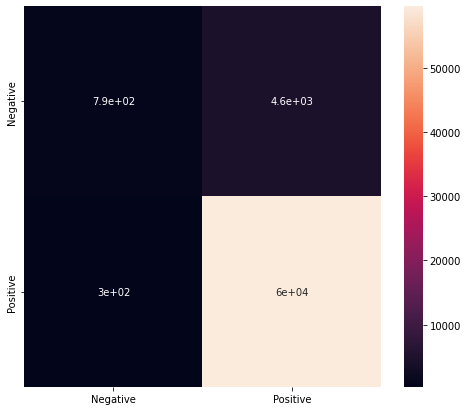

In [ ]:
#train
confmat = pd.DataFrame(confusion_matrix(ytrain, pred_train), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytrain, pred_train))

              precision    recall  f1-score   support

           0       0.72      0.15      0.24      5397
           1       0.93      0.99      0.96     59921

    accuracy                           0.92     65318
   macro avg       0.83      0.57      0.60     65318
weighted avg       0.91      0.92      0.90     65318



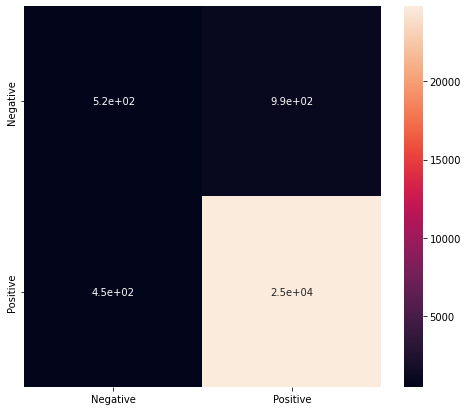

In [ ]:
#test
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1511
           1       0.96      0.98      0.97     25260

    accuracy                           0.95     26771
   macro avg       0.75      0.66      0.70     26771
weighted avg       0.94      0.95      0.94     26771



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {'C': [i/10 for i in range(1, 10, 1)],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'max_iter': [10000]}
grid_search = GridSearchCV(logr, param_grid, scoring='f1', cv=5)
grid_search.fit(feat_test, ytest)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best Score: 0.9725134777193659
Best Hyperparameters: {'C': 0.4, 'max_iter': 10000, 'penalty': 'l2'}


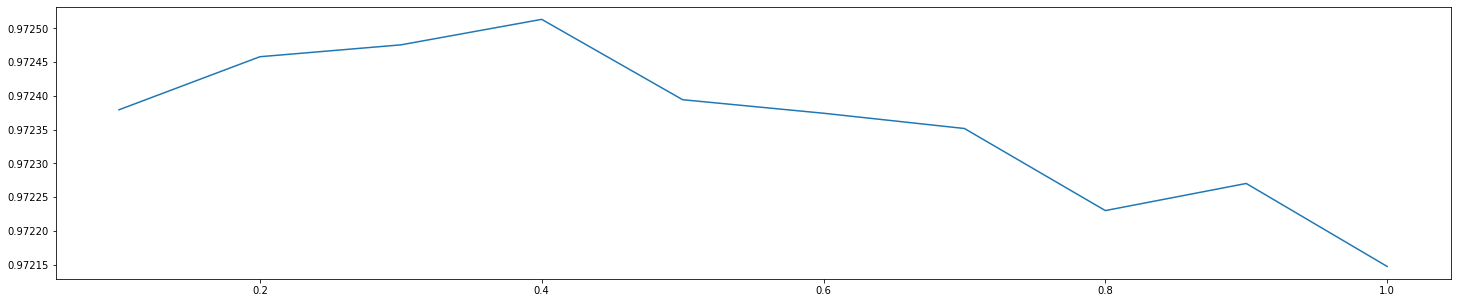

In [ ]:
plt.figure(figsize=(25, 5))
c_list, score = [], []
for n in range(1, 11):
    c_list.append(n/10)
    logr = LogR(C=n/10, max_iter=10000)
    mean_f1 = cross_val_score(logr, feat_test,
                              ytest, cv=5, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(c_list, score);

In [ ]:
logr = LogR(max_iter = 10000, C = 0.9)
logr.fit(feat_train, ytrain)
permutation = PermutationImportance(logr, scoring ='f1', n_iter=5, random_state=17).fit(feat_test, ytest)
eli5.show_weights(permutation, feature_names=xtest.columns.tolist())

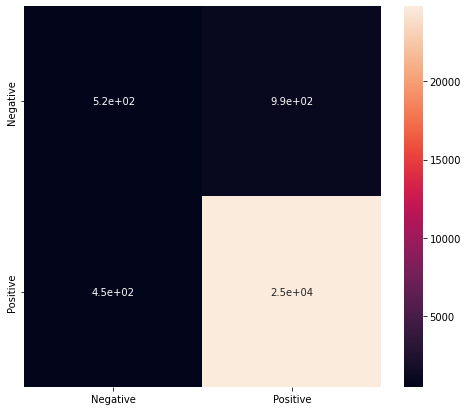

In [ ]:
model = logr.fit(feat_train, ytrain)
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1511
           1       0.96      0.98      0.97     25260

    accuracy                           0.95     26771
   macro avg       0.75      0.66      0.70     26771
weighted avg       0.94      0.95      0.94     26771



## K-near Neighbours

In [ ]:
knn = KNeighborsClassifier()
model = knn.fit(feat_train, ytrain)
pred_train = model.predict(feat_train)

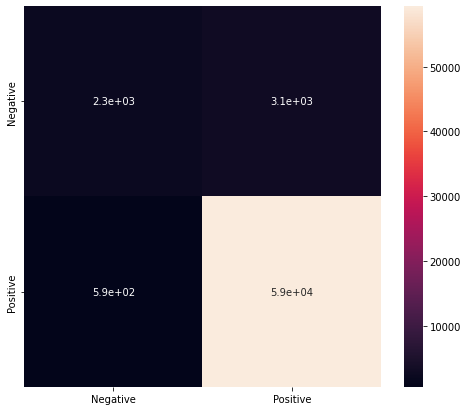

In [ ]:
#train
confmat = pd.DataFrame(confusion_matrix(ytrain, pred_train), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytrain, pred_train))

              precision    recall  f1-score   support

           0       0.80      0.43      0.56      5397
           1       0.95      0.99      0.97     59921

    accuracy                           0.94     65318
   macro avg       0.87      0.71      0.77     65318
weighted avg       0.94      0.94      0.94     65318



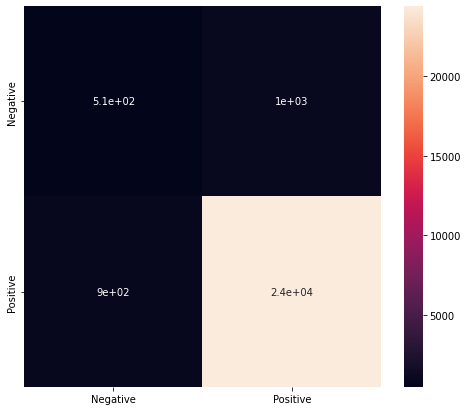

In [ ]:
#test
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35      1511
           1       0.96      0.96      0.96     25260

    accuracy                           0.93     26771
   macro avg       0.66      0.65      0.66     26771
weighted avg       0.93      0.93      0.93     26771



In [ ]:
param_grid = {'n_neighbors': [i for i in range(10, 101, 10)],
              'weights':['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
grid_search.fit(feat_test, ytest)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.9737827703355059
Best Hyperparameters: {'n_neighbors': 90, 'weights': 'uniform'}


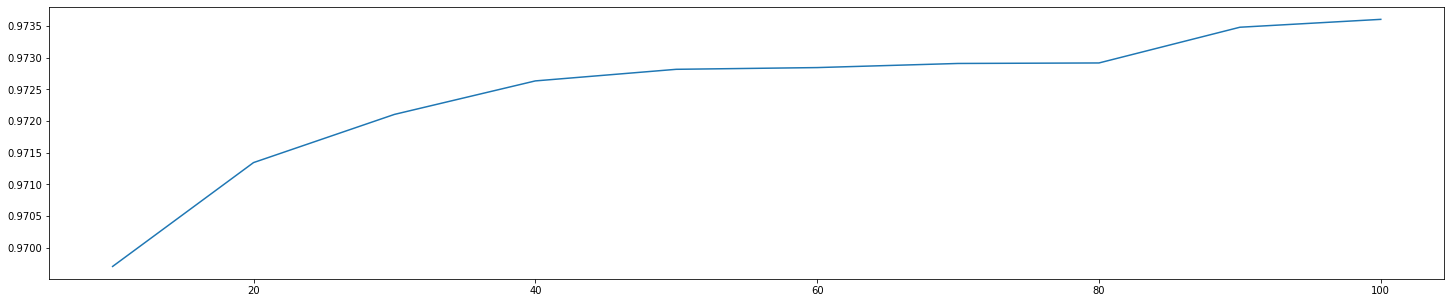

In [ ]:
plt.figure(figsize=(25, 5))
n_list, score = [], []
for n in range(10, 101, 10):
    n_list.append(n)
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
    mean_f1 = cross_val_score(knn, feat_test,
                              ytest, cv=5, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(n_list, score);

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn.fit(feat_test, ytest)
permutation = PermutationImportance(knn, scoring ='f1', n_iter=5, random_state=17).fit(feat_test, ytest)
eli5.show_weights(permutation, feature_names=xtest.columns.tolist())

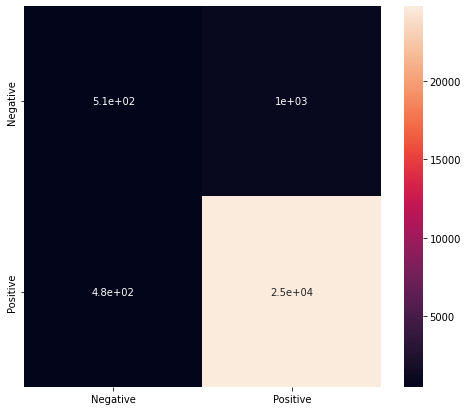

In [ ]:
model = knn.fit(feat_train, ytrain)
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.51      0.34      0.41      1511
           1       0.96      0.98      0.97     25260

    accuracy                           0.94     26771
   macro avg       0.74      0.66      0.69     26771
weighted avg       0.94      0.94      0.94     26771



## Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=45)
model = tree.fit(feat_train, ytrain)
pred_train = model.predict(feat_train)

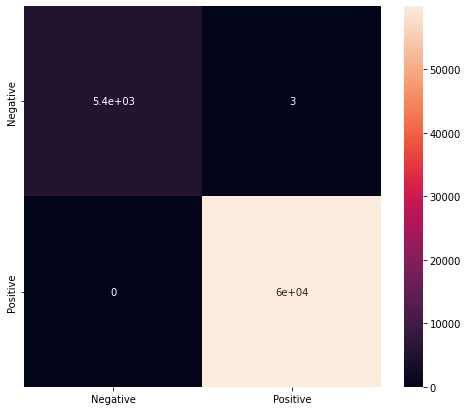

In [ ]:
#train
confmat = pd.DataFrame(confusion_matrix(ytrain, pred_train), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytrain, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5397
           1       1.00      1.00      1.00     59921

    accuracy                           1.00     65318
   macro avg       1.00      1.00      1.00     65318
weighted avg       1.00      1.00      1.00     65318



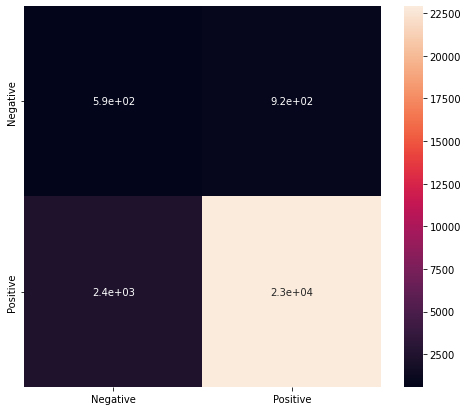

In [ ]:
#test
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.20      0.39      0.26      1511
           1       0.96      0.91      0.93     25260

    accuracy                           0.88     26771
   macro avg       0.58      0.65      0.60     26771
weighted avg       0.92      0.88      0.90     26771



In [ ]:
param_grid = {'max_depth': [i for i in range(5, 51, 5)],
              'min_samples_leaf':[i for i in range(10, 101, 10)],
              'criterion': ['entropy', 'gini']}
grid_search = GridSearchCV(tree, param_grid, scoring='f1', cv=5)
grid_search.fit(feat_test, ytest)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.9708161018505006
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 90}


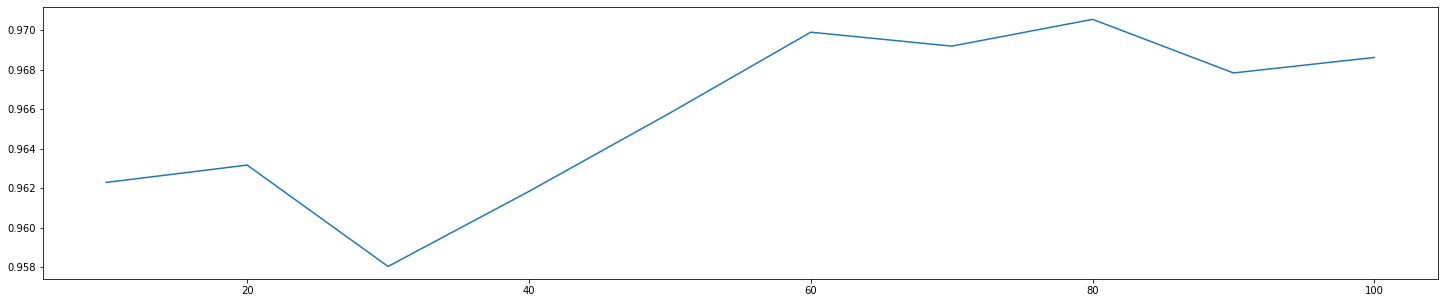

In [ ]:
plt.figure(figsize=(25, 5))
leaf_list, score = [], []
for n in range(10, 101, 10):
    leaf_list.append(n)
    tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf = n, criterion='gini', random_state= 45)
    mean_f1 = cross_val_score(tree, feat_test,
                              ytest, cv=5, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(leaf_list, score);

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf = 80, random_state=45)
tree.fit(feat_test, ytest)
permutation = PermutationImportance(tree, scoring ='f1', n_iter=5, random_state=45).fit(feat_test, ytest)
eli5.show_weights(permutation, feature_names=xtest.columns.tolist())

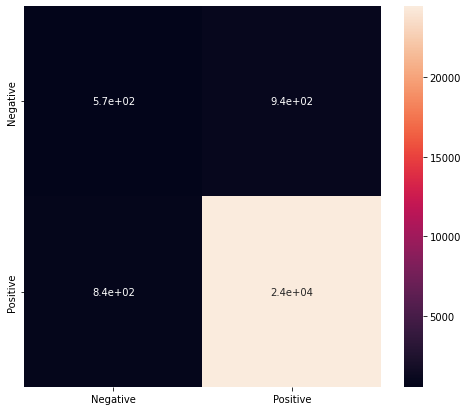

In [ ]:
model = tree.fit(feat_train, ytrain)
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.40      0.37      0.39      1511
           1       0.96      0.97      0.96     25260

    accuracy                           0.93     26771
   macro avg       0.68      0.67      0.68     26771
weighted avg       0.93      0.93      0.93     26771



##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=17)
model = rf.fit(feat_train, ytrain)
pred_train = model.predict(feat_train)

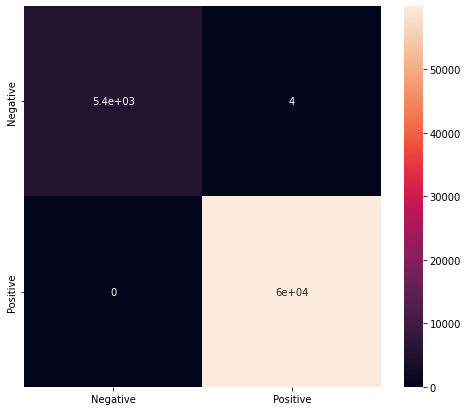

In [ ]:
#train
confmat = pd.DataFrame(confusion_matrix(ytrain, pred_train), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytrain, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5397
           1       1.00      1.00      1.00     59921

    accuracy                           1.00     65318
   macro avg       1.00      1.00      1.00     65318
weighted avg       1.00      1.00      1.00     65318



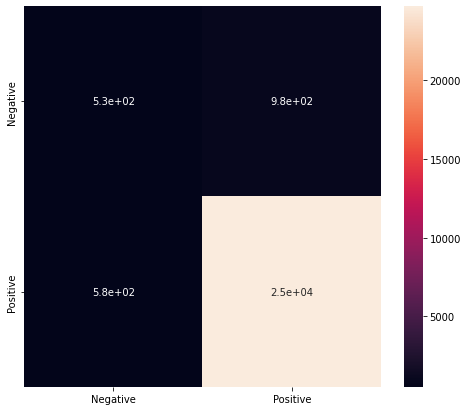

In [ ]:
#test
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.48      0.35      0.41      1511
           1       0.96      0.98      0.97     25260

    accuracy                           0.94     26771
   macro avg       0.72      0.67      0.69     26771
weighted avg       0.93      0.94      0.94     26771



**К сожалению, поиск параметров не смог сделать из-за большого количества времени, которое нужно для этого поиска**

In [ ]:
param_grid = {'max_depth': [i for i in range(5, 51, 5)],
              'min_samples_leaf':[i for i in range(10, 101, 10)],
              'criterion': ['entropy', 'gini'],
              'n_estimators': [100, 200, 300, 400, 500]}
grid_search = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
grid_search.fit(feat_test, ytest)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

KeyboardInterrupt: ignored

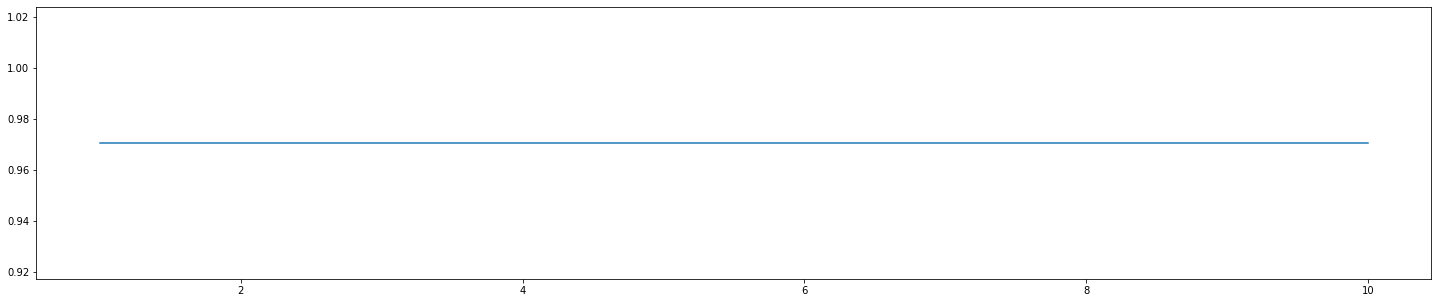

In [ ]:
plt.figure(figsize=(25, 5))
leaf_list, score = [], []
for n in range(1, 11):
    leaf_list.append(n)
    rf = RandomForestClassifier(max_depth=100, n_estimators=100, min_samples_leaf = n, criterion='gini', random_state= 45)
    mean_f1 = cross_val_score(tree, feat_test,
                              ytest, cv=5, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(leaf_list, score);

In [ ]:
rf = RandomForestClassifier(max_depth=100, n_estimators=100, min_samples_leaf = 9, criterion='gini', random_state= 45)
rf.fit(feat_test, ytest)
permutation = PermutationImportance(tree, scoring ='f1', n_iter=5, random_state=45).fit(feat_test, ytest)
eli5.show_weights(permutation, feature_names=xtest.columns.tolist())

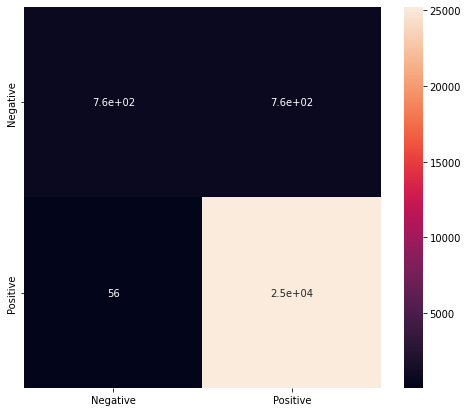

In [ ]:
model = rf.fit(feat_test, ytest)
pred_test = model.predict(feat_test)
confmat = pd.DataFrame(confusion_matrix(ytest, pred_test), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65      1511
           1       0.97      1.00      0.98     25260

    accuracy                           0.97     26771
   macro avg       0.95      0.75      0.82     26771
weighted avg       0.97      0.97      0.97     26771



#Авторазметка

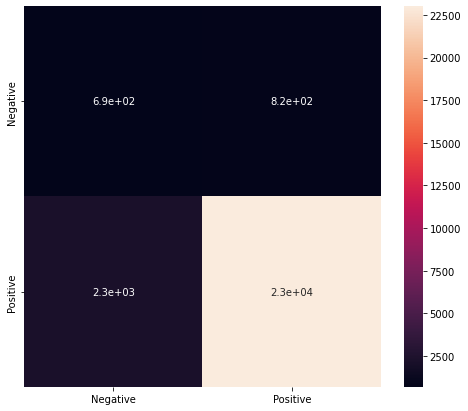

In [ ]:
def exportAuto(num: int):
  dframe = pd.read_csv(f'drive/My Drive/Размеченныее данные/Разметка Набор 1/autodata/{num}/fix_export_{num}.csv',
                      names=['time','leftX', 'leftY', 'rightX', 'rightY', 'pupilR', 'pupilL', 'fix_num', '?', '??', '???'])
  return dframe[['time','leftX', 'leftY', 'rightX', 'rightY','fix_num']]

auto106 = exportAuto(106)
auto114 = exportAuto(114)
auto115 = exportAuto(115)
auto116 = exportAuto(116)
auto127 = exportAuto(127)
dfauto = pd.concat([auto106, auto114, auto115, auto116, auto127], ignore_index=True)

dfauto['fix_num'] = dfauto['fix_num'].apply(toOne)

ind = dfauto[(dfauto['leftX'] == -1) | (dfauto['leftY'] == -1) | (dfauto['rightX'] == -1) | (dfauto['rightY'] == -1)].index
ind
dfauto = dfauto.drop(ind, axis='index')

yauto = dfauto['fix_num']

confmat = pd.DataFrame(confusion_matrix(ytest, yauto.iloc[:26771]), index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(confmat, annot=True)

In [ ]:
print(classification_report(ytest, yauto.iloc[:26771]))

              precision    recall  f1-score   support

           0       0.23      0.45      0.31      1511
           1       0.97      0.91      0.94     25260

    accuracy                           0.88     26771
   macro avg       0.60      0.68      0.62     26771
weighted avg       0.92      0.88      0.90     26771



Данные с шумом нужно заранее обработать

In [ ]:
train = pd.read_csv('drive/My Drive/whole_train.csv')
train

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  \
0        852747302  0.455  0.591   0.455   0.591        1 -0.021  0.002   
1        852755576  0.455  0.607   0.455   0.607        1  0.016  0.000   
2        852763955  0.456  0.601   0.456   0.601        1 -0.006  0.001   
3        852780652  0.456  0.590   0.456   0.590        1 -0.011  0.000   
4        852788937  0.455  0.607   0.455   0.607        1  0.017 -0.001   
...            ...    ...    ...     ...     ...      ...    ...    ...   
64202  20041007354  0.403  0.419   0.379   0.256        1 -0.001  0.000   
64203  20041015657  0.403  0.416   0.378   0.256        1  0.000 -0.001   
64204  20041024149  0.402  0.418   0.377   0.256        1  0.000 -0.001   
64205  20041032649  0.398  0.418   0.377   0.257        1  0.001  0.000   
64206  20041040834  0.396  0.416   0.376   0.257        1  0.000 -0.001   

       yl_ch  xl_ch  ...     acc_r     acc_l   rms20_r   rms20_l  rms100_r  \
0     -0.021  0.002  ...  2.806915  2.806915  0.007044  0.007044  0.012479   
1      0.016  0.000  ... -0.686862 -0.686862  0.007084  0.007084  0.012483   
2     -0.006  0.001  ... -1.441479 -1.441479  0.007367  0.007367  0.012519   
3     -0.011  0.000  ... -0.040218 -0.040218  0.007432  0.007432  0.012529   
4      0.017 -0.001  ...  1.685754  1.685754  0.007548  0.007548  0.012526   
...      ...    ...  ...       ...       ...       ...       ...       ...   
64202 -0.004  0.001  ...  0.030122  0.434684  0.001320  0.003562  0.001513   
64203 -0.003  0.000  ... -0.014891 -0.224307  0.001301  0.003562  0.001513   
64204  0.002 -0.001  ... -0.003157 -0.115403  0.001298  0.003559  0.001513   
64205  0.000 -0.004  ... -0.000130  0.243851  0.001291  0.003576  0.001513   
64206 -0.002 -0.002  ...  0.005532 -0.152750  0.001272  0.003551  0.001511   

       rms100_l  mean_dif20_r  mean_dif20_l  mean_dif100_r  mean_dif100_l  
0      0.012479      0.000040      0.000040   3.589218e-06   3.589218e-06  
1      0.012483      0.000284      0.000284   3.640309e-05   3.640309e-05  
2      0.012519      0.000065      0.000065   9.653294e-06   9.653294e-06  
3      0.012529      0.000115      0.000115  -3.130414e-06  -3.130414e-06  
4      0.012526      0.000458      0.000458   6.015453e-05   6.015453e-05  
...         ...           ...           ...            ...            ...  
64202  0.004658     -0.000019      0.000000   0.000000e+00  -9.388912e-06  
64203  0.004649     -0.000003     -0.000003   0.000000e+00  -4.478679e-07  
64204  0.004649     -0.000007      0.000017  -5.669455e-07   1.703004e-06  
64205  0.004650     -0.000020     -0.000025  -2.234008e-06   1.475579e-06  
64206  0.004652      0.000000      0.000001  -5.065582e-06   2.866543e-06  

[64207 rows x 29 columns]

In [ ]:
test = pd.read_csv('drive/My Drive/whole_test.csv')
test

time  leftX  leftY  rightX  rightY  fix_num  yr_ch  xr_ch  yl_ch  \
0      3966308741  0.568  0.411   0.576   0.368        1 -0.007  0.001  0.001   
1      3966313473  0.569  0.412   0.577   0.366        1 -0.002  0.001  0.001   
2      3966330448  0.569  0.414   0.578   0.370        1  0.004  0.001  0.002   
3      3966338444  0.568  0.415   0.579   0.372        1  0.002  0.001  0.001   
4      3966355201  0.566  0.415   0.580   0.368        1 -0.004  0.001  0.000   
...           ...    ...    ...     ...     ...      ...    ...    ...    ...   
26261  4231687913  0.576  0.434   0.516   0.523        1 -0.002  0.000  0.003   
26262  4231696250  0.575  0.434   0.514   0.522        1 -0.001 -0.002  0.000   
26263  4231712977  0.577  0.435   0.512   0.522        1  0.000 -0.002  0.001   
26264  4231721280  0.579  0.436   0.513   0.523        1  0.001  0.001  0.001   
26265  4231729503  0.578  0.437   0.514   0.523        1  0.000  0.001  0.001   

       xl_ch  ...     acc_r     acc_l   rms20_r   rms20_l  rms100_r  rms100_l  \
0      0.001  ...  0.217241 -0.000075  0.003263  0.002799  0.389396  0.384139   
1      0.001  ... -0.258803  0.380093  0.003401  0.002794  0.298688  0.312948   
2      0.000  ... -0.135287 -0.106652  0.003390  0.002667  0.298635  0.312784   
3     -0.001  ...  0.045967  0.073843  0.003405  0.002425  0.298585  0.312676   
4     -0.002  ... -0.020049 -0.034321  0.003431  0.002418  0.298419  0.312675   
...      ...  ...       ...       ...       ...       ...       ...       ...   
26261  0.001  ...  0.187381  0.241198  0.001493  0.001362  0.727662  0.743818   
26262 -0.001  ...  0.033168 -0.312353  0.001494  0.000930  0.726964  0.743818   
26263  0.002  ... -0.088864  0.008210  0.001494  0.000945  0.726268  0.743818   
26264  0.002  ...  0.061133  0.163349  0.001494  0.000945  0.726268  0.743818   
26265 -0.001  ... -0.059243 -0.118358  0.001494  0.000865  0.726268  0.743818   

       mean_dif20_r  mean_dif20_l  mean_dif100_r  mean_dif100_l  
0      1.378797e-04 -5.217456e-06  -9.070869e-02  -7.119118e-02  
1     -1.059477e-05 -1.265729e-04  -5.245803e-05  -1.634511e-04  
2      1.495796e-05 -2.421031e-04  -4.984793e-05  -1.081970e-04  
3      2.604196e-05 -6.781008e-06  -1.665210e-04  -5.168016e-07  
4      1.040987e-07 -8.673617e-19  -1.465832e-04   2.270276e-09  
...             ...           ...            ...            ...  
26261  9.328409e-07 -4.326831e-04  -6.982057e-04   2.115828e-08  
26262  2.168404e-19  1.534698e-05  -6.955576e-04   0.000000e+00  
26263 -2.168404e-19  0.000000e+00  -1.586517e-09  -1.153326e-09  
26264  2.168404e-19 -7.968799e-05  -7.120750e-08   2.233739e-09  
26265 -8.859506e-06 -1.499946e-05  -3.634086e-09   1.932043e-09  

[26266 rows x 29 columns]

In [ ]:
test_quant = test.copy()
test_quant = noise_quant(test_quant)

In [ ]:
test_window = test.copy()
test_window = noise_window(test_window, 3)

KeyboardInterrupt: ignored

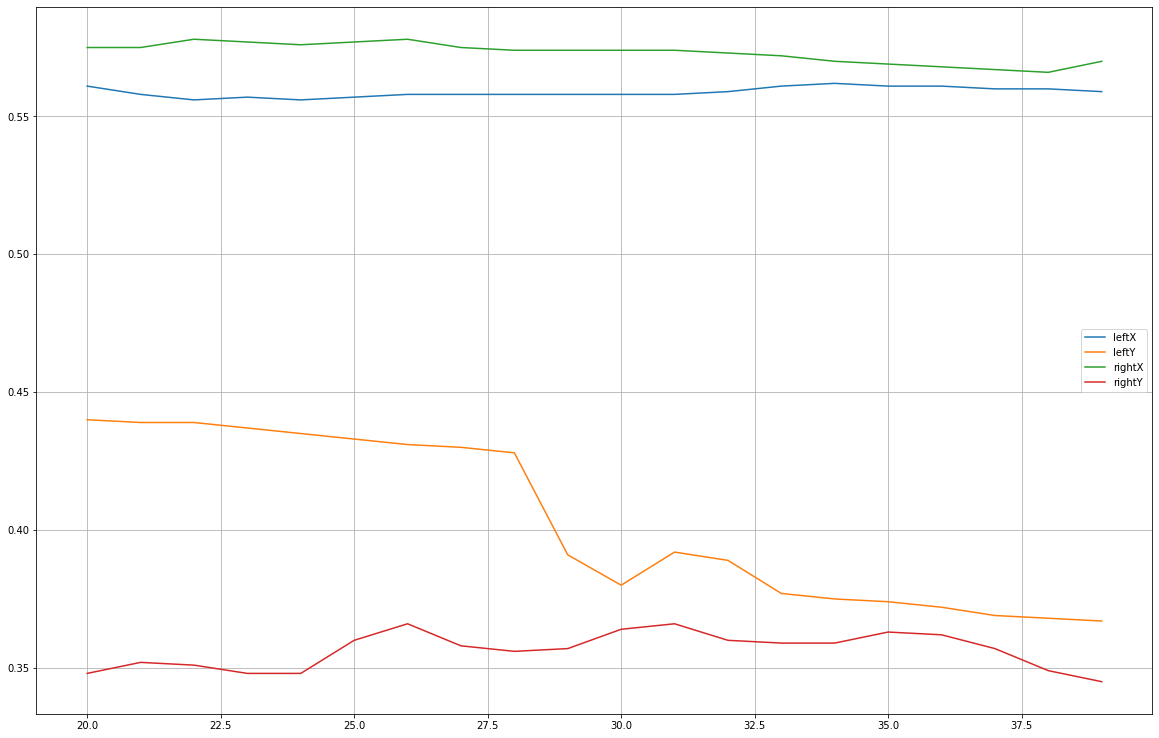

In [ ]:
test[['leftX', 'leftY', 'rightX', 'rightY']][20:40].plot(figsize=(20, 13), grid=True)

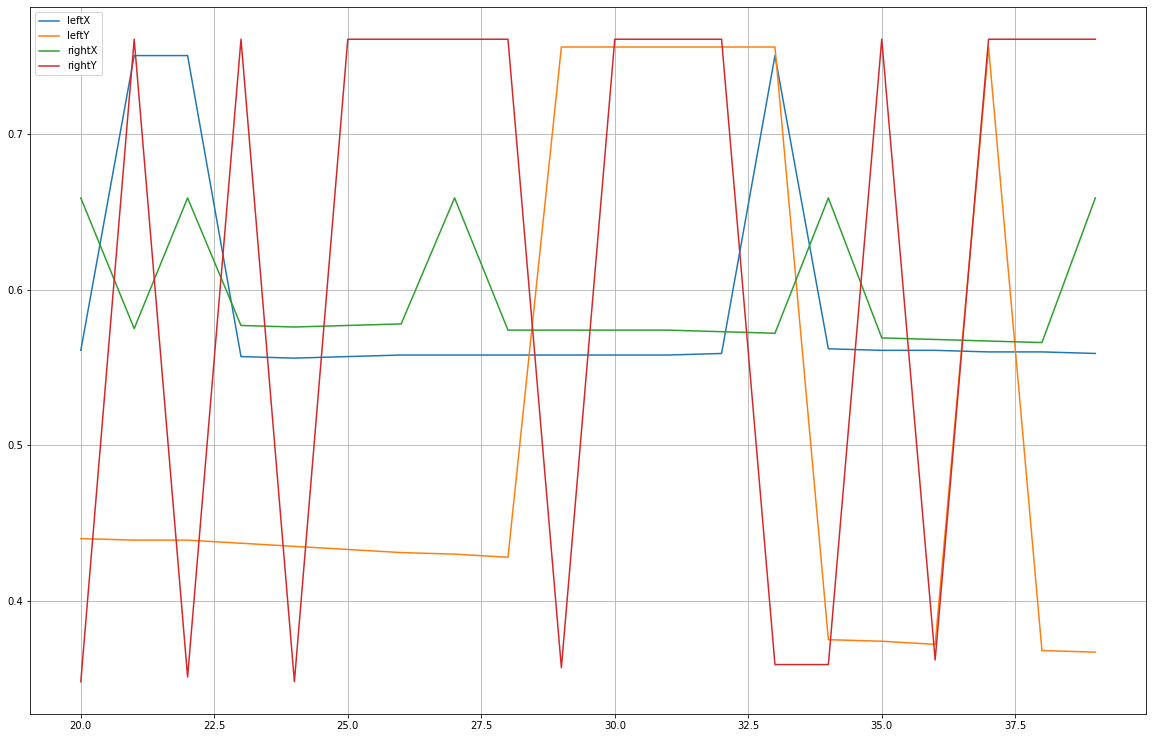

In [ ]:
test_quant[['leftX', 'leftY', 'rightX', 'rightY']][20:40].plot(figsize=(20, 13), grid=True)